In [61]:
import cv2                 # working with, mainly resizing, images
import numpy as np         # dealing with arrays
import os                  # dealing with directories
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm      # a nice pretty percentage bar for tasks. Thanks to viewer Daniel BA1/4hler for this suggestion


#Import the data from google drive
from google.colab import drive
drive.mount('/content/gdrive')

TRAIN_DIR = '/content/gdrive/My Drive/CatDog/train/train'
TEST_DIR = '/content/gdrive/My Drive/CatDog/test/test'
IMG_SIZE = 50
LR = 1e-3

MODEL_NAME = 'dogsvscats-{}-{}.model'.format(LR, '2conv-basic') # just so we remember which saved model is which, sizes must match

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [65]:
def label_img(img):
    word_label = img.split('.')[-3]
    # conversion to one-hot array [cat,dog]
    #                            [much cat, no dog]
    print(img)
    if word_label == 'cat': return [1,0]
    #                             [no cat, very doggo]
    elif word_label == 'dog': return [0,1]

In [64]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)): # this tqdm is just to show the bar with %, the progress in the output data.
        label = label_img(img)
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img),np.array(label)]) #add the image with his label to the training data
    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data

In [84]:
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):  
        path = os.path.join(TEST_DIR,img)
        img_num = img.split('.')[0]
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        testing_data.append([np.array(img), img_num])
        
    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_data

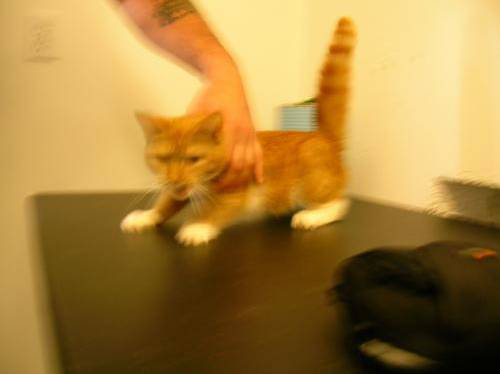

In [58]:
# Replace "path/to/image.jpg" with the actual path to the image file
img_path = "/content/gdrive/My Drive/CatDog/train/train/cat.0.jpg"

from PIL import Image
Image.open(img_path)

### The code below works good now maybe because I introduce the print(img) in the def label_img. IDK why

In [66]:
train_data = create_train_data()

  0%|          | 5/25000 [00:00<08:29, 49.01it/s]

dog.2453.jpg
dog.2444.jpg
dog.2452.jpg
dog.2451.jpg
dog.245.jpg
dog.2448.jpg
dog.2455.jpg
dog.2454.jpg
dog.2447.jpg
dog.2450.jpg
dog.2445.jpg
dog.2446.jpg
dog.2449.jpg
dog.2443.jpg
dog.1945.jpg
dog.1952.jpg
dog.1944.jpg
dog.1949.jpg
dog.1951.jpg
dog.1956.jpg
dog.195.jpg
dog.1948.jpg
dog.1950.jpg
dog.1955.jpg
dog.2104.jpg
dog.2087.jpg
dog.2081.jpg


  0%|          | 50/25000 [00:00<02:17, 180.93it/s]

dog.2083.jpg
dog.2090.jpg
dog.2080.jpg
dog.2086.jpg
dog.2084.jpg
dog.2082.jpg
dog.209.jpg
dog.2034.jpg
dog.2035.jpg
dog.203.jpg
dog.2033.jpg
dog.2030.jpg
dog.2032.jpg
dog.2031.jpg
dog.2036.jpg
dog.2088.jpg
dog.2089.jpg
dog.208.jpg
dog.2079.jpg
dog.2131.jpg
dog.1389.jpg
dog.1388.jpg
dog.1381.jpg
dog.1384.jpg
dog.1387.jpg
dog.1380.jpg
dog.1382.jpg
dog.138.jpg
dog.1383.jpg
dog.1378.jpg
dog.1507.jpg
dog.15.jpg
dog.1500.jpg
dog.1509.jpg
dog.1501.jpg
dog.1502.jpg
dog.1506.jpg
dog.1503.jpg
dog.150.jpg
dog.1504.jpg


  0%|          | 90/25000 [00:00<02:14, 185.10it/s]

dog.1499.jpg
dog.1505.jpg
dog.151.jpg
dog.1461.jpg
dog.1467.jpg
dog.1460.jpg
dog.1464.jpg
dog.1459.jpg
dog.1466.jpg
dog.1469.jpg
dog.1458.jpg
dog.1465.jpg
dog.1426.jpg
dog.1421.jpg
dog.1424.jpg
dog.1427.jpg
dog.1429.jpg
dog.1423.jpg
dog.1419.jpg
dog.142.jpg
dog.1425.jpg
dog.1418.jpg
dog.1428.jpg
dog.1420.jpg
dog.1468.jpg
dog.147.jpg
dog.146.jpg
dog.1379.jpg
dog.1385.jpg
dog.1386.jpg
dog.1377.jpg
dog.1592.jpg
dog.1605.jpg
dog.2392.jpg
dog.2393.jpg
dog.2394.jpg
dog.2395.jpg
dog.2391.jpg
dog.2390.jpg
dog.2026.jpg
dog.2029.jpg
dog.2027.jpg
dog.2028.jpg
dog.2374.jpg
dog.237.jpg

  1%|          | 135/25000 [00:00<02:01, 203.83it/s]


dog.2364.jpg
dog.2371.jpg
dog.2373.jpg
dog.2372.jpg
dog.2367.jpg
dog.2369.jpg
dog.2363.jpg
dog.2018.jpg
dog.2020.jpg
dog.2016.jpg
dog.2011.jpg
dog.1995.jpg
dog.1997.jpg
dog.1993.jpg
dog.1996.jpg
dog.1994.jpg
dog.2014.jpg
dog.2017.jpg
dog.2013.jpg
dog.2015.jpg
dog.2021.jpg
dog.2019.jpg
dog.2012.jpg
dog.2022.jpg
dog.2010.jpg
dog.2370.jpg
dog.2366.jpg
dog.2365.jpg
dog.2037.jpg
dog.2432.jpg
dog.2438.jpg
dog.2430.jpg
dog.2434.jpg
dog.2431.jpg
dog.243.jpg
dog.2435.jpg
dog.2433.jpg
dog.2404.jpg
dog.2408.jpg
dog.2412.jpg
dog.241.jpg
dog.2409.jpg
dog.2411.jpg


  1%|          | 179/25000 [00:00<01:57, 210.73it/s]

dog.2402.jpg
dog.2410.jpg
dog.2405.jpg
dog.2413.jpg
dog.2406.jpg
dog.2414.jpg
dog.2407.jpg
dog.2050.jpg
dog.2415.jpg
dog.1804.jpg
dog.1799.jpg
dog.1805.jpg
dog.1801.jpg
dog.18.jpg
dog.1807.jpg
dog.1796.jpg
dog.1806.jpg
dog.1803.jpg
dog.1800.jpg
dog.1847.jpg
dog.1846.jpg
dog.1845.jpg
dog.1842.jpg
dog.1843.jpg
dog.1844.jpg
dog.1848.jpg
dog.1802.jpg
dog.1797.jpg
dog.1982.jpg
dog.198.jpg
dog.1979.jpg
dog.1973.jpg
dog.1972.jpg
dog.1971.jpg
dog.1977.jpg
dog.1983.jpg
dog.1981.jpg
dog.1980.jpg
dog.1247.jpg
dog.12473.jpg
dog.12471.jpg
dog.12475.jpg
dog.12466.jpg
dog.12474.jpg
dog.12468.jpg


  1%|          | 223/25000 [00:01<01:57, 211.20it/s]

dog.12467.jpg
dog.12465.jpg
dog.1372.jpg
dog.1371.jpg
dog.1370.jpg
dog.1367.jpg
dog.1373.jpg
dog.1363.jpg
dog.1369.jpg
dog.137.jpg
dog.1365.jpg
dog.1374.jpg
dog.12445.jpg
dog.12449.jpg
dog.12443.jpg
dog.12447.jpg
dog.12446.jpg
dog.12472.jpg
dog.12470.jpg
dog.12464.jpg
dog.12469.jpg
dog.1364.jpg
dog.1366.jpg
dog.1375.jpg
dog.1368.jpg
dog.1376.jpg
dog.1751.jpg
dog.1743.jpg
dog.1745.jpg
dog.1749.jpg
dog.1752.jpg
dog.175.jpg
dog.1747.jpg
dog.1742.jpg
dog.1753.jpg
dog.1821.jpg
dog.1324.jpg
dog.1322.jpg
dog.193.jpg
dog.1741.jpg
dog.1746.jpg
dog.1748.jpg
dog.1744.jpg


  1%|          | 245/25000 [00:01<01:58, 208.90it/s]

dog.1984.jpg
dog.2038.jpg
dog.2039.jpg
dog.2043.jpg
dog.2048.jpg
dog.190.jpg
dog.1894.jpg
dog.1899.jpg
dog.1900.jpg
dog.1898.jpg
dog.19.jpg
dog.1901.jpg
dog.2047.jpg
dog.2042.jpg
dog.2046.jpg
dog.2041.jpg
dog.2049.jpg
dog.205.jpg
dog.2040.jpg
dog.204.jpg
dog.2044.jpg
dog.2045.jpg


  1%|          | 287/25000 [00:17<1:06:19,  6.21it/s]

dog.1892.jpg
dog.1893.jpg
dog.1890.jpg
dog.1891.jpg
dog.1978.jpg
dog.1976.jpg
dog.1975.jpg
dog.1974.jpg
dog.12326.jpg
dog.12316.jpg
dog.12315.jpg
dog.12324.jpg
dog.12327.jpg
dog.12318.jpg
dog.12321.jpg
dog.12320.jpg
dog.12325.jpg
dog.12286.jpg
dog.12282.jpg
dog.12276.jpg
dog.12279.jpg
dog.12278.jpg
dog.12275.jpg


  1%|▏         | 334/25000 [00:17<31:43, 12.96it/s]

dog.1228.jpg
dog.12287.jpg
dog.12283.jpg
dog.12354.jpg
dog.12349.jpg
dog.12353.jpg
dog.1235.jpg
dog.12290.jpg
dog.1229.jpg
dog.12289.jpg
dog.1230.jpg
dog.12297.jpg
dog.12294.jpg
dog.12299.jpg
dog.123.jpg
dog.12350.jpg
dog.12344.jpg
dog.12348.jpg
dog.12343.jpg
dog.12351.jpg
dog.12342.jpg
dog.12345.jpg
dog.12352.jpg
dog.12347.jpg
dog.12346.jpg
dog.12323.jpg
dog.12319.jpg
dog.1232.jpg
dog.12322.jpg
dog.12281.jpg
dog.12284.jpg
dog.12285.jpg
dog.12280.jpg
dog.2116.jpg
dog.2108.jpg
dog.2112.jpg
dog.2110.jpg
dog.2109.jpg
dog.2113.jpg
dog.211.jpg
dog.2111.jpg
dog.2117.jpg
dog.12295.jpg
dog.12292.jpg
dog.12296.jpg
dog.12291.jpg
dog.12373.jpg


  2%|▏         | 378/25000 [00:17<16:37, 24.68it/s]

dog.1237.jpg
dog.12371.jpg
dog.12374.jpg
dog.12370.jpg
dog.12372.jpg
dog.1362.jpg
dog.12422.jpg
dog.2218.jpg
dog.2216.jpg
dog.2213.jpg
dog.2217.jpg
dog.2215.jpg
dog.2214.jpg
dog.2219.jpg
dog.2229.jpg
dog.2228.jpg
dog.223.jpg
dog.2230.jpg
dog.224.jpg
dog.2348.jpg
dog.2267.jpg
dog.1822.jpg
dog.1828.jpg
dog.1827.jpg
dog.1772.jpg
dog.1779.jpg
dog.1775.jpg
dog.178.jpg
dog.1777.jpg
dog.1769.jpg
dog.177.jpg
dog.1767.jpg
dog.1763.jpg
dog.1759.jpg
dog.1764.jpg
dog.1756.jpg
dog.1765.jpg
dog.1758.jpg
dog.1762.jpg
dog.1760.jpg
dog.1755.jpg
dog.1757.jpg
dog.1766.jpg
dog.1761.jpg
dog.176.jpg


  2%|▏         | 422/25000 [00:17<09:08, 44.77it/s]

dog.1776.jpg
dog.1778.jpg
dog.1780.jpg
dog.1771.jpg
dog.1713.jpg
dog.170.jpg
dog.1573.jpg
dog.1578.jpg
dog.1569.jpg
dog.1567.jpg
dog.1570.jpg
dog.1568.jpg
dog.1528.jpg
dog.1530.jpg
dog.1526.jpg
dog.1532.jpg
dog.1531.jpg
dog.1537.jpg
dog.1533.jpg
dog.1529.jpg
dog.1535.jpg
dog.1651.jpg
dog.1648.jpg
dog.1647.jpg
dog.1649.jpg
dog.165.jpg
dog.1636.jpg
dog.1637.jpg
dog.1644.jpg
dog.1633.jpg
dog.1639.jpg
dog.1634.jpg
dog.1645.jpg
dog.1642.jpg
dog.1638.jpg
dog.1641.jpg
dog.1635.jpg
dog.1640.jpg
dog.1527.jpg
dog.1536.jpg
dog.1534.jpg
dog.1525.jpg
dog.157.jpg
dog.1566.jpg


  2%|▏         | 444/25000 [00:18<06:59, 58.47it/s]

dog.1572.jpg
dog.1673.jpg
dog.12147.jpg
dog.12146.jpg
dog.12140.jpg
dog.12144.jpg
dog.12142.jpg
dog.1214.jpg
dog.12151.jpg
dog.12143.jpg
dog.12148.jpg
dog.12175.jpg
dog.12172.jpg
dog.12167.jpg
dog.12173.jpg
dog.12176.jpg
dog.12174.jpg
dog.12170.jpg
dog.12178.jpg
dog.12171.jpg
dog.1217.jpg
dog.12179.jpg
dog.12177.jpg
dog.12168.jpg
dog.12223.jpg
dog.12220.jpg
dog.12222.jpg
dog.12274.jpg
dog.12288.jpg
dog.12409.jpg
dog.2105.jpg
dog.2107.jpg
dog.2115.jpg
dog.2114.jpg
dog.2147.jpg
dog.2146.jpg
dog.2149.jpg
dog.2148.jpg
dog.183.jpg
dog.1829.jpg
dog.1831.jpg
dog.1834.jpg
dog.1830.jpg


  2%|▏         | 489/25000 [00:18<04:29, 90.94it/s]

dog.1833.jpg
dog.2159.jpg
dog.2212.jpg
dog.1435.jpg
dog.1439.jpg
dog.1434.jpg
dog.1442.jpg
dog.1438.jpg
dog.1441.jpg
dog.1437.jpg
dog.1440.jpg
dog.144.jpg
dog.1436.jpg
dog.11875.jpg
dog.11870.jpg
dog.11876.jpg
dog.11882.jpg
dog.11927.jpg
dog.11936.jpg
dog.11932.jpg
dog.11934.jpg
dog.11930.jpg
dog.11928.jpg
dog.11929.jpg
dog.11925.jpg
dog.1193.jpg
dog.11933.jpg
dog.11935.jpg
dog.11924.jpg
dog.11877.jpg
dog.11880.jpg
dog.11881.jpg
dog.11873.jpg
dog.11871.jpg
dog.11879.jpg
dog.1188.jpg
dog.11878.jpg
dog.11872.jpg
dog.12088.jpg
dog.1209.jpg
dog.12086.jpg
dog.12089.jpg


  2%|▏         | 534/25000 [00:18<03:07, 130.25it/s]

dog.12087.jpg
dog.12090.jpg
dog.12091.jpg
dog.11988.jpg
dog.11980.jpg
dog.11986.jpg
dog.11979.jpg
dog.11990.jpg
dog.11989.jpg
dog.11987.jpg
dog.11985.jpg
dog.11984.jpg
dog.11981.jpg
dog.11983.jpg
dog.11982.jpg
dog.1198.jpg
dog.1475.jpg
dog.1472.jpg
dog.1471.jpg
dog.1474.jpg
dog.1477.jpg
dog.148.jpg
dog.1479.jpg
dog.1473.jpg
dog.1347.jpg
dog.1343.jpg
dog.1345.jpg
dog.1344.jpg
dog.1287.jpg
dog.1292.jpg
dog.1288.jpg
dog.1285.jpg
dog.1282.jpg
dog.1286.jpg
dog.1289.jpg
dog.1293.jpg
dog.1283.jpg
dog.1294.jpg
dog.1284.jpg
dog.1290.jpg
dog.129.jpg
dog.12071.jpg
dog.1470.jpg
dog.1348.jpg
dog.1340.jpg
dog.134.jpg


  2%|▏         | 581/25000 [00:18<02:24, 168.46it/s]

dog.1341.jpg
dog.1346.jpg
dog.1336.jpg
dog.1338.jpg
dog.1337.jpg
dog.1339.jpg
dog.1342.jpg
dog.1481.jpg
dog.1482.jpg
dog.1476.jpg
dog.1565.jpg
dog.1524.jpg
dog.1538.jpg
dog.11854.jpg
dog.1185.jpg
dog.11850.jpg
dog.11855.jpg
dog.11851.jpg
dog.11849.jpg
dog.11852.jpg
dog.11853.jpg
dog.11848.jpg
dog.11730.jpg
dog.11728.jpg
dog.11724.jpg
dog.11726.jpg
dog.11837.jpg
dog.11841.jpg
dog.11830.jpg
dog.11839.jpg
dog.11836.jpg
dog.1184.jpg
dog.11832.jpg
dog.11834.jpg
dog.11840.jpg
dog.11831.jpg
dog.11624.jpg
dog.11622.jpg
dog.11623.jpg
dog.11618.jpg
dog.11619.jpg
dog.1162.jpg
dog.11625.jpg
dog.11835.jpg


  3%|▎         | 628/25000 [00:18<02:07, 190.67it/s]

dog.11838.jpg
dog.1183.jpg
dog.11833.jpg
dog.11721.jpg
dog.11731.jpg
dog.11722.jpg
dog.11725.jpg
dog.11732.jpg
dog.11727.jpg
dog.11733.jpg
dog.1173.jpg
dog.11729.jpg
dog.11723.jpg
dog.11734.jpg
dog.11829.jpg
dog.11937.jpg
dog.2077.jpg
dog.2076.jpg
dog.2073.jpg
dog.2068.jpg
dog.2072.jpg
dog.2074.jpg
dog.2070.jpg
dog.2075.jpg
dog.2069.jpg
dog.2071.jpg
dog.2065.jpg
dog.2067.jpg
dog.1964.jpg
dog.1969.jpg
dog.1960.jpg
dog.197.jpg
dog.1958.jpg
dog.1962.jpg
dog.1967.jpg
dog.1968.jpg
dog.1966.jpg
dog.196.jpg
dog.1961.jpg
dog.1963.jpg
dog.2091.jpg
dog.2118.jpg
dog.1486.jpg
dog.1497.jpg
dog.1492.jpg
dog.1490.jpg
dog.1493.jpg


  3%|▎         | 673/25000 [00:19<01:59, 202.79it/s]

dog.1494.jpg
dog.1487.jpg
dog.1485.jpg
dog.1495.jpg
dog.1488.jpg
dog.149.jpg
dog.1489.jpg
dog.1496.jpg
dog.1550.jpg
dog.1540.jpg
dog.1545.jpg
dog.155.jpg
dog.1549.jpg
dog.1547.jpg
dog.1543.jpg
dog.1548.jpg
dog.1542.jpg
dog.1447.jpg
dog.1449.jpg
dog.1444.jpg
dog.1454.jpg
dog.1451.jpg
dog.1450.jpg
dog.1455.jpg
dog.1453.jpg
dog.1446.jpg
dog.145.jpg
dog.1541.jpg
dog.1544.jpg
dog.1546.jpg
dog.1539.jpg
dog.1448.jpg
dog.1452.jpg
dog.1632.jpg
dog.1579.jpg
dog.1359.jpg
dog.1360.jpg
dog.1352.jpg
dog.1361.jpg
dog.1351.jpg
dog.136.jpg
dog.135.jpg
dog.12482.jpg
dog.12484.jpg
dog.12488.jpg


  3%|▎         | 718/25000 [00:19<01:56, 207.70it/s]

dog.12479.jpg
dog.12480.jpg
dog.12487.jpg
dog.1249.jpg
dog.12481.jpg
dog.1350.jpg
dog.1358.jpg
dog.1354.jpg
dog.1357.jpg
dog.1253.jpg
dog.12496.jpg
dog.12497.jpg
dog.12498.jpg
dog.12491.jpg
dog.12493.jpg
dog.12495.jpg
dog.12494.jpg
dog.125.jpg
dog.12478.jpg
dog.12485.jpg
dog.12483.jpg
dog.1248.jpg
dog.1484.jpg
dog.12492.jpg
dog.12499.jpg
dog.1252.jpg
dog.1939.jpg
dog.1931.jpg
dog.1940.jpg
dog.1941.jpg
dog.1934.jpg
dog.1936.jpg
dog.1942.jpg
dog.1933.jpg
dog.1938.jpg
dog.1864.jpg
dog.1867.jpg
dog.1874.jpg
dog.1873.jpg
dog.1875.jpg
dog.187.jpg
dog.1863.jpg
dog.1866.jpg
dog.1872.jpg


  3%|▎         | 764/25000 [00:19<01:52, 214.54it/s]

dog.1870.jpg
dog.1869.jpg
dog.1868.jpg
dog.1871.jpg
dog.1865.jpg
dog.1930.jpg
dog.1935.jpg
dog.194.jpg
dog.1932.jpg
dog.201.jpg
dog.1957.jpg
dog.1917.jpg
dog.1921.jpg
dog.1918.jpg
dog.1920.jpg
dog.192.jpg
dog.1919.jpg
dog.2064.jpg
dog.189.jpg
dog.1970.jpg
dog.1916.jpg
dog.12432.jpg
dog.12423.jpg
dog.12425.jpg
dog.12429.jpg
dog.12430.jpg
dog.12428.jpg
dog.12433.jpg
dog.12424.jpg
dog.12426.jpg
dog.1245.jpg
dog.12434.jpg
dog.1243.jpg
dog.12435.jpg
dog.1268.jpg
dog.12477.jpg
dog.1349.jpg
dog.12463.jpg
dog.116.jpg
dog.115.jpg
dog.11500.jpg
dog.11494.jpg
dog.11496.jpg
dog.11498.jpg
dog.11497.jpg


  3%|▎         | 808/25000 [00:19<01:58, 204.48it/s]

dog.11501.jpg
dog.11502.jpg
dog.11495.jpg
dog.1150.jpg
dog.11384.jpg
dog.11390.jpg
dog.11389.jpg
dog.11392.jpg
dog.11394.jpg
dog.1139.jpg
dog.11388.jpg
dog.11387.jpg
dog.11395.jpg
dog.11385.jpg
dog.11396.jpg
dog.11608.jpg
dog.11602.jpg
dog.11607.jpg
dog.11606.jpg
dog.11611.jpg
dog.11601.jpg
dog.11610.jpg
dog.11604.jpg
dog.1160.jpg
dog.11468.jpg
dog.11475.jpg
dog.11477.jpg
dog.11476.jpg
dog.1147.jpg
dog.11472.jpg
dog.11469.jpg
dog.11465.jpg
dog.1154.jpg
dog.11539.jpg
dog.11534.jpg
dog.11535.jpg
dog.11667.jpg
dog.11541.jpg
dog.11543.jpg
dog.11540.jpg


  3%|▎         | 850/25000 [00:19<02:04, 194.31it/s]

dog.11532.jpg
dog.11537.jpg
dog.11544.jpg
dog.11533.jpg
dog.11536.jpg
dog.11542.jpg
dog.1156.jpg
dog.11561.jpg
dog.11560.jpg
dog.11562.jpg
dog.11473.jpg
dog.11471.jpg
dog.11466.jpg
dog.11474.jpg
dog.11603.jpg
dog.11605.jpg
dog.11609.jpg
dog.11492.jpg
dog.11493.jpg
dog.11503.jpg
dog.11499.jpg
dog.11720.jpg
dog.1690.jpg
dog.1691.jpg
dog.1693.jpg
dog.1689.jpg
dog.1696.jpg
dog.1698.jpg
dog.1694.jpg
dog.1692.jpg
dog.1699.jpg
dog.1596.jpg
dog.1604.jpg
dog.1595.jpg
dog.160.jpg
dog.1599.jpg
dog.16.jpg
dog.1600.jpg
dog.1594.jpg


  4%|▎         | 890/25000 [00:20<02:05, 192.07it/s]

dog.1603.jpg
dog.1602.jpg
dog.1661.jpg
dog.1662.jpg
dog.167.jpg
dog.1670.jpg
dog.1664.jpg
dog.1665.jpg
dog.1669.jpg
dog.1671.jpg
dog.1666.jpg
dog.1601.jpg
dog.1597.jpg
dog.1598.jpg
dog.1593.jpg
dog.1795.jpg
dog.169.jpg
dog.1695.jpg
dog.17.jpg
dog.1667.jpg
dog.1663.jpg
dog.1660.jpg
dog.1835.jpg
dog.1740.jpg
dog.12369.jpg
dog.12436.jpg
dog.11996.jpg
dog.12001.jpg
dog.12002.jpg
dog.11994.jpg
dog.11992.jpg
dog.11993.jpg
dog.12000.jpg
dog.1200.jpg
dog.12328.jpg
dog.12108.jpg
dog.12106.jpg
dog.12102.jpg
dog.12103.jpg


  4%|▎         | 930/25000 [00:20<02:09, 185.93it/s]

dog.1210.jpg
dog.121.jpg
dog.12100.jpg
dog.1211.jpg
dog.12109.jpg
dog.12107.jpg
dog.11999.jpg
dog.11997.jpg
dog.12.jpg
dog.11995.jpg
dog.12105.jpg
dog.12110.jpg
dog.12104.jpg
dog.12101.jpg
dog.12233.jpg
dog.11373.jpg
dog.11376.jpg
dog.11381.jpg
dog.11370.jpg
dog.11374.jpg
dog.11371.jpg
dog.11375.jpg
dog.1138.jpg
dog.11378.jpg
dog.11377.jpg
dog.11382.jpg
dog.11372.jpg
dog.11379.jpg
dog.11531.jpg
dog.1721.jpg
dog.1722.jpg
dog.1714.jpg
dog.1724.jpg
dog.1719.jpg
dog.1723.jpg


  4%|▍         | 968/25000 [00:20<02:09, 185.35it/s]

dog.1718.jpg
dog.1720.jpg
dog.1725.jpg
dog.1726.jpg
dog.1717.jpg
dog.172.jpg
dog.1729.jpg
dog.1735.jpg
dog.1730.jpg
dog.1736.jpg
dog.1733.jpg
dog.174.jpg
dog.1728.jpg
dog.1738.jpg
dog.1739.jpg
dog.1732.jpg
dog.1734.jpg
dog.1737.jpg
dog.1839.jpg
dog.1837.jpg
dog.1840.jpg
dog.1838.jpg
dog.184.jpg
dog.1836.jpg
dog.1862.jpg
dog.1876.jpg
dog.11886.jpg
dog.1189.jpg
dog.11887.jpg
dog.11893.jpg
dog.11884.jpg
dog.11892.jpg
dog.11888.jpg
dog.11885.jpg
dog.11894.jpg
dog.11896.jpg
dog.11955.jpg


  4%|▍         | 987/25000 [00:20<02:11, 182.59it/s]

dog.11958.jpg
dog.11959.jpg
dog.11956.jpg
dog.11951.jpg
dog.11962.jpg
dog.11963.jpg
dog.11957.jpg
dog.1196.jpg
dog.11954.jpg
dog.11783.jpg
dog.11788.jpg
dog.1178.jpg
dog.11784.jpg
dog.11787.jpg
dog.11781.jpg
dog.11776.jpg
dog.11782.jpg
dog.11779.jpg
dog.11786.jpg
dog.11790.jpg
dog.11800.jpg
dog.11791.jpg
dog.1180.jpg
dog.11796.jpg
dog.118.jpg
dog.11798.jpg
dog.11806.jpg
dog.11814.jpg
dog.11812.jpg
dog.11809.jpg
dog.11808.jpg
dog.1181.jpg


  4%|▍         | 1024/25000 [00:20<02:22, 168.32it/s]

dog.11802.jpg
dog.11810.jpg
dog.11804.jpg
dog.11752.jpg
dog.11757.jpg
dog.11755.jpg
dog.11753.jpg
dog.11756.jpg
dog.11749.jpg
dog.11759.jpg
dog.11760.jpg
dog.11751.jpg
dog.11750.jpg
dog.11961.jpg
dog.11952.jpg
dog.11953.jpg
dog.11960.jpg
dog.11799.jpg
dog.11794.jpg
dog.11793.jpg
dog.1179.jpg
dog.11807.jpg
dog.11811.jpg
dog.11805.jpg
dog.11813.jpg
dog.11777.jpg
dog.11780.jpg
dog.11778.jpg
dog.11785.jpg
dog.11826.jpg
dog.11828.jpg
dog.11827.jpg
dog.11824.jpg
dog.11821.jpg
dog.11822.jpg


  4%|▍         | 1060/25000 [00:21<02:23, 166.96it/s]

dog.11823.jpg
dog.11895.jpg
dog.11891.jpg
dog.11890.jpg
dog.12044.jpg
dog.11758.jpg
dog.11754.jpg
dog.11978.jpg
dog.11631.jpg
dog.11629.jpg
dog.11636.jpg
dog.11632.jpg
dog.1170.jpg
dog.11698.jpg
dog.11704.jpg
dog.117.jpg
dog.11702.jpg
dog.11705.jpg
dog.11706.jpg
dog.11696.jpg
dog.11701.jpg
dog.11703.jpg
dog.11716.jpg
dog.11713.jpg
dog.11712.jpg
dog.11715.jpg
dog.1171.jpg
dog.11719.jpg
dog.11709.jpg
dog.11710.jpg
dog.1172.jpg
dog.11718.jpg
dog.11717.jpg
dog.11711.jpg


  4%|▍         | 1094/25000 [00:21<02:25, 164.65it/s]

dog.11708.jpg
dog.1163.jpg
dog.11628.jpg
dog.11639.jpg
dog.11635.jpg
dog.11630.jpg
dog.11633.jpg
dog.11637.jpg
dog.11638.jpg
dog.11634.jpg
dog.11627.jpg
dog.11695.jpg
dog.11697.jpg
dog.11700.jpg
dog.11699.jpg
dog.11660.jpg
dog.11661.jpg
dog.11663.jpg
dog.11665.jpg
dog.11666.jpg
dog.11654.jpg
dog.11664.jpg
dog.11662.jpg
dog.11655.jpg
dog.11656.jpg
dog.11659.jpg
dog.11657.jpg
dog.11653.jpg
dog.11748.jpg
dog.11897.jpg
dog.11801.jpg
dog.11775.jpg
dog.1768.jpg
dog.11198.jpg


  5%|▍         | 1128/25000 [00:21<02:28, 160.25it/s]

dog.11201.jpg
dog.11203.jpg
dog.1120.jpg
dog.112.jpg
dog.11196.jpg
dog.11202.jpg
dog.11199.jpg
dog.11206.jpg
dog.11195.jpg
dog.11269.jpg
dog.1127.jpg
dog.11265.jpg
dog.11263.jpg
dog.11272.jpg
dog.11268.jpg
dog.11273.jpg
dog.11274.jpg
dog.11262.jpg
dog.11264.jpg
dog.11267.jpg
dog.11266.jpg
dog.11197.jpg
dog.11204.jpg
dog.11200.jpg
dog.11205.jpg
dog.1619.jpg
dog.12388.jpg
dog.12391.jpg
dog.12390.jpg
dog.12395.jpg
dog.12383.jpg
dog.12394.jpg


  5%|▍         | 1163/25000 [00:21<02:22, 166.76it/s]

dog.12384.jpg
dog.12386.jpg
dog.11189.jpg
dog.11193.jpg
dog.1119.jpg
dog.11187.jpg
dog.11190.jpg
dog.11191.jpg
dog.11192.jpg
dog.11188.jpg
dog.1271.jpg
dog.1274.jpg
dog.1269.jpg
dog.1272.jpg
dog.1275.jpg
dog.1273.jpg
dog.1276.jpg
dog.127.jpg
dog.1270.jpg
dog.12365.jpg
dog.12367.jpg
dog.12360.jpg
dog.12363.jpg
dog.12364.jpg
dog.12358.jpg
dog.12368.jpg
dog.12361.jpg
dog.12366.jpg
dog.12359.jpg
dog.1236.jpg
dog.12362.jpg
dog.12357.jpg
dog.11343.jpg
dog.11345.jpg
dog.11342.jpg


  5%|▍         | 1199/25000 [00:22<02:20, 169.15it/s]

dog.11194.jpg
dog.11207.jpg
dog.143.jpg
dog.12387.jpg
dog.12392.jpg
dog.1239.jpg
dog.11126.jpg
dog.11301.jpg
dog.1624.jpg
dog.1631.jpg
dog.1627.jpg
dog.1628.jpg
dog.1625.jpg
dog.1629.jpg
dog.1630.jpg
dog.1626.jpg
dog.163.jpg
dog.1518.jpg
dog.1511.jpg
dog.1519.jpg
dog.1514.jpg
dog.152.jpg
dog.1522.jpg
dog.1515.jpg
dog.1512.jpg
dog.1559.jpg
dog.1563.jpg
dog.1552.jpg
dog.1558.jpg
dog.1556.jpg
dog.1557.jpg
dog.1560.jpg
dog.1562.jpg
dog.1564.jpg
dog.166.jpg
dog.1727.jpg
dog.1561.jpg

  5%|▍         | 1235/25000 [00:22<02:34, 154.05it/s]


dog.156.jpg
dog.1555.jpg
dog.1516.jpg
dog.1513.jpg
dog.1520.jpg
dog.1517.jpg
dog.1687.jpg
dog.12338.jpg
dog.12331.jpg
dog.12334.jpg
dog.12336.jpg
dog.12340.jpg
dog.12332.jpg
dog.12335.jpg
dog.12337.jpg
dog.12329.jpg
dog.12240.jpg
dog.1224.jpg
dog.12245.jpg
dog.12243.jpg
dog.12236.jpg
dog.12242.jpg
dog.12246.jpg
dog.12239.jpg
dog.12241.jpg
dog.12234.jpg
dog.12253.jpg


  5%|▌         | 1270/25000 [00:22<02:28, 159.83it/s]

dog.12251.jpg
dog.12254.jpg
dog.12250.jpg
dog.12255.jpg
dog.12248.jpg
dog.12258.jpg
dog.12256.jpg
dog.1226.jpg
dog.12259.jpg
dog.1225.jpg
dog.12257.jpg
dog.12235.jpg
dog.12237.jpg
dog.12238.jpg
dog.12244.jpg
dog.1233.jpg
dog.12339.jpg
dog.12330.jpg
dog.12314.jpg
dog.12115.jpg
dog.12114.jpg
dog.12118.jpg
dog.12116.jpg
dog.12112.jpg
dog.12117.jpg
dog.12024.jpg
dog.12025.jpg
dog.12028.jpg
dog.12019.jpg
dog.12021.jpg
dog.12022.jpg
dog.1203.jpg
dog.12026.jpg
dog.12020.jpg
dog.12027.jpg


  5%|▌         | 1307/25000 [00:22<02:17, 171.87it/s]

dog.12074.jpg
dog.12080.jpg
dog.12076.jpg
dog.12082.jpg
dog.12075.jpg
dog.12078.jpg
dog.12083.jpg
dog.12077.jpg
dog.1202.jpg
dog.12023.jpg
dog.12018.jpg
dog.12119.jpg
dog.12123.jpg
dog.12121.jpg
dog.1212.jpg
dog.12120.jpg
dog.12124.jpg
dog.12193.jpg
dog.1222.jpg
dog.12081.jpg
dog.12079.jpg
dog.12073.jpg
dog.12300.jpg
dog.1311.jpg
dog.131.jpg
dog.132.jpg
dog.1318.jpg
dog.1297.jpg
dog.1303.jpg
dog.130.jpg
dog.1299.jpg
dog.1307.jpg
dog.1305.jpg
dog.1301.jpg
dog.13.jpg
dog.1300.jpg
dog.1391.jpg
dog.1392.jpg


  5%|▌         | 1343/25000 [00:22<02:17, 172.00it/s]

dog.1394.jpg
dog.1398.jpg
dog.1395.jpg
dog.1396.jpg
dog.1393.jpg
dog.140.jpg
dog.1401.jpg
dog.1390.jpg
dog.1306.jpg
dog.1296.jpg
dog.1304.jpg
dog.1298.jpg
dog.1399.jpg
dog.1400.jpg
dog.14.jpg
dog.1397.jpg
dog.1278.jpg
dog.1277.jpg
dog.128.jpg
dog.1279.jpg
dog.1280.jpg
dog.1443.jpg
dog.139.jpg
dog.1551.jpg
dog.1414.jpg
dog.1415.jpg
dog.1412.jpg
dog.1411.jpg
dog.1405.jpg
dog.1410.jpg
dog.1403.jpg
dog.1409.jpg
dog.1406.jpg
dog.1413.jpg
dog.1408.jpg


  6%|▌         | 1379/25000 [00:23<02:19, 169.51it/s]

dog.141.jpg
dog.1404.jpg
dog.1407.jpg
dog.1316.jpg
dog.1320.jpg
dog.1317.jpg
dog.1314.jpg
dog.1312.jpg
dog.1319.jpg
dog.1309.jpg
dog.1313.jpg
dog.1315.jpg
dog.1510.jpg
dog.1457.jpg
dog.1498.jpg
dog.10920.jpg
dog.1092.jpg
dog.10921.jpg
dog.10923.jpg
dog.10919.jpg
dog.10918.jpg
dog.10916.jpg
dog.10917.jpg
dog.12006.jpg
dog.12009.jpg
dog.12007.jpg
dog.12005.jpg
dog.12008.jpg
dog.1201.jpg
dog.12010.jpg
dog.11966.jpg
dog.11969.jpg
dog.11971.jpg
dog.11967.jpg
dog.11972.jpg


  6%|▌         | 1417/25000 [00:23<02:12, 177.92it/s]

dog.11975.jpg
dog.1197.jpg
dog.11970.jpg
dog.11974.jpg
dog.11973.jpg
dog.11968.jpg
dog.11965.jpg
dog.11977.jpg
dog.12111.jpg
dog.12085.jpg
dog.12058.jpg
dog.11644.jpg
dog.11650.jpg
dog.11645.jpg
dog.11646.jpg
dog.11651.jpg
dog.11649.jpg
dog.11652.jpg
dog.11643.jpg
dog.1165.jpg
dog.11741.jpg
dog.11740.jpg
dog.1174.jpg
dog.11742.jpg
dog.11738.jpg
dog.11745.jpg
dog.11736.jpg
dog.11746.jpg
dog.11747.jpg
dog.11735.jpg
dog.11844.jpg
dog.11843.jpg
dog.11847.jpg
dog.11845.jpg
dog.11846.jpg
dog.11640.jpg
dog.11641.jpg
dog.11648.jpg
dog.11642.jpg


  6%|▌         | 1459/25000 [00:23<02:02, 192.82it/s]

dog.11739.jpg
dog.11737.jpg
dog.11744.jpg
dog.11743.jpg
dog.1187.jpg
dog.109.jpg
dog.10904.jpg
dog.10909.jpg
dog.10901.jpg
dog.10899.jpg
dog.1091.jpg
dog.1090.jpg
dog.10908.jpg
dog.10902.jpg
dog.10907.jpg
dog.11085.jpg
dog.11076.jpg
dog.11079.jpg
dog.11078.jpg
dog.11075.jpg
dog.11077.jpg
dog.11081.jpg
dog.11073.jpg
dog.11082.jpg
dog.11083.jpg
dog.1108.jpg
dog.11084.jpg
dog.11074.jpg
dog.10905.jpg
dog.10903.jpg
dog.10906.jpg
dog.10900.jpg
dog.12380.jpg
dog.12378.jpg
dog.12377.jpg
dog.12375.jpg
dog.12379.jpg
dog.1238.jpg
dog.12381.jpg
dog.12437.jpg
dog.12442.jpg
dog.12438.jpg


  6%|▌         | 1480/25000 [00:23<02:00, 195.21it/s]

dog.12439.jpg
dog.12440.jpg
dog.1244.jpg
dog.12458.jpg
dog.12455.jpg
dog.12452.jpg
dog.12460.jpg
dog.12450.jpg
dog.12462.jpg
dog.12454.jpg
dog.12451.jpg
dog.12457.jpg
dog.12459.jpg
dog.12456.jpg
dog.12461.jpg
dog.1246.jpg
dog.12416.jpg
dog.12412.jpg
dog.12415.jpg
dog.12413.jpg
dog.1241.jpg
dog.12410.jpg
dog.12417.jpg
dog.12419.jpg
dog.12418.jpg
dog.12414.jpg
dog.12421.jpg
dog.1242.jpg
dog.12420.jpg
dog.12411.jpg
dog.1321.jpg
dog.1308.jpg
dog.12490.jpg
dog.1105.jpg
dog.11047.jpg
dog.11049.jpg
dog.11050.jpg
dog.11048.jpg
dog.11046.jpg
dog.10956.jpg
dog.10963.jpg


  6%|▌         | 1521/25000 [00:23<02:08, 182.73it/s]

dog.10953.jpg
dog.10959.jpg
dog.10958.jpg
dog.10954.jpg
dog.10961.jpg
dog.1096.jpg
dog.10957.jpg
dog.10962.jpg
dog.10964.jpg
dog.10960.jpg
dog.10952.jpg
dog.10955.jpg
dog.10944.jpg
dog.10940.jpg
dog.10941.jpg
dog.1094.jpg
dog.10943.jpg
dog.10939.jpg
dog.11059.jpg
dog.111.jpg
dog.1258.jpg
dog.126.jpg
dog.1262.jpg
dog.1263.jpg
dog.1261.jpg
dog.1266.jpg
dog.1264.jpg
dog.1267.jpg
dog.1430.jpg
dog.1433.jpg
dog.1431.jpg
dog.1432.jpg
dog.11571.jpg
dog.11563.jpg
dog.11567.jpg


  6%|▌         | 1560/25000 [00:24<02:07, 183.51it/s]

dog.1157.jpg
dog.11569.jpg
dog.11565.jpg
dog.11566.jpg
dog.11564.jpg
dog.11594.jpg
dog.11595.jpg
dog.11591.jpg
dog.11597.jpg
dog.11599.jpg
dog.11593.jpg
dog.11598.jpg
dog.11596.jpg
dog.11592.jpg
dog.1265.jpg
dog.1257.jpg
dog.1260.jpg
dog.11481.jpg
dog.11486.jpg
dog.11487.jpg
dog.11485.jpg
dog.1149.jpg
dog.11483.jpg
dog.11484.jpg
dog.11490.jpg
dog.1155.jpg
dog.11555.jpg
dog.11553.jpg
dog.11554.jpg
dog.11550.jpg
dog.11556.jpg
dog.11551.jpg
dog.11558.jpg
dog.11552.jpg
dog.11557.jpg
dog.11479.jpg
dog.11488.jpg
dog.11482.jpg
dog.11489.jpg
dog.11519.jpg


  6%|▋         | 1602/25000 [00:24<02:00, 193.63it/s]

dog.11521.jpg
dog.1153.jpg
dog.11529.jpg
dog.11527.jpg
dog.11530.jpg
dog.11526.jpg
dog.11528.jpg
dog.11524.jpg
dog.11523.jpg
dog.11522.jpg
dog.11525.jpg
dog.1152.jpg
dog.11612.jpg
dog.11707.jpg
dog.11586.jpg
dog.12266.jpg
dog.12273.jpg
dog.12265.jpg
dog.12272.jpg
dog.12262.jpg
dog.12263.jpg
dog.1227.jpg
dog.12270.jpg
dog.12264.jpg
dog.12269.jpg
dog.12196.jpg
dog.122.jpg
dog.1220.jpg
dog.12204.jpg
dog.12205.jpg
dog.12195.jpg
dog.12200.jpg
dog.12203.jpg
dog.12155.jpg
dog.12160.jpg
dog.12165.jpg
dog.12163.jpg
dog.12159.jpg
dog.12162.jpg
dog.12154.jpg
dog.12267.jpg


  7%|▋         | 1643/25000 [00:24<01:59, 195.82it/s]

dog.12271.jpg
dog.12268.jpg
dog.12261.jpg
dog.12311.jpg
dog.12310.jpg
dog.12312.jpg
dog.12313.jpg
dog.1231.jpg
dog.1216.jpg
dog.12157.jpg
dog.12164.jpg
dog.12161.jpg
dog.12201.jpg
dog.12202.jpg
dog.12198.jpg
dog.12197.jpg
dog.12382.jpg
dog.12045.jpg
dog.12052.jpg
dog.12057.jpg
dog.12054.jpg
dog.12048.jpg
dog.12046.jpg
dog.12055.jpg
dog.12051.jpg
dog.12056.jpg
dog.12047.jpg
dog.11947.jpg
dog.11942.jpg
dog.11945.jpg
dog.11948.jpg
dog.11949.jpg
dog.11946.jpg
dog.1195.jpg
dog.11941.jpg
dog.12097.jpg
dog.12094.jpg
dog.12096.jpg
dog.12095.jpg
dog.12093.jpg
dog.12092.jpg
dog.12098.jpg
dog.12065.jpg
dog.12067.jpg


  7%|▋         | 1687/25000 [00:24<01:53, 206.11it/s]

dog.12064.jpg
dog.12063.jpg
dog.12060.jpg
dog.1206.jpg
dog.12061.jpg
dog.12068.jpg
dog.12069.jpg
dog.11944.jpg
dog.11943.jpg
dog.12034.jpg
dog.1204.jpg
dog.12033.jpg
dog.12036.jpg
dog.12035.jpg
dog.12037.jpg
dog.12031.jpg
dog.12040.jpg
dog.12042.jpg
dog.12043.jpg
dog.12070.jpg
dog.1207.jpg
dog.12062.jpg
dog.12066.jpg
dog.12247.jpg
dog.12053.jpg
dog.12049.jpg
dog.12050.jpg
dog.12152.jpg
dog.12099.jpg
dog.1218.jpg
dog.11582.jpg
dog.11576.jpg
dog.11573.jpg
dog.11577.jpg
dog.11580.jpg
dog.11581.jpg
dog.11583.jpg
dog.11579.jpg
dog.11444.jpg
dog.11442.jpg
dog.11439.jpg
dog.11449.jpg
dog.11445.jpg


  7%|▋         | 1732/25000 [00:24<01:48, 214.08it/s]

dog.1145.jpg
dog.1144.jpg
dog.11443.jpg
dog.11448.jpg
dog.11447.jpg
dog.11432.jpg
dog.11433.jpg
dog.1143.jpg
dog.11426.jpg
dog.11430.jpg
dog.11425.jpg
dog.11436.jpg
dog.11424.jpg
dog.11429.jpg
dog.11574.jpg
dog.11585.jpg
dog.11578.jpg
dog.11584.jpg
dog.11454.jpg
dog.11458.jpg
dog.1146.jpg
dog.11463.jpg
dog.11457.jpg
dog.11459.jpg
dog.11462.jpg
dog.11451.jpg
dog.11455.jpg
dog.11419.jpg
dog.11410.jpg
dog.11418.jpg
dog.11421.jpg
dog.11414.jpg
dog.11417.jpg
dog.11413.jpg
dog.11415.jpg
dog.11412.jpg
dog.11452.jpg
dog.11456.jpg
dog.11461.jpg
dog.11460.jpg
dog.11416.jpg
dog.1142.jpg
dog.11411.jpg


  7%|▋         | 1777/25000 [00:25<01:48, 213.44it/s]

dog.11420.jpg
dog.11440.jpg
dog.11446.jpg
dog.11438.jpg
dog.11441.jpg
dog.11427.jpg
dog.11434.jpg
dog.11431.jpg
dog.11428.jpg
dog.1186.jpg
dog.11859.jpg
dog.11858.jpg
dog.11868.jpg
dog.11863.jpg
dog.11861.jpg
dog.11866.jpg
dog.11864.jpg
dog.11857.jpg
dog.11869.jpg
dog.11762.jpg
dog.11771.jpg
dog.11765.jpg
dog.11773.jpg
dog.11768.jpg
dog.11774.jpg
dog.1177.jpg
dog.11766.jpg
dog.119.jpg
dog.11906.jpg
dog.11900.jpg
dog.11909.jpg
dog.11908.jpg
dog.11902.jpg
dog.11903.jpg
dog.11901.jpg
dog.1190.jpg
dog.11904.jpg
dog.11905.jpg
dog.11898.jpg
dog.11865.jpg
dog.11860.jpg
dog.11862.jpg
dog.11964.jpg
dog.11923.jpg
dog.11769.jpg


  7%|▋         | 1822/25000 [00:25<01:51, 208.79it/s]

dog.11772.jpg
dog.11856.jpg
dog.11883.jpg
dog.11950.jpg
dog.11516.jpg
dog.11505.jpg
dog.1151.jpg
dog.11509.jpg
dog.11512.jpg
dog.11514.jpg
dog.11510.jpg
dog.11507.jpg
dog.12308.jpg
dog.12307.jpg
dog.12301.jpg
dog.12305.jpg
dog.12304.jpg
dog.12302.jpg
dog.12303.jpg
dog.12309.jpg
dog.12306.jpg
dog.12231.jpg
dog.12230.jpg
dog.1223.jpg
dog.12232.jpg
dog.12229.jpg
dog.12228.jpg
dog.12225.jpg
dog.12224.jpg
dog.12226.jpg
dog.12227.jpg
dog.12216.jpg
dog.12214.jpg
dog.12219.jpg
dog.12215.jpg
dog.12217.jpg


  7%|▋         | 1863/25000 [00:25<01:57, 196.33it/s]

dog.12210.jpg
dog.12209.jpg
dog.12208.jpg
dog.12212.jpg
dog.1221.jpg
dog.12213.jpg
dog.12211.jpg
dog.12207.jpg
dog.12398.jpg
dog.1240.jpg
dog.12402.jpg
dog.12406.jpg
dog.12404.jpg
dog.124.jpg
dog.12399.jpg
dog.12397.jpg
dog.12408.jpg
dog.12401.jpg
dog.12400.jpg
dog.12407.jpg
dog.12396.jpg
dog.1295.jpg
dog.11674.jpg
dog.11672.jpg
dog.11677.jpg
dog.11678.jpg
dog.11676.jpg
dog.11675.jpg
dog.11673.jpg
dog.1168.jpg
dog.11669.jpg
dog.1169.jpg
dog.11685.jpg
dog.11681.jpg
dog.11684.jpg
dog.11691.jpg
dog.11682.jpg
dog.11688.jpg
dog.11690.jpg
dog.11683.jpg
dog.11689.jpg
dog.11615.jpg
dog.11614.jpg


  8%|▊         | 1905/25000 [00:25<01:55, 199.39it/s]

dog.11617.jpg
dog.11613.jpg
dog.11616.jpg
dog.11686.jpg
dog.11692.jpg
dog.11687.jpg
dog.11693.jpg
dog.1167.jpg
dog.11679.jpg
dog.11668.jpg
dog.11671.jpg
dog.11508.jpg
dog.11506.jpg
dog.1164.jpg
dog.11464.jpg
dog.11545.jpg
dog.10992.jpg
dog.10884.jpg
dog.12139.jpg
dog.12182.jpg
dog.12183.jpg
dog.12188.jpg
dog.12185.jpg
dog.12181.jpg
dog.12180.jpg
dog.12186.jpg
dog.12187.jpg
dog.12189.jpg
dog.12191.jpg
dog.12190.jpg
dog.12192.jpg
dog.1213.jpg
dog.12135.jpg
dog.12126.jpg
dog.12137.jpg
dog.12130.jpg
dog.12136.jpg
dog.12127.jpg
dog.12131.jpg
dog.12129.jpg


  8%|▊         | 1946/25000 [00:25<01:59, 192.78it/s]

dog.12133.jpg
dog.12011.jpg
dog.12013.jpg
dog.12012.jpg
dog.12014.jpg
dog.12015.jpg
dog.12016.jpg
dog.12132.jpg
dog.12128.jpg
dog.12134.jpg
dog.12138.jpg
dog.12166.jpg
dog.12355.jpg
dog.12260.jpg
dog.11409.jpg
dog.11400.jpg
dog.11399.jpg
dog.11404.jpg
dog.1131.jpg
dog.11302.jpg
dog.11305.jpg
dog.11313.jpg
dog.11423.jpg
dog.11311.jpg
dog.11307.jpg
dog.11314.jpg
dog.11312.jpg
dog.11304.jpg
dog.11303.jpg
dog.11306.jpg
dog.11309.jpg
dog.11308.jpg
dog.11368.jpg
dog.11365.jpg
dog.11366.jpg
dog.11364.jpg
dog.11369.jpg
dog.11367.jpg


  8%|▊         | 1988/25000 [00:26<01:54, 201.06it/s]

dog.11437.jpg
dog.11357.jpg
dog.11360.jpg
dog.11361.jpg
dog.11359.jpg
dog.11358.jpg
dog.1136.jpg
dog.11383.jpg
dog.11914.jpg
dog.11913.jpg
dog.1192.jpg
dog.11912.jpg
dog.11916.jpg
dog.11919.jpg
dog.11915.jpg
dog.11922.jpg
dog.11911.jpg
dog.11917.jpg
dog.11910.jpg
dog.11918.jpg
dog.11920.jpg
dog.11991.jpg
dog.11817.jpg
dog.11816.jpg
dog.11819.jpg
dog.11820.jpg
dog.11818.jpg
dog.1182.jpg
dog.12125.jpg
dog.12030.jpg
dog.1135.jpg
dog.11354.jpg
dog.11351.jpg
dog.11352.jpg
dog.11355.jpg
dog.11346.jpg
dog.11350.jpg
dog.11348.jpg
dog.11353.jpg
dog.11349.jpg
dog.11288.jpg
dog.11281.jpg
dog.11284.jpg


  8%|▊         | 2030/25000 [00:26<01:57, 196.17it/s]

dog.11286.jpg
dog.11287.jpg
dog.11283.jpg
dog.11282.jpg
dog.11285.jpg
dog.11397.jpg
dog.11402.jpg
dog.11403.jpg
dog.1140.jpg
dog.11407.jpg
dog.114.jpg
dog.11401.jpg
dog.11406.jpg
dog.11398.jpg
dog.11408.jpg
dog.11405.jpg
dog.11815.jpg
dog.1159.jpg
dog.11589.jpg
dog.11590.jpg
dog.11588.jpg
dog.11626.jpg
dog.11572.jpg
dog.11789.jpg
dog.11290.jpg
dog.11292.jpg
dog.11294.jpg
dog.11296.jpg
dog.11295.jpg
dog.1130.jpg
dog.11297.jpg
dog.11291.jpg
dog.11293.jpg
dog.1129.jpg
dog.11212.jpg
dog.11216.jpg
dog.11213.jpg
dog.11214.jpg
dog.11217.jpg


  8%|▊         | 2072/25000 [00:26<01:54, 200.26it/s]

dog.11218.jpg
dog.11215.jpg
dog.11298.jpg
dog.113.jpg
dog.11300.jpg
dog.11504.jpg
dog.11169.jpg
dog.11171.jpg
dog.11172.jpg
dog.1117.jpg
dog.1114.jpg
dog.11220.jpg
dog.11275.jpg
dog.11232.jpg
dog.11228.jpg
dog.11230.jpg
dog.11231.jpg
dog.11227.jpg
dog.11226.jpg
dog.1123.jpg
dog.11233.jpg
dog.11229.jpg
dog.11210.jpg
dog.11211.jpg
dog.11208.jpg
dog.11209.jpg
dog.11248.jpg
dog.11356.jpg
dog.10985.jpg
dog.10983.jpg
dog.10990.jpg
dog.10986.jpg
dog.10984.jpg
dog.10988.jpg
dog.10991.jpg
dog.10989.jpg
dog.10987.jpg
dog.1099.jpg
dog.11007.jpg
dog.11009.jpg
dog.11005.jpg
dog.1101.jpg


  8%|▊         | 2115/25000 [00:26<01:52, 202.96it/s]

dog.11006.jpg
dog.10924.jpg
dog.11031.jpg
dog.1098.jpg
dog.10982.jpg
dog.10981.jpg
dog.10980.jpg
dog.11328.jpg
dog.11320.jpg
dog.11324.jpg
dog.11323.jpg
dog.11322.jpg
dog.11326.jpg
dog.11325.jpg
dog.11327.jpg
dog.11321.jpg
dog.1137.jpg
dog.11549.jpg
dog.11547.jpg
dog.11546.jpg
dog.11548.jpg
dog.11130.jpg
dog.11129.jpg
dog.11138.jpg
dog.1113.jpg
dog.11133.jpg
dog.11134.jpg
dog.11128.jpg
dog.11136.jpg
dog.11518.jpg
dog.11450.jpg
dog.11478.jpg
dog.11088.jpg
dog.11090.jpg
dog.11097.jpg
dog.11093.jpg
dog.11098.jpg
dog.11094.jpg
dog.11096.jpg
dog.11099.jpg
dog.11095.jpg
dog.11089.jpg
dog.10829.jpg


  9%|▊         | 2159/25000 [00:27<01:49, 208.17it/s]

dog.10824.jpg
dog.10819.jpg
dog.10818.jpg
dog.10826.jpg
dog.10820.jpg
dog.10827.jpg
dog.10821.jpg
dog.10825.jpg
dog.1082.jpg
dog.10817.jpg
dog.11091.jpg
dog.11087.jpg
dog.11092.jpg
dog.11167.jpg
dog.1133.jpg
dog.11331.jpg
dog.11336.jpg
dog.1134.jpg
dog.11338.jpg
dog.11333.jpg
dog.11341.jpg
dog.11337.jpg
dog.11139.jpg
dog.11131.jpg
dog.11255.jpg
dog.11253.jpg
dog.11252.jpg
dog.11260.jpg
dog.11254.jpg
dog.11249.jpg
dog.11250.jpg
dog.1125.jpg
dog.11256.jpg
dog.11335.jpg
dog.11334.jpg
dog.11340.jpg
dog.11251.jpg
dog.11259.jpg
dog.11258.jpg
dog.11257.jpg
dog.11037.jpg
dog.11036.jpg
dog.11032.jpg
dog.11034.jpg


  9%|▊         | 2180/25000 [00:27<01:50, 206.75it/s]

dog.11035.jpg
dog.11033.jpg
dog.10702.jpg
dog.10696.jpg
dog.10704.jpg
dog.10699.jpg
dog.10698.jpg
dog.1070.jpg
dog.10700.jpg
dog.10706.jpg
dog.10651.jpg
dog.10649.jpg
dog.10643.jpg
dog.10645.jpg
dog.10652.jpg
dog.10650.jpg
dog.10642.jpg
dog.1065.jpg
dog.10646.jpg
dog.10703.jpg
dog.10707.jpg
dog.10705.jpg
dog.10701.jpg
dog.10946.jpg
dog.10950.jpg
dog.10947.jpg
dog.10949.jpg
dog.10945.jpg
dog.10948.jpg
dog.1095.jpg
dog.11072.jpg
dog.10647.jpg
dog.10648.jpg
dog.10641.jpg
dog.10653.jpg
dog.1083.jpg
dog.11179.jpg
dog.11174.jpg
dog.11173.jpg
dog.11178.jpg
dog.11175.jpg


  9%|▉         | 2246/25000 [00:27<01:47, 211.33it/s]

dog.11176.jpg
dog.1118.jpg
dog.11177.jpg
dog.1115.jpg
dog.11146.jpg
dog.11144.jpg
dog.11148.jpg
dog.11143.jpg
dog.11152.jpg
dog.11150.jpg
dog.11151.jpg
dog.11142.jpg
dog.11244.jpg
dog.11245.jpg
dog.11243.jpg
dog.11241.jpg
dog.11246.jpg
dog.11247.jpg
dog.11147.jpg
dog.11145.jpg
dog.11141.jpg
dog.11224.jpg
dog.11225.jpg
dog.11222.jpg
dog.11221.jpg
dog.11223.jpg
dog.11160.jpg
dog.11161.jpg
dog.11164.jpg
dog.11166.jpg
dog.11163.jpg
dog.11162.jpg
dog.1116.jpg
dog.11235.jpg
dog.11238.jpg
dog.11237.jpg
dog.11240.jpg
dog.1124.jpg
dog.11236.jpg
dog.11239.jpg
dog.11184.jpg
dog.11181.jpg
dog.11183.jpg
dog.11182.jpg
dog.11234.jpg
dog.11329.jpg


  9%|▉         | 2290/25000 [00:27<01:48, 210.09it/s]

dog.10994.jpg
dog.10998.jpg
dog.10995.jpg
dog.10996.jpg
dog.10997.jpg
dog.10993.jpg
dog.11261.jpg
dog.10886.jpg
dog.1089.jpg
dog.10888.jpg
dog.10885.jpg
dog.10887.jpg
dog.10889.jpg
dog.11289.jpg
dog.10951.jpg
dog.10898.jpg
dog.11316.jpg
dog.11317.jpg
dog.1132.jpg
dog.11318.jpg
dog.11319.jpg
dog.11279.jpg
dog.11276.jpg
dog.1128.jpg
dog.11277.jpg
dog.11064.jpg
dog.11069.jpg
dog.11062.jpg
dog.1107.jpg
dog.11067.jpg
dog.1106.jpg
dog.11066.jpg
dog.11060.jpg
dog.11065.jpg
dog.11100.jpg
dog.11109.jpg
dog.11104.jpg
dog.1111.jpg
dog.11106.jpg
dog.11105.jpg
dog.11101.jpg
dog.11103.jpg
dog.11061.jpg


  9%|▉         | 2334/25000 [00:27<01:49, 207.14it/s]

dog.11071.jpg
dog.11063.jpg
dog.11117.jpg
dog.11120.jpg
dog.11115.jpg
dog.11116.jpg
dog.11121.jpg
dog.11122.jpg
dog.11118.jpg
dog.11119.jpg
dog.11123.jpg
dog.1112.jpg
dog.11124.jpg
dog.11113.jpg
dog.11158.jpg
dog.11157.jpg
dog.11159.jpg
dog.11155.jpg
dog.11108.jpg
dog.11111.jpg
dog.1110.jpg
dog.11153.jpg
dog.11024.jpg
dog.1103.jpg
dog.11029.jpg
dog.11023.jpg
dog.11027.jpg
dog.11028.jpg
dog.10926.jpg
dog.10930.jpg
dog.10936.jpg
dog.10934.jpg
dog.10931.jpg
dog.10937.jpg
dog.1093.jpg
dog.10929.jpg
dog.10933.jpg
dog.11039.jpg
dog.11043.jpg
dog.11040.jpg
dog.11044.jpg
dog.1104.jpg
dog.11041.jpg
dog.11042.jpg


 10%|▉         | 2376/25000 [00:28<01:49, 206.74it/s]

dog.10935.jpg
dog.10928.jpg
dog.10932.jpg
dog.11086.jpg
dog.11055.jpg
dog.11058.jpg
dog.11052.jpg
dog.11056.jpg
dog.11051.jpg
dog.11054.jpg
dog.11053.jpg
dog.10582.jpg
dog.10578.jpg
dog.10574.jpg
dog.10576.jpg
dog.10577.jpg
dog.10581.jpg
dog.10585.jpg
dog.1058.jpg
dog.10575.jpg
dog.10514.jpg
dog.10511.jpg
dog.10509.jpg
dog.10507.jpg
dog.10515.jpg
dog.10510.jpg
dog.10518.jpg
dog.1051.jpg
dog.10506.jpg
dog.10517.jpg
dog.10615.jpg
dog.10616.jpg
dog.10614.jpg
dog.10626.jpg
dog.10624.jpg
dog.10620.jpg
dog.10618.jpg
dog.10617.jpg
dog.1062.jpg
dog.10625.jpg
dog.10969.jpg
dog.10976.jpg


 10%|▉         | 2397/25000 [00:28<01:48, 207.56it/s]

dog.10975.jpg
dog.10968.jpg
dog.10508.jpg
dog.10516.jpg
dog.10512.jpg
dog.10432.jpg
dog.10431.jpg
dog.10436.jpg
dog.10434.jpg
dog.10433.jpg
dog.10426.jpg
dog.10427.jpg
dog.10435.jpg
dog.10437.jpg
dog.10971.jpg
dog.10974.jpg
dog.1097.jpg
dog.10967.jpg
dog.10970.jpg
dog.10972.jpg
dog.10977.jpg
dog.10978.jpg
dog.10966.jpg
dog.10973.jpg
dog.11017.jpg
dog.11014.jpg
dog.11011.jpg
dog.11010.jpg
dog.11015.jpg
dog.11012.jpg
dog.11016.jpg
dog.11013.jpg
dog.10584.jpg
dog.10430.jpg
dog.10425.jpg
dog.10428.jpg
dog.10429.jpg
dog.11180.jpg
dog.1060.jpg
dog.10627.jpg
dog.11112.jpg
dog.10640.jpg


 10%|▉         | 2463/25000 [00:28<01:46, 211.66it/s]

dog.10668.jpg
dog.11002.jpg
dog.11001.jpg
dog.11.jpg
dog.110.jpg
dog.11000.jpg
dog.10999.jpg
dog.11003.jpg
dog.1100.jpg
dog.10911.jpg
dog.10914.jpg
dog.10912.jpg
dog.10915.jpg
dog.10894.jpg
dog.10895.jpg
dog.10890.jpg
dog.10892.jpg
dog.10891.jpg
dog.10893.jpg
dog.10897.jpg
dog.11021.jpg
dog.11019.jpg
dog.11020.jpg
dog.1102.jpg
dog.11022.jpg
dog.10979.jpg
dog.10965.jpg
dog.11004.jpg
dog.10938.jpg
dog.10910.jpg
dog.10384.jpg
dog.1056.jpg
dog.10546.jpg
dog.10002.jpg
cat.9999.jpg
dog.10000.jpg
dog.10001.jpg
cat.9998.jpg
dog.100.jpg
dog.10003.jpg
dog.1000.jpg
cat.9996.jpg
dog.10131.jpg
dog.10137.jpg
dog.1014.jpg


 10%|▉         | 2485/25000 [00:28<01:47, 208.53it/s]

dog.10136.jpg
dog.10134.jpg
dog.10128.jpg
dog.10138.jpg
dog.10129.jpg
dog.10130.jpg
dog.10227.jpg
dog.10231.jpg
dog.10232.jpg
dog.10230.jpg
dog.1023.jpg
dog.10225.jpg
dog.10233.jpg
dog.10234.jpg
dog.10229.jpg
dog.10228.jpg
dog.10162.jpg
dog.10166.jpg
dog.10163.jpg
dog.10164.jpg
dog.10167.jpg
dog.10276.jpg
dog.10223.jpg
dog.10224.jpg
dog.10222.jpg
dog.10226.jpg
dog.10187.jpg
dog.10192.jpg
dog.1019.jpg
dog.10191.jpg
dog.10189.jpg
dog.10194.jpg
dog.10135.jpg
dog.1013.jpg
dog.10133.jpg
dog.10139.jpg
dog.10067.jpg
dog.1007.jpg
dog.10065.jpg
dog.10068.jpg
dog.10071.jpg
dog.10070.jpg
dog.10072.jpg
dog.10069.jpg
dog.10186.jpg
dog.10185.jpg


 10%|█         | 2531/25000 [00:28<01:46, 211.65it/s]

dog.10183.jpg
dog.10182.jpg
dog.10184.jpg
cat.9978.jpg
cat.9971.jpg
cat.997.jpg
dog.1016.jpg
dog.10160.jpg
dog.10157.jpg
dog.10155.jpg
dog.10156.jpg
dog.10158.jpg
dog.10159.jpg
cat.9977.jpg
cat.9975.jpg
cat.998.jpg
cat.9970.jpg
cat.9969.jpg
cat.9974.jpg
cat.9980.jpg
cat.9979.jpg
cat.9972.jpg
cat.9976.jpg
dog.10107.jpg
dog.1011.jpg
dog.10105.jpg
dog.10102.jpg
dog.10106.jpg
dog.10109.jpg
dog.10101.jpg
dog.10108.jpg
dog.10112.jpg
dog.10111.jpg
dog.0.jpg
dog.1.jpg
cat.9997.jpg
dog.10004.jpg
dog.10127.jpg
dog.10838.jpg
dog.10836.jpg
dog.10841.jpg
dog.10832.jpg


 10%|█         | 2575/25000 [00:29<01:50, 202.99it/s]

dog.1084.jpg
dog.10833.jpg
dog.10840.jpg
dog.10831.jpg
dog.10830.jpg
dog.10839.jpg
dog.10837.jpg
dog.10834.jpg
dog.10835.jpg
dog.10852.jpg
dog.10846.jpg
dog.10856.jpg
dog.1085.jpg
dog.10851.jpg
dog.10847.jpg
dog.10853.jpg
dog.10854.jpg
dog.10849.jpg
dog.10878.jpg
dog.10879.jpg
dog.10880.jpg
dog.10882.jpg
dog.10881.jpg
dog.10848.jpg
dog.10845.jpg
dog.10855.jpg
dog.10850.jpg
cat.9853.jpg
cat.9854.jpg
cat.9850.jpg
cat.9849.jpg
cat.985.jpg
cat.9848.jpg
cat.9855.jpg
cat.9856.jpg
cat.9882.jpg
cat.9880.jpg
cat.9883.jpg
cat.9886.jpg
cat.9885.jpg
cat.9884.jpg
cat.9881.jpg


 10%|█         | 2618/25000 [00:29<01:47, 207.37it/s]

cat.9941.jpg
cat.9953.jpg
cat.9944.jpg
cat.9949.jpg
cat.9952.jpg
cat.9942.jpg
cat.9947.jpg
cat.9948.jpg
cat.9951.jpg
cat.995.jpg
cat.9946.jpg
cat.9945.jpg
cat.9950.jpg
dog.1006.jpg
dog.10005.jpg
cat.9847.jpg
cat.9857.jpg
cat.9851.jpg
cat.9858.jpg
cat.9812.jpg
cat.9806.jpg
cat.9817.jpg
cat.9816.jpg
cat.9808.jpg
cat.9815.jpg
cat.9811.jpg
cat.979.jpg
cat.9784.jpg
cat.9786.jpg
cat.9787.jpg
cat.9788.jpg
cat.9789.jpg
cat.9791.jpg
cat.9790.jpg
cat.9810.jpg
cat.981.jpg
cat.9807.jpg
cat.9814.jpg
cat.9927.jpg
dog.10801.jpg
dog.1080.jpg
dog.10799.jpg
dog.10798.jpg


 11%|█         | 2663/25000 [00:29<01:44, 214.73it/s]

dog.10796.jpg
dog.10800.jpg
dog.108.jpg
dog.10720.jpg
dog.1071.jpg
dog.10709.jpg
dog.10716.jpg
dog.10717.jpg
dog.10715.jpg
dog.10712.jpg
dog.10711.jpg
dog.10710.jpg
dog.10814.jpg
dog.1081.jpg
dog.10810.jpg
dog.10815.jpg
dog.10811.jpg
dog.10714.jpg
dog.10713.jpg
dog.10718.jpg
dog.10719.jpg
dog.10871.jpg
dog.10872.jpg
dog.10883.jpg
dog.10874.jpg
dog.10873.jpg
dog.10876.jpg
dog.10877.jpg
dog.10875.jpg
dog.1088.jpg
dog.10816.jpg
dog.10475.jpg
dog.10476.jpg
dog.10470.jpg
dog.10472.jpg
dog.10471.jpg
dog.10473.jpg
dog.10474.jpg
dog.10477.jpg
dog.10721.jpg
dog.10598.jpg
dog.10596.jpg
dog.10594.jpg
dog.10592.jpg
dog.10590.jpg


 11%|█         | 2707/25000 [00:29<01:47, 207.39it/s]

dog.10595.jpg
dog.10589.jpg
dog.10593.jpg
dog.10588.jpg
dog.1059.jpg
dog.10599.jpg
dog.106.jpg
dog.10591.jpg
dog.10613.jpg
dog.1079.jpg
dog.10573.jpg
dog.10679.jpg
dog.10674.jpg
dog.10678.jpg
dog.10672.jpg
dog.1068.jpg
dog.10680.jpg
dog.10676.jpg
dog.10673.jpg
dog.1067.jpg
dog.10659.jpg
dog.10657.jpg
dog.10658.jpg
dog.1066.jpg
dog.10667.jpg
dog.10655.jpg
dog.10664.jpg
dog.10665.jpg
dog.10662.jpg
dog.10694.jpg
dog.10685.jpg
dog.10688.jpg
dog.1069.jpg
dog.10689.jpg
dog.10691.jpg
dog.10687.jpg
dog.10682.jpg
dog.10683.jpg
dog.10762.jpg
dog.10686.jpg
dog.10693.jpg


 11%|█         | 2751/25000 [00:29<01:45, 211.21it/s]

dog.10756.jpg
dog.10757.jpg
dog.10760.jpg
dog.10758.jpg
dog.10755.jpg
dog.1076.jpg
dog.10708.jpg
dog.10744.jpg
dog.10740.jpg
dog.10741.jpg
dog.1074.jpg
dog.10654.jpg
dog.10808.jpg
dog.10804.jpg
dog.10807.jpg
dog.10803.jpg
dog.10806.jpg
dog.10809.jpg
dog.10805.jpg
dog.1073.jpg
dog.10734.jpg
dog.10731.jpg
dog.10727.jpg
dog.10730.jpg
dog.10723.jpg
dog.10733.jpg
dog.10726.jpg
dog.10732.jpg
dog.10729.jpg
dog.10666.jpg
dog.10663.jpg
dog.10661.jpg
dog.10538.jpg
dog.10535.jpg
dog.1054.jpg
dog.10534.jpg
dog.10541.jpg
dog.10544.jpg
dog.10542.jpg
dog.10545.jpg
dog.10543.jpg
dog.10539.jpg
dog.10533.jpg
dog.10537.jpg


 11%|█         | 2794/25000 [00:30<01:55, 192.78it/s]

dog.10540.jpg
dog.10536.jpg
dog.10750.jpg
dog.10752.jpg
dog.10751.jpg
dog.1075.jpg
dog.10669.jpg
dog.10675.jpg
dog.10671.jpg
dog.10724.jpg
dog.10722.jpg
dog.10742.jpg
dog.10737.jpg
dog.10743.jpg
dog.10738.jpg
dog.10748.jpg
dog.10746.jpg
dog.10747.jpg
dog.10745.jpg
dog.10736.jpg
dog.10857.jpg
dog.10802.jpg
dog.10781.jpg
dog.10785.jpg
dog.10779.jpg
dog.10782.jpg
dog.10783.jpg
dog.10777.jpg
dog.10778.jpg
dog.10786.jpg
dog.1078.jpg
dog.10784.jpg
dog.10622.jpg
dog.10621.jpg
dog.10619.jpg
dog.10863.jpg
dog.10861.jpg
dog.1086.jpg


 11%|█▏        | 2834/25000 [00:30<01:56, 190.75it/s]

dog.10866.jpg
dog.10860.jpg
dog.10865.jpg
dog.1087.jpg
dog.10862.jpg
dog.10869.jpg
dog.10775.jpg
dog.10773.jpg
dog.10763.jpg
dog.10764.jpg
dog.10771.jpg
dog.1077.jpg
dog.10770.jpg
dog.10767.jpg
dog.10772.jpg
dog.10768.jpg
dog.10774.jpg
dog.10769.jpg
dog.10766.jpg
dog.10631.jpg
dog.10636.jpg
dog.10632.jpg
dog.10637.jpg
dog.10630.jpg
dog.10628.jpg
dog.10634.jpg
dog.1064.jpg
dog.10635.jpg
dog.10790.jpg
dog.10793.jpg
dog.10791.jpg
dog.10795.jpg
dog.10794.jpg
dog.10870.jpg
dog.10629.jpg
dog.10639.jpg
dog.10633.jpg
dog.10609.jpg
dog.1061.jpg
dog.10605.jpg


 12%|█▏        | 2879/25000 [00:30<01:47, 205.54it/s]

dog.10602.jpg
dog.10611.jpg
dog.10608.jpg
dog.10612.jpg
dog.10603.jpg
dog.10788.jpg
dog.10780.jpg
dog.10787.jpg
dog.10858.jpg
dog.10864.jpg
dog.10868.jpg
dog.10843.jpg
dog.10497.jpg
dog.10499.jpg
dog.10493.jpg
dog.10494.jpg
dog.105.jpg
dog.1050.jpg
dog.10501.jpg
dog.10600.jpg
dog.10601.jpg
dog.10604.jpg
dog.10563.jpg
dog.10564.jpg
dog.10570.jpg
dog.10560.jpg
dog.10571.jpg
dog.10569.jpg
dog.10567.jpg
dog.10561.jpg
dog.10523.jpg
dog.10520.jpg
dog.10530.jpg
dog.10393.jpg
dog.10392.jpg
dog.10388.jpg
dog.10385.jpg
dog.10396.jpg
dog.10386.jpg
dog.10395.jpg
dog.10389.jpg
dog.10390.jpg
dog.10387.jpg
dog.10524.jpg


 12%|█▏        | 2922/25000 [00:30<01:48, 203.97it/s]

dog.10527.jpg
dog.10528.jpg
dog.10522.jpg
dog.10529.jpg
dog.10521.jpg
dog.10526.jpg
dog.1052.jpg
dog.1053.jpg
dog.10525.jpg
dog.1057.jpg
dog.10565.jpg
dog.10498.jpg
dog.10502.jpg
dog.10500.jpg
dog.10291.jpg
dog.10299.jpg
dog.10298.jpg
dog.10294.jpg
dog.10292.jpg
dog.10290.jpg
dog.103.jpg
dog.10300.jpg
dog.10301.jpg
dog.10325.jpg
dog.10320.jpg
dog.10319.jpg
dog.1032.jpg
dog.10327.jpg
dog.10326.jpg
dog.10329.jpg
dog.10328.jpg
dog.10286.jpg
dog.10288.jpg
dog.10278.jpg
dog.10285.jpg
dog.10283.jpg
dog.10282.jpg
dog.10284.jpg
dog.10281.jpg
dog.10287.jpg
dog.10468.jpg


 12%|█▏        | 2967/25000 [00:30<01:44, 211.14it/s]

dog.1047.jpg
dog.10466.jpg
dog.10469.jpg
dog.10467.jpg
dog.1030.jpg
dog.10293.jpg
dog.10296.jpg
dog.10295.jpg
dog.10277.jpg
dog.1028.jpg
dog.10280.jpg
dog.10317.jpg
dog.10321.jpg
dog.10322.jpg
dog.10324.jpg
cat.9579.jpg
cat.9588.jpg
cat.9586.jpg
cat.9577.jpg
cat.9584.jpg
cat.9589.jpg
cat.9585.jpg
cat.9580.jpg
cat.9578.jpg
cat.9710.jpg
cat.9583.jpg
cat.9582.jpg
cat.9581.jpg
cat.9765.jpg
cat.942.jpg
cat.9417.jpg
cat.9424.jpg
cat.9415.jpg
cat.9421.jpg
cat.9422.jpg
cat.9420.jpg
cat.9419.jpg
cat.9416.jpg
cat.9501.jpg
cat.9502.jpg
cat.9497.jpg
cat.9505.jpg
cat.9499.jpg
cat.9498.jpg
cat.950.jpg


 12%|█▏        | 3011/25000 [00:31<01:45, 209.09it/s]

cat.95.jpg
cat.9496.jpg
cat.9500.jpg
cat.9418.jpg
cat.9425.jpg
cat.9423.jpg
cat.9552.jpg
cat.9556.jpg
cat.9553.jpg
cat.9554.jpg
cat.9551.jpg
cat.9550.jpg
cat.955.jpg
cat.9555.jpg
cat.9748.jpg
cat.9741.jpg
cat.974.jpg
cat.9740.jpg
cat.9744.jpg
cat.9743.jpg
cat.9742.jpg
cat.9746.jpg
cat.9739.jpg
cat.9745.jpg
dog.10368.jpg
dog.10369.jpg
dog.1037.jpg
dog.10358.jpg
dog.10366.jpg
dog.10363.jpg
dog.10362.jpg
dog.10359.jpg
dog.1036.jpg
dog.10364.jpg
dog.10361.jpg
dog.10367.jpg
dog.10365.jpg
dog.10409.jpg
dog.10407.jpg
dog.10405.jpg
dog.10399.jpg
dog.1041.jpg


 12%|█▏        | 3054/25000 [00:31<01:45, 208.35it/s]

dog.10403.jpg
dog.1040.jpg
dog.10404.jpg
dog.10330.jpg
dog.10341.jpg
dog.10336.jpg
dog.10331.jpg
dog.10333.jpg
dog.10338.jpg
dog.1034.jpg
dog.10342.jpg
dog.10334.jpg
dog.10335.jpg
dog.10416.jpg
dog.10421.jpg
dog.10412.jpg
dog.10417.jpg
dog.1042.jpg
dog.10422.jpg
dog.10415.jpg
dog.10420.jpg
dog.10419.jpg
dog.10411.jpg
dog.10340.jpg
dog.10339.jpg
dog.10337.jpg
dog.10332.jpg
dog.104.jpg
dog.10408.jpg
dog.10414.jpg
dog.10413.jpg
dog.10418.jpg
dog.10450.jpg
dog.1045.jpg
dog.10091.jpg
dog.10089.jpg
dog.1009.jpg
dog.10090.jpg
dog.10099.jpg
dog.10092.jpg
dog.10098.jpg


 12%|█▏        | 3098/25000 [00:31<01:45, 206.93it/s]

dog.10095.jpg
dog.10093.jpg
dog.101.jpg
dog.10094.jpg
dog.10096.jpg
dog.10097.jpg
dog.10262.jpg
dog.10316.jpg
dog.10370.jpg
dog.10221.jpg
dog.10045.jpg
dog.1004.jpg
dog.10041.jpg
dog.10044.jpg
dog.10039.jpg
dog.10042.jpg
dog.10043.jpg
dog.10038.jpg
dog.10040.jpg
dog.10037.jpg
cat.9955.jpg
cat.9958.jpg
cat.996.jpg
cat.9962.jpg
cat.9871.jpg
cat.9872.jpg
cat.9870.jpg
cat.9866.jpg
cat.9860.jpg
cat.9862.jpg
cat.9869.jpg
cat.9861.jpg
cat.9864.jpg
cat.9933.jpg
cat.9928.jpg
cat.9936.jpg
cat.9939.jpg
cat.9935.jpg
cat.9929.jpg
cat.9932.jpg
cat.9934.jpg
cat.9937.jpg


 13%|█▎        | 3141/25000 [00:31<01:46, 205.21it/s]

cat.993.jpg
cat.9863.jpg
cat.9865.jpg
cat.9867.jpg
cat.9961.jpg
cat.9966.jpg
cat.9956.jpg
cat.9957.jpg
cat.9960.jpg
cat.9963.jpg
cat.9959.jpg
cat.9967.jpg
dog.10087.jpg
dog.10181.jpg
dog.10113.jpg
cat.9931.jpg
cat.9938.jpg
cat.9930.jpg
cat.994.jpg
dog.10046.jpg
dog.10168.jpg
dog.1010.jpg
dog.10032.jpg
cat.971.jpg
cat.9703.jpg
cat.9704.jpg
cat.9707.jpg
cat.9699.jpg
cat.9702.jpg
cat.97.jpg
cat.9701.jpg
cat.9709.jpg
cat.9706.jpg
cat.9700.jpg
cat.9749.jpg
cat.983.jpg
cat.9824.jpg
cat.9820.jpg
cat.9822.jpg
cat.9826.jpg
cat.982.jpg
cat.9825.jpg


 13%|█▎        | 3162/25000 [00:31<01:46, 205.11it/s]

cat.9830.jpg
cat.9828.jpg
cat.9829.jpg
cat.9843.jpg
cat.9835.jpg
cat.9836.jpg
cat.9833.jpg
cat.984.jpg
cat.9838.jpg
cat.9837.jpg
cat.9845.jpg
cat.9844.jpg
cat.9839.jpg
cat.9834.jpg
cat.9841.jpg
cat.9721.jpg
cat.9719.jpg
cat.9718.jpg
cat.9712.jpg
cat.9821.jpg
cat.9831.jpg
cat.9711.jpg
cat.9720.jpg
cat.9716.jpg
cat.9717.jpg
cat.9722.jpg
cat.972.jpg
cat.9714.jpg
cat.9713.jpg
dog.10244.jpg
dog.10248.jpg
dog.1024.jpg
dog.10180.jpg
dog.10169.jpg
dog.10174.jpg
dog.10173.jpg
dog.10177.jpg
dog.10178.jpg
dog.10176.jpg
dog.1018.jpg


 13%|█▎        | 3204/25000 [00:32<01:52, 193.52it/s]

dog.10175.jpg
dog.10171.jpg
cat.9983.jpg
cat.9986.jpg
cat.9992.jpg
cat.9991.jpg
cat.9990.jpg
cat.999.jpg
cat.9988.jpg
cat.9993.jpg
cat.9989.jpg
cat.9984.jpg
dog.10172.jpg
dog.1017.jpg
dog.10236.jpg
dog.10245.jpg
dog.10246.jpg
dog.10238.jpg
dog.10240.jpg
dog.10247.jpg
dog.10239.jpg
dog.10243.jpg
dog.10242.jpg
dog.1033.jpg
dog.10410.jpg
dog.10357.jpg
dog.10465.jpg
dog.10485.jpg
dog.10481.jpg
dog.10490.jpg
dog.10695.jpg
dog.10235.jpg
cat.9982.jpg
cat.9985.jpg
cat.9987.jpg
cat.9994.jpg
dog.10140.jpg
dog.10195.jpg
dog.10464.jpg
dog.10454.jpg


 13%|█▎        | 3246/25000 [00:32<01:48, 199.67it/s]

dog.10459.jpg
dog.10453.jpg
dog.1046.jpg
dog.10462.jpg
dog.10463.jpg
dog.10455.jpg
dog.10249.jpg
dog.10557.jpg
dog.10551.jpg
dog.10550.jpg
dog.10556.jpg
dog.10554.jpg
dog.10552.jpg
dog.10548.jpg
dog.1055.jpg
dog.10547.jpg
dog.10558.jpg
dog.10549.jpg
dog.10553.jpg
dog.10555.jpg
dog.10559.jpg
dog.10457.jpg
dog.10456.jpg
dog.10458.jpg
dog.10452.jpg
dog.10483.jpg
dog.10484.jpg
dog.10487.jpg
dog.10486.jpg
dog.10491.jpg
dog.10482.jpg
dog.1049.jpg
dog.1048.jpg
dog.10480.jpg
dog.10488.jpg
dog.10749.jpg
dog.10735.jpg
dog.10681.jpg
dog.10311.jpg
dog.10315.jpg
dog.10312.jpg
dog.10313.jpg
dog.10309.jpg


 13%|█▎        | 3288/25000 [00:32<01:50, 197.05it/s]

dog.10314.jpg
dog.10307.jpg
dog.10305.jpg
dog.10308.jpg
cat.9679.jpg
cat.9682.jpg
cat.9680.jpg
cat.9672.jpg
cat.9683.jpg
cat.9677.jpg
cat.9678.jpg
cat.9674.jpg
cat.968.jpg
cat.9681.jpg
dog.10350.jpg
dog.10347.jpg
dog.10354.jpg
dog.10346.jpg
dog.10345.jpg
dog.1035.jpg
dog.10344.jpg
dog.10349.jpg
dog.10352.jpg
dog.10351.jpg
dog.10356.jpg
dog.10348.jpg
dog.1027.jpg
dog.10268.jpg
dog.10274.jpg
dog.10273.jpg
dog.10263.jpg
dog.10270.jpg
dog.10267.jpg
dog.10266.jpg
dog.10439.jpg
dog.10442.jpg
dog.10275.jpg
dog.10271.jpg
dog.10264.jpg
dog.10269.jpg
dog.1044.jpg


 13%|█▎        | 3334/25000 [00:32<01:42, 211.47it/s]

dog.10446.jpg
dog.10448.jpg
dog.10440.jpg
dog.10443.jpg
dog.10441.jpg
dog.10447.jpg
dog.10449.jpg
dog.10445.jpg
dog.10444.jpg
dog.10306.jpg
dog.10310.jpg
dog.10303.jpg
dog.10304.jpg
dog.10519.jpg
dog.10492.jpg
dog.10532.jpg
cat.9621.jpg
cat.9627.jpg
cat.9622.jpg
cat.962.jpg
cat.9619.jpg
cat.9628.jpg
cat.9625.jpg
cat.9624.jpg
cat.9618.jpg
cat.9629.jpg
cat.9756.jpg
cat.9755.jpg
cat.9758.jpg
cat.9759.jpg
cat.9754.jpg
cat.9783.jpg
cat.9781.jpg
cat.9780.jpg
cat.978.jpg
cat.9671.jpg
cat.9675.jpg
cat.9676.jpg
cat.9673.jpg
cat.9626.jpg
cat.9620.jpg
cat.9623.jpg
cat.9536.jpg
cat.9544.jpg
cat.9541.jpg
cat.9540.jpg


 14%|█▎        | 3379/25000 [00:32<01:40, 214.92it/s]

cat.9545.jpg
cat.9539.jpg
cat.9537.jpg
cat.9542.jpg
cat.9562.jpg
cat.9491.jpg
cat.9489.jpg
cat.9494.jpg
cat.949.jpg
cat.9493.jpg
cat.9490.jpg
cat.9492.jpg
cat.9488.jpg
cat.9602.jpg
cat.9615.jpg
cat.9605.jpg
cat.9606.jpg
cat.9609.jpg
cat.9611.jpg
cat.961.jpg
cat.9603.jpg
dog.10154.jpg
cat.9632.jpg
cat.9631.jpg
cat.9635.jpg
cat.9638.jpg
cat.9639.jpg
cat.9637.jpg
cat.9725.jpg
cat.9732.jpg
cat.9737.jpg
cat.9736.jpg
cat.9730.jpg
cat.9729.jpg
cat.9731.jpg
cat.9734.jpg
cat.9727.jpg
cat.9805.jpg
cat.9614.jpg
cat.9610.jpg
cat.9608.jpg
cat.9733.jpg
cat.9728.jpg
cat.9726.jpg


 14%|█▎        | 3423/25000 [00:33<01:43, 207.72it/s]

cat.9735.jpg
cat.9887.jpg
cat.9819.jpg
cat.9640.jpg
cat.9641.jpg
cat.9636.jpg
dog.10014.jpg
dog.10007.jpg
dog.10018.jpg
dog.10008.jpg
dog.10010.jpg
dog.10013.jpg
dog.10017.jpg
dog.10215.jpg
dog.10216.jpg
dog.1022.jpg
dog.10211.jpg
dog.10212.jpg
dog.10217.jpg
dog.10209.jpg
dog.10218.jpg
dog.10214.jpg
dog.10213.jpg
dog.10254.jpg
dog.10253.jpg
dog.10259.jpg
dog.10250.jpg
dog.10260.jpg
dog.10258.jpg
dog.10257.jpg
dog.1025.jpg
dog.10082.jpg
dog.10083.jpg
dog.10078.jpg
dog.10079.jpg
dog.10075.jpg
dog.10074.jpg
dog.10084.jpg
dog.10080.jpg
dog.10081.jpg
dog.10220.jpg


 14%|█▍        | 3466/25000 [00:33<01:45, 204.25it/s]

dog.1021.jpg
dog.10219.jpg
dog.10210.jpg
dog.10064.jpg
dog.10060.jpg
dog.10061.jpg
dog.10062.jpg
dog.10261.jpg
dog.10251.jpg
dog.10256.jpg
dog.1008.jpg
dog.10085.jpg
dog.10076.jpg
dog.10077.jpg
dog.1003.jpg
dog.10031.jpg
dog.10021.jpg
dog.1002.jpg
dog.10026.jpg
dog.10030.jpg
dog.10023.jpg
dog.10029.jpg
dog.10025.jpg
dog.10012.jpg
dog.10009.jpg
dog.10016.jpg
dog.10302.jpg
dog.10398.jpg
dog.1029.jpg
dog.10124.jpg
dog.10115.jpg
dog.10121.jpg
dog.10120.jpg
dog.10118.jpg
dog.10126.jpg
dog.10116.jpg
dog.10122.jpg
dog.10114.jpg
dog.10022.jpg
dog.10020.jpg
dog.10027.jpg
dog.10028.jpg


 14%|█▍        | 3510/25000 [00:33<01:44, 206.17it/s]

dog.10208.jpg
cat.9519.jpg
cat.9514.jpg
cat.9520.jpg
cat.9510.jpg
cat.9518.jpg
cat.951.jpg
cat.9515.jpg
cat.9511.jpg
cat.9516.jpg
cat.9513.jpg
cat.9526.jpg
cat.9531.jpg
cat.9530.jpg
cat.9524.jpg
cat.963.jpg
cat.9459.jpg
cat.9466.jpg
cat.9464.jpg
cat.9461.jpg
cat.9467.jpg
cat.9460.jpg
cat.9463.jpg
cat.9457.jpg
cat.9456.jpg
cat.9529.jpg
cat.9532.jpg
cat.9534.jpg
cat.9527.jpg
cat.9523.jpg
cat.9525.jpg
cat.9528.jpg
cat.953.jpg
cat.9522.jpg
cat.9533.jpg
cat.956.jpg
cat.9558.jpg
cat.9559.jpg
cat.9517.jpg
cat.9512.jpg
cat.9509.jpg
cat.952.jpg
cat.9455.jpg


 14%|█▍        | 3553/25000 [00:33<01:43, 206.82it/s]

cat.946.jpg
cat.9462.jpg
cat.9458.jpg
cat.9684.jpg
cat.9643.jpg
cat.9698.jpg
cat.9343.jpg
cat.934.jpg
cat.9335.jpg
cat.9338.jpg
cat.9345.jpg
cat.9334.jpg
cat.9339.jpg
cat.9344.jpg
cat.9341.jpg
cat.9333.jpg
dog.10198.jpg
dog.10204.jpg
dog.10205.jpg
dog.10197.jpg
dog.10199.jpg
dog.10202.jpg
dog.10206.jpg
dog.10201.jpg
dog.10196.jpg
dog.10207.jpg
cat.9904.jpg
cat.9901.jpg
cat.9902.jpg
cat.9909.jpg
cat.9912.jpg
cat.9906.jpg
cat.9903.jpg
cat.9900.jpg
cat.9907.jpg
cat.9968.jpg
dog.1038.jpg
cat.9888.jpg
cat.9889.jpg
cat.989.jpg
cat.9890.jpg
cat.9891.jpg
cat.9892.jpg
cat.9911.jpg
cat.9905.jpg


 14%|█▍        | 3596/25000 [00:34<01:43, 205.90it/s]

dog.10375.jpg
dog.10376.jpg
dog.10378.jpg
dog.10382.jpg
dog.10383.jpg
dog.10373.jpg
dog.10377.jpg
dog.10381.jpg
dog.10380.jpg
dog.10200.jpg
dog.1020.jpg
dog.102.jpg
dog.10203.jpg
dog.10036.jpg
dog.10035.jpg
dog.10034.jpg
dog.10033.jpg
dog.10424.jpg
cat.9688.jpg
cat.9696.jpg
cat.9692.jpg
cat.9690.jpg
cat.9685.jpg
cat.9697.jpg
cat.9693.jpg
cat.9694.jpg
cat.9695.jpg
cat.9686.jpg
cat.9801.jpg
cat.9796.jpg
cat.9804.jpg
cat.9798.jpg
cat.9793.jpg
cat.9803.jpg
cat.9795.jpg
cat.9802.jpg
cat.9799.jpg
dog.10438.jpg
dog.10019.jpg
dog.10505.jpg
dog.10343.jpg
cat.9800.jpg
cat.9794.jpg


 15%|█▍        | 3640/25000 [00:34<01:45, 201.89it/s]

cat.980.jpg
cat.986.jpg
cat.990.jpg
cat.9691.jpg
cat.9689.jpg
cat.969.jpg
cat.9687.jpg
cat.9779.jpg
cat.9436.jpg
cat.9437.jpg
cat.9434.jpg
cat.9433.jpg
cat.9432.jpg
cat.944.jpg
cat.9535.jpg
cat.9751.jpg
dog.10056.jpg
dog.10050.jpg
dog.10057.jpg
dog.10055.jpg
dog.10051.jpg
dog.10049.jpg
dog.10052.jpg
dog.10058.jpg
cat.9576.jpg
cat.9738.jpg
dog.10054.jpg
dog.1005.jpg
dog.10059.jpg
dog.10053.jpg
dog.1015.jpg
dog.10153.jpg
dog.10149.jpg
dog.10148.jpg
dog.10144.jpg
dog.10151.jpg
dog.10141.jpg
dog.10152.jpg
dog.10143.jpg
dog.10150.jpg


 15%|█▍        | 3681/25000 [00:34<01:49, 195.29it/s]

dog.10146.jpg
dog.10142.jpg
cat.9899.jpg
cat.9893.jpg
cat.9898.jpg
cat.9897.jpg
cat.9895.jpg
cat.9896.jpg
cat.9894.jpg
cat.9926.jpg
cat.9915.jpg
cat.9924.jpg
cat.9923.jpg
cat.9920.jpg
cat.9918.jpg
cat.9921.jpg
cat.9914.jpg
cat.9916.jpg
cat.9875.jpg
cat.988.jpg
cat.9876.jpg
cat.9879.jpg
cat.9877.jpg
cat.9874.jpg
cat.9878.jpg
cat.9917.jpg
cat.9919.jpg
cat.9925.jpg
dog.10073.jpg
cat.9954.jpg
cat.9769.jpg
cat.9778.jpg
cat.9766.jpg
cat.9767.jpg
cat.9771.jpg
cat.9768.jpg


 15%|█▍        | 3725/25000 [00:34<01:42, 206.80it/s]

cat.9777.jpg
cat.9774.jpg
cat.9764.jpg
cat.9761.jpg
cat.976.jpg
cat.9763.jpg
cat.9760.jpg
cat.9762.jpg
cat.9775.jpg
cat.977.jpg
cat.9776.jpg
cat.9873.jpg
cat.9913.jpg
cat.9846.jpg
cat.9832.jpg
cat.96.jpg
cat.9595.jpg
cat.9596.jpg
cat.9594.jpg
cat.9598.jpg
cat.9592.jpg
cat.9591.jpg
cat.9599.jpg
cat.960.jpg
cat.9600.jpg
cat.9654.jpg
cat.9652.jpg
cat.9649.jpg
cat.9656.jpg
cat.9650.jpg
cat.9655.jpg
cat.9644.jpg
cat.9645.jpg
cat.9653.jpg
cat.9647.jpg
cat.9658.jpg
cat.9667.jpg
cat.9662.jpg
cat.9666.jpg
cat.9664.jpg
cat.9659.jpg
cat.9660.jpg
cat.9661.jpg
cat.967.jpg
cat.9651.jpg
cat.9648.jpg
cat.9669.jpg
cat.966.jpg
cat.9663.jpg


 15%|█▌        | 3767/25000 [00:34<01:53, 187.81it/s]

cat.9668.jpg
cat.9724.jpg
cat.9590.jpg
cat.9597.jpg
cat.9593.jpg
cat.9601.jpg
cat.9365.jpg
cat.9361.jpg
cat.9360.jpg
cat.937.jpg
cat.9368.jpg
cat.9363.jpg
cat.9362.jpg
cat.9367.jpg
cat.9364.jpg
cat.9371.jpg
cat.9330.jpg
cat.9324.jpg
cat.9327.jpg
cat.9326.jpg
cat.9329.jpg
cat.9321.jpg
cat.9331.jpg
cat.9323.jpg
cat.9322.jpg
cat.9317.jpg
cat.9312.jpg
cat.9316.jpg
cat.9315.jpg
cat.9313.jpg
cat.9476.jpg
cat.9480.jpg
cat.9479.jpg
cat.948.jpg


 15%|█▌        | 3787/25000 [00:35<01:51, 190.66it/s]

cat.9474.jpg
cat.9472.jpg
cat.9470.jpg
cat.947.jpg
cat.9477.jpg
cat.9478.jpg
cat.9481.jpg
cat.9325.jpg
cat.9328.jpg
cat.933.jpg
cat.932.jpg
cat.9370.jpg
cat.9366.jpg
cat.9369.jpg
cat.9657.jpg
cat.9569.jpg
cat.9567.jpg
cat.9566.jpg
cat.9563.jpg
cat.9570.jpg
cat.9572.jpg
cat.9564.jpg
cat.9574.jpg
cat.9568.jpg
cat.9565.jpg
cat.9573.jpg
cat.9452.jpg
cat.9442.jpg
cat.9441.jpg
cat.9450.jpg
cat.945.jpg
cat.9445.jpg
cat.9447.jpg
cat.9453.jpg
cat.9446.jpg
cat.9508.jpg


 15%|█▌        | 3826/25000 [00:35<02:15, 156.76it/s]

cat.9471.jpg
cat.9473.jpg
cat.9469.jpg
cat.9475.jpg
cat.9443.jpg
cat.9448.jpg
cat.9451.jpg
cat.9444.jpg
cat.9504.jpg
cat.9507.jpg
cat.9506.jpg
cat.9406.jpg
cat.9410.jpg
cat.9401.jpg
cat.9412.jpg
cat.9403.jpg
cat.9407.jpg
cat.9408.jpg
cat.9402.jpg
cat.9405.jpg
cat.9670.jpg
cat.9393.jpg
cat.9395.jpg
cat.939.jpg
cat.9390.jpg
cat.9388.jpg


 15%|█▌        | 3843/25000 [00:35<02:29, 141.29it/s]

cat.9396.jpg
cat.9392.jpg
cat.9397.jpg
cat.9394.jpg
cat.9389.jpg
cat.941.jpg
cat.9409.jpg
cat.9400.jpg
cat.9404.jpg
cat.9485.jpg
cat.9487.jpg
cat.9483.jpg
cat.9486.jpg
cat.9482.jpg
cat.9484.jpg
cat.94.jpg
cat.9391.jpg
cat.9399.jpg
cat.9398.jpg
cat.9181.jpg


 16%|█▌        | 3877/25000 [00:35<02:35, 136.09it/s]

cat.9182.jpg
cat.9183.jpg
cat.918.jpg
cat.9174.jpg
cat.9179.jpg
cat.9171.jpg
cat.9172.jpg
cat.9176.jpg
cat.9178.jpg
cat.9175.jpg
cat.9303.jpg
cat.93.jpg
cat.9299.jpg
cat.9301.jpg
cat.9297.jpg
cat.9296.jpg
cat.930.jpg
cat.9304.jpg
cat.9298.jpg
cat.9293.jpg
cat.9295.jpg
cat.9300.jpg
cat.9336.jpg
cat.9340.jpg
cat.9337.jpg
cat.9342.jpg
cat.9238.jpg
cat.9387.jpg
cat.9440.jpg
cat.9427.jpg


 16%|█▌        | 3911/25000 [00:35<02:23, 147.09it/s]

cat.9355.jpg
cat.9356.jpg
cat.9349.jpg
cat.9352.jpg
cat.9357.jpg
cat.9348.jpg
cat.9358.jpg
cat.9354.jpg
cat.9351.jpg
cat.9347.jpg
cat.9350.jpg
cat.935.jpg
cat.9353.jpg
cat.9495.jpg
cat.9264.jpg
cat.9252.jpg
cat.9260.jpg
cat.9257.jpg
cat.9255.jpg
cat.9262.jpg
cat.9256.jpg
cat.9261.jpg
cat.9259.jpg
cat.9381.jpg
cat.9386.jpg
cat.9374.jpg
cat.9383.jpg
cat.9375.jpg
cat.9385.jpg
cat.9379.jpg
cat.9109.jpg
cat.9111.jpg


 16%|█▌        | 3927/25000 [00:36<02:35, 135.14it/s]

cat.9114.jpg
cat.911.jpg
cat.9115.jpg
cat.9108.jpg
cat.9106.jpg
cat.9103.jpg
cat.9112.jpg
cat.938.jpg
cat.9380.jpg
cat.9377.jpg
cat.9376.jpg
cat.9431.jpg
cat.9428.jpg
cat.9429.jpg
cat.943.jpg
cat.9430.jpg
cat.9305.jpg
cat.9521.jpg
cat.9240.jpg
cat.9248.jpg
cat.9241.jpg
cat.9250.jpg
cat.9246.jpg
cat.9244.jpg
cat.9245.jpg


 16%|█▌        | 3961/25000 [00:36<02:27, 142.41it/s]

cat.9243.jpg
cat.9373.jpg
cat.9311.jpg
cat.9309.jpg
cat.9307.jpg
cat.9310.jpg
cat.9306.jpg
cat.9308.jpg
cat.9253.jpg
cat.926.jpg
cat.9258.jpg
cat.9105.jpg
cat.9107.jpg
cat.9104.jpg
cat.9110.jpg
cat.9454.jpg
cat.9549.jpg
cat.925.jpg
cat.9239.jpg
cat.9242.jpg
cat.9247.jpg
cat.9047.jpg
cat.9042.jpg
cat.9045.jpg
cat.9044.jpg
cat.9046.jpg
cat.9041.jpg
cat.9043.jpg
cat.9057.jpg
cat.9053.jpg
cat.9055.jpg
cat.9056.jpg
cat.9346.jpg
cat.9279.jpg


 16%|█▌        | 4001/25000 [00:36<02:05, 167.82it/s]

cat.9026.jpg
cat.9030.jpg
cat.9032.jpg
cat.9022.jpg
cat.9034.jpg
cat.9024.jpg
cat.9029.jpg
cat.9025.jpg
cat.9061.jpg
cat.9052.jpg
cat.9051.jpg
cat.906.jpg
cat.9054.jpg
cat.905.jpg
cat.9060.jpg
cat.9468.jpg
cat.9028.jpg
cat.9031.jpg
cat.9023.jpg
cat.9033.jpg
cat.8867.jpg
cat.8866.jpg
cat.887.jpg
cat.8868.jpg
cat.8863.jpg
cat.8864.jpg
cat.8865.jpg
cat.8861.jpg
cat.8862.jpg
cat.8869.jpg
cat.8876.jpg
cat.8875.jpg
cat.8880.jpg
cat.8877.jpg
cat.8887.jpg
cat.8886.jpg
cat.8885.jpg
cat.8878.jpg
cat.888.jpg
cat.8882.jpg

 16%|█▌        | 4038/25000 [00:36<01:59, 175.80it/s]


cat.8884.jpg
cat.8883.jpg
cat.8879.jpg
cat.8881.jpg
cat.9021.jpg
cat.9162.jpg
cat.9168.jpg
cat.9164.jpg
cat.9158.jpg
cat.9159.jpg
cat.9166.jpg
cat.9169.jpg
cat.9163.jpg
cat.9285.jpg
cat.9289.jpg
cat.9281.jpg
cat.9287.jpg
cat.9288.jpg
cat.9282.jpg
cat.9286.jpg
cat.929.jpg
cat.9280.jpg
cat.9290.jpg
cat.928.jpg
cat.9283.jpg
cat.9291.jpg
cat.9284.jpg
cat.9199.jpg
cat.9201.jpg
cat.9200.jpg
cat.9209.jpg
cat.920.jpg
cat.921.jpg
cat.9207.jpg
cat.9205.jpg
cat.9202.jpg
cat.9204.jpg
cat.9206.jpg

 16%|█▋        | 4079/25000 [00:36<01:51, 188.24it/s]


cat.9208.jpg
cat.917.jpg
cat.9167.jpg
cat.916.jpg
cat.9161.jpg
cat.8665.jpg
cat.866.jpg
cat.8667.jpg
cat.867.jpg
cat.8663.jpg
cat.8661.jpg
cat.8660.jpg
cat.8668.jpg
cat.8669.jpg
cat.8670.jpg
cat.8806.jpg
cat.8550.jpg
cat.8557.jpg
cat.8556.jpg
cat.856.jpg
cat.8553.jpg
cat.8558.jpg
cat.8554.jpg
cat.8561.jpg
cat.8555.jpg
cat.8406.jpg
cat.8410.jpg
cat.8412.jpg
cat.8404.jpg
cat.8408.jpg
cat.8405.jpg
cat.8407.jpg
cat.8402.jpg
cat.940.jpg
cat.8766.jpg
cat.8552.jpg
cat.8560.jpg
cat.8559.jpg
cat.8666.jpg


 16%|█▋        | 4121/25000 [00:37<01:44, 199.84it/s]

cat.8659.jpg
cat.8793.jpg
cat.8739.jpg
cat.8941.jpg
cat.882.jpg
cat.8413.jpg
cat.8401.jpg
cat.8403.jpg
cat.8623.jpg
cat.8620.jpg
cat.8619.jpg
cat.862.jpg
cat.8621.jpg
cat.8624.jpg
cat.8622.jpg
cat.8563.jpg
cat.8685.jpg
cat.8577.jpg
cat.8894.jpg
cat.889.jpg
cat.8898.jpg
cat.8896.jpg
cat.8891.jpg
cat.8890.jpg
cat.8895.jpg
cat.89.jpg
cat.8892.jpg
cat.8899.jpg
cat.9070.jpg
cat.9073.jpg
cat.9064.jpg
cat.9063.jpg
cat.9007.jpg
cat.9005.jpg
cat.9003.jpg
cat.8997.jpg
cat.9006.jpg
cat.9000.jpg
cat.9002.jpg
cat.9001.jpg

 17%|█▋        | 4162/25000 [00:37<01:48, 192.55it/s]


cat.900.jpg
cat.8999.jpg
cat.9062.jpg
cat.9157.jpg
cat.8919.jpg
cat.8927.jpg
cat.8918.jpg
cat.8926.jpg
cat.8920.jpg
cat.892.jpg
cat.8924.jpg
cat.8923.jpg
cat.8916.jpg
cat.8921.jpg
cat.8917.jpg
cat.9.jpg
cat.90.jpg
cat.8998.jpg
cat.9004.jpg
cat.9065.jpg
cat.9072.jpg
cat.907.jpg
cat.9074.jpg
cat.9075.jpg
cat.9068.jpg
cat.9066.jpg
cat.9071.jpg
cat.9069.jpg
cat.9067.jpg
cat.9218.jpg
cat.9222.jpg
cat.9211.jpg
cat.9185.jpg
cat.9192.jpg
cat.9190.jpg
cat.9095.jpg
cat.9094.jpg
cat.9093.jpg


 17%|█▋        | 4201/25000 [00:37<01:51, 186.29it/s]

cat.91.jpg
cat.9092.jpg
cat.910.jpg
cat.9096.jpg
cat.9100.jpg
cat.9097.jpg
cat.9091.jpg
cat.9098.jpg
cat.9101.jpg
cat.9120.jpg
cat.9117.jpg
cat.9118.jpg
cat.9119.jpg
cat.9129.jpg
cat.9125.jpg
cat.9123.jpg
cat.9126.jpg
cat.912.jpg
cat.9121.jpg
cat.9197.jpg
cat.9195.jpg
cat.9193.jpg
cat.919.jpg
cat.9187.jpg
cat.9196.jpg
cat.9194.jpg
cat.9186.jpg
cat.9189.jpg
cat.9217.jpg
cat.9216.jpg
cat.922.jpg
cat.9215.jpg
cat.9213.jpg
cat.9223.jpg
cat.9219.jpg
cat.9221.jpg
cat.9128.jpg
cat.9122.jpg


 17%|█▋        | 4241/25000 [00:37<01:49, 190.39it/s]

cat.9127.jpg
cat.9124.jpg
cat.9292.jpg
cat.9319.jpg
cat.9265.jpg
cat.9332.jpg
cat.8940.jpg
cat.8939.jpg
cat.893.jpg
cat.8938.jpg
cat.8937.jpg
cat.8931.jpg
cat.8934.jpg
cat.8936.jpg
cat.8935.jpg
cat.8932.jpg
cat.894.jpg
cat.8929.jpg
cat.8933.jpg
cat.8962.jpg
cat.8967.jpg
cat.8957.jpg
cat.8968.jpg
cat.8965.jpg
cat.896.jpg
cat.8964.jpg
cat.8958.jpg
cat.8961.jpg
cat.8956.jpg
cat.9116.jpg
cat.9143.jpg
cat.8893.jpg
cat.890.jpg
cat.8966.jpg
cat.8959.jpg
cat.8963.jpg
cat.913.jpg
cat.8740.jpg
cat.8744.jpg
cat.8742.jpg


 17%|█▋        | 4282/25000 [00:38<01:46, 195.41it/s]

cat.8746.jpg
cat.874.jpg
cat.8748.jpg
cat.8750.jpg
cat.875.jpg
cat.8751.jpg
cat.884.jpg
cat.8838.jpg
cat.8846.jpg
cat.8842.jpg
cat.8836.jpg
cat.8844.jpg
cat.8835.jpg
cat.8840.jpg
cat.8841.jpg
cat.8860.jpg
cat.8749.jpg
cat.8747.jpg
cat.8741.jpg
cat.8745.jpg
cat.8843.jpg
cat.8845.jpg
cat.8837.jpg
cat.8839.jpg
cat.8873.jpg
cat.8870.jpg
cat.8871.jpg
cat.8705.jpg
cat.8709.jpg
cat.8704.jpg
cat.8701.jpg
cat.8703.jpg
cat.8702.jpg
cat.870.jpg
cat.8700.jpg
cat.8706.jpg
cat.8540.jpg
cat.854.jpg
cat.8548.jpg
cat.8541.jpg

 17%|█▋        | 4302/25000 [00:38<01:49, 189.08it/s]


cat.8543.jpg
cat.8544.jpg
cat.8547.jpg
cat.8538.jpg
cat.8982.jpg
cat.9008.jpg
cat.8695.jpg
cat.8691.jpg
cat.8687.jpg
cat.8696.jpg
cat.8693.jpg
cat.8689.jpg
cat.8694.jpg
cat.8692.jpg
cat.8690.jpg
cat.8698.jpg
cat.869.jpg
cat.8688.jpg
cat.8686.jpg
cat.8697.jpg
cat.8385.jpg
cat.8387.jpg
cat.8380.jpg
cat.8386.jpg
cat.8384.jpg
cat.8381.jpg
cat.8545.jpg
cat.8546.jpg
cat.8539.jpg
cat.8549.jpg
cat.8710.jpg
cat.8708.jpg
cat.8707.jpg
cat.871.jpg
cat.8725.jpg
cat.8516.jpg
cat.8511.jpg

 17%|█▋        | 4340/25000 [00:38<01:54, 180.73it/s]


cat.8510.jpg
cat.8515.jpg
cat.8518.jpg
cat.8520.jpg
cat.8519.jpg
cat.852.jpg
cat.8521.jpg
cat.8362.jpg
cat.8373.jpg
cat.8367.jpg
cat.8365.jpg
cat.8372.jpg
cat.8369.jpg
cat.8368.jpg
cat.8375.jpg
cat.8382.jpg
cat.8377.jpg
cat.8378.jpg
cat.8514.jpg
cat.8512.jpg
cat.8522.jpg
cat.8590.jpg
cat.8364.jpg
cat.8371.jpg
cat.8366.jpg
cat.837.jpg
cat.8603.jpg
cat.8644.jpg
cat.8332.jpg
cat.8328.jpg
cat.8327.jpg
cat.8329.jpg
cat.8324.jpg
cat.8320.jpg
cat.8322.jpg


 18%|█▊        | 4377/25000 [00:38<01:58, 174.21it/s]

cat.8323.jpg
cat.8496.jpg
cat.8418.jpg
cat.8417.jpg
cat.842.jpg
cat.8415.jpg
cat.8416.jpg
cat.8326.jpg
cat.833.jpg
cat.8331.jpg
cat.8321.jpg
cat.832.jpg
cat.8100.jpg
cat.8098.jpg
cat.81.jpg
cat.8094.jpg
cat.8095.jpg
cat.8101.jpg
cat.8102.jpg
cat.8099.jpg
cat.810.jpg
cat.7979.jpg
cat.7982.jpg
cat.7967.jpg
cat.7966.jpg
cat.7969.jpg
cat.7992.jpg
cat.7993.jpg
cat.7987.jpg
cat.7996.jpg
cat.7984.jpg
cat.7990.jpg
cat.7989.jpg
cat.7991.jpg


 18%|█▊        | 4413/25000 [00:38<01:58, 173.32it/s]

cat.7994.jpg
cat.7995.jpg
cat.7988.jpg
cat.7986.jpg
cat.803.jpg
cat.8033.jpg
cat.8032.jpg
cat.8030.jpg
cat.8034.jpg
cat.8024.jpg
cat.8026.jpg
cat.8035.jpg
cat.8028.jpg
cat.8031.jpg
cat.7976.jpg
cat.7974.jpg
cat.7972.jpg
cat.7973.jpg
cat.798.jpg
cat.7975.jpg
cat.7971.jpg
cat.7977.jpg
cat.7978.jpg
cat.8049.jpg
cat.8046.jpg
cat.8041.jpg
cat.8045.jpg
cat.8043.jpg
cat.8040.jpg
cat.8048.jpg
cat.8044.jpg
cat.8027.jpg
cat.8023.jpg
cat.8025.jpg
cat.8225.jpg
cat.8093.jpg
cat.8092.jpg


 18%|█▊        | 4451/25000 [00:38<01:54, 179.12it/s]

cat.8091.jpg
cat.8096.jpg
cat.8042.jpg
cat.8037.jpg
cat.8171.jpg
cat.796.jpg
cat.7958.jpg
cat.7959.jpg
cat.7964.jpg
cat.7965.jpg
cat.7962.jpg
cat.7963.jpg
cat.7961.jpg
cat.7886.jpg
cat.7881.jpg
cat.788.jpg
cat.7887.jpg
cat.7885.jpg
cat.7877.jpg
cat.7888.jpg
cat.7884.jpg
cat.7878.jpg
cat.7883.jpg
cat.7876.jpg
cat.7880.jpg
cat.7882.jpg
cat.7879.jpg
cat.8103.jpg
cat.9137.jpg
cat.9138.jpg
cat.9140.jpg
cat.9134.jpg
cat.9130.jpg
cat.914.jpg
cat.9133.jpg
cat.9136.jpg
cat.9142.jpg
cat.9135.jpg


 18%|█▊        | 4490/25000 [00:39<01:54, 179.78it/s]

cat.9141.jpg
cat.909.jpg
cat.9210.jpg
cat.9251.jpg
cat.8300.jpg
cat.8297.jpg
cat.830.jpg
cat.8298.jpg
cat.8301.jpg
cat.8294.jpg
cat.8304.jpg
cat.8299.jpg
cat.8414.jpg
cat.83.jpg
cat.8305.jpg
cat.8303.jpg
cat.8295.jpg
cat.8221.jpg
cat.8212.jpg
cat.8214.jpg
cat.8213.jpg
cat.8223.jpg
cat.822.jpg
cat.8216.jpg
cat.8224.jpg
cat.8222.jpg
cat.8215.jpg
cat.8219.jpg
cat.8374.jpg
cat.8455.jpg
cat.8469.jpg
cat.8080.jpg
cat.8084.jpg
cat.8079.jpg
cat.809.jpg
cat.8082.jpg


 18%|█▊        | 4532/25000 [00:39<01:45, 194.43it/s]

cat.8078.jpg
cat.8085.jpg
cat.8087.jpg
cat.8142.jpg
cat.8141.jpg
cat.8137.jpg
cat.814.jpg
cat.8140.jpg
cat.8139.jpg
cat.8143.jpg
cat.8086.jpg
cat.808.jpg
cat.8089.jpg
cat.8081.jpg
cat.8230.jpg
cat.8232.jpg
cat.8235.jpg
cat.823.jpg
cat.8228.jpg
cat.8227.jpg
cat.8233.jpg
cat.8231.jpg
cat.8229.jpg
cat.8226.jpg
cat.8236.jpg
cat.8238.jpg
cat.8237.jpg
cat.8105.jpg
cat.811.jpg
cat.8112.jpg
cat.8116.jpg
cat.8104.jpg
cat.8114.jpg
cat.8113.jpg
cat.8110.jpg
cat.8193.jpg
cat.8197.jpg
cat.8194.jpg
cat.8198.jpg
cat.8196.jpg
cat.8192.jpg
cat.8195.jpg
cat.8109.jpg


 18%|█▊        | 4574/25000 [00:39<01:42, 198.95it/s]

cat.8108.jpg
cat.8106.jpg
cat.8111.jpg
cat.8183.jpg
cat.8184.jpg
cat.8181.jpg
cat.8178.jpg
cat.8180.jpg
cat.8062.jpg
cat.8059.jpg
cat.8060.jpg
cat.8061.jpg
cat.8293.jpg
cat.7894.jpg
cat.7896.jpg
cat.7898.jpg
cat.7897.jpg
cat.7895.jpg
cat.79.jpg
cat.789.jpg
cat.7892.jpg
cat.790.jpg
cat.8074.jpg
cat.8075.jpg
cat.8072.jpg
cat.8073.jpg
cat.8076.jpg
cat.8071.jpg
cat.8070.jpg
cat.8117.jpg
cat.7891.jpg
cat.7900.jpg
cat.7899.jpg
cat.8063.jpg
cat.7821.jpg
cat.7833.jpg
cat.7823.jpg
cat.7824.jpg
cat.7811.jpg
cat.7812.jpg
cat.7808.jpg
cat.7814.jpg


 18%|█▊        | 4619/25000 [00:39<01:36, 210.20it/s]

cat.7809.jpg
cat.7813.jpg
cat.7817.jpg
cat.7818.jpg
cat.781.jpg
cat.7745.jpg
cat.7744.jpg
cat.7740.jpg
cat.775.jpg
cat.7746.jpg
cat.7741.jpg
cat.7743.jpg
cat.7742.jpg
cat.7796.jpg
cat.7803.jpg
cat.78.jpg
cat.7795.jpg
cat.7800.jpg
cat.7799.jpg
cat.7805.jpg
cat.7804.jpg
cat.7806.jpg
cat.7864.jpg
cat.7865.jpg
cat.7867.jpg
cat.7870.jpg
cat.7828.jpg
cat.7822.jpg
cat.7826.jpg
cat.7832.jpg
cat.7827.jpg
cat.7825.jpg
cat.7831.jpg
cat.783.jpg
cat.7802.jpg
cat.7801.jpg
cat.7798.jpg
cat.780.jpg
cat.7873.jpg
cat.7871.jpg
cat.787.jpg
cat.7868.jpg
cat.7862.jpg
cat.7874.jpg
cat.7869.jpg
cat.7863.jpg
cat.7866.jpg


 19%|█▊        | 4663/25000 [00:40<01:37, 208.78it/s]

cat.7836.jpg
cat.7838.jpg
cat.7835.jpg
cat.7842.jpg
cat.7846.jpg
cat.7845.jpg
cat.7839.jpg
cat.7847.jpg
cat.7843.jpg
cat.7844.jpg
cat.7819.jpg
cat.7816.jpg
cat.7810.jpg
cat.7815.jpg
cat.8022.jpg
cat.7751.jpg
cat.7748.jpg
cat.784.jpg
cat.7841.jpg
cat.7837.jpg
cat.7840.jpg
cat.7901.jpg
cat.7915.jpg
cat.9277.jpg
cat.9266.jpg
cat.9270.jpg
cat.9272.jpg
cat.9267.jpg
cat.9271.jpg
cat.927.jpg
cat.9278.jpg
cat.9275.jpg
cat.8910.jpg
cat.8904.jpg
cat.8912.jpg
cat.8908.jpg
cat.8906.jpg
cat.8913.jpg
cat.8909.jpg
cat.891.jpg
cat.8901.jpg
cat.9009.jpg
cat.901.jpg
cat.9011.jpg


 19%|█▉        | 4708/25000 [00:40<01:36, 210.25it/s]

cat.9010.jpg
cat.8944.jpg
cat.8947.jpg
cat.8942.jpg
cat.8953.jpg
cat.8943.jpg
cat.8954.jpg
cat.8950.jpg
cat.8951.jpg
cat.8949.jpg
cat.8952.jpg
cat.9276.jpg
cat.9269.jpg
cat.9274.jpg
cat.9268.jpg
cat.8902.jpg
cat.8903.jpg
cat.8907.jpg
cat.9150.jpg
cat.9144.jpg
cat.9152.jpg
cat.9145.jpg
cat.9156.jpg
cat.9147.jpg
cat.9153.jpg
cat.9146.jpg
cat.9020.jpg
cat.9017.jpg
cat.9014.jpg
cat.9015.jpg
cat.9019.jpg
cat.902.jpg
cat.9016.jpg
cat.9013.jpg
cat.9018.jpg
cat.9039.jpg
cat.9038.jpg
cat.9040.jpg
cat.904.jpg
cat.9036.jpg
cat.9037.jpg
cat.8980.jpg
cat.8976.jpg
cat.8981.jpg


 19%|█▉        | 4751/25000 [00:40<01:38, 204.98it/s]

cat.8975.jpg
cat.898.jpg
cat.8974.jpg
cat.8978.jpg
cat.8979.jpg
cat.8977.jpg
cat.9154.jpg
cat.9148.jpg
cat.915.jpg
cat.9151.jpg
cat.8948.jpg
cat.8946.jpg
cat.8945.jpg
cat.895.jpg
cat.9076.jpg
cat.9230.jpg
cat.9233.jpg
cat.9231.jpg
cat.9229.jpg
cat.923.jpg
cat.9228.jpg
cat.9226.jpg
cat.9227.jpg
cat.9232.jpg
cat.9237.jpg
cat.9234.jpg
cat.9235.jpg
cat.9225.jpg
cat.9413.jpg
cat.8794.jpg
cat.8804.jpg
cat.8801.jpg
cat.8795.jpg
cat.8825.jpg
cat.8829.jpg
cat.8826.jpg
cat.8823.jpg
cat.883.jpg
cat.8821.jpg
cat.8827.jpg
cat.8831.jpg
cat.8822.jpg


 19%|█▉        | 4796/25000 [00:40<01:34, 213.07it/s]

cat.8820.jpg
cat.8784.jpg
cat.8786.jpg
cat.8788.jpg
cat.8785.jpg
cat.8781.jpg
cat.8783.jpg
cat.879.jpg
cat.8791.jpg
cat.8789.jpg
cat.8792.jpg
cat.8776.jpg
cat.8778.jpg
cat.8777.jpg
cat.8768.jpg
cat.8779.jpg
cat.8772.jpg
cat.8771.jpg
cat.8773.jpg
cat.88.jpg
cat.8798.jpg
cat.8797.jpg
cat.880.jpg
cat.8799.jpg
cat.8796.jpg
cat.8803.jpg
cat.8802.jpg
cat.8805.jpg
cat.8824.jpg
cat.8830.jpg
cat.8832.jpg
cat.877.jpg
cat.8775.jpg
cat.8770.jpg
cat.8774.jpg
cat.8787.jpg
cat.8790.jpg
cat.8780.jpg
cat.8782.jpg
cat.8847.jpg
cat.8955.jpg
cat.8874.jpg
cat.8833.jpg
cat.7569.jpg
cat.7567.jpg
cat.7572.jpg
cat.7576.jpg


 19%|█▉        | 4842/25000 [00:40<01:32, 217.09it/s]

cat.757.jpg
cat.7577.jpg
cat.7575.jpg
cat.7568.jpg
cat.7566.jpg
cat.7565.jpg
cat.764.jpg
cat.7644.jpg
cat.7642.jpg
cat.7640.jpg
cat.7632.jpg
cat.7637.jpg
cat.7638.jpg
cat.7633.jpg
cat.7641.jpg
cat.7722.jpg
cat.7724.jpg
cat.7720.jpg
cat.772.jpg
cat.7717.jpg
cat.7719.jpg
cat.7723.jpg
cat.7715.jpg
cat.7718.jpg
cat.7713.jpg
cat.7725.jpg
cat.7636.jpg
cat.7643.jpg
cat.7635.jpg
cat.7571.jpg
cat.7570.jpg
cat.7573.jpg
cat.7574.jpg
cat.8726.jpg
cat.8731.jpg
cat.873.jpg
cat.8732.jpg
cat.8729.jpg
cat.8735.jpg
cat.8733.jpg
cat.8734.jpg
cat.8737.jpg
cat.8730.jpg
cat.8736.jpg
cat.8738.jpg
cat.8727.jpg
cat.8970.jpg


 20%|█▉        | 4886/25000 [00:41<01:36, 209.01it/s]

cat.897.jpg
cat.8973.jpg
cat.8972.jpg
cat.8971.jpg
cat.8900.jpg
cat.8994.jpg
cat.8992.jpg
cat.8990.jpg
cat.8995.jpg
cat.899.jpg
cat.8991.jpg
cat.8993.jpg
cat.9079.jpg
cat.908.jpg
cat.9088.jpg
cat.9084.jpg
cat.9089.jpg
cat.9081.jpg
cat.9077.jpg
cat.9080.jpg
cat.9082.jpg
cat.9078.jpg
cat.9083.jpg
cat.9087.jpg
cat.9085.jpg
cat.9184.jpg
cat.9049.jpg
cat.9102.jpg
cat.8652.jpg
cat.8649.jpg
cat.8647.jpg
cat.8655.jpg
cat.8567.jpg
cat.8574.jpg
cat.857.jpg
cat.8569.jpg
cat.8573.jpg
cat.8576.jpg
cat.8571.jpg
cat.8570.jpg
cat.8637.jpg


 20%|█▉        | 4928/25000 [00:41<01:42, 194.91it/s]

cat.8634.jpg
cat.8642.jpg
cat.8764.jpg
cat.8760.jpg
cat.8754.jpg
cat.8757.jpg
cat.8721.jpg
cat.8718.jpg
cat.8719.jpg
cat.8722.jpg
cat.8720.jpg
cat.872.jpg
cat.8723.jpg
cat.8615.jpg
cat.8605.jpg
cat.8616.jpg
cat.8606.jpg
cat.8604.jpg
cat.8612.jpg
cat.8611.jpg
cat.8614.jpg
cat.8657.jpg
cat.865.jpg
cat.8646.jpg
cat.8656.jpg
cat.8654.jpg
cat.8645.jpg
cat.8651.jpg
cat.8650.jpg
cat.8653.jpg
cat.8682.jpg
cat.868.jpg
cat.8678.jpg
cat.8679.jpg
cat.8672.jpg
cat.8677.jpg
cat.8676.jpg
cat.8673.jpg


 20%|█▉        | 4968/25000 [00:41<01:43, 192.98it/s]

cat.8684.jpg
cat.8761.jpg
cat.876.jpg
cat.8762.jpg
cat.8756.jpg
cat.8763.jpg
cat.8755.jpg
cat.8753.jpg
cat.8758.jpg
cat.8759.jpg
cat.8765.jpg
cat.8713.jpg
cat.8716.jpg
cat.8717.jpg
cat.8715.jpg
cat.8714.jpg
cat.8680.jpg
cat.8674.jpg
cat.8681.jpg
cat.8635.jpg
cat.8638.jpg
cat.864.jpg
cat.8643.jpg
cat.8631.jpg
cat.8641.jpg
cat.8639.jpg
cat.8636.jpg
cat.8568.jpg
cat.8575.jpg
cat.8572.jpg
cat.8610.jpg
cat.861.jpg
cat.8608.jpg
cat.8607.jpg
cat.7475.jpg
cat.7472.jpg
cat.7473.jpg
cat.7481.jpg
cat.7471.jpg
cat.7482.jpg
cat.7477.jpg
cat.7474.jpg


 20%|██        | 5009/25000 [00:41<01:42, 194.36it/s]

cat.7543.jpg
cat.7545.jpg
cat.7546.jpg
cat.7549.jpg
cat.755.jpg
cat.7540.jpg
cat.7539.jpg
cat.7538.jpg
cat.7617.jpg
cat.7615.jpg
cat.7610.jpg
cat.7616.jpg
cat.761.jpg
cat.7606.jpg
cat.7611.jpg
cat.7609.jpg
cat.7613.jpg
cat.7470.jpg
cat.7476.jpg
cat.7478.jpg
cat.7548.jpg
cat.7541.jpg
cat.7547.jpg
cat.754.jpg
cat.7605.jpg
cat.7612.jpg
cat.7608.jpg
cat.8813.jpg
cat.8818.jpg
cat.8809.jpg
cat.8810.jpg
cat.8819.jpg
cat.881.jpg
cat.8815.jpg
cat.8808.jpg
cat.8814.jpg
cat.8812.jpg
cat.8811.jpg
cat.8816.jpg
cat.8817.jpg


 20%|██        | 5052/25000 [00:41<01:39, 200.72it/s]

cat.8852.jpg
cat.885.jpg
cat.8858.jpg
cat.8854.jpg
cat.8855.jpg
cat.8848.jpg
cat.8859.jpg
cat.8850.jpg
cat.8856.jpg
cat.8857.jpg
cat.8984.jpg
cat.8987.jpg
cat.8985.jpg
cat.8983.jpg
cat.8989.jpg
cat.8988.jpg
cat.8849.jpg
cat.8853.jpg
cat.8851.jpg
cat.8996.jpg
cat.8888.jpg
cat.8914.jpg
cat.8461.jpg
cat.8468.jpg
cat.8458.jpg
cat.8466.jpg
cat.846.jpg
cat.8464.jpg
cat.8460.jpg
cat.8459.jpg
cat.8457.jpg
cat.8462.jpg
cat.8465.jpg
cat.8467.jpg
cat.8509.jpg
cat.8671.jpg
cat.7349.jpg
cat.7354.jpg
cat.7351.jpg
cat.7357.jpg
cat.7356.jpg


 20%|██        | 5096/25000 [00:42<01:36, 206.20it/s]

cat.735.jpg
cat.7359.jpg
cat.7358.jpg
cat.7360.jpg
cat.7406.jpg
cat.7408.jpg
cat.7407.jpg
cat.7403.jpg
cat.7414.jpg
cat.7404.jpg
cat.741.jpg
cat.7401.jpg
cat.7409.jpg
cat.7412.jpg
cat.7410.jpg
cat.7413.jpg
cat.7405.jpg
cat.736.jpg
cat.7353.jpg
cat.7350.jpg
cat.7355.jpg
cat.7645.jpg
cat.8210.jpg
cat.8209.jpg
cat.8200.jpg
cat.7684.jpg
cat.7682.jpg
cat.7681.jpg
cat.7680.jpg
cat.7685.jpg
cat.7679.jpg
cat.768.jpg
cat.7683.jpg
cat.7762.jpg
cat.7763.jpg
cat.776.jpg
cat.7764.jpg
cat.7766.jpg
cat.7761.jpg
cat.7760.jpg
cat.7861.jpg

 21%|██        | 5138/25000 [00:42<01:41, 195.53it/s]


cat.8310.jpg
cat.8313.jpg
cat.8319.jpg
cat.831.jpg
cat.8307.jpg
cat.8317.jpg
cat.8315.jpg
cat.8311.jpg
cat.8318.jpg
cat.8264.jpg
cat.8256.jpg
cat.8260.jpg
cat.8259.jpg
cat.8262.jpg
cat.826.jpg
cat.8265.jpg
cat.8261.jpg
cat.8257.jpg
cat.8254.jpg
cat.8312.jpg
cat.8314.jpg
cat.8316.jpg
cat.8308.jpg
cat.820.jpg
cat.8204.jpg
cat.8201.jpg
cat.8206.jpg
cat.82.jpg
cat.8207.jpg
cat.8202.jpg
cat.8208.jpg
cat.8203.jpg
cat.8253.jpg
cat.8263.jpg
cat.8258.jpg
cat.8255.jpg
cat.8388.jpg
cat.8347.jpg
cat.8482.jpg
cat.7230.jpg
cat.7228.jpg


 21%|██        | 5185/25000 [00:42<01:32, 213.13it/s]

cat.7237.jpg
cat.723.jpg
cat.7227.jpg
cat.7239.jpg
cat.7236.jpg
cat.7232.jpg
cat.7231.jpg
cat.7187.jpg
cat.7198.jpg
cat.7195.jpg
cat.7192.jpg
cat.7193.jpg
cat.7196.jpg
cat.7190.jpg
cat.7194.jpg
cat.7189.jpg
cat.7197.jpg
cat.7343.jpg
cat.7344.jpg
cat.7340.jpg
cat.7346.jpg
cat.7338.jpg
cat.7345.jpg
cat.7336.jpg
cat.7337.jpg
cat.7339.jpg
cat.7335.jpg
cat.719.jpg
cat.7199.jpg
cat.7191.jpg
cat.7188.jpg
cat.7213.jpg
cat.722.jpg
cat.7215.jpg
cat.7218.jpg
cat.7221.jpg
cat.7222.jpg
cat.7217.jpg
cat.7220.jpg
cat.7216.jpg
cat.7342.jpg
cat.7341.jpg
cat.7347.jpg
cat.734.jpg
cat.7224.jpg
cat.7225.jpg


 21%|██        | 5232/25000 [00:42<01:31, 216.20it/s]

cat.7223.jpg
cat.7214.jpg
cat.7375.jpg
cat.7229.jpg
cat.7238.jpg
cat.7234.jpg
cat.7348.jpg
cat.7497.jpg
cat.7389.jpg
cat.8021.jpg
cat.8015.jpg
cat.8020.jpg
cat.8012.jpg
cat.8014.jpg
cat.8018.jpg
cat.8010.jpg
cat.8011.jpg
cat.8019.jpg
cat.8017.jpg
cat.8016.jpg
cat.8013.jpg
cat.8176.jpg
cat.8172.jpg
cat.8173.jpg
cat.8175.jpg
cat.8179.jpg
cat.8174.jpg
cat.818.jpg
cat.8182.jpg
cat.8199.jpg
cat.7903.jpg
cat.7913.jpg
cat.7914.jpg
cat.7906.jpg
cat.7907.jpg
cat.7904.jpg
cat.7909.jpg
cat.7910.jpg
cat.7908.jpg
cat.7905.jpg
cat.8190.jpg
cat.8191.jpg
cat.8189.jpg
cat.8186.jpg
cat.8188.jpg
cat.828.jpg


 21%|██        | 5278/25000 [00:43<01:29, 219.47it/s]

cat.8525.jpg
cat.8531.jpg
cat.8528.jpg
cat.8530.jpg
cat.8534.jpg
cat.8532.jpg
cat.8523.jpg
cat.8533.jpg
cat.853.jpg
cat.8535.jpg
cat.8626.jpg
cat.8629.jpg
cat.8625.jpg
cat.8628.jpg
cat.863.jpg
cat.8490.jpg
cat.8495.jpg
cat.8492.jpg
cat.8494.jpg
cat.849.jpg
cat.8491.jpg
cat.8526.jpg
cat.8529.jpg
cat.8524.jpg
cat.8527.jpg
cat.878.jpg
cat.8752.jpg
cat.7953.jpg
cat.7954.jpg
cat.7945.jpg
cat.7943.jpg
cat.7951.jpg
cat.7944.jpg
cat.7948.jpg
cat.8054.jpg
cat.8053.jpg
cat.8057.jpg
cat.8052.jpg
cat.8051.jpg
cat.8058.jpg
cat.7923.jpg
cat.7927.jpg
cat.7925.jpg
cat.7928.jpg
cat.7922.jpg
cat.792.jpg


 21%|██        | 5301/25000 [00:43<01:33, 210.07it/s]

cat.7916.jpg
cat.7920.jpg
cat.7902.jpg
cat.7912.jpg
cat.7911.jpg
cat.7947.jpg
cat.7946.jpg
cat.7950.jpg
cat.7917.jpg
cat.7921.jpg
cat.7919.jpg
cat.8090.jpg
cat.7997.jpg
cat.8144.jpg
cat.8599.jpg
cat.8598.jpg
cat.8595.jpg
cat.8593.jpg
cat.8601.jpg
cat.8594.jpg
cat.8592.jpg
cat.8597.jpg
cat.8581.jpg
cat.8589.jpg
cat.8586.jpg
cat.858.jpg
cat.8582.jpg
cat.8588.jpg
cat.8580.jpg
cat.8578.jpg
cat.8585.jpg
cat.8584.jpg
cat.8587.jpg
cat.860.jpg
cat.8602.jpg
cat.8600.jpg
cat.86.jpg
cat.8658.jpg
cat.8699.jpg
cat.8711.jpg
cat.8390.jpg
cat.8389.jpg
cat.84.jpg


 21%|██▏       | 5344/25000 [00:43<01:37, 200.70it/s]

cat.8398.jpg
cat.839.jpg
cat.8397.jpg
cat.8394.jpg
cat.8393.jpg
cat.8396.jpg
cat.8423.jpg
cat.8425.jpg
cat.8424.jpg
cat.8422.jpg
cat.8426.jpg
cat.8427.jpg
cat.8420.jpg
cat.8421.jpg
cat.8399.jpg
cat.8395.jpg
cat.840.jpg
cat.8392.jpg
cat.8357.jpg
cat.8351.jpg
cat.8353.jpg
cat.7084.jpg
cat.709.jpg
cat.7087.jpg
cat.7085.jpg
cat.7088.jpg
cat.7079.jpg
cat.7080.jpg
cat.8488.jpg
cat.8486.jpg
cat.8483.jpg
cat.8487.jpg
cat.8489.jpg
cat.8484.jpg
cat.8450.jpg
cat.8454.jpg
cat.8452.jpg
cat.8449.jpg
cat.8453.jpg
cat.845.jpg


 22%|██▏       | 5387/25000 [00:43<01:35, 204.87it/s]

cat.8451.jpg
cat.8348.jpg
cat.8359.jpg
cat.836.jpg
cat.835.jpg
cat.8352.jpg
cat.8349.jpg
cat.8354.jpg
cat.8350.jpg
cat.8355.jpg
cat.8536.jpg
cat.7083.jpg
cat.708.jpg
cat.7086.jpg
cat.7089.jpg
cat.7624.jpg
cat.7626.jpg
cat.7621.jpg
cat.7676.jpg
cat.7678.jpg
cat.7677.jpg
cat.7674.jpg
cat.7675.jpg
cat.7588.jpg
cat.758.jpg
cat.7581.jpg
cat.7584.jpg
cat.759.jpg
cat.7589.jpg
cat.7585.jpg
cat.7587.jpg
cat.7586.jpg
cat.7582.jpg
cat.7625.jpg
cat.7622.jpg
cat.763.jpg
cat.7620.jpg
cat.7628.jpg
cat.7629.jpg
cat.7627.jpg
cat.7630.jpg


 22%|██▏       | 5430/25000 [00:43<01:36, 202.99it/s]

cat.762.jpg
cat.7623.jpg
cat.7580.jpg
cat.7590.jpg
cat.7579.jpg
cat.7583.jpg
cat.7767.jpg
cat.7686.jpg
cat.8341.jpg
cat.8345.jpg
cat.8339.jpg
cat.8343.jpg
cat.8337.jpg
cat.8338.jpg
cat.8346.jpg
cat.8336.jpg
cat.8334.jpg
cat.8443.jpg
cat.8442.jpg
cat.8447.jpg
cat.8444.jpg
cat.8448.jpg
cat.8446.jpg
cat.8445.jpg
cat.8340.jpg
cat.8335.jpg
cat.8344.jpg
cat.8500.jpg
cat.8508.jpg
cat.850.jpg
cat.8497.jpg
cat.8473.jpg
cat.8479.jpg
cat.8477.jpg
cat.8478.jpg
cat.848.jpg
cat.8480.jpg
cat.847.jpg
cat.8475.jpg
cat.8434.jpg
cat.8440.jpg


 22%|██▏       | 5472/25000 [00:43<01:36, 201.79it/s]

cat.8435.jpg
cat.8432.jpg
cat.8430.jpg
cat.844.jpg
cat.8437.jpg
cat.8429.jpg
cat.8436.jpg
cat.8471.jpg
cat.8481.jpg
cat.8476.jpg
cat.8474.jpg
cat.8506.jpg
cat.8498.jpg
cat.8507.jpg
cat.8502.jpg
cat.8501.jpg
cat.8499.jpg
cat.8503.jpg
cat.85.jpg
cat.8504.jpg
cat.843.jpg
cat.8439.jpg
cat.8433.jpg
cat.8617.jpg
cat.7499.jpg
cat.750.jpg
cat.7501.jpg
cat.75.jpg
cat.7509.jpg
cat.7498.jpg
cat.7500.jpg
cat.7506.jpg
cat.7502.jpg
cat.7527.jpg
cat.7529.jpg
cat.7525.jpg
cat.7528.jpg
cat.753.jpg
cat.7526.jpg
cat.7530.jpg
cat.7531.jpg
cat.7524.jpg
cat.746.jpg
cat.7466.jpg


 22%|██▏       | 5517/25000 [00:44<01:33, 209.01it/s]

cat.7458.jpg
cat.7468.jpg
cat.7469.jpg
cat.7465.jpg
cat.7460.jpg
cat.7467.jpg
cat.7459.jpg
cat.7504.jpg
cat.7505.jpg
cat.7507.jpg
cat.7508.jpg
cat.7618.jpg
cat.7424.jpg
cat.7420.jpg
cat.7426.jpg
cat.7423.jpg
cat.7422.jpg
cat.7416.jpg
cat.7421.jpg
cat.7428.jpg
cat.7417.jpg
cat.7457.jpg
cat.7461.jpg
cat.7462.jpg
cat.7425.jpg
cat.742.jpg
cat.7419.jpg
cat.7418.jpg
cat.7659.jpg
cat.8287.jpg
cat.8292.jpg
cat.8281.jpg
cat.8288.jpg
cat.8282.jpg
cat.8285.jpg
cat.8290.jpg
cat.8284.jpg
cat.8283.jpg
cat.8249.jpg
cat.8244.jpg
cat.8245.jpg

 22%|██▏       | 5561/25000 [00:44<01:34, 205.81it/s]


cat.8243.jpg
cat.8250.jpg
cat.8240.jpg
cat.824.jpg
cat.8246.jpg
cat.8251.jpg
cat.8248.jpg
cat.825.jpg
cat.8242.jpg
cat.8247.jpg
cat.8280.jpg
cat.8289.jpg
cat.829.jpg
cat.8441.jpg
cat.8400.jpg
cat.8360.jpg
cat.7326.jpg
cat.7324.jpg
cat.7325.jpg
cat.7331.jpg
cat.7328.jpg
cat.7333.jpg
cat.7329.jpg
cat.7330.jpg
cat.7327.jpg
cat.7332.jpg
cat.7322.jpg
cat.7323.jpg
cat.733.jpg
cat.7321.jpg
cat.7550.jpg
cat.747.jpg
cat.7662.jpg
cat.7665.jpg
cat.766.jpg
cat.7666.jpg
cat.7667.jpg
cat.7670.jpg
cat.7661.jpg
cat.7664.jpg
cat.767.jpg
cat.7782.jpg


 22%|██▏       | 5605/25000 [00:44<01:32, 210.81it/s]

cat.7784.jpg
cat.779.jpg
cat.7788.jpg
cat.7793.jpg
cat.7787.jpg
cat.7792.jpg
cat.7791.jpg
cat.7789.jpg
cat.7790.jpg
cat.7695.jpg
cat.7696.jpg
cat.7693.jpg
cat.7688.jpg
cat.7699.jpg
cat.7690.jpg
cat.7697.jpg
cat.7786.jpg
cat.7783.jpg
cat.7785.jpg
cat.7781.jpg
cat.7691.jpg
cat.7689.jpg
cat.7694.jpg
cat.7660.jpg
cat.7663.jpg
cat.7669.jpg
cat.7671.jpg
cat.7929.jpg
cat.7794.jpg
cat.8271.jpg
cat.8274.jpg
cat.8275.jpg
cat.8278.jpg
cat.8276.jpg
cat.8269.jpg
cat.8279.jpg
cat.8277.jpg
cat.827.jpg
cat.8270.jpg
cat.8267.jpg
cat.8272.jpg
cat.8273.jpg
cat.8333.jpg
cat.8428.jpg
cat.7594.jpg
cat.7597.jpg


 23%|██▎       | 5650/25000 [00:44<01:31, 211.12it/s]

cat.7596.jpg
cat.7603.jpg
cat.7599.jpg
cat.76.jpg
cat.7601.jpg
cat.7600.jpg
cat.7595.jpg
cat.760.jpg
cat.7592.jpg
cat.7757.jpg
cat.7754.jpg
cat.7758.jpg
cat.7759.jpg
cat.7755.jpg
cat.7756.jpg
cat.7655.jpg
cat.7657.jpg
cat.7652.jpg
cat.7653.jpg
cat.7656.jpg
cat.7658.jpg
cat.7654.jpg
cat.7148.jpg
cat.7149.jpg
cat.7156.jpg
cat.7146.jpg
cat.7153.jpg
cat.7151.jpg
cat.7155.jpg
cat.7154.jpg
cat.7152.jpg
cat.7277.jpg
cat.7274.jpg
cat.7271.jpg
cat.7270.jpg
cat.7268.jpg
cat.7279.jpg
cat.728.jpg
cat.727.jpg
cat.7269.jpg
cat.7184.jpg
cat.7179.jpg
cat.7174.jpg


 23%|██▎       | 5695/25000 [00:45<01:31, 210.20it/s]

cat.718.jpg
cat.7182.jpg
cat.7177.jpg
cat.7183.jpg
cat.7181.jpg
cat.7266.jpg
cat.7264.jpg
cat.7262.jpg
cat.726.jpg
cat.7261.jpg
cat.7147.jpg
cat.7157.jpg
cat.7185.jpg
cat.7173.jpg
cat.7178.jpg
cat.7180.jpg
cat.7276.jpg
cat.7278.jpg
cat.7275.jpg
cat.7361.jpg
cat.7415.jpg
cat.7402.jpg
cat.7334.jpg
cat.6968.jpg
cat.6969.jpg
cat.6967.jpg
cat.6959.jpg
cat.6962.jpg
cat.697.jpg
cat.6966.jpg
cat.6964.jpg
cat.6965.jpg
cat.696.jpg
cat.6963.jpg
cat.7159.jpg
cat.7104.jpg
cat.8161.jpg
cat.8159.jpg
cat.817.jpg
cat.8165.jpg
cat.8169.jpg
cat.8166.jpg
cat.8167.jpg
cat.8266.jpg
cat.8306.jpg


 23%|██▎       | 5739/25000 [00:45<01:33, 206.13it/s]

cat.8170.jpg
cat.8164.jpg
cat.8163.jpg
cat.8211.jpg
cat.8185.jpg
cat.812.jpg
cat.8118.jpg
cat.8121.jpg
cat.8128.jpg
cat.8122.jpg
cat.8129.jpg
cat.8120.jpg
cat.8127.jpg
cat.8125.jpg
cat.8124.jpg
cat.8133.jpg
cat.8135.jpg
cat.8132.jpg
cat.8136.jpg
cat.8134.jpg
cat.8131.jpg
cat.8239.jpg
cat.8252.jpg
cat.8151.jpg
cat.8154.jpg
cat.8149.jpg
cat.8156.jpg
cat.8146.jpg
cat.8153.jpg
cat.8157.jpg
cat.8155.jpg
cat.8150.jpg
cat.8148.jpg
cat.8126.jpg
cat.8119.jpg
cat.8123.jpg
cat.8152.jpg
cat.8145.jpg
cat.815.jpg
cat.8147.jpg
cat.6924.jpg
cat.6922.jpg


 23%|██▎       | 5781/25000 [00:45<01:34, 203.12it/s]

cat.6925.jpg
cat.6927.jpg
cat.692.jpg
cat.6921.jpg
cat.6928.jpg
cat.6914.jpg
cat.691.jpg
cat.6907.jpg
cat.6913.jpg
cat.6923.jpg
cat.6929.jpg
cat.6912.jpg
cat.6908.jpg
cat.6909.jpg
cat.6906.jpg
cat.6915.jpg
cat.6903.jpg
cat.6910.jpg
cat.6911.jpg
cat.6905.jpg
cat.6904.jpg
cat.7935.jpg
cat.7940.jpg
cat.7939.jpg
cat.7934.jpg
cat.7932.jpg
cat.7937.jpg
cat.7941.jpg
cat.7930.jpg
cat.794.jpg
cat.7936.jpg
cat.793.jpg
cat.7933.jpg
cat.7938.jpg
cat.7931.jpg
cat.6733.jpg
cat.673.jpg
cat.6735.jpg
cat.6731.jpg
cat.6741.jpg
cat.675.jpg


 23%|██▎       | 5824/25000 [00:45<01:34, 203.46it/s]

cat.6742.jpg
cat.6750.jpg
cat.6745.jpg
cat.6747.jpg
cat.6748.jpg
cat.6753.jpg
cat.6746.jpg
cat.6752.jpg
cat.6749.jpg
cat.6743.jpg
cat.6751.jpg
cat.6738.jpg
cat.674.jpg
cat.6729.jpg
cat.6739.jpg
cat.6734.jpg
cat.6737.jpg
cat.6736.jpg
cat.6730.jpg
cat.6732.jpg
cat.6728.jpg
cat.6848.jpg
cat.6845.jpg
cat.6843.jpg
cat.6844.jpg
cat.6846.jpg
cat.6842.jpg
cat.6847.jpg
cat.6763.jpg
cat.6766.jpg
cat.6767.jpg
cat.6765.jpg
cat.689.jpg
cat.6902.jpg
cat.7768.jpg
cat.7771.jpg
cat.7775.jpg
cat.7769.jpg
cat.777.jpg
cat.7772.jpg
cat.7774.jpg


 23%|██▎       | 5866/25000 [00:45<01:34, 202.92it/s]

cat.778.jpg
cat.7779.jpg
cat.7651.jpg
cat.7650.jpg
cat.7649.jpg
cat.7648.jpg
cat.7646.jpg
cat.7647.jpg
cat.765.jpg
cat.8008.jpg
cat.8007.jpg
cat.8005.jpg
cat.80.jpg
cat.8.jpg
cat.7998.jpg
cat.7999.jpg
cat.8001.jpg
cat.8006.jpg
cat.8004.jpg
cat.8065.jpg
cat.8066.jpg
cat.8067.jpg
cat.8068.jpg
cat.807.jpg
cat.8064.jpg
cat.8069.jpg
cat.8130.jpg
cat.8002.jpg
cat.8003.jpg
cat.8000.jpg
cat.800.jpg
cat.8077.jpg
cat.8036.jpg
cat.8009.jpg
cat.8158.jpg
cat.7068.jpg
cat.7067.jpg
cat.7076.jpg
cat.7072.jpg
cat.7070.jpg
cat.7074.jpg


 24%|██▎       | 5907/25000 [00:46<01:36, 197.77it/s]

cat.7065.jpg
cat.7071.jpg
cat.7069.jpg
cat.7066.jpg
cat.7711.jpg
cat.7700.jpg
cat.7707.jpg
cat.7706.jpg
cat.7708.jpg
cat.771.jpg
cat.7710.jpg
cat.7704.jpg
cat.7850.jpg
cat.7859.jpg
cat.7849.jpg
cat.7853.jpg
cat.7851.jpg
cat.7860.jpg
cat.7855.jpg
cat.7856.jpg
cat.7889.jpg
cat.7703.jpg
cat.7701.jpg
cat.7702.jpg
cat.770.jpg
cat.785.jpg
cat.7858.jpg
cat.7857.jpg
cat.7854.jpg
cat.7942.jpg
cat.7770.jpg
cat.7777.jpg
cat.7773.jpg
cat.7875.jpg
cat.77.jpg
cat.7374.jpg
cat.7362.jpg
cat.7363.jpg


 24%|██▎       | 5927/25000 [00:46<01:38, 193.39it/s]

cat.7373.jpg
cat.737.jpg
cat.7369.jpg
cat.7372.jpg
cat.7371.jpg
cat.7367.jpg
cat.7370.jpg
cat.7299.jpg
cat.7300.jpg
cat.73.jpg
cat.7304.jpg
cat.7297.jpg
cat.7305.jpg
cat.7301.jpg
cat.7296.jpg
cat.7306.jpg
cat.6994.jpg
cat.6985.jpg
cat.699.jpg
cat.6993.jpg
cat.6989.jpg
cat.6995.jpg
cat.6997.jpg
cat.6991.jpg
cat.6996.jpg
cat.6990.jpg
cat.6986.jpg
cat.6987.jpg
cat.6992.jpg
cat.7010.jpg
cat.7013.jpg
cat.7012.jpg
cat.702.jpg
cat.7022.jpg
cat.7011.jpg
cat.7021.jpg
cat.7019.jpg
cat.7020.jpg
cat.7015.jpg

 24%|██▍       | 5968/25000 [00:46<01:40, 189.26it/s]


cat.7212.jpg
cat.7092.jpg
cat.7093.jpg
cat.7095.jpg
cat.7101.jpg
cat.7094.jpg
cat.7097.jpg
cat.710.jpg
cat.7102.jpg
cat.7103.jpg
cat.7077.jpg
cat.707.jpg
cat.7075.jpg
cat.7073.jpg
cat.7014.jpg
cat.7018.jpg
cat.7017.jpg
cat.7016.jpg
cat.7099.jpg
cat.7100.jpg
cat.71.jpg
cat.7098.jpg
cat.7488.jpg
cat.7489.jpg
cat.7491.jpg
cat.7454.jpg
cat.7445.jpg
cat.7453.jpg
cat.7449.jpg
cat.7446.jpg
cat.7444.jpg
cat.7448.jpg
cat.7443.jpg
cat.7452.jpg
cat.7494.jpg
cat.7487.jpg
cat.7485.jpg
cat.7490.jpg
cat.7484.jpg
cat.7493.jpg


 24%|██▍       | 6010/25000 [00:46<01:36, 196.64it/s]

cat.7496.jpg
cat.7486.jpg
cat.749.jpg
cat.7455.jpg
cat.7450.jpg
cat.7447.jpg
cat.7451.jpg
cat.74.jpg
cat.7395.jpg
cat.7399.jpg
cat.740.jpg
cat.7396.jpg
cat.739.jpg
cat.7397.jpg
cat.7393.jpg
cat.7391.jpg
cat.7282.jpg
cat.7281.jpg
cat.7288.jpg
cat.7283.jpg
cat.7290.jpg
cat.7292.jpg
cat.7293.jpg
cat.7285.jpg
cat.7291.jpg
cat.7287.jpg
cat.7286.jpg
cat.7289.jpg
cat.729.jpg
cat.7365.jpg
cat.7366.jpg
cat.7364.jpg
cat.7398.jpg
cat.7400.jpg
cat.7394.jpg
cat.751.jpg
cat.7242.jpg
cat.7241.jpg
cat.7240.jpg
cat.7245.jpg
cat.7252.jpg


 24%|██▍       | 6052/25000 [00:46<01:36, 195.54it/s]

cat.7248.jpg
cat.7246.jpg
cat.725.jpg
cat.7578.jpg
cat.7604.jpg
cat.7226.jpg
cat.7483.jpg
cat.7129.jpg
cat.712.jpg
cat.7123.jpg
cat.713.jpg
cat.7121.jpg
cat.7130.jpg
cat.7120.jpg
cat.7124.jpg
cat.7119.jpg
cat.7302.jpg
cat.7295.jpg
cat.7298.jpg
cat.7303.jpg
cat.7128.jpg
cat.7126.jpg
cat.7127.jpg
cat.7122.jpg
cat.7249.jpg
cat.7250.jpg
cat.7243.jpg
cat.7251.jpg
cat.7456.jpg
cat.7267.jpg
cat.7294.jpg
cat.7537.jpg
cat.7523.jpg
cat.7309.jpg
cat.7318.jpg
cat.7317.jpg
cat.7313.jpg
cat.7308.jpg
cat.7310.jpg
cat.7314.jpg
cat.7315.jpg


 24%|██▍       | 6095/25000 [00:47<01:32, 203.93it/s]

cat.7316.jpg
cat.7319.jpg
cat.7311.jpg
cat.7312.jpg
cat.7254.jpg
cat.7256.jpg
cat.7257.jpg
cat.7259.jpg
cat.7255.jpg
cat.7258.jpg
cat.7307.jpg
cat.7732.jpg
cat.7737.jpg
cat.7739.jpg
cat.773.jpg
cat.7738.jpg
cat.7735.jpg
cat.7727.jpg
cat.7728.jpg
cat.7736.jpg
cat.7731.jpg
cat.7834.jpg
cat.7045.jpg
cat.7043.jpg
cat.7041.jpg
cat.7038.jpg
cat.704.jpg
cat.7040.jpg
cat.7046.jpg
cat.7039.jpg
cat.7116.jpg
cat.7109.jpg
cat.7105.jpg
cat.7113.jpg
cat.7110.jpg
cat.711.jpg
cat.7112.jpg
cat.7114.jpg
cat.7108.jpg
cat.7117.jpg
cat.714.jpg
cat.7141.jpg
cat.7133.jpg
cat.7138.jpg


 25%|██▍       | 6138/25000 [00:47<01:31, 205.24it/s]

cat.7135.jpg
cat.7142.jpg
cat.7137.jpg
cat.7044.jpg
cat.7049.jpg
cat.705.jpg
cat.7042.jpg
cat.7115.jpg
cat.7107.jpg
cat.7106.jpg
cat.7132.jpg
cat.7136.jpg
cat.7144.jpg
cat.72.jpg
cat.7172.jpg
cat.6795.jpg
cat.6853.jpg
cat.6851.jpg
cat.6854.jpg
cat.685.jpg
cat.6855.jpg
cat.6852.jpg
cat.6768.jpg
cat.6546.jpg
cat.655.jpg
cat.6539.jpg
cat.6548.jpg
cat.6542.jpg
cat.6547.jpg
cat.6549.jpg
cat.6543.jpg
cat.6540.jpg
cat.6541.jpg
cat.6550.jpg
cat.6545.jpg
cat.6544.jpg
cat.6593.jpg
cat.6600.jpg
cat.6602.jpg
cat.6604.jpg
cat.66.jpg
cat.6596.jpg
cat.6595.jpg


 25%|██▍       | 6181/25000 [00:47<01:32, 203.44it/s]

cat.6603.jpg
cat.660.jpg
cat.6597.jpg
cat.6599.jpg
cat.6598.jpg
cat.6594.jpg
cat.7726.jpg
cat.7753.jpg
cat.7820.jpg
cat.6938.jpg
cat.6942.jpg
cat.6941.jpg
cat.6936.jpg
cat.6937.jpg
cat.6940.jpg
cat.694.jpg
cat.7091.jpg
cat.6956.jpg
cat.6951.jpg
cat.6955.jpg
cat.6953.jpg
cat.6950.jpg
cat.6954.jpg
cat.7078.jpg
cat.7050.jpg
cat.7064.jpg
cat.6933.jpg
cat.6930.jpg
cat.6932.jpg
cat.6934.jpg
cat.6935.jpg
cat.6944.jpg
cat.695.jpg
cat.6949.jpg
cat.6948.jpg
cat.6945.jpg
cat.6946.jpg
cat.6947.jpg
cat.7558.jpg
cat.7559.jpg
cat.7552.jpg
cat.7553.jpg


 25%|██▍       | 6224/25000 [00:47<01:31, 205.76it/s]

cat.744.jpg
cat.7432.jpg
cat.7438.jpg
cat.7434.jpg
cat.7516.jpg
cat.7513.jpg
cat.7515.jpg
cat.7514.jpg
cat.752.jpg
cat.7521.jpg
cat.7511.jpg
cat.7510.jpg
cat.7522.jpg
cat.7551.jpg
cat.756.jpg
cat.7557.jpg
cat.7556.jpg
cat.7563.jpg
cat.7561.jpg
cat.7555.jpg
cat.7554.jpg
cat.7562.jpg
cat.7560.jpg
cat.7436.jpg
cat.7440.jpg
cat.7430.jpg
cat.7435.jpg
cat.7431.jpg
cat.7439.jpg
cat.7437.jpg
cat.7441.jpg
cat.7433.jpg
cat.7631.jpg
cat.7512.jpg
cat.7520.jpg
cat.7517.jpg
cat.7518.jpg
cat.7534.jpg
cat.7536.jpg
cat.7532.jpg
cat.7533.jpg
cat.7535.jpg
cat.7712.jpg
cat.7672.jpg


 25%|██▌       | 6268/25000 [00:47<01:32, 202.42it/s]

cat.6779.jpg
cat.6773.jpg
cat.6769.jpg
cat.6780.jpg
cat.6772.jpg
cat.6775.jpg
cat.677.jpg
cat.6774.jpg
cat.6776.jpg
cat.6771.jpg
cat.6770.jpg
cat.6777.jpg
cat.7145.jpg
cat.7131.jpg
cat.6630.jpg
cat.6622.jpg
cat.6621.jpg
cat.6620.jpg
cat.663.jpg
cat.6627.jpg
cat.6623.jpg
cat.6628.jpg
cat.6624.jpg
cat.6625.jpg
cat.6629.jpg
cat.6631.jpg
cat.6626.jpg
cat.662.jpg
cat.6590.jpg
cat.6582.jpg
cat.6591.jpg
cat.6585.jpg
cat.6584.jpg
cat.659.jpg
cat.6583.jpg
cat.658.jpg
cat.6581.jpg
cat.6588.jpg
cat.6660.jpg
cat.6663.jpg
cat.6666.jpg
cat.6661.jpg


 25%|██▌       | 6310/25000 [00:48<01:33, 199.35it/s]

cat.6671.jpg
cat.6665.jpg
cat.6670.jpg
cat.6662.jpg
cat.6672.jpg
cat.6781.jpg
cat.6407.jpg
cat.6414.jpg
cat.6412.jpg
cat.6413.jpg
cat.6405.jpg
cat.6404.jpg
cat.6410.jpg
cat.6415.jpg
cat.6408.jpg
cat.6411.jpg
cat.652.jpg
cat.6512.jpg
cat.6517.jpg
cat.6516.jpg
cat.647.jpg
cat.6463.jpg
cat.6460.jpg
cat.6468.jpg
cat.6459.jpg
cat.6465.jpg
cat.6467.jpg
cat.6462.jpg
cat.6469.jpg
cat.6863.jpg
cat.6586.jpg
cat.6589.jpg
cat.6587.jpg
cat.667.jpg
cat.6668.jpg
cat.6669.jpg
cat.6664.jpg
cat.6511.jpg
cat.6523.jpg
cat.6514.jpg
cat.6513.jpg


 25%|██▌       | 6350/25000 [00:48<01:35, 194.97it/s]

cat.6519.jpg
cat.6522.jpg
cat.6520.jpg
cat.6518.jpg
cat.6521.jpg
cat.653.jpg
cat.6530.jpg
cat.6528.jpg
cat.6529.jpg
cat.6532.jpg
cat.6534.jpg
cat.6535.jpg
cat.6533.jpg
cat.6525.jpg
cat.6526.jpg
cat.6527.jpg
cat.6536.jpg
cat.6531.jpg
cat.6409.jpg
cat.6403.jpg
cat.641.jpg
cat.6406.jpg
cat.6461.jpg
cat.6464.jpg
cat.6458.jpg
cat.646.jpg
cat.6646.jpg
cat.590.jpg
cat.5892.jpg
cat.59.jpg
cat.6306.jpg
cat.6297.jpg
cat.6296.jpg
cat.6307.jpg
cat.6302.jpg
cat.630.jpg
cat.6305.jpg
cat.6303.jpg
cat.6298.jpg
cat.6304.jpg

 26%|██▌       | 6390/25000 [00:48<01:36, 192.42it/s]


cat.6130.jpg
cat.612.jpg
cat.6131.jpg
cat.6125.jpg
cat.613.jpg
cat.6122.jpg
cat.6121.jpg
cat.6124.jpg
cat.6120.jpg
cat.6123.jpg
cat.6128.jpg
cat.6126.jpg
cat.6127.jpg
cat.63.jpg
cat.6301.jpg
cat.6299.jpg
cat.6300.jpg
cat.6402.jpg
cat.5899.jpg
cat.5894.jpg
cat.5901.jpg
cat.5891.jpg
cat.5896.jpg
cat.5900.jpg
cat.6885.jpg
cat.6881.jpg
cat.6887.jpg
cat.688.jpg
cat.6883.jpg
cat.6877.jpg
cat.6882.jpg
cat.6879.jpg
cat.6884.jpg
cat.6888.jpg
cat.6817.jpg
cat.6813.jpg
cat.6818.jpg
cat.682.jpg


 26%|██▌       | 6430/25000 [00:48<01:37, 190.53it/s]

cat.6820.jpg
cat.6814.jpg
cat.6816.jpg
cat.6810.jpg
cat.6819.jpg
cat.6998.jpg
cat.6809.jpg
cat.6811.jpg
cat.681.jpg
cat.6815.jpg
cat.7037.jpg
cat.6067.jpg
cat.6066.jpg
cat.6070.jpg
cat.6074.jpg
cat.6068.jpg
cat.6072.jpg
cat.6071.jpg
cat.6077.jpg
cat.6069.jpg
cat.6073.jpg
cat.6240.jpg
cat.6089.jpg
cat.6082.jpg
cat.6084.jpg
cat.6081.jpg
cat.6085.jpg
cat.6086.jpg
cat.6083.jpg
cat.6091.jpg
cat.6034.jpg
cat.6036.jpg
cat.6037.jpg
cat.6025.jpg
cat.6033.jpg
cat.6032.jpg
cat.6026.jpg
cat.603.jpg
cat.6027.jpg
cat.6030.jpg


 26%|██▌       | 6471/25000 [00:48<01:34, 196.10it/s]

cat.6031.jpg
cat.6028.jpg
cat.6029.jpg
cat.6016.jpg
cat.6018.jpg
cat.6017.jpg
cat.6015.jpg
cat.6014.jpg
cat.6020.jpg
cat.6023.jpg
cat.6021.jpg
cat.602.jpg
cat.6090.jpg
cat.6087.jpg
cat.6088.jpg
cat.6076.jpg
cat.6078.jpg
cat.607.jpg
cat.6065.jpg
cat.6079.jpg
cat.6011.jpg
cat.6013.jpg
cat.6187.jpg
cat.6105.jpg
cat.7382.jpg
cat.7388.jpg
cat.7380.jpg
cat.7384.jpg
cat.7376.jpg
cat.738.jpg
cat.7387.jpg
cat.7385.jpg
cat.7429.jpg
cat.7381.jpg
cat.7377.jpg
cat.7386.jpg
cat.7379.jpg
cat.7442.jpg
cat.6454.jpg
cat.6453.jpg
cat.645.jpg
cat.6451.jpg
cat.6444.jpg

 26%|██▌       | 6512/25000 [00:49<01:33, 198.57it/s]


cat.6450.jpg
cat.6446.jpg
cat.6447.jpg
cat.6452.jpg
cat.6441.jpg
cat.6437.jpg
cat.6432.jpg
cat.6438.jpg
cat.644.jpg
cat.6434.jpg
cat.6431.jpg
cat.6435.jpg
cat.6440.jpg
cat.6422.jpg
cat.6426.jpg
cat.6421.jpg
cat.642.jpg
cat.6418.jpg
cat.6427.jpg
cat.6424.jpg
cat.6420.jpg
cat.6425.jpg
cat.6428.jpg
cat.6419.jpg
cat.6385.jpg
cat.6389.jpg
cat.6386.jpg
cat.6383.jpg
cat.6387.jpg
cat.6388.jpg
cat.6433.jpg
cat.6442.jpg
cat.6439.jpg
cat.5985.jpg
cat.6448.jpg
cat.6445.jpg
cat.6456.jpg


 26%|██▌       | 6532/25000 [00:49<01:41, 182.71it/s]

cat.6455.jpg
cat.5958.jpg
cat.6024.jpg
cat.6038.jpg
cat.70.jpg
cat.7004.jpg
cat.7.jpg
cat.7003.jpg
cat.7001.jpg
cat.700.jpg
cat.7007.jpg
cat.7006.jpg
cat.7000.jpg
cat.7027.jpg
cat.7026.jpg
cat.7032.jpg
cat.7031.jpg
cat.7030.jpg
cat.7033.jpg
cat.7024.jpg
cat.7034.jpg
cat.703.jpg
cat.7029.jpg
cat.7028.jpg
cat.7036.jpg
cat.7035.jpg
cat.7025.jpg


 26%|██▌       | 6551/25000 [00:49<01:57, 157.55it/s]

cat.7002.jpg
cat.6999.jpg
cat.7008.jpg
cat.7005.jpg
cat.7118.jpg
cat.6244.jpg
cat.6243.jpg
cat.6242.jpg
cat.6252.jpg
cat.625.jpg
cat.6249.jpg
cat.6253.jpg
cat.6248.jpg
cat.6251.jpg
cat.6334.jpg


 26%|██▋       | 6584/25000 [00:49<02:22, 129.50it/s]

cat.6330.jpg
cat.6331.jpg
cat.6329.jpg
cat.6324.jpg
cat.6327.jpg
cat.6328.jpg
cat.6323.jpg
cat.6326.jpg
cat.6247.jpg
cat.6241.jpg
cat.6250.jpg
cat.6245.jpg
cat.6484.jpg
cat.7201.jpg
cat.7209.jpg
cat.7211.jpg
cat.7205.jpg
cat.7200.jpg
cat.7202.jpg
cat.7204.jpg
cat.7203.jpg
cat.7210.jpg
cat.7170.jpg
cat.7168.jpg
cat.7163.jpg
cat.7160.jpg
cat.717.jpg
cat.7171.jpg
cat.7166.jpg
cat.716.jpg
cat.7164.jpg
cat.7167.jpg
cat.7165.jpg
cat.720.jpg
cat.7208.jpg
cat.7206.jpg


 27%|██▋       | 6626/25000 [00:49<01:53, 161.31it/s]

cat.7253.jpg
cat.6828.jpg
cat.6831.jpg
cat.6824.jpg
cat.6827.jpg
cat.6825.jpg
cat.6829.jpg
cat.6833.jpg
cat.6822.jpg
cat.6826.jpg
cat.6823.jpg
cat.620.jpg
cat.611.jpg
cat.6116.jpg
cat.6114.jpg
cat.6110.jpg
cat.5955.jpg
cat.5957.jpg
cat.5949.jpg
cat.6143.jpg
cat.614.jpg
cat.6140.jpg
cat.6141.jpg
cat.6142.jpg
cat.6144.jpg
cat.6145.jpg
cat.5948.jpg
cat.5953.jpg
cat.5947.jpg
cat.5951.jpg
cat.5950.jpg
cat.595.jpg
cat.5952.jpg
cat.5954.jpg
cat.5956.jpg
cat.5946.jpg
cat.6108.jpg
cat.6112.jpg
cat.6111.jpg
cat.6109.jpg


 27%|██▋       | 6663/25000 [00:50<01:47, 170.25it/s]

cat.6117.jpg
cat.6118.jpg
cat.6113.jpg
cat.6115.jpg
cat.6106.jpg
cat.6107.jpg
cat.5941.jpg
cat.5940.jpg
cat.594.jpg
cat.5939.jpg
cat.5943.jpg
cat.6875.jpg
cat.6869.jpg
cat.6873.jpg
cat.6872.jpg
cat.6874.jpg
cat.6871.jpg
cat.586.jpg
cat.5861.jpg
cat.5857.jpg
cat.5859.jpg
cat.5858.jpg
cat.5860.jpg
cat.588.jpg
cat.5885.jpg
cat.5889.jpg
cat.5878.jpg
cat.5990.jpg
cat.5991.jpg
cat.5986.jpg
cat.599.jpg
cat.5784.jpg
cat.5795.jpg
cat.5787.jpg
cat.5786.jpg
cat.5789.jpg


 27%|██▋       | 6699/25000 [00:50<01:46, 172.38it/s]

cat.579.jpg
cat.5783.jpg
cat.5785.jpg
cat.5794.jpg
cat.5864.jpg
cat.5868.jpg
cat.5873.jpg
cat.5865.jpg
cat.5874.jpg
cat.5867.jpg
cat.5876.jpg
cat.5866.jpg
cat.5871.jpg
cat.581.jpg
cat.5813.jpg
cat.582.jpg
cat.5821.jpg
cat.5881.jpg
cat.5883.jpg
cat.589.jpg
cat.5888.jpg
cat.5880.jpg
cat.5886.jpg
cat.5882.jpg
cat.6268.jpg
cat.5819.jpg
cat.5816.jpg
cat.5812.jpg
cat.5815.jpg
cat.5811.jpg
cat.5820.jpg
cat.5810.jpg
cat.5814.jpg
cat.5817.jpg
cat.616.jpg


 27%|██▋       | 6734/25000 [00:50<01:53, 160.46it/s]

cat.6281.jpg
cat.6157.jpg
cat.6155.jpg
cat.6148.jpg
cat.5996.jpg
cat.5989.jpg
cat.5997.jpg
cat.5995.jpg
cat.5988.jpg
cat.5998.jpg
cat.5994.jpg
cat.5992.jpg
cat.5987.jpg
cat.6171.jpg
cat.6167.jpg
cat.6165.jpg
cat.6161.jpg
cat.6162.jpg
cat.6169.jpg
cat.6168.jpg
cat.617.jpg
cat.6160.jpg
cat.6164.jpg
cat.6172.jpg
cat.6166.jpg
cat.5978.jpg
cat.6256.jpg
cat.6255.jpg
cat.626.jpg
cat.6260.jpg
cat.6257.jpg
cat.6137.jpg


 27%|██▋       | 6774/25000 [00:50<01:42, 177.80it/s]

cat.6139.jpg
cat.6135.jpg
cat.6133.jpg
cat.5977.jpg
cat.5979.jpg
cat.5976.jpg
cat.5980.jpg
cat.5975.jpg
cat.5972.jpg
cat.5974.jpg
cat.5983.jpg
cat.6416.jpg
cat.6154.jpg
cat.6147.jpg
cat.615.jpg
cat.6152.jpg
cat.6149.jpg
cat.6153.jpg
cat.6150.jpg
cat.6349.jpg
cat.6232.jpg
cat.6239.jpg
cat.6233.jpg
cat.6235.jpg
cat.6272.jpg
cat.6271.jpg
cat.6279.jpg
cat.6373.jpg
cat.6374.jpg
cat.6375.jpg
cat.637.jpg
cat.6335.jpg
cat.6288.jpg
cat.629.jpg
cat.6292.jpg
cat.6291.jpg
cat.639.jpg
cat.6293.jpg
cat.6283.jpg


 27%|██▋       | 6812/25000 [00:51<01:40, 181.54it/s]

cat.6285.jpg
cat.6286.jpg
cat.6282.jpg
cat.6290.jpg
cat.6294.jpg
cat.6287.jpg
cat.6289.jpg
cat.6276.jpg
cat.6269.jpg
cat.6275.jpg
cat.628.jpg
cat.6278.jpg
cat.6274.jpg
cat.627.jpg
cat.6270.jpg
cat.6280.jpg
cat.6273.jpg
cat.666.jpg
cat.6687.jpg
cat.623.jpg
cat.624.jpg
cat.6228.jpg
cat.6230.jpg
cat.6238.jpg
cat.6234.jpg
cat.6237.jpg
cat.6236.jpg
cat.6571.jpg
cat.6568.jpg
cat.6569.jpg
cat.6567.jpg
cat.657.jpg
cat.6566.jpg
cat.6371.jpg
cat.6366.jpg
cat.6370.jpg
cat.6372.jpg
cat.6367.jpg


 27%|██▋       | 6850/25000 [00:51<01:40, 179.78it/s]

cat.6365.jpg
cat.6368.jpg
cat.6369.jpg
cat.6363.jpg
cat.6474.jpg
cat.6478.jpg
cat.6477.jpg
cat.6476.jpg
cat.6481.jpg
cat.6482.jpg
cat.648.jpg
cat.6480.jpg
cat.6483.jpg
cat.6577.jpg
cat.6578.jpg
cat.6574.jpg
cat.6573.jpg
cat.6576.jpg
cat.6575.jpg
cat.6572.jpg
cat.6821.jpg
cat.6634.jpg
cat.664.jpg
cat.6638.jpg
cat.6643.jpg
cat.6645.jpg
cat.6641.jpg
cat.6635.jpg
cat.6633.jpg
cat.6639.jpg
cat.6640.jpg
cat.6637.jpg
cat.6642.jpg
cat.6644.jpg
cat.6839.jpg
cat.6836.jpg

 27%|██▋       | 6869/25000 [00:51<01:48, 166.41it/s]


cat.6840.jpg
cat.6837.jpg
cat.6838.jpg
cat.684.jpg
cat.701.jpg
cat.6984.jpg
cat.68.jpg
cat.6802.jpg
cat.6803.jpg
cat.6957.jpg
cat.6832.jpg
cat.6834.jpg
cat.683.jpg
cat.6830.jpg
cat.7023.jpg
cat.6804.jpg
cat.6807.jpg
cat.6796.jpg
cat.6797.jpg
cat.6801.jpg
cat.6798.jpg
cat.6805.jpg
cat.6800.jpg
cat.680.jpg
cat.6799.jpg
cat.6970.jpg
cat.5778.jpg
cat.5775.jpg


 28%|██▊       | 6905/25000 [00:51<01:50, 163.89it/s]

cat.577.jpg
cat.5770.jpg
cat.5771.jpg
cat.5779.jpg
cat.578.jpg
cat.5776.jpg
cat.5773.jpg
cat.5772.jpg
cat.5515.jpg
cat.5512.jpg
cat.5521.jpg
cat.552.jpg
cat.5524.jpg
cat.5522.jpg
cat.5519.jpg
cat.5523.jpg
cat.5513.jpg
cat.5518.jpg
cat.6754.jpg
cat.6713.jpg
cat.6653.jpg
cat.6655.jpg
cat.6652.jpg
cat.6654.jpg
cat.6656.jpg
cat.6659.jpg
cat.5769.jpg
cat.5836.jpg
cat.5700.jpg
cat.5603.jpg
cat.5599.jpg
cat.56.jpg
cat.5602.jpg
cat.5596.jpg
cat.5605.jpg
cat.5594.jpg
cat.5598.jpg
cat.5600.jpg


 28%|██▊       | 6943/25000 [00:51<01:43, 174.06it/s]

cat.5597.jpg
cat.5595.jpg
cat.5604.jpg
cat.5601.jpg
cat.560.jpg
cat.5755.jpg
cat.7054.jpg
cat.706.jpg
cat.7061.jpg
cat.7063.jpg
cat.6892.jpg
cat.690.jpg
cat.6897.jpg
cat.6895.jpg
cat.6979.jpg
cat.6975.jpg
cat.6977.jpg
cat.6980.jpg
cat.7058.jpg
cat.7057.jpg
cat.7056.jpg
cat.7055.jpg
cat.7051.jpg
cat.7059.jpg
cat.7060.jpg
cat.7062.jpg
cat.7053.jpg
cat.6973.jpg
cat.698.jpg
cat.6982.jpg
cat.6983.jpg
cat.6976.jpg
cat.6972.jpg
cat.6978.jpg
cat.6971.jpg
cat.6981.jpg
cat.6974.jpg
cat.6890.jpg


 28%|██▊       | 6982/25000 [00:52<01:39, 181.44it/s]

cat.6901.jpg
cat.6891.jpg
cat.6896.jpg
cat.6898.jpg
cat.69.jpg
cat.6899.jpg
cat.6894.jpg
cat.6900.jpg
cat.6893.jpg
cat.6916.jpg
cat.6703.jpg
cat.6701.jpg
cat.6704.jpg
cat.6723.jpg
cat.6721.jpg
cat.6716.jpg
cat.6711.jpg
cat.6702.jpg
cat.6700.jpg
cat.6710.jpg
cat.6707.jpg
cat.6712.jpg
cat.6708.jpg
cat.6709.jpg
cat.6693.jpg
cat.6697.jpg
cat.669.jpg
cat.6681.jpg
cat.6683.jpg
cat.6674.jpg
cat.6718.jpg
cat.6725.jpg
cat.6714.jpg
cat.672.jpg
cat.6719.jpg
cat.6717.jpg
cat.6726.jpg
cat.6722.jpg
cat.6692.jpg


 28%|██▊       | 7022/25000 [00:52<01:35, 187.83it/s]

cat.6688.jpg
cat.6689.jpg
cat.6690.jpg
cat.6699.jpg
cat.6695.jpg
cat.6698.jpg
cat.6691.jpg
cat.6694.jpg
cat.6684.jpg
cat.6685.jpg
cat.6679.jpg
cat.6680.jpg
cat.6678.jpg
cat.6682.jpg
cat.6686.jpg
cat.6676.jpg
cat.6675.jpg
cat.5782.jpg
cat.5721.jpg
cat.5715.jpg
cat.5727.jpg
cat.5722.jpg
cat.5718.jpg
cat.5723.jpg
cat.572.jpg
cat.5726.jpg
cat.5724.jpg
cat.5725.jpg
cat.5717.jpg
cat.5716.jpg
cat.5720.jpg
cat.585.jpg
cat.5890.jpg
cat.5863.jpg
cat.5626.jpg
cat.5629.jpg
cat.5630.jpg
cat.5621.jpg
cat.5729.jpg


 28%|██▊       | 7060/25000 [00:52<01:35, 187.45it/s]

cat.5740.jpg
cat.5736.jpg
cat.5733.jpg
cat.5751.jpg
cat.5752.jpg
cat.5753.jpg
cat.5754.jpg
cat.563.jpg
cat.5631.jpg
cat.5632.jpg
cat.5627.jpg
cat.5620.jpg
cat.5623.jpg
cat.5624.jpg
cat.5622.jpg
cat.5625.jpg
cat.5761.jpg
cat.5759.jpg
cat.5756.jpg
cat.576.jpg
cat.5657.jpg
cat.5656.jpg
cat.566.jpg
cat.5659.jpg
cat.5658.jpg
cat.5652.jpg
cat.5653.jpg
cat.5764.jpg
cat.5767.jpg
cat.5765.jpg
cat.5766.jpg
cat.5758.jpg
cat.5738.jpg
cat.5735.jpg
cat.5739.jpg
cat.5734.jpg
cat.5731.jpg
cat.574.jpg


 28%|██▊       | 7099/25000 [00:52<01:35, 187.45it/s]

cat.573.jpg
cat.5732.jpg
cat.5730.jpg
cat.5737.jpg
cat.5745.jpg
cat.5750.jpg
cat.5746.jpg
cat.5747.jpg
cat.575.jpg
cat.5748.jpg
cat.5749.jpg
cat.5743.jpg
cat.5744.jpg
cat.5917.jpg
cat.5944.jpg
cat.5999.jpg
cat.5777.jpg
cat.5780.jpg
cat.5774.jpg
cat.5781.jpg
cat.6051.jpg
cat.5870.jpg
cat.5869.jpg
cat.5872.jpg
cat.5935.jpg
cat.5932.jpg
cat.5937.jpg
cat.5934.jpg
cat.5931.jpg
cat.6010.jpg
cat.5793.jpg
cat.5790.jpg
cat.5788.jpg
cat.5791.jpg
cat.5541.jpg
cat.5548.jpg
cat.5549.jpg


 29%|██▊       | 7137/25000 [00:52<01:38, 181.86it/s]

cat.5545.jpg
cat.5543.jpg
cat.554.jpg
cat.6266.jpg
cat.6267.jpg
cat.6263.jpg
cat.6265.jpg
cat.6264.jpg
cat.6470.jpg
cat.6473.jpg
cat.6472.jpg
cat.6471.jpg
cat.6479.jpg
cat.6475.jpg
cat.6384.jpg
cat.638.jpg
cat.6381.jpg
cat.6377.jpg
cat.6378.jpg
cat.6380.jpg
cat.6382.jpg
cat.6443.jpg
cat.6310.jpg
cat.6318.jpg
cat.6312.jpg
cat.6319.jpg
cat.6309.jpg
cat.6315.jpg
cat.6316.jpg
cat.632.jpg
cat.631.jpg
cat.6311.jpg
cat.6313.jpg
cat.6320.jpg
cat.5728.jpg
cat.5688.jpg
cat.5504.jpg


 29%|██▊       | 7175/25000 [00:53<01:37, 183.32it/s]

cat.550.jpg
cat.5507.jpg
cat.5506.jpg
cat.5487.jpg
cat.5491.jpg
cat.5490.jpg
cat.5493.jpg
cat.5498.jpg
cat.5492.jpg
cat.5486.jpg
cat.5494.jpg
cat.549.jpg
cat.5495.jpg
cat.5497.jpg
cat.5496.jpg
cat.5489.jpg
cat.5508.jpg
cat.5500.jpg
cat.5502.jpg
cat.5503.jpg
cat.5509.jpg
cat.5510.jpg
cat.551.jpg
cat.5505.jpg
cat.5501.jpg
cat.55.jpg
cat.6559.jpg
cat.6556.jpg
cat.6563.jpg
cat.6561.jpg
cat.6502.jpg
cat.651.jpg
cat.6499.jpg
cat.6501.jpg
cat.6579.jpg
cat.6394.jpg
cat.6398.jpg


 29%|██▉       | 7213/25000 [00:53<01:36, 183.39it/s]

cat.6392.jpg
cat.6391.jpg
cat.6500.jpg
cat.65.jpg
cat.6508.jpg
cat.6505.jpg
cat.6509.jpg
cat.650.jpg
cat.6503.jpg
cat.6507.jpg
cat.6506.jpg
cat.6485.jpg
cat.6489.jpg
cat.6486.jpg
cat.6488.jpg
cat.6491.jpg
cat.6490.jpg
cat.6487.jpg
cat.649.jpg
cat.6497.jpg
cat.6496.jpg
cat.6495.jpg
cat.6493.jpg
cat.6492.jpg
cat.6560.jpg
cat.6564.jpg
cat.6557.jpg
cat.6553.jpg
cat.6551.jpg
cat.6555.jpg
cat.6562.jpg
cat.656.jpg
cat.6558.jpg
cat.6400.jpg
cat.6397.jpg
cat.6401.jpg
cat.6396.jpg
cat.64.jpg


 29%|██▉       | 7251/25000 [00:53<01:35, 185.98it/s]

cat.6393.jpg
cat.6395.jpg
cat.6399.jpg
cat.6390.jpg
cat.5511.jpg
cat.5276.jpg
cat.5280.jpg
cat.5277.jpg
cat.5279.jpg
cat.5387.jpg
cat.5385.jpg
cat.5379.jpg
cat.5458.jpg
cat.5398.jpg
cat.5391.jpg
cat.5401.jpg
cat.5394.jpg
cat.5674.jpg
cat.5301.jpg
cat.5297.jpg
cat.5307.jpg
cat.5299.jpg
cat.5300.jpg
cat.5305.jpg
cat.53.jpg
cat.5308.jpg
cat.5381.jpg
cat.5382.jpg
cat.5383.jpg
cat.5386.jpg
cat.5380.jpg
cat.538.jpg
cat.539.jpg
cat.5298.jpg
cat.5302.jpg
cat.5303.jpg
cat.5306.jpg
cat.5320.jpg
cat.5321.jpg


 29%|██▉       | 7292/25000 [00:53<01:31, 193.33it/s]

cat.5310.jpg
cat.5317.jpg
cat.5316.jpg
cat.5312.jpg
cat.5314.jpg
cat.5315.jpg
cat.5313.jpg
cat.5318.jpg
cat.5399.jpg
cat.5393.jpg
cat.540.jpg
cat.5396.jpg
cat.5402.jpg
cat.5395.jpg
cat.54.jpg
cat.5400.jpg
cat.5392.jpg
cat.5311.jpg
cat.532.jpg
cat.531.jpg
cat.5274.jpg
cat.5278.jpg
cat.5273.jpg
cat.5270.jpg
cat.527.jpg
cat.5275.jpg
cat.5271.jpg
cat.5272.jpg
cat.5649.jpg
cat.565.jpg
cat.5648.jpg
cat.5651.jpg
cat.5650.jpg
cat.5428.jpg
cat.5429.jpg
cat.5424.jpg
cat.542.jpg


 29%|██▉       | 7331/25000 [00:53<01:40, 174.98it/s]

cat.543.jpg
cat.5419.jpg
cat.5420.jpg
cat.5425.jpg
cat.5421.jpg
cat.5617.jpg
cat.5618.jpg
cat.5616.jpg
cat.5615.jpg
cat.559.jpg
cat.5591.jpg
cat.5589.jpg
cat.5592.jpg
cat.5588.jpg
cat.5590.jpg
cat.561.jpg
cat.5608.jpg
cat.5614.jpg
cat.5613.jpg
cat.5609.jpg
cat.5611.jpg
cat.5619.jpg
cat.5607.jpg
cat.5680.jpg
cat.5677.jpg
cat.5681.jpg
cat.5675.jpg
cat.5678.jpg
cat.568.jpg
cat.5676.jpg
cat.5679.jpg
cat.6868.jpg
cat.6864.jpg


 29%|██▉       | 7368/25000 [00:54<01:39, 177.28it/s]

cat.6865.jpg
cat.6862.jpg
cat.6783.jpg
cat.6786.jpg
cat.6785.jpg
cat.6789.jpg
cat.6793.jpg
cat.6794.jpg
cat.6790.jpg
cat.6787.jpg
cat.6788.jpg
cat.6791.jpg
cat.6782.jpg
cat.6792.jpg
cat.6784.jpg
cat.6856.jpg
cat.6859.jpg
cat.6857.jpg
cat.6860.jpg
cat.6861.jpg
cat.686.jpg
cat.6858.jpg
cat.5606.jpg
cat.5516.jpg
cat.5514.jpg
cat.5517.jpg
cat.5520.jpg
cat.5550.jpg
cat.5542.jpg
cat.5546.jpg
cat.5540.jpg
cat.5426.jpg
cat.5423.jpg
cat.5427.jpg
cat.5422.jpg
cat.6498.jpg
cat.5322.jpg
cat.5296.jpg
cat.5201.jpg


 30%|██▉       | 7413/25000 [00:54<01:28, 198.31it/s]

cat.5207.jpg
cat.5212.jpg
cat.5205.jpg
cat.5209.jpg
cat.5202.jpg
cat.5206.jpg
cat.5208.jpg
cat.5203.jpg
cat.5210.jpg
cat.5213.jpg
cat.521.jpg
cat.5211.jpg
cat.5184.jpg
cat.5185.jpg
cat.5181.jpg
cat.5183.jpg
cat.5187.jpg
cat.5182.jpg
cat.5186.jpg
cat.6132.jpg
cat.6146.jpg
cat.6173.jpg
cat.6062.jpg
cat.6064.jpg
cat.6061.jpg
cat.6058.jpg
cat.5927.jpg
cat.5924.jpg
cat.5919.jpg
cat.593.jpg
cat.5962.jpg
cat.5959.jpg
cat.5964.jpg
cat.5966.jpg
cat.5970.jpg
cat.5961.jpg
cat.596.jpg
cat.597.jpg
cat.5968.jpg
cat.5960.jpg
cat.5969.jpg
cat.5929.jpg
cat.5926.jpg
cat.5928.jpg


 30%|██▉       | 7457/25000 [00:54<01:24, 206.88it/s]

cat.5923.jpg
cat.5922.jpg
cat.5920.jpg
cat.592.jpg
cat.5921.jpg
cat.5925.jpg
cat.6055.jpg
cat.6056.jpg
cat.6060.jpg
cat.6057.jpg
cat.6052.jpg
cat.6063.jpg
cat.6053.jpg
cat.606.jpg
cat.6054.jpg
cat.6059.jpg
cat.5269.jpg
cat.5214.jpg
cat.5118.jpg
cat.5112.jpg
cat.5113.jpg
cat.5119.jpg
cat.5108.jpg
cat.5107.jpg
cat.5117.jpg
cat.5115.jpg
cat.5109.jpg
cat.5195.jpg
cat.5194.jpg
cat.5193.jpg
cat.520.jpg
cat.5197.jpg
cat.5198.jpg
cat.5199.jpg
cat.516.jpg
cat.5159.jpg
cat.5154.jpg
cat.5155.jpg
cat.5153.jpg
cat.5157.jpg
cat.5158.jpg
cat.5152.jpg


 30%|██▉       | 7499/25000 [00:54<01:26, 201.21it/s]

cat.5156.jpg
cat.5104.jpg
cat.5103.jpg
cat.5105.jpg
cat.5138.jpg
cat.514.jpg
cat.5134.jpg
cat.5144.jpg
cat.511.jpg
cat.5110.jpg
cat.5111.jpg
cat.5137.jpg
cat.5135.jpg
cat.5139.jpg
cat.5145.jpg
cat.5136.jpg
cat.5142.jpg
cat.5146.jpg
cat.5140.jpg
cat.5143.jpg
cat.6376.jpg
cat.6362.jpg
cat.6308.jpg
cat.6098.jpg
cat.6099.jpg
cat.6093.jpg
cat.6183.jpg
cat.6184.jpg
cat.6178.jpg
cat.6175.jpg
cat.6180.jpg
cat.6186.jpg
cat.6179.jpg
cat.6176.jpg
cat.6185.jpg
cat.6182.jpg
cat.618.jpg
cat.6174.jpg
cat.6096.jpg
cat.6095.jpg
cat.6102.jpg

 30%|███       | 7520/25000 [00:54<01:27, 200.51it/s]


cat.6101.jpg
cat.610.jpg
cat.61.jpg
cat.6100.jpg
cat.6094.jpg
cat.693.jpg
cat.6835.jpg
cat.6758.jpg
cat.6757.jpg
cat.6760.jpg
cat.6764.jpg
cat.6759.jpg
cat.6761.jpg
cat.6755.jpg
cat.676.jpg
cat.6756.jpg
cat.5222.jpg
cat.5227.jpg
cat.5220.jpg
cat.5226.jpg
cat.5219.jpg
cat.522.jpg
cat.5221.jpg
cat.5218.jpg
cat.5217.jpg
cat.5223.jpg
cat.5225.jpg
cat.5660.jpg
cat.5552.jpg
cat.562.jpg
cat.5485.jpg
cat.5349.jpg
cat.534.jpg
cat.5342.jpg
cat.5345.jpg
cat.5343.jpg
cat.5347.jpg
cat.5341.jpg
cat.5346.jpg
cat.5340.jpg


 30%|███       | 7587/25000 [00:55<01:23, 209.31it/s]

cat.5338.jpg
cat.5344.jpg
cat.5348.jpg
cat.5339.jpg
cat.541.jpg
cat.5406.jpg
cat.5410.jpg
cat.5405.jpg
cat.5469.jpg
cat.5460.jpg
cat.5467.jpg
cat.5468.jpg
cat.5466.jpg
cat.546.jpg
cat.5470.jpg
cat.547.jpg
cat.5462.jpg
cat.5463.jpg
cat.5413.jpg
cat.5415.jpg
cat.5414.jpg
cat.5409.jpg
cat.5407.jpg
cat.5416.jpg
cat.5404.jpg
cat.5408.jpg
cat.5412.jpg
cat.5411.jpg
cat.5465.jpg
cat.5464.jpg
cat.5249.jpg
cat.5245.jpg
cat.5254.jpg
cat.5244.jpg
cat.5252.jpg
cat.5253.jpg
cat.5250.jpg
cat.525.jpg
cat.5242.jpg
cat.5246.jpg
cat.5251.jpg
cat.5247.jpg
cat.5248.jpg
cat.5243.jpg
cat.6524.jpg
cat.6457.jpg


 30%|███       | 7608/25000 [00:55<01:24, 205.56it/s]

cat.5856.jpg
cat.5854.jpg
cat.5853.jpg
cat.5851.jpg
cat.5850.jpg
cat.5852.jpg
cat.5855.jpg
cat.6194.jpg
cat.6196.jpg
cat.6197.jpg
cat.6192.jpg
cat.5287.jpg
cat.5295.jpg
cat.5293.jpg
cat.5294.jpg
cat.5444.jpg
cat.5291.jpg
cat.5288.jpg
cat.5289.jpg
cat.5283.jpg
cat.529.jpg
cat.5284.jpg
cat.5290.jpg
cat.5285.jpg
cat.5286.jpg
cat.558.jpg
cat.5359.jpg
cat.5357.jpg
cat.5356.jpg
cat.5365.jpg
cat.5370.jpg
cat.5371.jpg
cat.537.jpg
cat.5367.jpg
cat.5374.jpg
cat.5373.jpg
cat.5369.jpg
cat.5366.jpg
cat.5372.jpg
cat.5364.jpg
cat.5368.jpg
cat.5375.jpg

 31%|███       | 7650/25000 [00:55<01:25, 202.11it/s]


cat.5360.jpg
cat.536.jpg
cat.5350.jpg
cat.5354.jpg
cat.5351.jpg
cat.5358.jpg
cat.5355.jpg
cat.5353.jpg
cat.5361.jpg
cat.5822.jpg
cat.5671.jpg
cat.5670.jpg
cat.5664.jpg
cat.5683.jpg
cat.5684.jpg
cat.5685.jpg
cat.5686.jpg
cat.5667.jpg
cat.5669.jpg
cat.5661.jpg
cat.5666.jpg
cat.5662.jpg
cat.5672.jpg
cat.5673.jpg
cat.5663.jpg
cat.6552.jpg
cat.643.jpg
cat.6203.jpg
cat.6207.jpg
cat.6355.jpg
cat.6361.jpg
cat.6359.jpg
cat.6354.jpg
cat.636.jpg
cat.635.jpg
cat.6358.jpg
cat.6356.jpg
cat.6352.jpg
cat.6357.jpg


 31%|███       | 7694/25000 [00:55<01:24, 205.58it/s]

cat.634.jpg
cat.6342.jpg
cat.6338.jpg
cat.6337.jpg
cat.6336.jpg
cat.6345.jpg
cat.6340.jpg
cat.6346.jpg
cat.6343.jpg
cat.6348.jpg
cat.6344.jpg
cat.6347.jpg
cat.6341.jpg
cat.622.jpg
cat.6217.jpg
cat.6219.jpg
cat.6222.jpg
cat.6212.jpg
cat.6211.jpg
cat.6205.jpg
cat.6209.jpg
cat.621.jpg
cat.6201.jpg
cat.6200.jpg
cat.6204.jpg
cat.6210.jpg
cat.6208.jpg
cat.6350.jpg
cat.6360.jpg
cat.6351.jpg
cat.6353.jpg
cat.5593.jpg
cat.5647.jpg
cat.5174.jpg
cat.5121.jpg
cat.5126.jpg
cat.5125.jpg
cat.5122.jpg
cat.5120.jpg
cat.5124.jpg


 31%|███       | 7736/25000 [00:55<01:28, 195.33it/s]

cat.6218.jpg
cat.6225.jpg
cat.6216.jpg
cat.6221.jpg
cat.6214.jpg
cat.6220.jpg
cat.6224.jpg
cat.5228.jpg
cat.5200.jpg
cat.5192.jpg
cat.5189.jpg
cat.5190.jpg
cat.5128.jpg
cat.5127.jpg
cat.5130.jpg
cat.5129.jpg
cat.5131.jpg
cat.5053.jpg
cat.5065.jpg
cat.506.jpg
cat.5055.jpg
cat.5060.jpg
cat.5061.jpg
cat.5057.jpg
cat.5058.jpg
cat.5062.jpg
cat.5064.jpg
cat.5054.jpg
cat.5063.jpg
cat.5056.jpg
cat.5059.jpg
cat.6740.jpg
cat.670.jpg
cat.6632.jpg
cat.6592.jpg
cat.6727.jpg
cat.6673.jpg
cat.6649.jpg
cat.6647.jpg


 31%|███       | 7778/25000 [00:56<01:27, 197.80it/s]

cat.665.jpg
cat.6648.jpg
cat.6651.jpg
cat.661.jpg
cat.6615.jpg
cat.6617.jpg
cat.5971.jpg
cat.6614.jpg
cat.6613.jpg
cat.6606.jpg
cat.6618.jpg
cat.6607.jpg
cat.6611.jpg
cat.6608.jpg
cat.6612.jpg
cat.6609.jpg
cat.6610.jpg
cat.5706.jpg
cat.571.jpg
cat.5709.jpg
cat.5703.jpg
cat.5708.jpg
cat.5711.jpg
cat.5712.jpg
cat.5704.jpg
cat.5707.jpg
cat.5713.jpg
cat.5845.jpg
cat.5847.jpg
cat.5701.jpg
cat.5702.jpg
cat.5705.jpg
cat.5710.jpg
cat.5691.jpg
cat.569.jpg
cat.5689.jpg
cat.5694.jpg
cat.5695.jpg
cat.5692.jpg
cat.5698.jpg
cat.57.jpg
cat.5690.jpg
cat.5696.jpg
cat.5848.jpg


 31%|███▏      | 7818/25000 [00:56<01:27, 196.14it/s]

cat.5842.jpg
cat.5837.jpg
cat.5839.jpg
cat.584.jpg
cat.5841.jpg
cat.5844.jpg
cat.5838.jpg
cat.5846.jpg
cat.5849.jpg
cat.570.jpg
cat.5697.jpg
cat.5699.jpg
cat.5693.jpg
cat.6189.jpg
cat.6195.jpg
cat.6193.jpg
cat.6199.jpg
cat.6191.jpg
cat.62.jpg
cat.6198.jpg
cat.6188.jpg
cat.5824.jpg
cat.5825.jpg
cat.5826.jpg
cat.583.jpg
cat.5916.jpg
cat.5913.jpg
cat.5906.jpg
cat.5909.jpg
cat.5910.jpg
cat.5915.jpg
cat.5911.jpg
cat.5908.jpg
cat.5905.jpg
cat.6046.jpg
cat.6043.jpg
cat.6044.jpg
cat.6039.jpg
cat.6045.jpg
cat.6048.jpg
cat.605.jpg
cat.6040.jpg

 31%|███▏      | 7838/25000 [00:56<01:28, 194.01it/s]


cat.6041.jpg
cat.601.jpg
cat.6000.jpg
cat.6003.jpg
cat.6008.jpg
cat.6009.jpg
cat.6005.jpg
cat.6001.jpg
cat.6002.jpg
cat.6.jpg
cat.600.jpg
cat.4783.jpg
cat.5830.jpg
cat.5835.jpg
cat.5833.jpg
cat.5828.jpg
cat.5831.jpg
cat.5834.jpg
cat.5823.jpg
cat.5827.jpg
cat.5832.jpg
cat.5829.jpg
cat.5525.jpg
cat.5403.jpg
cat.5265.jpg


 32%|███▏      | 7878/25000 [00:56<01:38, 173.49it/s]

cat.5259.jpg
cat.5262.jpg
cat.526.jpg
cat.5264.jpg
cat.5260.jpg
cat.5266.jpg
cat.5233.jpg
cat.5239.jpg
cat.5236.jpg
cat.5231.jpg
cat.5237.jpg
cat.5232.jpg
cat.5230.jpg
cat.5238.jpg
cat.5229.jpg
cat.524.jpg
cat.5258.jpg
cat.5256.jpg
cat.5268.jpg
cat.5235.jpg
cat.5240.jpg
cat.5234.jpg
cat.523.jpg
cat.5328.jpg
cat.5333.jpg
cat.5326.jpg
cat.5334.jpg
cat.5331.jpg
cat.5323.jpg
cat.5335.jpg
cat.5330.jpg
cat.5327.jpg
cat.5324.jpg
cat.5329.jpg
cat.533.jpg
cat.5332.jpg
cat.4837.jpg
cat.5499.jpg
cat.5566.jpg
cat.5432.jpg
cat.5441.jpg


 32%|███▏      | 7941/25000 [00:57<01:27, 195.09it/s]

cat.5437.jpg
cat.5439.jpg
cat.5443.jpg
cat.544.jpg
cat.5434.jpg
cat.5442.jpg
cat.5438.jpg
cat.5440.jpg
cat.5433.jpg
cat.5445.jpg
cat.545.jpg
cat.5446.jpg
cat.5449.jpg
cat.5448.jpg
cat.5447.jpg
cat.5255.jpg
cat.5241.jpg
cat.5309.jpg
cat.5166.jpg
cat.5165.jpg
cat.5163.jpg
cat.5164.jpg
cat.5172.jpg
cat.5173.jpg
cat.5169.jpg
cat.517.jpg
cat.5170.jpg
cat.5161.jpg
cat.5167.jpg
cat.5533.jpg
cat.5526.jpg
cat.5527.jpg
cat.5536.jpg
cat.5534.jpg
cat.553.jpg
cat.5535.jpg
cat.5537.jpg
cat.5531.jpg
cat.5528.jpg
cat.5529.jpg
cat.5532.jpg
cat.535.jpg


 32%|███▏      | 7961/25000 [00:57<01:38, 172.63it/s]

cat.5336.jpg
cat.5008.jpg
cat.501.jpg
cat.5005.jpg
cat.5150.jpg
cat.515.jpg
cat.5149.jpg
cat.5148.jpg
cat.5151.jpg
cat.5006.jpg
cat.5001.jpg
cat.5003.jpg
cat.5002.jpg
cat.5007.jpg
cat.5009.jpg
cat.5004.jpg
cat.500.jpg
cat.50.jpg
cat.4945.jpg
cat.4899.jpg
cat.4900.jpg
cat.4903.jpg
cat.4893.jpg
cat.491.jpg
cat.4908.jpg
cat.4910.jpg
cat.4906.jpg
cat.4898.jpg
cat.4902.jpg
cat.49.jpg
cat.4897.jpg
cat.4901.jpg
cat.4892.jpg

 32%|███▏      | 8006/25000 [00:57<01:26, 195.84it/s]


cat.490.jpg
cat.4896.jpg
cat.4894.jpg
cat.4895.jpg
cat.4840.jpg
cat.4845.jpg
cat.4842.jpg
cat.4843.jpg
cat.4750.jpg
cat.4743.jpg
cat.4754.jpg
cat.475.jpg
cat.4752.jpg
cat.4746.jpg
cat.4753.jpg
cat.4747.jpg
cat.4755.jpg
cat.4749.jpg
cat.4751.jpg
cat.4748.jpg
cat.4744.jpg
cat.4846.jpg
cat.4838.jpg
cat.4847.jpg
cat.4844.jpg
cat.4839.jpg
cat.4841.jpg
cat.4848.jpg
cat.484.jpg
cat.4849.jpg
cat.5809.jpg
cat.5796.jpg
cat.5133.jpg
cat.6227.jpg
cat.6295.jpg
cat.6254.jpg
cat.6321.jpg
cat.512.jpg
cat.6213.jpg
cat.6007.jpg
cat.6004.jpg
cat.6006.jpg
cat.497.jpg
cat.4967.jpg


 32%|███▏      | 8049/25000 [00:57<01:23, 202.35it/s]

cat.496.jpg
cat.4971.jpg
cat.4970.jpg
cat.4965.jpg
cat.4966.jpg
cat.4969.jpg
cat.5471.jpg
cat.5539.jpg
cat.4886.jpg
cat.4885.jpg
cat.4888.jpg
cat.489.jpg
cat.4890.jpg
cat.4887.jpg
cat.4889.jpg
cat.5482.jpg
cat.5483.jpg
cat.5633.jpg
cat.5453.jpg
cat.5451.jpg
cat.5454.jpg
cat.5457.jpg
cat.5456.jpg
cat.5455.jpg
cat.5450.jpg
cat.5561.jpg
cat.5553.jpg
cat.5564.jpg
cat.5560.jpg
cat.5586.jpg
cat.5582.jpg
cat.5585.jpg
cat.5583.jpg
cat.5584.jpg
cat.5581.jpg
cat.5587.jpg
cat.5563.jpg
cat.5559.jpg
cat.5562.jpg
cat.5555.jpg


 32%|███▏      | 8094/25000 [00:57<01:22, 205.64it/s]

cat.556.jpg
cat.5565.jpg
cat.5556.jpg
cat.5554.jpg
cat.5558.jpg
cat.5474.jpg
cat.5473.jpg
cat.5479.jpg
cat.5472.jpg
cat.5484.jpg
cat.5476.jpg
cat.5480.jpg
cat.548.jpg
cat.5481.jpg
cat.4986.jpg
cat.5.jpg
cat.5052.jpg
cat.4957.jpg
cat.4946.jpg
cat.4956.jpg
cat.4954.jpg
cat.4810.jpg
cat.4816.jpg
cat.4815.jpg
cat.4813.jpg
cat.4822.jpg
cat.4821.jpg
cat.4820.jpg
cat.482.jpg
cat.4811.jpg
cat.4818.jpg
cat.4817.jpg
cat.4812.jpg
cat.4814.jpg
cat.4950.jpg
cat.4947.jpg
cat.4958.jpg
cat.495.jpg
cat.4948.jpg
cat.4953.jpg
cat.4955.jpg
cat.4951.jpg
cat.4949.jpg


 33%|███▎      | 8136/25000 [00:58<01:25, 198.24it/s]

cat.4912.jpg
cat.4913.jpg
cat.4914.jpg
cat.4916.jpg
cat.4911.jpg
cat.4915.jpg
cat.5016.jpg
cat.502.jpg
cat.5018.jpg
cat.5017.jpg
cat.5188.jpg
cat.5046.jpg
cat.5044.jpg
cat.5051.jpg
cat.5040.jpg
cat.5088.jpg
cat.5085.jpg
cat.509.jpg
cat.5084.jpg
cat.5092.jpg
cat.5091.jpg
cat.5087.jpg
cat.5089.jpg
cat.5083.jpg
cat.5082.jpg
cat.5080.jpg
cat.5048.jpg
cat.5050.jpg
cat.5049.jpg
cat.5041.jpg
cat.5045.jpg
cat.5047.jpg
cat.505.jpg
cat.5022.jpg
cat.5021.jpg
cat.5012.jpg
cat.5023.jpg
cat.5015.jpg
cat.5014.jpg
cat.5013.jpg
cat.5024.jpg
cat.5020.jpg


 33%|███▎      | 8178/25000 [00:58<01:25, 197.09it/s]

cat.5019.jpg
cat.5714.jpg
cat.5571.jpg
cat.557.jpg
cat.5570.jpg
cat.5578.jpg
cat.5568.jpg
cat.5576.jpg
cat.5572.jpg
cat.5574.jpg
cat.5575.jpg
cat.5573.jpg
cat.5579.jpg
cat.5577.jpg
cat.5569.jpg
cat.5147.jpg
cat.4549.jpg
cat.4552.jpg
cat.4540.jpg
cat.4546.jpg
cat.4543.jpg
cat.4541.jpg
cat.4551.jpg
cat.455.jpg
cat.4550.jpg
cat.4542.jpg
cat.5075.jpg
cat.5078.jpg
cat.5074.jpg
cat.5076.jpg
cat.5072.jpg
cat.5068.jpg
cat.5069.jpg
cat.5079.jpg
cat.507.jpg
cat.5067.jpg
cat.5077.jpg
cat.5073.jpg


 33%|███▎      | 8198/25000 [00:58<01:28, 189.33it/s]

cat.5071.jpg
cat.5282.jpg
cat.5807.jpg
cat.5802.jpg
cat.5803.jpg
cat.5804.jpg
cat.5808.jpg
cat.5635.jpg
cat.5645.jpg
cat.5636.jpg
cat.5642.jpg
cat.5637.jpg
cat.5641.jpg
cat.564.jpg
cat.5634.jpg
cat.5639.jpg
cat.58.jpg
cat.580.jpg
cat.5798.jpg
cat.5797.jpg
cat.5801.jpg
cat.5800.jpg
cat.5363.jpg
cat.5640.jpg
cat.5644.jpg
cat.5638.jpg
cat.5646.jpg
cat.5106.jpg
cat.5025.jpg
cat.5039.jpg
cat.4942.jpg
cat.4938.jpg


 33%|███▎      | 8235/25000 [00:58<01:47, 156.52it/s]

cat.4936.jpg
cat.4940.jpg
cat.4937.jpg
cat.4935.jpg
cat.4934.jpg
cat.4943.jpg
cat.4933.jpg
cat.494.jpg
cat.4941.jpg
cat.4932.jpg
cat.4987.jpg
cat.4996.jpg
cat.4993.jpg
cat.499.jpg
cat.4995.jpg
cat.4988.jpg
cat.4991.jpg
cat.4992.jpg
cat.4994.jpg
cat.4997.jpg
cat.4989.jpg
cat.4998.jpg
cat.5904.jpg
cat.591.jpg
cat.5907.jpg
cat.5914.jpg
cat.604.jpg
cat.6047.jpg


 33%|███▎      | 8275/25000 [00:58<01:34, 176.23it/s]

cat.6050.jpg
cat.6042.jpg
cat.4976.jpg
cat.4973.jpg
cat.4977.jpg
cat.4985.jpg
cat.4979.jpg
cat.4975.jpg
cat.4974.jpg
cat.4983.jpg
cat.4797.jpg
cat.4727.jpg
cat.4721.jpg
cat.4722.jpg
cat.4724.jpg
cat.4716.jpg
cat.4723.jpg
cat.4719.jpg
cat.472.jpg
cat.4720.jpg
cat.4728.jpg
cat.4717.jpg
cat.4725.jpg
cat.4718.jpg
cat.4726.jpg
cat.4701.jpg
cat.4689.jpg
cat.4742.jpg
cat.4675.jpg
cat.4643.jpg
cat.4647.jpg
cat.4644.jpg
cat.4641.jpg
cat.4642.jpg
cat.4646.jpg
cat.4729.jpg
cat.4651.jpg
cat.4653.jpg
cat.4650.jpg
cat.465.jpg
cat.4649.jpg
cat.4652.jpg


 33%|███▎      | 8315/25000 [00:59<01:30, 183.43it/s]

cat.4592.jpg
cat.4585.jpg
cat.459.jpg
cat.4587.jpg
cat.4581.jpg
cat.4590.jpg
cat.4588.jpg
cat.4589.jpg
cat.4584.jpg
cat.4593.jpg
cat.4591.jpg
cat.4583.jpg
cat.4586.jpg
cat.45.jpg
cat.4310.jpg
cat.4314.jpg
cat.4317.jpg
cat.432.jpg
cat.4322.jpg
cat.4311.jpg
cat.4313.jpg
cat.4321.jpg
cat.4319.jpg
cat.4320.jpg
cat.4316.jpg
cat.4312.jpg
cat.4850.jpg
cat.4626.jpg
cat.4627.jpg
cat.4630.jpg
cat.4632.jpg
cat.4709.jpg
cat.4708.jpg
cat.4706.jpg
cat.471.jpg
cat.4713.jpg
cat.4703.jpg
cat.4711.jpg
cat.4702.jpg
cat.4712.jpg

 33%|███▎      | 8354/25000 [00:59<01:30, 184.87it/s]


cat.4714.jpg
cat.4705.jpg
cat.4710.jpg
cat.4918.jpg
cat.4553.jpg
cat.4620.jpg
cat.442.jpg
cat.4421.jpg
cat.4420.jpg
cat.4424.jpg
cat.4419.jpg
cat.4427.jpg
cat.4423.jpg
cat.443.jpg
cat.4429.jpg
cat.4428.jpg
cat.4426.jpg
cat.5102.jpg
cat.5160.jpg
cat.5036.jpg
cat.5033.jpg
cat.5028.jpg
cat.5035.jpg
cat.5032.jpg
cat.5034.jpg
cat.5026.jpg
cat.5031.jpg
cat.5038.jpg
cat.5027.jpg
cat.5030.jpg
cat.5037.jpg
cat.5100.jpg
cat.5096.jpg
cat.5098.jpg
cat.5095.jpg
cat.5099.jpg


 34%|███▎      | 8394/25000 [00:59<01:28, 188.29it/s]

cat.5094.jpg
cat.510.jpg
cat.51.jpg
cat.5097.jpg
cat.4827.jpg
cat.4826.jpg
cat.4825.jpg
cat.4828.jpg
cat.4834.jpg
cat.4830.jpg
cat.483.jpg
cat.4831.jpg
cat.4829.jpg
cat.4836.jpg
cat.4833.jpg
cat.4824.jpg
cat.4835.jpg
cat.4832.jpg
cat.4484.jpg
cat.4480.jpg
cat.4485.jpg
cat.4481.jpg
cat.448.jpg
cat.4482.jpg
cat.4735.jpg
cat.4740.jpg
cat.4736.jpg
cat.473.jpg
cat.4730.jpg
cat.4731.jpg
cat.4732.jpg
cat.4741.jpg
cat.4739.jpg
cat.4738.jpg
cat.4733.jpg
cat.5390.jpg
cat.518.jpg
cat.5178.jpg
cat.5180.jpg


 34%|███▎      | 8435/25000 [00:59<01:25, 194.09it/s]

cat.5177.jpg
cat.5179.jpg
cat.5175.jpg
cat.4764.jpg
cat.4769.jpg
cat.4760.jpg
cat.4758.jpg
cat.4772.jpg
cat.478.jpg
cat.4779.jpg
cat.4788.jpg
cat.4794.jpg
cat.4791.jpg
cat.4763.jpg
cat.4767.jpg
cat.4768.jpg
cat.4762.jpg
cat.476.jpg
cat.4757.jpg
cat.4765.jpg
cat.4761.jpg
cat.4784.jpg
cat.4795.jpg
cat.4787.jpg
cat.4785.jpg
cat.4793.jpg
cat.479.jpg
cat.4796.jpg
cat.4789.jpg
cat.4792.jpg
cat.4771.jpg
cat.4773.jpg
cat.4770.jpg
cat.4776.jpg
cat.4778.jpg
cat.4780.jpg
cat.4777.jpg
cat.4782.jpg
cat.4775.jpg
cat.4774.jpg
cat.5011.jpg


 34%|███▍      | 8479/25000 [00:59<01:20, 205.77it/s]

cat.5093.jpg
cat.4959.jpg
cat.4854.jpg
cat.4858.jpg
cat.4853.jpg
cat.4861.jpg
cat.486.jpg
cat.4859.jpg
cat.4855.jpg
cat.4856.jpg
cat.4852.jpg
cat.4851.jpg
cat.4857.jpg
cat.4862.jpg
cat.4863.jpg
cat.498.jpg
cat.4981.jpg
cat.4982.jpg
cat.4962.jpg
cat.4960.jpg
cat.4964.jpg
cat.481.jpg
cat.4397.jpg
cat.4394.jpg
cat.4395.jpg
cat.4396.jpg
cat.4398.jpg
cat.4403.jpg
cat.440.jpg
cat.44.jpg
cat.4400.jpg
cat.4402.jpg
cat.4392.jpg
cat.4401.jpg
cat.4399.jpg
cat.4823.jpg
cat.4563.jpg
cat.4560.jpg
cat.4555.jpg
cat.4575.jpg
cat.4571.jpg
cat.4574.jpg
cat.4621.jpg


 34%|███▍      | 8523/25000 [01:00<01:19, 207.67it/s]

cat.4625.jpg
cat.4623.jpg
cat.4633.jpg
cat.4629.jpg
cat.4628.jpg
cat.4631.jpg
cat.4624.jpg
cat.463.jpg
cat.4622.jpg
cat.4578.jpg
cat.4579.jpg
cat.458.jpg
cat.4568.jpg
cat.4570.jpg
cat.4572.jpg
cat.4569.jpg
cat.4577.jpg
cat.457.jpg
cat.4573.jpg
cat.4566.jpg
cat.4558.jpg
cat.4561.jpg
cat.4554.jpg
cat.4559.jpg
cat.4565.jpg
cat.4564.jpg
cat.4562.jpg
cat.4556.jpg
cat.4243.jpg
cat.425.jpg
cat.4245.jpg
cat.4254.jpg
cat.4251.jpg
cat.4249.jpg
cat.4248.jpg
cat.4246.jpg
cat.4253.jpg
cat.4247.jpg
cat.4284.jpg
cat.4295.jpg
cat.4287.jpg
cat.4292.jpg
cat.4374.jpg


 34%|███▍      | 8565/25000 [01:00<01:22, 200.25it/s]

cat.4373.jpg
cat.4376.jpg
cat.4377.jpg
cat.4372.jpg
cat.4371.jpg
cat.4255.jpg
cat.4250.jpg
cat.447.jpg
cat.4464.jpg
cat.4461.jpg
cat.4465.jpg
cat.4286.jpg
cat.4296.jpg
cat.4291.jpg
cat.4294.jpg
cat.4293.jpg
cat.4289.jpg
cat.4288.jpg
cat.429.jpg
cat.4285.jpg
cat.4463.jpg
cat.4467.jpg
cat.4460.jpg
cat.4471.jpg
cat.4466.jpg
cat.4462.jpg
cat.446.jpg
cat.4469.jpg
cat.4468.jpg
cat.4304.jpg
cat.4301.jpg
cat.4303.jpg
cat.4300.jpg
cat.4306.jpg
cat.430.jpg
cat.4309.jpg
cat.4302.jpg
cat.4307.jpg
cat.4864.jpg
cat.4681.jpg


 34%|███▍      | 8586/25000 [01:00<01:23, 196.06it/s]

cat.4680.jpg
cat.4682.jpg
cat.4679.jpg
cat.4669.jpg
cat.4664.jpg
cat.4668.jpg
cat.4671.jpg
cat.468.jpg
cat.4684.jpg
cat.4683.jpg
cat.4687.jpg
cat.4678.jpg
cat.4677.jpg
cat.4686.jpg
cat.4685.jpg
cat.4676.jpg
cat.470.jpg
cat.47.jpg
cat.4698.jpg
cat.4694.jpg
cat.469.jpg
cat.4690.jpg
cat.4693.jpg
cat.4699.jpg
cat.4695.jpg
cat.4691.jpg
cat.4697.jpg
cat.4692.jpg
cat.4696.jpg
cat.4667.jpg
cat.4665.jpg
cat.4670.jpg
cat.4662.jpg
cat.467.jpg
cat.4674.jpg
cat.4666.jpg
cat.4673.jpg
cat.4672.jpg
cat.4715.jpg
cat.4523.jpg
cat.4513.jpg

 35%|███▍      | 8628/25000 [01:00<01:22, 198.26it/s]


cat.4521.jpg
cat.4514.jpg
cat.4507.jpg
cat.4500.jpg
cat.4509.jpg
cat.4502.jpg
cat.4510.jpg
cat.4501.jpg
cat.451.jpg
cat.450.jpg
cat.4504.jpg
cat.4511.jpg
cat.4508.jpg
cat.4524.jpg
cat.4516.jpg
cat.4525.jpg
cat.4517.jpg
cat.4518.jpg
cat.4522.jpg
cat.452.jpg
cat.4520.jpg
cat.4515.jpg
cat.4648.jpg
cat.4891.jpg
cat.4880.jpg
cat.4884.jpg
cat.4879.jpg
cat.488.jpg
cat.4882.jpg
cat.4883.jpg
cat.4881.jpg
cat.4756.jpg
cat.477.jpg
cat.4615.jpg
cat.4612.jpg
cat.4616.jpg
cat.4613.jpg
cat.4608.jpg
cat.4609.jpg
cat.4618.jpg


 35%|███▍      | 8671/25000 [01:00<01:19, 205.40it/s]

cat.4610.jpg
cat.4611.jpg
cat.4619.jpg
cat.462.jpg
cat.461.jpg
cat.4617.jpg
cat.4658.jpg
cat.466.jpg
cat.4655.jpg
cat.4659.jpg
cat.4654.jpg
cat.4657.jpg
cat.4656.jpg
cat.4878.jpg
cat.4494.jpg
cat.4487.jpg
cat.4489.jpg
cat.4601.jpg
cat.4600.jpg
cat.4604.jpg
cat.4606.jpg
cat.4602.jpg
cat.4603.jpg
cat.460.jpg
cat.4605.jpg
cat.444.jpg
cat.4440.jpg
cat.4442.jpg
cat.4439.jpg
cat.4497.jpg
cat.4491.jpg
cat.4490.jpg
cat.4498.jpg
cat.4488.jpg
cat.4499.jpg
cat.449.jpg
cat.4436.jpg
cat.4435.jpg
cat.4437.jpg
cat.4444.jpg
cat.4441.jpg
cat.4443.jpg
cat.4432.jpg


 35%|███▍      | 8713/25000 [01:01<01:19, 205.02it/s]

cat.4434.jpg
cat.4438.jpg
cat.4433.jpg
cat.4931.jpg
cat.4800.jpg
cat.480.jpg
cat.4804.jpg
cat.4803.jpg
cat.4868.jpg
cat.4872.jpg
cat.4866.jpg
cat.4926.jpg
cat.4928.jpg
cat.4929.jpg
cat.4922.jpg
cat.487.jpg
cat.4870.jpg
cat.4867.jpg
cat.4871.jpg
cat.4877.jpg
cat.4876.jpg
cat.4865.jpg
cat.4875.jpg
cat.4924.jpg
cat.4925.jpg
cat.4927.jpg
cat.493.jpg
cat.4930.jpg
cat.4920.jpg
cat.492.jpg
cat.4921.jpg
cat.4919.jpg
cat.4806.jpg
cat.4801.jpg
cat.4809.jpg
cat.4799.jpg
cat.4805.jpg
cat.4808.jpg
cat.4798.jpg
cat.4807.jpg
cat.48.jpg
cat.454.jpg
cat.3960.jpg
cat.3965.jpg


 35%|███▌      | 8755/25000 [01:01<01:19, 203.40it/s]

cat.3966.jpg
cat.3968.jpg
cat.397.jpg
cat.3963.jpg
cat.3971.jpg
cat.3972.jpg
cat.3970.jpg
cat.4526.jpg
cat.4383.jpg
cat.4389.jpg
cat.4386.jpg
cat.438.jpg
cat.4385.jpg
cat.4390.jpg
cat.439.jpg
cat.4382.jpg
cat.4384.jpg
cat.4388.jpg
cat.4387.jpg
cat.4380.jpg
cat.4381.jpg
cat.4354.jpg
cat.4352.jpg
cat.4363.jpg
cat.4362.jpg
cat.4360.jpg
cat.4357.jpg
cat.4361.jpg
cat.4359.jpg
cat.4358.jpg
cat.436.jpg
cat.4356.jpg
cat.4353.jpg
cat.4472.jpg
cat.4275.jpg
cat.4277.jpg
cat.4279.jpg
cat.4276.jpg
cat.4280.jpg
cat.4282.jpg
cat.4273.jpg
cat.4274.jpg


 35%|███▌      | 8799/25000 [01:01<01:18, 207.09it/s]

cat.428.jpg
cat.4272.jpg
cat.4278.jpg
cat.4281.jpg
cat.4270.jpg
cat.4431.jpg
cat.4404.jpg
cat.4418.jpg
cat.4459.jpg
cat.4445.jpg
cat.4334.jpg
cat.4333.jpg
cat.4336.jpg
cat.4331.jpg
cat.4335.jpg
cat.4332.jpg
cat.4330.jpg
cat.4474.jpg
cat.4479.jpg
cat.4475.jpg
cat.4478.jpg
cat.4476.jpg
cat.4473.jpg
cat.4477.jpg
cat.4215.jpg
cat.427.jpg
cat.4161.jpg
cat.4075.jpg
cat.4076.jpg
cat.4072.jpg
cat.4073.jpg
cat.4071.jpg
cat.4074.jpg
cat.4079.jpg
cat.4069.jpg
cat.408.jpg
cat.4078.jpg
cat.4070.jpg
cat.4041.jpg
cat.4042.jpg


 35%|███▌      | 8840/25000 [01:01<01:22, 195.20it/s]

cat.4044.jpg
cat.405.jpg
cat.4051.jpg
cat.4052.jpg
cat.4040.jpg
cat.4043.jpg
cat.4049.jpg
cat.4046.jpg
cat.4047.jpg
cat.4045.jpg
cat.4048.jpg
cat.4567.jpg
cat.4594.jpg
cat.4342.jpg
cat.435.jpg
cat.4341.jpg
cat.4347.jpg
cat.4348.jpg
cat.4343.jpg
cat.4346.jpg
cat.4349.jpg
cat.4345.jpg
cat.4344.jpg
cat.4486.jpg
cat.4512.jpg
cat.4580.jpg
cat.4364.jpg
cat.4350.jpg
cat.4137.jpg
cat.4144.jpg
cat.4138.jpg
cat.4143.jpg
cat.4188.jpg
cat.4186.jpg
cat.4182.jpg
cat.4184.jpg
cat.4140.jpg
cat.4145.jpg
cat.4141.jpg
cat.4142.jpg


 36%|███▌      | 8880/25000 [01:01<01:22, 195.22it/s]

cat.4146.jpg
cat.4139.jpg
cat.4135.jpg
cat.414.jpg
cat.4147.jpg
cat.418.jpg
cat.4177.jpg
cat.4178.jpg
cat.4185.jpg
cat.4181.jpg
cat.4176.jpg
cat.4183.jpg
cat.4180.jpg
cat.4179.jpg
cat.4414.jpg
cat.4408.jpg
cat.4409.jpg
cat.441.jpg
cat.4410.jpg
cat.4407.jpg
cat.4411.jpg
cat.4417.jpg
cat.4412.jpg
cat.4406.jpg
cat.4405.jpg
cat.4416.jpg
cat.4598.jpg
cat.4595.jpg
cat.4597.jpg
cat.4596.jpg
cat.4599.jpg
cat.46.jpg
cat.4455.jpg
cat.4453.jpg
cat.4448.jpg
cat.4446.jpg
cat.4458.jpg
cat.4457.jpg
cat.4451.jpg
cat.4456.jpg
cat.4454.jpg


 36%|███▌      | 8923/25000 [01:02<01:20, 200.04it/s]

cat.4447.jpg
cat.4452.jpg
cat.445.jpg
cat.4449.jpg
cat.4450.jpg
cat.4634.jpg
cat.4607.jpg
cat.4537.jpg
cat.4532.jpg
cat.4533.jpg
cat.4528.jpg
cat.464.jpg
cat.4637.jpg
cat.4635.jpg
cat.4636.jpg
cat.4639.jpg
cat.4638.jpg
cat.4538.jpg
cat.4529.jpg
cat.4531.jpg
cat.4527.jpg
cat.4530.jpg
cat.453.jpg
cat.4539.jpg
cat.4534.jpg
cat.4536.jpg
cat.4535.jpg
cat.3969.jpg
cat.3962.jpg
cat.3967.jpg
cat.3961.jpg
cat.4337.jpg
cat.396.jpg
cat.3987.jpg
cat.3771.jpg
cat.3782.jpg
cat.3774.jpg
cat.3783.jpg
cat.4216.jpg
cat.4219.jpg
cat.4223.jpg
cat.4220.jpg


 36%|███▌      | 8966/25000 [01:02<01:19, 202.24it/s]

cat.4225.jpg
cat.4221.jpg
cat.4217.jpg
cat.4224.jpg
cat.422.jpg
cat.4218.jpg
cat.4227.jpg
cat.4226.jpg
cat.3773.jpg
cat.3780.jpg
cat.3777.jpg
cat.3772.jpg
cat.3775.jpg
cat.3778.jpg
cat.3779.jpg
cat.3781.jpg
cat.378.jpg
cat.3838.jpg
cat.3932.jpg
cat.3919.jpg
cat.4026.jpg
cat.404.jpg
cat.3886.jpg
cat.3888.jpg
cat.3884.jpg
cat.389.jpg
cat.3881.jpg
cat.3891.jpg
cat.3880.jpg
cat.4241.jpg
cat.4238.jpg
cat.4230.jpg
cat.4232.jpg
cat.4211.jpg
cat.4206.jpg
cat.4213.jpg
cat.4214.jpg
cat.4265.jpg
cat.4259.jpg
cat.4260.jpg
cat.4262.jpg
cat.4257.jpg
cat.4258.jpg
cat.4266.jpg


 36%|███▌      | 9008/25000 [01:02<01:22, 194.50it/s]

cat.4264.jpg
cat.426.jpg
cat.4261.jpg
cat.4268.jpg
cat.4263.jpg
cat.4267.jpg
cat.4269.jpg
cat.4369.jpg
cat.4365.jpg
cat.4367.jpg
cat.4368.jpg
cat.437.jpg
cat.4202.jpg
cat.4204.jpg
cat.4209.jpg
cat.4203.jpg
cat.4205.jpg
cat.421.jpg
cat.4208.jpg
cat.4212.jpg
cat.424.jpg
cat.423.jpg
cat.4235.jpg
cat.4231.jpg
cat.4236.jpg
cat.4233.jpg
cat.4237.jpg
cat.4239.jpg
cat.3890.jpg
cat.3883.jpg
cat.3818.jpg
cat.3819.jpg
cat.3823.jpg
cat.382.jpg
cat.3758.jpg
cat.377.jpg
cat.3761.jpg
cat.38.jpg

 36%|███▌      | 9052/25000 [01:02<01:19, 201.21it/s]


cat.3802.jpg
cat.3805.jpg
cat.3949.jpg
cat.3947.jpg
cat.395.jpg
cat.3948.jpg
cat.3766.jpg
cat.3760.jpg
cat.376.jpg
cat.3769.jpg
cat.3762.jpg
cat.3765.jpg
cat.3767.jpg
cat.3759.jpg
cat.3768.jpg
cat.3808.jpg
cat.3806.jpg
cat.3804.jpg
cat.3800.jpg
cat.3799.jpg
cat.3803.jpg
cat.3801.jpg
cat.3807.jpg
cat.3821.jpg
cat.3816.jpg
cat.3822.jpg
cat.3813.jpg
cat.3811.jpg
cat.3817.jpg
cat.3814.jpg
cat.3812.jpg
cat.3820.jpg
cat.4175.jpg
cat.4120.jpg
cat.3999.jpg
cat.3992.jpg
cat.3997.jpg
cat.3995.jpg
cat.394.jpg
cat.3942.jpg
cat.3944.jpg


 36%|███▋      | 9095/25000 [01:03<01:19, 199.96it/s]

cat.3940.jpg
cat.4060.jpg
cat.4054.jpg
cat.4055.jpg
cat.4059.jpg
cat.406.jpg
cat.4057.jpg
cat.4056.jpg
cat.4085.jpg
cat.4084.jpg
cat.4086.jpg
cat.4082.jpg
cat.4083.jpg
cat.4081.jpg
cat.3994.jpg
cat.3990.jpg
cat.3998.jpg
cat.3991.jpg
cat.399.jpg
cat.3993.jpg
cat.3989.jpg
cat.3988.jpg
cat.3996.jpg
cat.4.jpg
cat.3979.jpg
cat.3975.jpg
cat.3976.jpg
cat.3984.jpg
cat.3977.jpg
cat.3980.jpg
cat.3983.jpg
cat.3982.jpg
cat.3986.jpg
cat.3981.jpg
cat.3985.jpg
cat.398.jpg
cat.3978.jpg
cat.4067.jpg
cat.3858.jpg
cat.3852.jpg
cat.386.jpg
cat.3855.jpg


 37%|███▋      | 9138/25000 [01:03<01:18, 201.73it/s]

cat.3856.jpg
cat.3854.jpg
cat.3863.jpg
cat.3859.jpg
cat.3861.jpg
cat.3857.jpg
cat.3864.jpg
cat.4229.jpg
cat.4242.jpg
cat.4119.jpg
cat.4118.jpg
cat.4110.jpg
cat.4112.jpg
cat.410.jpg
cat.4099.jpg
cat.4105.jpg
cat.4109.jpg
cat.4111.jpg
cat.412.jpg
cat.4108.jpg
cat.4117.jpg
cat.4114.jpg
cat.411.jpg
cat.4116.jpg
cat.4115.jpg
cat.4113.jpg
cat.4101.jpg
cat.4098.jpg
cat.4096.jpg
cat.4104.jpg
cat.4095.jpg
cat.4097.jpg
cat.4103.jpg
cat.41.jpg
cat.4391.jpg
cat.400.jpg
cat.4003.jpg
cat.401.jpg
cat.4002.jpg
cat.4006.jpg


 37%|███▋      | 9180/25000 [01:03<01:19, 198.69it/s]

cat.4004.jpg
cat.4011.jpg
cat.4001.jpg
cat.4005.jpg
cat.4009.jpg
cat.3654.jpg
cat.366.jpg
cat.3658.jpg
cat.3651.jpg
cat.3656.jpg
cat.3660.jpg
cat.3653.jpg
cat.3657.jpg
cat.3655.jpg
cat.3661.jpg
cat.3837.jpg
cat.3833.jpg
cat.3828.jpg
cat.3831.jpg
cat.3835.jpg
cat.3826.jpg
cat.383.jpg
cat.3827.jpg
cat.3836.jpg
cat.3849.jpg
cat.3840.jpg
cat.385.jpg
cat.3843.jpg
cat.3839.jpg
cat.3841.jpg
cat.3842.jpg
cat.3845.jpg
cat.3844.jpg
cat.3848.jpg
cat.3850.jpg
cat.3534.jpg
cat.3533.jpg
cat.3532.jpg
cat.3537.jpg
cat.3538.jpg


 37%|███▋      | 9224/25000 [01:03<01:16, 205.31it/s]

cat.353.jpg
cat.3530.jpg
cat.3539.jpg
cat.354.jpg
cat.3535.jpg
cat.3529.jpg
cat.3528.jpg
cat.3531.jpg
cat.3925.jpg
cat.3931.jpg
cat.3921.jpg
cat.3877.jpg
cat.3872.jpg
cat.3873.jpg
cat.3867.jpg
cat.3869.jpg
cat.3874.jpg
cat.3876.jpg
cat.3878.jpg
cat.3871.jpg
cat.3866.jpg
cat.3870.jpg
cat.392.jpg
cat.3929.jpg
cat.3923.jpg
cat.3928.jpg
cat.393.jpg
cat.3924.jpg
cat.3927.jpg
cat.3922.jpg
cat.3926.jpg
cat.356.jpg
cat.3558.jpg
cat.3564.jpg
cat.3566.jpg
cat.3634.jpg
cat.3622.jpg
cat.3623.jpg
cat.3625.jpg
cat.3562.jpg
cat.3559.jpg
cat.3561.jpg
cat.3556.jpg


 37%|███▋      | 9269/25000 [01:03<01:14, 210.48it/s]

cat.3557.jpg
cat.3563.jpg
cat.3565.jpg
cat.3567.jpg
cat.3679.jpg
cat.3677.jpg
cat.3680.jpg
cat.3678.jpg
cat.368.jpg
cat.3627.jpg
cat.3624.jpg
cat.3633.jpg
cat.3630.jpg
cat.3626.jpg
cat.3631.jpg
cat.3628.jpg
cat.3632.jpg
cat.3894.jpg
cat.390.jpg
cat.3895.jpg
cat.4018.jpg
cat.4019.jpg
cat.402.jpg
cat.4016.jpg
cat.4017.jpg
cat.3902.jpg
cat.3893.jpg
cat.3904.jpg
cat.3899.jpg
cat.39.jpg
cat.3903.jpg
cat.3898.jpg
cat.3900.jpg
cat.3896.jpg
cat.4024.jpg
cat.4023.jpg
cat.4020.jpg
cat.4022.jpg
cat.4021.jpg
cat.3959.jpg
cat.3954.jpg
cat.3950.jpg
cat.3953.jpg
cat.3955.jpg


 37%|███▋      | 9312/25000 [01:04<01:15, 206.68it/s]

cat.3956.jpg
cat.3952.jpg
cat.3958.jpg
cat.4126.jpg
cat.4122.jpg
cat.4123.jpg
cat.4128.jpg
cat.4124.jpg
cat.4127.jpg
cat.4125.jpg
cat.4130.jpg
cat.4132.jpg
cat.4133.jpg
cat.4129.jpg
cat.4087.jpg
cat.409.jpg
cat.4091.jpg
cat.4090.jpg
cat.4088.jpg
cat.4093.jpg
cat.4092.jpg
cat.4167.jpg
cat.4169.jpg
cat.4170.jpg
cat.4173.jpg
cat.417.jpg
cat.4168.jpg
cat.4165.jpg
cat.4166.jpg
cat.4172.jpg
cat.4162.jpg
cat.4164.jpg
cat.4037.jpg
cat.403.jpg
cat.4033.jpg
cat.4030.jpg
cat.4027.jpg
cat.4039.jpg
cat.4028.jpg
cat.4029.jpg
cat.4032.jpg
cat.4035.jpg
cat.4031.jpg


 37%|███▋      | 9333/25000 [01:04<01:21, 193.41it/s]

cat.4036.jpg
cat.3635.jpg
cat.3662.jpg
cat.3519.jpg
cat.3521.jpg
cat.3523.jpg
cat.3524.jpg
cat.3522.jpg
cat.3520.jpg
cat.3518.jpg
cat.3515.jpg
cat.352.jpg
cat.3517.jpg
cat.3516.jpg
cat.362.jpg
cat.3615.jpg
cat.3618.jpg
cat.3616.jpg
cat.3617.jpg
cat.3620.jpg
cat.3614.jpg
cat.3705.jpg
cat.3708.jpg
cat.3715.jpg
cat.3706.jpg
cat.3709.jpg
cat.3707.jpg
cat.3712.jpg
cat.3713.jpg
cat.3704.jpg
cat.3703.jpg
cat.3714.jpg
cat.3710.jpg
cat.3711.jpg
cat.371.jpg
cat.3721.jpg
cat.3728.jpg

 37%|███▋      | 9374/25000 [01:04<01:20, 194.52it/s]


cat.3727.jpg
cat.3718.jpg
cat.3722.jpg
cat.3724.jpg
cat.3719.jpg
cat.3723.jpg
cat.372.jpg
cat.3726.jpg
cat.3905.jpg
cat.4149.jpg
cat.416.jpg
cat.4155.jpg
cat.4197.jpg
cat.4194.jpg
cat.4200.jpg
cat.4193.jpg
cat.420.jpg
cat.4195.jpg
cat.4198.jpg
cat.4191.jpg
cat.4190.jpg
cat.419.jpg
cat.42.jpg
cat.4192.jpg
cat.4199.jpg
cat.4196.jpg
cat.4328.jpg
cat.4324.jpg
cat.433.jpg
cat.4325.jpg
cat.4326.jpg
cat.4329.jpg
cat.4327.jpg
cat.43.jpg
cat.4298.jpg
cat.4160.jpg
cat.4150.jpg
cat.4152.jpg
cat.4156.jpg
cat.4154.jpg


 38%|███▊      | 9414/25000 [01:04<01:21, 192.39it/s]

cat.4153.jpg
cat.415.jpg
cat.4158.jpg
cat.4151.jpg
cat.3770.jpg
cat.3757.jpg
cat.3810.jpg
cat.3745.jpg
cat.3744.jpg
cat.3747.jpg
cat.375.jpg
cat.3748.jpg
cat.3746.jpg
cat.3749.jpg
cat.3588.jpg
cat.3585.jpg
cat.359.jpg
cat.3593.jpg
cat.3650.jpg
cat.365.jpg
cat.3659.jpg
cat.3652.jpg
cat.3587.jpg
cat.3592.jpg
cat.3590.jpg
cat.3594.jpg
cat.3586.jpg
cat.3591.jpg
cat.3584.jpg
cat.3582.jpg
cat.3583.jpg
cat.3829.jpg
cat.3830.jpg
cat.3834.jpg
cat.3832.jpg
dog.992.jpg
dog.9923.jpg


 38%|███▊      | 9453/25000 [01:04<01:28, 175.80it/s]

dog.9920.jpg
dog.9921.jpg
dog.9919.jpg
dog.9924.jpg
dog.9922.jpg
dog.9918.jpg
dog.9917.jpg
dog.9916.jpg
dog.9915.jpg
dog.9914.jpg
dog.9913.jpg
dog.9912.jpg
dog.9904.jpg
dog.9909.jpg
dog.991.jpg
dog.9910.jpg
dog.9906.jpg
dog.9907.jpg
dog.9908.jpg
dog.9905.jpg
dog.9903.jpg
dog.9902.jpg
dog.9901.jpg
dog.99.jpg
dog.990.jpg
dog.9900.jpg
dog.9947.jpg
dog.9944.jpg
dog.995.jpg
dog.9943.jpg
dog.9945.jpg


 38%|███▊      | 9490/25000 [01:05<01:29, 172.86it/s]

dog.9946.jpg
dog.9950.jpg
dog.9948.jpg
dog.9949.jpg
dog.9951.jpg
dog.9985.jpg
dog.9986.jpg
dog.9991.jpg
dog.999.jpg
dog.9988.jpg
dog.9989.jpg
dog.9987.jpg
dog.9990.jpg
dog.9992.jpg
dog.9984.jpg
dog.9983.jpg
dog.9982.jpg
dog.9981.jpg
dog.9980.jpg
dog.9963.jpg
dog.9961.jpg
dog.9965.jpg
dog.9964.jpg
dog.9959.jpg
dog.9958.jpg
dog.996.jpg
dog.9962.jpg
dog.9960.jpg
dog.9976.jpg
dog.9975.jpg
dog.9977.jpg
dog.9979.jpg
dog.9974.jpg
dog.9973.jpg
dog.9972.jpg


 38%|███▊      | 9527/25000 [01:05<01:28, 175.11it/s]

dog.9978.jpg
dog.9999.jpg
dog.9998.jpg
dog.9997.jpg
dog.9994.jpg
dog.9995.jpg
dog.9996.jpg
dog.9931.jpg
dog.9938.jpg
dog.9933.jpg
dog.9934.jpg
dog.9937.jpg
dog.9936.jpg
dog.9930.jpg
dog.9935.jpg
dog.9932.jpg
dog.993.jpg
dog.9929.jpg
dog.9928.jpg
dog.9926.jpg
dog.9927.jpg
dog.9880.jpg
dog.9881.jpg
dog.988.jpg
dog.9884.jpg
dog.9883.jpg
dog.9882.jpg
dog.9879.jpg
dog.9878.jpg
dog.9877.jpg
dog.9876.jpg
dog.9875.jpg
dog.9873.jpg
dog.9872.jpg
dog.9874.jpg
dog.9864.jpg


 38%|███▊      | 9566/25000 [01:05<01:25, 180.87it/s]

dog.9866.jpg
dog.9869.jpg
dog.987.jpg
dog.9868.jpg
dog.9870.jpg
dog.9867.jpg
dog.9865.jpg
dog.9863.jpg
dog.9862.jpg
dog.9861.jpg
dog.9860.jpg
dog.9859.jpg
dog.986.jpg
dog.9993.jpg
dog.9971.jpg
dog.9970.jpg
dog.997.jpg
dog.9968.jpg
dog.9967.jpg
dog.9969.jpg
dog.9853.jpg
dog.9854.jpg
dog.9850.jpg
dog.9851.jpg
dog.9856.jpg
dog.9855.jpg
dog.9857.jpg
dog.9852.jpg
dog.985.jpg
dog.9849.jpg
dog.9848.jpg
dog.9847.jpg
dog.9846.jpg
dog.9845.jpg
dog.9895.jpg
dog.9892.jpg
dog.9893.jpg
dog.9897.jpg


 38%|███▊      | 9585/25000 [01:05<01:26, 178.69it/s]

dog.9896.jpg
dog.9891.jpg
dog.9894.jpg
dog.9898.jpg
dog.9890.jpg
dog.9886.jpg
dog.9887.jpg
dog.989.jpg
dog.9889.jpg
dog.9888.jpg
dog.9957.jpg
dog.9956.jpg
dog.9955.jpg
dog.9954.jpg
dog.9953.jpg
dog.9824.jpg
dog.9828.jpg
dog.983.jpg
dog.9823.jpg
dog.9826.jpg
dog.9822.jpg
dog.9829.jpg
dog.9827.jpg
dog.9825.jpg
dog.9821.jpg
dog.9820.jpg
dog.982.jpg
dog.9818.jpg
dog.9819.jpg
dog.9811.jpg
dog.981.jpg
dog.9809.jpg
dog.9813.jpg
dog.9810.jpg
dog.9816.jpg
dog.9812.jpg
dog.9814.jpg
dog.9815.jpg


 38%|███▊      | 9625/25000 [01:05<01:23, 184.54it/s]

dog.9808.jpg
dog.9807.jpg
dog.9806.jpg
dog.9805.jpg
dog.9804.jpg
dog.998.jpg
dog.9838.jpg
dog.9836.jpg
dog.9843.jpg
dog.9841.jpg
dog.9839.jpg
dog.984.jpg
dog.9842.jpg
dog.9837.jpg
dog.9840.jpg
dog.9835.jpg
dog.9834.jpg
dog.9833.jpg
dog.9832.jpg
dog.9831.jpg
dog.9782.jpg
dog.9785.jpg
dog.9788.jpg
dog.9786.jpg
dog.9787.jpg
dog.979.jpg
dog.9784.jpg
dog.9783.jpg
dog.9789.jpg
dog.9781.jpg
dog.9780.jpg
dog.978.jpg
dog.9778.jpg
dog.9779.jpg
dog.9911.jpg
dog.9939.jpg
dog.9952.jpg
dog.9759.jpg


 39%|███▊      | 9666/25000 [01:06<01:19, 191.91it/s]

dog.9761.jpg
dog.976.jpg
dog.9762.jpg
dog.9754.jpg
dog.9758.jpg
dog.9760.jpg
dog.9757.jpg
dog.9755.jpg
dog.9756.jpg
dog.9753.jpg
dog.9752.jpg
dog.9750.jpg
dog.9751.jpg
dog.9899.jpg
cat.3642.jpg
cat.3641.jpg
cat.3643.jpg
cat.3638.jpg
cat.3648.jpg
cat.364.jpg
cat.3645.jpg
cat.3647.jpg
cat.3637.jpg
cat.3640.jpg
cat.3636.jpg
cat.3220.jpg
cat.3221.jpg
cat.3229.jpg
cat.3228.jpg
cat.3225.jpg
cat.3223.jpg
cat.3224.jpg
cat.3227.jpg
cat.3219.jpg
cat.322.jpg
cat.3226.jpg
cat.3218.jpg
cat.3161.jpg
cat.315.jpg
cat.316.jpg
cat.3151.jpg
cat.3152.jpg
cat.3158.jpg
cat.3157.jpg

 39%|███▉      | 9708/25000 [01:06<01:19, 192.72it/s]


cat.3154.jpg
cat.3153.jpg
cat.3155.jpg
dog.9942.jpg
dog.9941.jpg
dog.994.jpg
dog.9940.jpg
dog.9966.jpg
dog.9800.jpg
dog.9802.jpg
dog.9801.jpg
dog.9797.jpg
dog.9799.jpg
dog.98.jpg
dog.980.jpg
dog.9798.jpg
dog.9796.jpg
dog.9795.jpg
dog.9794.jpg
dog.9793.jpg
dog.9792.jpg
dog.9791.jpg
dog.9925.jpg
dog.9749.jpg
dog.9745.jpg
dog.9748.jpg
dog.9744.jpg
dog.9746.jpg
dog.9741.jpg
dog.9743.jpg
dog.9747.jpg
dog.9742.jpg
dog.9740.jpg
dog.9739.jpg
dog.974.jpg
dog.9738.jpg
dog.9737.jpg
dog.9769.jpg


 39%|███▉      | 9748/25000 [01:06<01:22, 184.25it/s]

dog.9776.jpg
dog.9773.jpg
dog.9775.jpg
dog.9774.jpg
dog.977.jpg
dog.9770.jpg
dog.9771.jpg
dog.9772.jpg
dog.9768.jpg
dog.9767.jpg
dog.9766.jpg
dog.9764.jpg
dog.9765.jpg
dog.9730.jpg
dog.973.jpg
dog.9734.jpg
dog.9735.jpg
dog.9731.jpg
dog.9732.jpg
dog.9727.jpg
dog.9728.jpg
dog.9729.jpg
dog.9733.jpg
dog.9726.jpg
dog.9725.jpg
dog.9724.jpg
dog.9723.jpg
dog.9663.jpg
dog.9667.jpg
dog.9665.jpg
dog.9668.jpg
dog.9662.jpg
dog.9666.jpg
dog.9664.jpg


 39%|███▉      | 9786/25000 [01:06<01:25, 178.80it/s]

dog.9803.jpg
dog.9777.jpg
dog.9790.jpg
dog.9830.jpg
dog.9817.jpg
dog.9885.jpg
dog.9871.jpg
dog.9844.jpg
dog.9858.jpg
dog.9704.jpg
dog.9706.jpg
dog.9703.jpg
dog.9707.jpg
dog.9708.jpg
dog.9702.jpg
dog.9705.jpg
dog.9701.jpg
dog.9700.jpg
dog.970.jpg
dog.97.jpg
dog.9697.jpg
dog.9698.jpg
dog.9699.jpg
dog.9716.jpg
dog.9720.jpg
dog.9721.jpg
dog.9719.jpg
dog.9717.jpg
dog.9715.jpg
dog.972.jpg
dog.9718.jpg
dog.9714.jpg


 39%|███▉      | 9821/25000 [01:06<01:32, 164.46it/s]

dog.9713.jpg
dog.9712.jpg
dog.9711.jpg
dog.9710.jpg
dog.971.jpg
dog.9692.jpg
dog.9693.jpg
dog.9695.jpg
dog.969.jpg
dog.9691.jpg
dog.9690.jpg
dog.9694.jpg
dog.9689.jpg
dog.9688.jpg
dog.9687.jpg
dog.9686.jpg
dog.9684.jpg
dog.9683.jpg
dog.9685.jpg
dog.964.jpg
dog.9640.jpg
dog.9637.jpg
dog.9633.jpg
dog.9636.jpg
dog.9639.jpg
dog.9634.jpg
dog.9635.jpg
dog.9638.jpg
dog.9632.jpg
dog.9631.jpg
dog.9629.jpg
dog.9630.jpg


 39%|███▉      | 9857/25000 [01:07<01:29, 169.57it/s]

dog.963.jpg
dog.968.jpg
dog.9680.jpg
dog.9681.jpg
dog.9678.jpg
dog.9679.jpg
dog.9676.jpg
dog.9677.jpg
dog.9675.jpg
dog.9673.jpg
dog.9674.jpg
dog.9672.jpg
dog.967.jpg
dog.9671.jpg
dog.9670.jpg
dog.9625.jpg
dog.9626.jpg
dog.9623.jpg
dog.9624.jpg
dog.9627.jpg
dog.9622.jpg
dog.9621.jpg
dog.962.jpg
dog.9620.jpg
dog.9619.jpg
dog.9618.jpg
dog.9617.jpg
dog.9616.jpg
dog.9615.jpg
dog.9607.jpg
dog.961.jpg
dog.9608.jpg
dog.9609.jpg
dog.9611.jpg
dog.9612.jpg
dog.9606.jpg
dog.9613.jpg


 40%|███▉      | 9892/25000 [01:07<01:31, 165.16it/s]

dog.9610.jpg
dog.9605.jpg
dog.9604.jpg
dog.9602.jpg
dog.9601.jpg
dog.9603.jpg
cat.3579.jpg
cat.3575.jpg
cat.3576.jpg
cat.3574.jpg
cat.3571.jpg
cat.3580.jpg
cat.358.jpg
cat.3578.jpg
cat.3572.jpg
cat.3569.jpg
cat.3573.jpg
cat.357.jpg
cat.3570.jpg
cat.3577.jpg
dog.9763.jpg
dog.975.jpg
dog.9653.jpg
dog.9650.jpg
dog.965.jpg
dog.9652.jpg
dog.9649.jpg
dog.9654.jpg
dog.9651.jpg
dog.9648.jpg
dog.9647.jpg
dog.9646.jpg
dog.9645.jpg


 40%|███▉      | 9931/25000 [01:07<01:25, 176.73it/s]

dog.9644.jpg
dog.9643.jpg
dog.9642.jpg
dog.9587.jpg
dog.9586.jpg
dog.9585.jpg
dog.9584.jpg
dog.9661.jpg
dog.966.jpg
dog.9660.jpg
dog.9659.jpg
dog.9657.jpg
dog.9656.jpg
dog.9658.jpg
dog.9569.jpg
dog.9566.jpg
dog.9568.jpg
dog.957.jpg
dog.9572.jpg
dog.9573.jpg
dog.9571.jpg
dog.9570.jpg
dog.9567.jpg
dog.9696.jpg
dog.9709.jpg
dog.9722.jpg
dog.9736.jpg
dog.9596.jpg
dog.960.jpg
dog.9599.jpg
dog.9594.jpg
dog.9598.jpg
dog.9595.jpg
dog.9597.jpg
dog.9593.jpg
dog.96.jpg
dog.9517.jpg
dog.9515.jpg
dog.9514.jpg

 40%|███▉      | 9949/25000 [01:07<01:29, 168.08it/s]


dog.9519.jpg
dog.9518.jpg
dog.9516.jpg
dog.9512.jpg
dog.9513.jpg
dog.9511.jpg
dog.951.jpg
dog.9510.jpg
dog.9509.jpg
dog.9508.jpg
dog.9507.jpg
dog.9542.jpg
dog.9543.jpg
dog.9540.jpg
dog.9546.jpg
dog.9545.jpg
dog.9544.jpg
dog.9541.jpg
dog.954.jpg
dog.9539.jpg
dog.9538.jpg
dog.9535.jpg
dog.9534.jpg
dog.9537.jpg
dog.9536.jpg
dog.9531.jpg
dog.9527.jpg
dog.9530.jpg
dog.9526.jpg
dog.9532.jpg
dog.9529.jpg
dog.9528.jpg
dog.953.jpg
dog.9525.jpg
dog.9524.jpg


 40%|███▉      | 9988/25000 [01:07<01:24, 178.02it/s]

dog.9523.jpg
dog.9522.jpg
dog.9520.jpg
dog.9521.jpg
dog.9583.jpg
dog.9581.jpg
dog.9582.jpg
dog.9580.jpg
dog.958.jpg
dog.9575.jpg
dog.9577.jpg
dog.9576.jpg
dog.9579.jpg
dog.9578.jpg
dog.9554.jpg
dog.9558.jpg
dog.9557.jpg
dog.9555.jpg
dog.9556.jpg
dog.9559.jpg
dog.9553.jpg
dog.956.jpg
dog.9552.jpg
dog.9550.jpg
dog.9551.jpg
dog.955.jpg
dog.9549.jpg
dog.9548.jpg
cat.3080.jpg
cat.3072.jpg
cat.307.jpg
cat.308.jpg
cat.3071.jpg
cat.3073.jpg
cat.3079.jpg
cat.3074.jpg


 40%|████      | 10028/25000 [01:08<01:22, 180.94it/s]

cat.3069.jpg
cat.3077.jpg
cat.3076.jpg
cat.3070.jpg
cat.3075.jpg
dog.9669.jpg
dog.9592.jpg
dog.9591.jpg
dog.9590.jpg
dog.959.jpg
dog.9589.jpg
dog.9682.jpg
dog.95.jpg
dog.9505.jpg
dog.9500.jpg
dog.9499.jpg
dog.9502.jpg
dog.950.jpg
dog.9501.jpg
dog.9503.jpg
dog.9504.jpg
dog.9498.jpg
dog.9497.jpg
dog.9496.jpg
dog.9495.jpg
dog.9494.jpg
dog.9565.jpg
dog.9564.jpg
dog.9563.jpg
dog.9562.jpg
dog.9561.jpg
dog.9450.jpg
dog.9445.jpg
dog.9449.jpg
dog.9448.jpg
dog.945.jpg
dog.9451.jpg
dog.9446.jpg
dog.9447.jpg
dog.9444.jpg
dog.9443.jpg


 40%|████      | 10067/25000 [01:08<01:20, 184.51it/s]

dog.9442.jpg
dog.9441.jpg
dog.944.jpg
dog.9440.jpg
cat.3789.jpg
cat.3787.jpg
cat.3788.jpg
cat.3796.jpg
dog.9655.jpg
dog.9614.jpg
dog.9628.jpg
dog.9600.jpg
dog.9641.jpg
cat.379.jpg
cat.3794.jpg
cat.3791.jpg
cat.3790.jpg
cat.3795.jpg
cat.3785.jpg
cat.3797.jpg
cat.3786.jpg
cat.3792.jpg
cat.3793.jpg
dog.9489.jpg
dog.949.jpg
dog.9488.jpg
dog.9491.jpg
dog.9487.jpg
dog.9490.jpg
dog.9492.jpg
dog.9486.jpg
dog.9485.jpg
dog.9484.jpg
dog.9483.jpg
dog.9481.jpg
dog.9482.jpg


 40%|████      | 10107/25000 [01:08<01:19, 186.74it/s]

dog.9480.jpg
dog.9460.jpg
dog.9461.jpg
dog.9464.jpg
dog.9465.jpg
dog.9462.jpg
dog.9463.jpg
dog.946.jpg
dog.9459.jpg
dog.9458.jpg
dog.9457.jpg
dog.9456.jpg
dog.9455.jpg
dog.9453.jpg
dog.9454.jpg
dog.9423.jpg
dog.9424.jpg
dog.9421.jpg
dog.9419.jpg
dog.9420.jpg
dog.9418.jpg
dog.9422.jpg
dog.942.jpg
dog.9417.jpg
dog.9416.jpg
dog.9415.jpg
dog.9414.jpg
dog.9413.jpg
dog.9412.jpg
dog.9478.jpg
dog.9474.jpg
dog.9472.jpg
dog.9476.jpg
dog.9477.jpg
dog.9479.jpg
dog.9473.jpg
dog.9475.jpg
dog.9471.jpg


 41%|████      | 10144/25000 [01:08<01:27, 170.24it/s]

dog.9470.jpg
dog.947.jpg
dog.9468.jpg
dog.9467.jpg
dog.9469.jpg
dog.9433.jpg
dog.9435.jpg
dog.9437.jpg
dog.9432.jpg
dog.9434.jpg
dog.9438.jpg
dog.9431.jpg
dog.9430.jpg
dog.9436.jpg
dog.943.jpg
dog.9429.jpg
dog.9428.jpg
dog.9426.jpg
dog.9427.jpg
dog.9588.jpg
dog.9391.jpg
dog.9397.jpg
dog.9394.jpg
dog.9393.jpg
dog.9396.jpg
dog.9395.jpg
dog.9398.jpg
dog.9392.jpg
dog.9390.jpg
dog.939.jpg
dog.9389.jpg


 41%|████      | 10179/25000 [01:09<01:34, 156.23it/s]

dog.9388.jpg
dog.9386.jpg
dog.9387.jpg
dog.9560.jpg
dog.9493.jpg
dog.952.jpg
dog.9547.jpg
dog.9533.jpg
dog.9370.jpg
dog.9365.jpg
dog.9368.jpg
dog.9366.jpg
dog.9369.jpg
dog.9367.jpg
dog.937.jpg
dog.9574.jpg
dog.9506.jpg
dog.9409.jpg
dog.9410.jpg
dog.9407.jpg
dog.9406.jpg
dog.9405.jpg
dog.941.jpg
dog.9404.jpg
dog.9408.jpg
dog.9381.jpg
dog.9382.jpg
dog.938.jpg
dog.9380.jpg
dog.9383.jpg
dog.9384.jpg


 41%|████      | 10199/25000 [01:09<01:28, 166.91it/s]

dog.9379.jpg
dog.9377.jpg
dog.9378.jpg
dog.9376.jpg
dog.9375.jpg
dog.9374.jpg
dog.9373.jpg
dog.9372.jpg
dog.9356.jpg
dog.9354.jpg
dog.9353.jpg
dog.9355.jpg
dog.9357.jpg
dog.9352.jpg
dog.9351.jpg
dog.935.jpg
dog.9349.jpg
dog.9350.jpg
dog.9348.jpg
dog.9345.jpg
dog.9346.jpg
dog.9347.jpg
dog.9323.jpg
dog.933.jpg
dog.9322.jpg
dog.9325.jpg
dog.9324.jpg
dog.9326.jpg
dog.9329.jpg
dog.9328.jpg
dog.9327.jpg
dog.9321.jpg
dog.9320.jpg
dog.932.jpg
dog.9319.jpg
dog.9318.jpg


 41%|████      | 10234/25000 [01:09<01:28, 166.24it/s]

dog.9340.jpg
dog.9343.jpg
dog.9341.jpg
dog.9342.jpg
dog.934.jpg
dog.9339.jpg
dog.9338.jpg
dog.9331.jpg
dog.9335.jpg
dog.9336.jpg
dog.9337.jpg
dog.9334.jpg
dog.9333.jpg
dog.9332.jpg
dog.9364.jpg
dog.9362.jpg
dog.9363.jpg
dog.9361.jpg
dog.9359.jpg
dog.9360.jpg
dog.936.jpg
dog.9466.jpg
dog.9425.jpg
dog.9439.jpg
dog.9452.jpg
dog.93.jpg
dog.930.jpg
dog.9302.jpg
dog.9299.jpg
dog.9300.jpg
dog.9301.jpg
cat.3542.jpg
cat.355.jpg
cat.3552.jpg
cat.3498.jpg
cat.3499.jpg
cat.3492.jpg
cat.3495.jpg


 41%|████      | 10273/25000 [01:09<01:23, 176.50it/s]

cat.3497.jpg
cat.3488.jpg
cat.349.jpg
cat.3493.jpg
cat.35.jpg
cat.3496.jpg
cat.3489.jpg
dog.9403.jpg
dog.9402.jpg
dog.94.jpg
dog.9401.jpg
dog.940.jpg
dog.9400.jpg
cat.3549.jpg
cat.3551.jpg
cat.3545.jpg
cat.3546.jpg
cat.3541.jpg
cat.3550.jpg
cat.3543.jpg
cat.3547.jpg
dog.948.jpg
dog.931.jpg
dog.9316.jpg
dog.9311.jpg
dog.9308.jpg
dog.9315.jpg
dog.9309.jpg
dog.9312.jpg
dog.9314.jpg
dog.9310.jpg
dog.9313.jpg
dog.9307.jpg
dog.9306.jpg
dog.9304.jpg
dog.9305.jpg
dog.9411.jpg
dog.9273.jpg
dog.927.jpg
dog.9275.jpg
dog.9270.jpg
dog.9276.jpg
dog.9271.jpg


 41%|████▏     | 10339/25000 [01:09<01:12, 200.91it/s]

dog.9274.jpg
dog.9272.jpg
dog.9269.jpg
dog.9268.jpg
dog.9267.jpg
dog.9266.jpg
dog.9264.jpg
dog.9265.jpg
dog.9289.jpg
dog.9284.jpg
dog.9288.jpg
dog.9287.jpg
dog.929.jpg
dog.9283.jpg
dog.9286.jpg
dog.9285.jpg
dog.9282.jpg
dog.9281.jpg
dog.9280.jpg
dog.9279.jpg
dog.9278.jpg
dog.928.jpg
dog.926.jpg
dog.9260.jpg
dog.9261.jpg
dog.9259.jpg
dog.9262.jpg
dog.9258.jpg
dog.9256.jpg
dog.9255.jpg
dog.9257.jpg
dog.9254.jpg
dog.9250.jpg
dog.9253.jpg
dog.9251.jpg
dog.9252.jpg
dog.9399.jpg
dog.9385.jpg
dog.9220.jpg
dog.9219.jpg
dog.9216.jpg
dog.9221.jpg


 42%|████▏     | 10382/25000 [01:10<01:10, 206.22it/s]

dog.9217.jpg
dog.922.jpg
dog.9218.jpg
dog.9215.jpg
dog.9214.jpg
dog.9213.jpg
dog.9212.jpg
dog.9210.jpg
dog.9211.jpg
dog.921.jpg
dog.9249.jpg
dog.9246.jpg
dog.9243.jpg
dog.9247.jpg
dog.9244.jpg
dog.9248.jpg
dog.9245.jpg
dog.9242.jpg
dog.9241.jpg
dog.9240.jpg
dog.9237.jpg
dog.9239.jpg
dog.924.jpg
dog.9238.jpg
dog.9227.jpg
dog.9231.jpg
dog.923.jpg
dog.9232.jpg
dog.9235.jpg
dog.9234.jpg
dog.9233.jpg
dog.9229.jpg
dog.9230.jpg
dog.9228.jpg
dog.9226.jpg
dog.9225.jpg
dog.9223.jpg
dog.9224.jpg
dog.9298.jpg
dog.9296.jpg
dog.9297.jpg
dog.9295.jpg
dog.9292.jpg
dog.9294.jpg


 42%|████▏     | 10424/25000 [01:10<01:11, 202.50it/s]

dog.9291.jpg
dog.9293.jpg
dog.9344.jpg
dog.9330.jpg
dog.9317.jpg
dog.9358.jpg
dog.9193.jpg
dog.9191.jpg
dog.9188.jpg
dog.9195.jpg
dog.9190.jpg
dog.9192.jpg
dog.9194.jpg
dog.9189.jpg
dog.919.jpg
dog.9187.jpg
dog.9185.jpg
dog.9186.jpg
dog.9184.jpg
dog.9183.jpg
dog.9207.jpg
dog.9204.jpg
dog.9206.jpg
dog.9208.jpg
dog.9203.jpg
dog.9201.jpg
dog.9202.jpg
dog.9205.jpg
dog.9200.jpg
dog.920.jpg
dog.92.jpg
dog.9199.jpg
dog.9197.jpg
dog.9198.jpg
dog.9371.jpg
dog.9303.jpg
dog.9162.jpg
dog.9167.jpg
dog.9160.jpg
dog.9163.jpg
dog.9165.jpg


 42%|████▏     | 10445/25000 [01:10<01:14, 195.83it/s]

dog.9168.jpg
dog.9166.jpg
dog.9164.jpg
dog.9161.jpg
dog.916.jpg
dog.9159.jpg
dog.9158.jpg
dog.9156.jpg
dog.9157.jpg
dog.9179.jpg
dog.9178.jpg
dog.9177.jpg
dog.9181.jpg
dog.9180.jpg
dog.9176.jpg
dog.918.jpg
dog.9175.jpg
dog.9174.jpg
dog.9173.jpg
dog.9170.jpg
dog.9172.jpg
dog.9171.jpg
dog.917.jpg
dog.9135.jpg
dog.9140.jpg
dog.9138.jpg
dog.9137.jpg
dog.914.jpg
dog.9136.jpg
dog.9139.jpg
dog.9134.jpg
dog.9133.jpg
dog.9132.jpg
dog.913.jpg
dog.9131.jpg
dog.9129.jpg
dog.9130.jpg
dog.9209.jpg


 42%|████▏     | 10484/25000 [01:10<01:17, 186.63it/s]

cat.3062.jpg
cat.3060.jpg
cat.3057.jpg
cat.3065.jpg
cat.3059.jpg
cat.3064.jpg
cat.3067.jpg
cat.3066.jpg
cat.3055.jpg
cat.3058.jpg
dog.9236.jpg
dog.9222.jpg
dog.9263.jpg
dog.925.jpg
dog.9277.jpg
dog.9290.jpg
dog.9126.jpg
dog.9120.jpg
dog.9124.jpg
dog.9127.jpg
dog.9122.jpg
dog.9121.jpg
dog.9125.jpg
dog.9123.jpg
dog.9112.jpg
dog.9106.jpg
dog.9108.jpg
dog.9111.jpg
dog.9110.jpg
dog.9113.jpg
dog.9107.jpg
dog.9109.jpg
dog.911.jpg
dog.9105.jpg
dog.9104.jpg
dog.9101.jpg
dog.9103.jpg
dog.9102.jpg


 42%|████▏     | 10522/25000 [01:10<01:18, 183.42it/s]

dog.9149.jpg
dog.9153.jpg
dog.9150.jpg
dog.9151.jpg
dog.9154.jpg
dog.9152.jpg
dog.915.jpg
dog.9148.jpg
dog.9147.jpg
dog.9146.jpg
dog.9145.jpg
dog.9144.jpg
dog.9142.jpg
dog.9143.jpg
cat.306.jpg
cat.3056.jpg
cat.3063.jpg
cat.3061.jpg
dog.9059.jpg
dog.906.jpg
dog.9057.jpg
dog.9054.jpg
dog.9058.jpg
dog.9055.jpg
dog.9056.jpg
dog.9053.jpg
dog.9051.jpg
dog.9052.jpg
dog.9050.jpg
dog.9049.jpg
dog.9048.jpg
dog.905.jpg
dog.9070.jpg
dog.9072.jpg
dog.907.jpg
dog.9067.jpg
dog.9069.jpg
dog.9073.jpg
dog.9071.jpg


 42%|████▏     | 10563/25000 [01:11<01:15, 190.86it/s]

dog.9068.jpg
dog.9066.jpg
dog.9065.jpg
dog.9064.jpg
dog.9063.jpg
dog.9062.jpg
dog.9061.jpg
dog.9096.jpg
dog.91.jpg
dog.9097.jpg
dog.9099.jpg
dog.9095.jpg
dog.910.jpg
dog.9094.jpg
dog.9098.jpg
dog.9093.jpg
dog.9092.jpg
dog.9091.jpg
dog.9090.jpg
dog.909.jpg
dog.9089.jpg
dog.9040.jpg
dog.9041.jpg
dog.9046.jpg
dog.9044.jpg
dog.9043.jpg
dog.9045.jpg
dog.9042.jpg
dog.904.jpg
dog.9039.jpg
dog.9038.jpg
dog.9037.jpg
dog.9035.jpg
dog.9033.jpg
dog.9036.jpg
dog.9196.jpg
dog.9084.jpg
dog.9082.jpg
dog.9083.jpg
dog.9087.jpg
dog.9081.jpg
dog.9086.jpg
dog.9085.jpg

 42%|████▏     | 10603/25000 [01:11<01:16, 188.90it/s]


dog.9080.jpg
dog.908.jpg
dog.9077.jpg
dog.9078.jpg
dog.9079.jpg
dog.9076.jpg
dog.9075.jpg
dog.9012.jpg
dog.9014.jpg
dog.9017.jpg
dog.9019.jpg
dog.9013.jpg
dog.9018.jpg
dog.9016.jpg
dog.9015.jpg
dog.9011.jpg
dog.9010.jpg
dog.901.jpg
dog.9007.jpg
dog.9009.jpg
dog.9008.jpg
dog.9004.jpg
dog.90.jpg
dog.9005.jpg
dog.900.jpg
dog.9003.jpg
dog.9000.jpg
dog.9001.jpg
dog.9002.jpg
dog.9.jpg
dog.8997.jpg
dog.8998.jpg
dog.8999.jpg
dog.8996.jpg
dog.8995.jpg
dog.9128.jpg
dog.9169.jpg


 43%|████▎     | 10644/25000 [01:11<01:13, 195.27it/s]

dog.9141.jpg
dog.9155.jpg
dog.9100.jpg
dog.9182.jpg
dog.912.jpg
dog.9119.jpg
dog.9118.jpg
dog.9116.jpg
dog.9115.jpg
dog.9117.jpg
dog.903.jpg
dog.9024.jpg
dog.9027.jpg
dog.9025.jpg
dog.9026.jpg
dog.9028.jpg
dog.9029.jpg
dog.9030.jpg
dog.9032.jpg
dog.9031.jpg
dog.9023.jpg
dog.9022.jpg
dog.9021.jpg
dog.9020.jpg
dog.8990.jpg
dog.8991.jpg
dog.8992.jpg
dog.8988.jpg
dog.8993.jpg
dog.8986.jpg
dog.8987.jpg
dog.899.jpg
dog.8989.jpg
dog.8985.jpg
dog.8984.jpg
dog.8983.jpg
dog.8982.jpg
dog.8981.jpg
dog.8939.jpg
dog.8937.jpg


 43%|████▎     | 10685/25000 [01:11<01:13, 193.74it/s]

dog.8934.jpg
dog.8936.jpg
dog.8938.jpg
dog.8935.jpg
dog.8933.jpg
dog.8932.jpg
dog.8931.jpg
dog.8930.jpg
dog.8929.jpg
dog.8927.jpg
dog.893.jpg
dog.8928.jpg
dog.8958.jpg
dog.8966.jpg
dog.896.jpg
dog.8963.jpg
dog.8961.jpg
dog.8965.jpg
dog.8962.jpg
dog.8959.jpg
dog.8964.jpg
dog.8960.jpg
dog.8957.jpg
dog.8956.jpg
dog.8954.jpg
dog.8955.jpg
dog.8948.jpg
dog.8951.jpg
dog.895.jpg
dog.8952.jpg
dog.8950.jpg
dog.8949.jpg
dog.8947.jpg
dog.8946.jpg
dog.8945.jpg
dog.8944.jpg
dog.8943.jpg
dog.8941.jpg
dog.8942.jpg
dog.8940.jpg
dog.9114.jpg


 43%|████▎     | 10725/25000 [01:11<01:14, 192.08it/s]

dog.8976.jpg
dog.898.jpg
dog.8977.jpg
dog.8974.jpg
dog.8973.jpg
dog.8975.jpg
dog.8979.jpg
dog.8978.jpg
cat.37.jpg
cat.3696.jpg
cat.3701.jpg
cat.3697.jpg
dog.9060.jpg
cat.3690.jpg
cat.3698.jpg
cat.3695.jpg
cat.3692.jpg
cat.3700.jpg
cat.3691.jpg
cat.3699.jpg
cat.3694.jpg
cat.370.jpg
dog.8921.jpg
dog.8923.jpg
dog.8924.jpg
dog.8925.jpg
dog.8920.jpg
dog.8922.jpg
dog.892.jpg
dog.8919.jpg
dog.8918.jpg
dog.8916.jpg
dog.8917.jpg
dog.8914.jpg
dog.8913.jpg
dog.8915.jpg
cat.3445.jpg
cat.3444.jpg
cat.3441.jpg
cat.344.jpg
cat.3443.jpg


 43%|████▎     | 10765/25000 [01:12<01:17, 183.71it/s]

cat.3442.jpg
dog.9088.jpg
dog.8907.jpg
dog.8906.jpg
dog.8909.jpg
dog.8904.jpg
dog.891.jpg
dog.8905.jpg
dog.8910.jpg
dog.8911.jpg
dog.8908.jpg
dog.8903.jpg
dog.8902.jpg
dog.8901.jpg
dog.8900.jpg
dog.890.jpg
dog.9047.jpg
dog.8892.jpg
dog.8898.jpg
dog.8899.jpg
dog.8896.jpg
dog.8895.jpg
dog.8897.jpg
dog.8894.jpg
dog.8893.jpg
dog.8891.jpg
dog.889.jpg
dog.8890.jpg
dog.8889.jpg
dog.8887.jpg
dog.8888.jpg
cat.3350.jpg
cat.3345.jpg
cat.3349.jpg
dog.902.jpg
cat.3288.jpg


 43%|████▎     | 10808/25000 [01:12<01:11, 198.84it/s]

cat.3294.jpg
cat.3293.jpg
cat.3292.jpg
cat.3290.jpg
cat.3248.jpg
cat.3255.jpg
cat.3253.jpg
cat.3247.jpg
cat.3246.jpg
cat.3252.jpg
cat.3249.jpg
cat.3256.jpg
cat.3244.jpg
cat.3306.jpg
cat.3300.jpg
cat.3309.jpg
cat.331.jpg
cat.3303.jpg
cat.3301.jpg
cat.3305.jpg
cat.330.jpg
cat.3299.jpg
dog.9006.jpg
dog.8880.jpg
dog.8883.jpg
dog.8884.jpg
dog.8885.jpg
dog.888.jpg
dog.8881.jpg
dog.8879.jpg
dog.8882.jpg
dog.9074.jpg
dog.9034.jpg
dog.8868.jpg
dog.8864.jpg
dog.887.jpg
dog.8870.jpg
dog.8869.jpg
dog.8866.jpg
dog.8871.jpg
dog.8867.jpg
dog.8865.jpg
dog.8863.jpg
dog.8862.jpg
dog.8861.jpg
dog.8860.jpg


 43%|████▎     | 10850/25000 [01:12<01:12, 194.76it/s]

dog.886.jpg
dog.8994.jpg
dog.8980.jpg
dog.8810.jpg
dog.8815.jpg
dog.8816.jpg
dog.8812.jpg
dog.8814.jpg
dog.8811.jpg
dog.8813.jpg
dog.8817.jpg
dog.881.jpg
dog.8809.jpg
dog.8808.jpg
dog.8807.jpg
dog.8806.jpg
dog.8805.jpg
cat.3285.jpg
cat.3286.jpg
cat.3289.jpg
cat.3251.jpg
cat.3254.jpg
cat.3245.jpg
cat.3250.jpg
cat.3341.jpg
cat.335.jpg
cat.3343.jpg
cat.3344.jpg
cat.3339.jpg
cat.3346.jpg
cat.3348.jpg
cat.3342.jpg
cat.3340.jpg
cat.33.jpg
cat.3307.jpg
cat.3304.jpg
cat.3308.jpg
dog.8841.jpg
dog.8840.jpg


 44%|████▎     | 10891/25000 [01:12<01:11, 196.04it/s]

dog.884.jpg
dog.8843.jpg
dog.8842.jpg
dog.8844.jpg
dog.8853.jpg
dog.8856.jpg
dog.8855.jpg
dog.8857.jpg
dog.8854.jpg
dog.8851.jpg
dog.8852.jpg
dog.8858.jpg
dog.8850.jpg
dog.885.jpg
dog.8849.jpg
dog.8847.jpg
dog.8848.jpg
dog.8846.jpg
dog.8972.jpg
dog.8971.jpg
dog.8970.jpg
dog.897.jpg
dog.8968.jpg
dog.8969.jpg
dog.8967.jpg
dog.8912.jpg
dog.8926.jpg
dog.8953.jpg
dog.894.jpg
dog.89.jpg
dog.8878.jpg
dog.8877.jpg
dog.8876.jpg
dog.8873.jpg
dog.8874.jpg
dog.8875.jpg
dog.8829.jpg
dog.8823.jpg
dog.8826.jpg
dog.8828.jpg
dog.8830.jpg


 44%|████▎     | 10931/25000 [01:12<01:14, 189.92it/s]

dog.8827.jpg
dog.8824.jpg
dog.883.jpg
dog.8825.jpg
dog.8822.jpg
dog.8821.jpg
dog.8820.jpg
dog.8819.jpg
dog.882.jpg
dog.8789.jpg
dog.8788.jpg
dog.8782.jpg
dog.8786.jpg
dog.879.jpg
dog.8785.jpg
dog.8790.jpg
dog.8784.jpg
dog.8787.jpg
dog.8783.jpg
dog.8781.jpg
dog.8779.jpg
dog.8780.jpg
dog.878.jpg
dog.8722.jpg
dog.8719.jpg
dog.8721.jpg
dog.872.jpg
dog.8720.jpg
dog.8718.jpg
dog.8717.jpg
dog.8715.jpg
dog.8716.jpg
dog.8710.jpg
dog.8712.jpg
dog.8714.jpg
dog.8713.jpg
dog.8711.jpg
dog.8797.jpg
dog.880.jpg


 44%|████▍     | 10973/25000 [01:13<01:10, 197.81it/s]

dog.88.jpg
dog.8798.jpg
dog.8801.jpg
dog.8802.jpg
dog.8800.jpg
dog.8803.jpg
dog.8799.jpg
dog.8748.jpg
dog.8746.jpg
dog.875.jpg
dog.8747.jpg
dog.8743.jpg
dog.8744.jpg
dog.8749.jpg
dog.8745.jpg
dog.8742.jpg
dog.8741.jpg
dog.8740.jpg
dog.8739.jpg
dog.874.jpg
dog.8738.jpg
dog.8839.jpg
dog.8838.jpg
dog.8836.jpg
dog.8837.jpg
dog.8835.jpg
dog.8832.jpg
dog.8834.jpg
dog.8833.jpg
dog.876.jpg
dog.8758.jpg
dog.8763.jpg
dog.8759.jpg
dog.8762.jpg
dog.8760.jpg
dog.8761.jpg
dog.8757.jpg
dog.8756.jpg
dog.8754.jpg
dog.8755.jpg
dog.8753.jpg


 44%|████▍     | 11016/25000 [01:13<01:09, 202.09it/s]

dog.8751.jpg
dog.8752.jpg
dog.8886.jpg
dog.8707.jpg
dog.8703.jpg
dog.8708.jpg
dog.8704.jpg
dog.8709.jpg
dog.8706.jpg
dog.8705.jpg
dog.8702.jpg
dog.8700.jpg
dog.8701.jpg
dog.870.jpg
dog.87.jpg
dog.8698.jpg
dog.8699.jpg
dog.8773.jpg
dog.8772.jpg
dog.8770.jpg
dog.8771.jpg
dog.8774.jpg
dog.8775.jpg
dog.8777.jpg
dog.8776.jpg
dog.877.jpg
dog.8804.jpg
cat.3604.jpg
cat.3602.jpg
cat.3598.jpg
cat.36.jpg
cat.3606.jpg
cat.3600.jpg
cat.3605.jpg
cat.3607.jpg
cat.360.jpg
cat.3599.jpg
cat.3603.jpg
cat.3596.jpg
cat.3601.jpg
dog.8679.jpg
dog.8681.jpg
dog.8678.jpg


 44%|████▍     | 11057/25000 [01:13<01:15, 185.87it/s]

dog.8680.jpg
dog.8682.jpg
dog.868.jpg
dog.8677.jpg
dog.8676.jpg
dog.8694.jpg
dog.8696.jpg
dog.869.jpg
dog.8690.jpg
dog.8695.jpg
dog.8691.jpg
dog.8692.jpg
dog.8693.jpg
dog.8689.jpg
dog.8688.jpg
dog.8687.jpg
dog.8684.jpg
dog.8685.jpg
dog.8686.jpg
cat.3675.jpg
cat.3664.jpg
cat.367.jpg
cat.3674.jpg
cat.3665.jpg
cat.3671.jpg
cat.3670.jpg
cat.3666.jpg
cat.3673.jpg
cat.3667.jpg
cat.3663.jpg
cat.3669.jpg
dog.8872.jpg
dog.8859.jpg
dog.8845.jpg
dog.8735.jpg
dog.8734.jpg
dog.8729.jpg


 44%|████▍     | 11098/25000 [01:13<01:11, 194.27it/s]

dog.8731.jpg
dog.8730.jpg
dog.8733.jpg
dog.8736.jpg
dog.873.jpg
dog.8732.jpg
dog.8728.jpg
dog.8727.jpg
dog.8726.jpg
dog.8725.jpg
dog.8724.jpg
dog.8665.jpg
dog.8666.jpg
dog.8669.jpg
dog.8660.jpg
dog.8663.jpg
dog.8668.jpg
dog.8664.jpg
dog.8662.jpg
dog.8667.jpg
dog.8661.jpg
dog.866.jpg
dog.8659.jpg
dog.8657.jpg
dog.8658.jpg
dog.8769.jpg
dog.8768.jpg
dog.8765.jpg
dog.8766.jpg
dog.8767.jpg
dog.8653.jpg
dog.8651.jpg
dog.8655.jpg
dog.8649.jpg
dog.865.jpg
dog.8652.jpg
dog.8650.jpg
dog.8654.jpg
dog.8648.jpg


 45%|████▍     | 11139/25000 [01:14<01:11, 192.52it/s]

dog.8647.jpg
dog.8646.jpg
dog.8645.jpg
dog.8643.jpg
dog.8644.jpg
dog.8831.jpg
cat.3414.jpg
cat.3417.jpg
cat.3418.jpg
cat.3416.jpg
cat.3367.jpg
cat.3368.jpg
cat.3369.jpg
cat.337.jpg
cat.3377.jpg
cat.3374.jpg
cat.3376.jpg
cat.3366.jpg
cat.3375.jpg
cat.3373.jpg
dog.8818.jpg
dog.8796.jpg
dog.8795.jpg
dog.8794.jpg
dog.8793.jpg
dog.8792.jpg
dog.8627.jpg
dog.8623.jpg
dog.8620.jpg
dog.8622.jpg
dog.8625.jpg
dog.8626.jpg
dog.8621.jpg
dog.8628.jpg
dog.8624.jpg
dog.8607.jpg
dog.8612.jpg
dog.8614.jpg
dog.861.jpg
dog.8609.jpg
dog.8613.jpg
dog.8610.jpg


 45%|████▍     | 11183/25000 [01:14<01:07, 204.86it/s]

dog.8608.jpg
dog.8611.jpg
dog.8606.jpg
dog.8605.jpg
dog.8604.jpg
dog.8603.jpg
dog.8602.jpg
dog.8778.jpg
dog.8791.jpg
cat.3372.jpg
cat.3378.jpg
cat.3371.jpg
cat.3370.jpg
dog.8636.jpg
dog.8637.jpg
dog.8639.jpg
dog.8641.jpg
dog.8640.jpg
dog.864.jpg
dog.8638.jpg
dog.8635.jpg
dog.8634.jpg
dog.8632.jpg
dog.8633.jpg
dog.8631.jpg
dog.863.jpg
dog.8630.jpg
dog.86.jpg
dog.8598.jpg
dog.860.jpg
dog.8599.jpg
dog.8596.jpg
dog.8597.jpg
dog.8595.jpg
dog.8600.jpg
dog.8552.jpg
dog.8560.jpg
dog.856.jpg
dog.8555.jpg
dog.8554.jpg
dog.8557.jpg
dog.8558.jpg


 45%|████▍     | 11204/25000 [01:14<01:11, 192.52it/s]

dog.8556.jpg
dog.8559.jpg
dog.8553.jpg
dog.8551.jpg
dog.8550.jpg
dog.855.jpg
dog.8549.jpg
dog.8587.jpg
dog.8582.jpg
dog.8580.jpg
dog.8586.jpg
dog.8584.jpg
dog.8583.jpg
dog.8581.jpg
dog.8588.jpg
dog.8585.jpg
dog.858.jpg
dog.8579.jpg
dog.8578.jpg
dog.8577.jpg
dog.8576.jpg
dog.8737.jpg
dog.8750.jpg
dog.8723.jpg
dog.8764.jpg
dog.871.jpg
dog.8697.jpg
dog.8674.jpg
dog.8675.jpg
dog.8673.jpg
dog.8672.jpg
dog.8670.jpg
dog.8671.jpg
dog.8683.jpg
dog.853.jpg
dog.8529.jpg
dog.8530.jpg


 45%|████▍     | 11243/25000 [01:14<01:14, 184.93it/s]

dog.8533.jpg
dog.8531.jpg
dog.8532.jpg
dog.8528.jpg
dog.8527.jpg
dog.8526.jpg
dog.8525.jpg
dog.8524.jpg
dog.8521.jpg
dog.8523.jpg
dog.8522.jpg
dog.862.jpg
dog.8619.jpg
dog.8617.jpg
dog.8618.jpg
dog.8616.jpg
dog.8642.jpg
dog.8544.jpg
dog.8546.jpg
dog.854.jpg
dog.8545.jpg
dog.8541.jpg
dog.8540.jpg
dog.8542.jpg
dog.8547.jpg
dog.8543.jpg
dog.8539.jpg
dog.8538.jpg
dog.8536.jpg
dog.8537.jpg
dog.8535.jpg
dog.8656.jpg
dog.8567.jpg
dog.8569.jpg
dog.8573.jpg
dog.8570.jpg
dog.8565.jpg
dog.8574.jpg
dog.857.jpg


 45%|████▌     | 11282/25000 [01:14<01:14, 183.74it/s]

dog.8571.jpg
dog.8566.jpg
dog.8572.jpg
dog.8568.jpg
dog.8564.jpg
dog.8563.jpg
dog.8562.jpg
dog.8629.jpg
dog.8491.jpg
dog.8489.jpg
dog.8492.jpg
dog.849.jpg
dog.8493.jpg
dog.8490.jpg
dog.8488.jpg
dog.8487.jpg
dog.8486.jpg
dog.8485.jpg
dog.8484.jpg
dog.8483.jpg
dog.8481.jpg
dog.8482.jpg
dog.867.jpg
dog.8505.jpg
dog.850.jpg
dog.8501.jpg
dog.8503.jpg
dog.8500.jpg
dog.8504.jpg
dog.8506.jpg
dog.8502.jpg
dog.85.jpg
dog.8499.jpg
dog.8498.jpg
dog.8496.jpg
dog.8497.jpg
dog.8495.jpg
dog.8515.jpg
dog.852.jpg
dog.8511.jpg


 45%|████▌     | 11344/25000 [01:15<01:10, 194.00it/s]

dog.8516.jpg
dog.8513.jpg
dog.8519.jpg
dog.8512.jpg
dog.8514.jpg
dog.8518.jpg
dog.8517.jpg
dog.8510.jpg
dog.8509.jpg
dog.851.jpg
dog.8508.jpg
dog.8476.jpg
dog.848.jpg
dog.8478.jpg
dog.8475.jpg
dog.8479.jpg
dog.8477.jpg
dog.8474.jpg
dog.8473.jpg
dog.8471.jpg
dog.8470.jpg
dog.8472.jpg
dog.847.jpg
dog.8468.jpg
dog.8469.jpg
dog.8615.jpg
dog.8448.jpg
dog.8447.jpg
dog.8446.jpg
dog.8449.jpg
dog.8450.jpg
dog.8452.jpg
dog.8444.jpg
dog.8445.jpg
dog.8451.jpg
dog.845.jpg
dog.8443.jpg
dog.8442.jpg
dog.8440.jpg
dog.8441.jpg
dog.8464.jpg
dog.8462.jpg
dog.8465.jpg

 45%|████▌     | 11365/25000 [01:15<01:09, 195.41it/s]


dog.8463.jpg
dog.8460.jpg
dog.8461.jpg
dog.846.jpg
dog.8466.jpg
dog.8459.jpg
dog.8458.jpg
dog.8457.jpg
dog.8456.jpg
dog.8455.jpg
dog.8454.jpg
dog.8594.jpg
dog.8592.jpg
dog.8593.jpg
dog.8591.jpg
dog.859.jpg
dog.8590.jpg
dog.8601.jpg
dog.8382.jpg
dog.8381.jpg
dog.8384.jpg
dog.8380.jpg
dog.8383.jpg
dog.8385.jpg
dog.838.jpg
dog.8379.jpg
dog.8378.jpg
dog.8377.jpg
dog.8376.jpg
dog.8373.jpg
dog.8375.jpg
dog.8374.jpg
dog.8434.jpg
dog.8436.jpg
dog.8431.jpg
dog.8435.jpg
dog.8438.jpg
dog.8433.jpg


 46%|████▌     | 11409/25000 [01:15<01:06, 204.39it/s]

dog.8437.jpg
dog.8432.jpg
dog.8439.jpg
dog.8430.jpg
dog.8429.jpg
dog.8427.jpg
dog.8428.jpg
dog.843.jpg
dog.8548.jpg
dog.8394.jpg
dog.8393.jpg
dog.8395.jpg
dog.8392.jpg
dog.8398.jpg
dog.8397.jpg
dog.8399.jpg
dog.8396.jpg
dog.8391.jpg
dog.8390.jpg
dog.839.jpg
dog.8387.jpg
dog.8388.jpg
dog.8389.jpg
cat.3010.jpg
cat.3006.jpg
cat.3009.jpg
cat.3007.jpg
cat.3019.jpg
cat.3018.jpg
cat.3021.jpg
cat.3022.jpg
cat.2938.jpg
cat.2945.jpg
cat.2941.jpg
cat.2942.jpg
cat.2879.jpg
cat.2876.jpg
cat.2870.jpg
cat.2946.jpg
cat.2939.jpg
cat.2934.jpg
cat.294.jpg
cat.2936.jpg
cat.2943.jpg
cat.2940.jpg


 46%|████▌     | 11451/25000 [01:15<01:08, 198.58it/s]

cat.2944.jpg
cat.2937.jpg
cat.2972.jpg
cat.2971.jpg
dog.8575.jpg
cat.3008.jpg
cat.301.jpg
cat.3004.jpg
cat.3012.jpg
cat.3003.jpg
cat.3005.jpg
cat.3002.jpg
cat.3011.jpg
cat.3014.jpg
cat.3026.jpg
cat.3015.jpg
cat.3020.jpg
cat.3024.jpg
cat.3017.jpg
cat.3025.jpg
cat.3023.jpg
cat.302.jpg
cat.3016.jpg
cat.2873.jpg
cat.2867.jpg
cat.287.jpg
cat.2871.jpg
cat.2877.jpg
cat.2874.jpg
cat.2875.jpg
cat.2878.jpg
cat.2868.jpg
cat.2869.jpg
dog.8589.jpg
dog.8403.jpg
dog.8404.jpg
dog.8405.jpg
dog.8410.jpg
dog.8407.jpg
dog.8406.jpg
dog.8411.jpg

 46%|████▌     | 11493/25000 [01:15<01:08, 197.19it/s]


dog.8408.jpg
dog.8409.jpg
dog.841.jpg
dog.8402.jpg
dog.8401.jpg
dog.840.jpg
dog.8400.jpg
dog.8561.jpg
dog.8354.jpg
dog.8352.jpg
dog.8353.jpg
dog.8357.jpg
dog.8351.jpg
dog.8358.jpg
dog.8355.jpg
dog.8356.jpg
dog.8350.jpg
dog.8349.jpg
dog.835.jpg
dog.8348.jpg
dog.8346.jpg
dog.8347.jpg
cat.3317.jpg
cat.3322.jpg
cat.3319.jpg
cat.3323.jpg
cat.3277.jpg
cat.3278.jpg
cat.3283.jpg
cat.3276.jpg
cat.3271.jpg
cat.3275.jpg
cat.3282.jpg
cat.3279.jpg
cat.3280.jpg
dog.8507.jpg
dog.8494.jpg
dog.844.jpg
dog.8467.jpg
dog.8453.jpg


 46%|████▌     | 11535/25000 [01:16<01:07, 199.03it/s]

dog.8480.jpg
cat.3316.jpg
cat.3311.jpg
cat.3312.jpg
cat.332.jpg
cat.3313.jpg
cat.3320.jpg
cat.3318.jpg
cat.3315.jpg
cat.3321.jpg
cat.3314.jpg
dog.8371.jpg
dog.8367.jpg
dog.8370.jpg
dog.8368.jpg
dog.8369.jpg
dog.837.jpg
dog.834.jpg
dog.8339.jpg
dog.8338.jpg
dog.8344.jpg
dog.8342.jpg
dog.8340.jpg
dog.8343.jpg
dog.8341.jpg
dog.8520.jpg
dog.8534.jpg
dog.8418.jpg
dog.8420.jpg
dog.8419.jpg
dog.8424.jpg
dog.8422.jpg
dog.8421.jpg
dog.8423.jpg
dog.8425.jpg
dog.842.jpg
dog.8417.jpg
dog.8416.jpg
dog.8415.jpg
dog.8413.jpg
dog.8414.jpg
dog.8287.jpg


 46%|████▋     | 11575/25000 [01:16<01:09, 194.34it/s]

dog.8284.jpg
dog.8288.jpg
dog.8289.jpg
dog.8290.jpg
dog.8285.jpg
dog.8286.jpg
dog.829.jpg
dog.8263.jpg
dog.8262.jpg
dog.8259.jpg
dog.8256.jpg
dog.8260.jpg
dog.8257.jpg
dog.8258.jpg
dog.826.jpg
dog.8261.jpg
dog.8255.jpg
dog.8301.jpg
dog.8302.jpg
dog.8296.jpg
dog.8303.jpg
dog.83.jpg
dog.830.jpg
dog.8297.jpg
dog.8298.jpg
dog.8299.jpg
dog.8300.jpg
dog.8295.jpg
dog.84.jpg
cat.3281.jpg
cat.3274.jpg
dog.8426.jpg
dog.8328.jpg
dog.833.jpg
dog.8329.jpg
dog.8325.jpg
dog.8326.jpg
dog.8324.jpg
dog.8330.jpg
dog.8327.jpg
dog.8323.jpg
dog.8337.jpg


 46%|████▋     | 11620/25000 [01:16<01:04, 206.98it/s]

dog.8336.jpg
dog.8335.jpg
dog.8334.jpg
dog.8333.jpg
dog.8332.jpg
dog.8372.jpg
dog.8127.jpg
dog.8123.jpg
dog.8126.jpg
dog.8124.jpg
dog.8125.jpg
dog.8128.jpg
dog.8122.jpg
dog.8412.jpg
dog.8366.jpg
dog.8365.jpg
dog.8364.jpg
dog.8363.jpg
dog.8362.jpg
dog.8360.jpg
dog.836.jpg
dog.8361.jpg
dog.8314.jpg
dog.8311.jpg
dog.8313.jpg
dog.8317.jpg
dog.8316.jpg
dog.831.jpg
dog.8310.jpg
dog.8308.jpg
dog.8315.jpg
dog.8309.jpg
dog.8312.jpg
dog.8307.jpg
dog.8306.jpg
dog.8305.jpg
dog.8386.jpg
dog.8274.jpg
dog.8276.jpg
dog.8275.jpg
dog.8273.jpg
dog.8272.jpg
dog.8271.jpg
dog.8277.jpg


 47%|████▋     | 11663/25000 [01:16<01:05, 203.00it/s]

dog.8217.jpg
dog.8219.jpg
dog.8216.jpg
dog.8218.jpg
dog.8221.jpg
dog.8222.jpg
dog.822.jpg
dog.8220.jpg
dog.8207.jpg
dog.8202.jpg
dog.8203.jpg
dog.8208.jpg
dog.8205.jpg
dog.8204.jpg
dog.8209.jpg
dog.8206.jpg
dog.8201.jpg
dog.8233.jpg
dog.8230.jpg
dog.8232.jpg
dog.8234.jpg
dog.8231.jpg
dog.8236.jpg
dog.8235.jpg
dog.823.jpg
dog.8180.jpg
dog.8182.jpg
dog.8181.jpg
dog.818.jpg
dog.8179.jpg
dog.8177.jpg
dog.8178.jpg
dog.8176.jpg
dog.8283.jpg


 47%|████▋     | 11703/25000 [01:16<01:15, 176.54it/s]

dog.8281.jpg
dog.8282.jpg
dog.8280.jpg
dog.828.jpg
dog.8279.jpg
dog.8331.jpg
dog.8304.jpg
dog.8151.jpg
dog.8153.jpg
dog.8154.jpg
dog.8155.jpg
dog.8150.jpg
dog.8152.jpg
dog.8149.jpg
dog.815.jpg
dog.8148.jpg
dog.8294.jpg
dog.8293.jpg
dog.8292.jpg
dog.8254.jpg
dog.8253.jpg
dog.8252.jpg
dog.8251.jpg
dog.8359.jpg
dog.8345.jpg
dog.8321.jpg
dog.8322.jpg
dog.8320.jpg
dog.8319.jpg
dog.832.jpg
dog.8270.jpg
dog.8269.jpg
dog.827.jpg
dog.8268.jpg
dog.8266.jpg


 47%|████▋     | 11741/25000 [01:17<01:15, 174.72it/s]

dog.8267.jpg
dog.8265.jpg
dog.8247.jpg
dog.8244.jpg
dog.8242.jpg
dog.8248.jpg
dog.8243.jpg
dog.8249.jpg
dog.8246.jpg
dog.825.jpg
dog.8245.jpg
dog.8168.jpg
dog.8161.jpg
dog.8163.jpg
dog.8165.jpg
dog.8166.jpg
dog.8169.jpg
dog.8164.jpg
dog.8167.jpg
dog.8162.jpg
dog.8160.jpg
dog.8229.jpg
dog.8228.jpg
dog.8227.jpg
dog.8225.jpg
dog.8226.jpg
dog.8224.jpg
dog.8175.jpg
dog.8173.jpg
dog.8171.jpg
dog.8172.jpg
dog.8174.jpg
dog.8170.jpg
dog.8215.jpg
dog.8214.jpg
dog.8213.jpg


 47%|████▋     | 11780/25000 [01:17<01:13, 179.49it/s]

dog.8212.jpg
dog.8211.jpg
dog.8210.jpg
dog.8121.jpg
dog.8120.jpg
dog.812.jpg
dog.8117.jpg
dog.8119.jpg
dog.8118.jpg
dog.8116.jpg
dog.8200.jpg
dog.820.jpg
dog.8199.jpg
dog.82.jpg
dog.8198.jpg
dog.8156.jpg
dog.8142.jpg
dog.816.jpg
dog.8159.jpg
dog.8158.jpg
dog.8157.jpg
dog.8194.jpg
dog.8193.jpg
dog.8195.jpg
dog.8196.jpg
dog.8192.jpg
dog.8191.jpg
dog.819.jpg
dog.8190.jpg
dog.8115.jpg
dog.8223.jpg
dog.817.jpg
dog.8237.jpg
dog.8147.jpg
dog.8146.jpg
dog.8143.jpg
dog.8144.jpg
dog.8145.jpg


 47%|████▋     | 11799/25000 [01:17<01:12, 181.09it/s]

dog.821.jpg
cat.2900.jpg
cat.29.jpg
cat.2899.jpg
dog.8197.jpg
cat.2863.jpg
cat.2862.jpg
cat.2861.jpg
cat.2865.jpg
cat.2901.jpg
cat.290.jpg
cat.2895.jpg
cat.2904.jpg
cat.2894.jpg
cat.2897.jpg
cat.2896.jpg
dog.8250.jpg
dog.8278.jpg
dog.8291.jpg
dog.8264.jpg
dog.8318.jpg
dog.8241.jpg
dog.8240.jpg
dog.824.jpg
dog.8239.jpg
dog.8238.jpg
dog.8189.jpg
dog.8185.jpg
dog.8187.jpg
dog.8184.jpg
dog.8186.jpg
dog.8188.jpg
dog.8109.jpg
dog.8110.jpg
dog.8112.jpg
dog.8114.jpg
dog.8111.jpg
dog.811.jpg
dog.8113.jpg
dog.8108.jpg


 47%|████▋     | 11840/25000 [01:17<01:09, 189.33it/s]

dog.8107.jpg
dog.8089.jpg
dog.8095.jpg
dog.8094.jpg
dog.8093.jpg
dog.8092.jpg
dog.8090.jpg
dog.809.jpg
dog.8091.jpg
dog.8129.jpg
dog.8099.jpg
dog.81.jpg
dog.8100.jpg
dog.8097.jpg
dog.8096.jpg
dog.810.jpg
dog.8098.jpg
dog.8133.jpg
dog.8132.jpg
dog.8131.jpg
dog.8130.jpg
dog.813.jpg
dog.8183.jpg
dog.8141.jpg
dog.814.jpg
dog.8138.jpg
dog.8135.jpg
dog.8137.jpg
dog.8139.jpg
dog.8134.jpg
dog.8140.jpg
dog.8136.jpg
dog.8106.jpg
dog.8104.jpg
dog.8103.jpg
dog.8105.jpg
dog.8102.jpg
dog.8043.jpg
dog.8042.jpg
dog.8044.jpg
dog.804.jpg


 48%|████▊     | 11903/25000 [01:18<01:06, 197.80it/s]

dog.8046.jpg
dog.8047.jpg
dog.8045.jpg
dog.8040.jpg
dog.8041.jpg
dog.8039.jpg
dog.8038.jpg
dog.8037.jpg
dog.8036.jpg
dog.8035.jpg
dog.8084.jpg
dog.8081.jpg
dog.8088.jpg
dog.8087.jpg
dog.8086.jpg
dog.8083.jpg
dog.8082.jpg
dog.8085.jpg
dog.8080.jpg
dog.808.jpg
dog.8079.jpg
dog.8078.jpg
dog.8076.jpg
dog.8077.jpg
dog.8073.jpg
dog.8067.jpg
dog.807.jpg
dog.8068.jpg
dog.8070.jpg
dog.8069.jpg
dog.8072.jpg
dog.8071.jpg
dog.8074.jpg
cat.3480.jpg
cat.3478.jpg
cat.3486.jpg
cat.348.jpg
cat.3474.jpg
cat.3479.jpg
cat.3484.jpg
cat.3476.jpg
cat.3482.jpg


 48%|████▊     | 11946/25000 [01:18<01:04, 202.39it/s]

cat.3485.jpg
cat.3483.jpg
cat.3481.jpg
cat.3475.jpg
cat.3477.jpg
dog.8101.jpg
dog.8054.jpg
dog.8057.jpg
dog.8055.jpg
dog.8059.jpg
dog.8056.jpg
dog.8060.jpg
dog.8058.jpg
dog.806.jpg
dog.8053.jpg
dog.8052.jpg
dog.8051.jpg
dog.805.jpg
dog.8049.jpg
dog.8050.jpg
dog.7979.jpg
dog.7977.jpg
dog.7980.jpg
dog.7975.jpg
dog.798.jpg
dog.7978.jpg
dog.7976.jpg
dog.7948.jpg
dog.7950.jpg
dog.7951.jpg
dog.7953.jpg
dog.7952.jpg
dog.795.jpg
dog.7947.jpg
dog.7949.jpg
dog.7886.jpg
dog.7883.jpg
dog.7879.jpg
dog.7877.jpg
dog.7882.jpg
dog.7881.jpg
dog.7884.jpg
dog.7885.jpg


 48%|████▊     | 11967/25000 [01:18<01:07, 194.35it/s]

dog.788.jpg
dog.7880.jpg
dog.7878.jpg
dog.8016.jpg
dog.8017.jpg
dog.8018.jpg
dog.802.jpg
dog.8015.jpg
dog.8014.jpg
dog.8019.jpg
dog.8013.jpg
dog.8030.jpg
dog.8031.jpg
dog.8032.jpg
dog.803.jpg
dog.8027.jpg
dog.8033.jpg
dog.8029.jpg
dog.8028.jpg
dog.8026.jpg
dog.8025.jpg
dog.8024.jpg
dog.8022.jpg
dog.8021.jpg
dog.8023.jpg
dog.8066.jpg
dog.8065.jpg
dog.8064.jpg
dog.8063.jpg
dog.8062.jpg
dog.7966.jpg
dog.7961.jpg
dog.7963.jpg
dog.7962.jpg
dog.7965.jpg
dog.7967.jpg
dog.7960.jpg
dog.796.jpg
dog.7964.jpg
dog.7789.jpg
dog.779.jpg
dog.7786.jpg
dog.7785.jpg
dog.7790.jpg


 48%|████▊     | 12035/25000 [01:18<01:00, 212.54it/s]

dog.7787.jpg
dog.7788.jpg
dog.7784.jpg
dog.7851.jpg
dog.7845.jpg
dog.7846.jpg
dog.7850.jpg
dog.7848.jpg
dog.7847.jpg
dog.7849.jpg
dog.7844.jpg
dog.785.jpg
dog.7946.jpg
dog.7945.jpg
dog.7944.jpg
dog.7943.jpg
dog.7941.jpg
dog.7942.jpg
dog.8034.jpg
dog.8075.jpg
dog.8048.jpg
dog.7852.jpg
dog.7853.jpg
dog.7855.jpg
dog.7854.jpg
dog.7989.jpg
dog.7992.jpg
dog.7988.jpg
dog.7991.jpg
dog.7994.jpg
dog.799.jpg
dog.7993.jpg
dog.7990.jpg
dog.7987.jpg
dog.7986.jpg
dog.7773.jpg
dog.7775.jpg
dog.7776.jpg
dog.7772.jpg
dog.7777.jpg
dog.7770.jpg
dog.7771.jpg
dog.7774.jpg
dog.7974.jpg
dog.7972.jpg
dog.7973.jpg


 48%|████▊     | 12057/25000 [01:18<01:03, 202.64it/s]

dog.7971.jpg
dog.7970.jpg
dog.797.jpg
dog.7969.jpg
dog.7959.jpg
dog.7958.jpg
dog.7957.jpg
dog.7955.jpg
dog.7956.jpg
dog.794.jpg
dog.7936.jpg
dog.7937.jpg
dog.7933.jpg
dog.7938.jpg
dog.7939.jpg
dog.7934.jpg
dog.7935.jpg
dog.7876.jpg
dog.7874.jpg
dog.7875.jpg
dog.8011.jpg
dog.8012.jpg
dog.8010.jpg
dog.801.jpg
dog.8008.jpg
dog.8009.jpg
dog.8061.jpg
dog.7783.jpg
dog.7782.jpg
dog.7780.jpg
dog.7781.jpg
dog.7779.jpg
dog.778.jpg
dog.7836.jpg
dog.7835.jpg
dog.7833.jpg
dog.7834.jpg
dog.7837.jpg
dog.7832.jpg
dog.7838.jpg


 48%|████▊     | 12098/25000 [01:19<01:05, 196.09it/s]

dog.7831.jpg
dog.7839.jpg
dog.8007.jpg
dog.7954.jpg
dog.7968.jpg
dog.7873.jpg
dog.7778.jpg
dog.7940.jpg
dog.8020.jpg
dog.7843.jpg
dog.7842.jpg
dog.7841.jpg
dog.784.jpg
dog.7840.jpg
dog.7985.jpg
dog.7984.jpg
dog.7982.jpg
dog.7983.jpg
dog.800.jpg
dog.8005.jpg
dog.8002.jpg
dog.8001.jpg
dog.8006.jpg
dog.8004.jpg
dog.8003.jpg
dog.8000.jpg
dog.80.jpg
dog.7981.jpg
cat.3462.jpg
cat.3469.jpg
cat.3470.jpg
cat.3472.jpg
cat.3460.jpg
cat.347.jpg
cat.3466.jpg
cat.3471.jpg
cat.3465.jpg
cat.3463.jpg
cat.3461.jpg


 49%|████▊     | 12138/25000 [01:19<01:06, 194.21it/s]

cat.3467.jpg
cat.3464.jpg
cat.3512.jpg
cat.3510.jpg
cat.3506.jpg
cat.3509.jpg
cat.3449.jpg
cat.3458.jpg
cat.3457.jpg
cat.3453.jpg
cat.345.jpg
cat.3455.jpg
cat.3451.jpg
cat.3454.jpg
cat.3452.jpg
cat.3505.jpg
cat.3503.jpg
cat.3507.jpg
cat.351.jpg
cat.3502.jpg
cat.3500.jpg
cat.3511.jpg
cat.3504.jpg
cat.3508.jpg
cat.3501.jpg
cat.3145.jpg
cat.3136.jpg
cat.3139.jpg
cat.3142.jpg
cat.3086.jpg
cat.3089.jpg
cat.3085.jpg
cat.31.jpg
cat.3106.jpg
cat.3097.jpg
cat.3039.jpg
cat.3037.jpg

 49%|████▊     | 12178/25000 [01:19<01:07, 190.21it/s]


cat.3035.jpg
cat.3141.jpg
cat.3146.jpg
cat.3148.jpg
cat.3138.jpg
cat.3147.jpg
cat.3140.jpg
cat.3137.jpg
cat.3143.jpg
cat.3105.jpg
cat.3107.jpg
cat.3099.jpg
cat.3104.jpg
cat.310.jpg
cat.3096.jpg
cat.3101.jpg
cat.3100.jpg
cat.3102.jpg
cat.3094.jpg
cat.3087.jpg
cat.3082.jpg
cat.3088.jpg
cat.309.jpg
cat.3093.jpg
cat.3092.jpg
cat.3090.jpg
cat.3083.jpg
cat.3174.jpg
cat.3171.jpg
cat.3164.jpg
cat.3170.jpg
cat.3169.jpg
cat.317.jpg
cat.3168.jpg
cat.3167.jpg
cat.3175.jpg
cat.3173.jpg
cat.3165.jpg


 49%|████▉     | 12217/25000 [01:19<01:09, 182.66it/s]

cat.3172.jpg
cat.3166.jpg
dog.7887.jpg
dog.7891.jpg
dog.7890.jpg
dog.789.jpg
dog.7888.jpg
dog.7889.jpg
dog.79.jpg
dog.7899.jpg
dog.7898.jpg
dog.7897.jpg
dog.7895.jpg
dog.7896.jpg
dog.7894.jpg
dog.7893.jpg
dog.7892.jpg
cat.320.jpg
cat.32.jpg
cat.3191.jpg
cat.3192.jpg
cat.3199.jpg
cat.3194.jpg
cat.3195.jpg
cat.3200.jpg
cat.3201.jpg
cat.3190.jpg
cat.3196.jpg
cat.3198.jpg
dog.7913.jpg
dog.7918.jpg
dog.7917.jpg
dog.7916.jpg
dog.7914.jpg
dog.7915.jpg
dog.7995.jpg
dog.7927.jpg
dog.792.jpg


 49%|████▉     | 12255/25000 [01:19<01:13, 173.07it/s]

dog.7921.jpg
dog.7923.jpg
dog.7922.jpg
dog.7925.jpg
dog.7926.jpg
dog.7924.jpg
dog.7920.jpg
dog.7919.jpg
dog.7999.jpg
dog.8.jpg
dog.7998.jpg
dog.7997.jpg
dog.7996.jpg
cat.2812.jpg
cat.2821.jpg
cat.282.jpg
cat.2820.jpg
cat.2819.jpg
cat.2824.jpg
cat.2816.jpg
cat.2823.jpg
cat.2815.jpg
cat.2818.jpg
cat.2822.jpg
cat.2817.jpg
dog.7932.jpg
dog.7931.jpg
dog.7928.jpg
dog.7929.jpg
dog.7930.jpg
dog.793.jpg


 49%|████▉     | 12291/25000 [01:20<01:16, 165.17it/s]

cat.3448.jpg
cat.3447.jpg
cat.3456.jpg
cat.3450.jpg
dog.7804.jpg
dog.7809.jpg
dog.7808.jpg
dog.7807.jpg
dog.7806.jpg
dog.7805.jpg
dog.7814.jpg
dog.7810.jpg
dog.7816.jpg
dog.7813.jpg
dog.7811.jpg
dog.7817.jpg
dog.7812.jpg
dog.7815.jpg
dog.781.jpg
dog.7906.jpg
dog.7911.jpg
dog.791.jpg
dog.7910.jpg
dog.7909.jpg
dog.7907.jpg
dog.7908.jpg
dog.7905.jpg
dog.7912.jpg
dog.7904.jpg
cat.2956.jpg
cat.296.jpg
cat.2955.jpg


 49%|████▉     | 12327/25000 [01:20<01:14, 170.66it/s]

cat.2959.jpg
cat.3033.jpg
cat.3031.jpg
cat.303.jpg
cat.3030.jpg
cat.3034.jpg
cat.3029.jpg
cat.3028.jpg
cat.293.jpg
cat.2925.jpg
cat.2929.jpg
cat.2930.jpg
cat.2924.jpg
cat.2928.jpg
cat.2932.jpg
cat.2927.jpg
cat.3383.jpg
cat.3385.jpg
cat.3382.jpg
cat.3381.jpg
cat.3403.jpg
cat.3401.jpg
cat.3404.jpg
cat.3394.jpg
cat.3426.jpg
cat.342.jpg
cat.3424.jpg
cat.3421.jpg
cat.3428.jpg
cat.3430.jpg
cat.3420.jpg
cat.3423.jpg
cat.3427.jpg
cat.3425.jpg
cat.3360.jpg
cat.3355.jpg
cat.3359.jpg
cat.3358.jpg

 49%|████▉     | 12370/25000 [01:20<01:05, 191.66it/s]


cat.3422.jpg
cat.3429.jpg
cat.3390.jpg
cat.3387.jpg
cat.3380.jpg
cat.3388.jpg
cat.3386.jpg
cat.3391.jpg
cat.339.jpg
cat.3384.jpg
cat.338.jpg
cat.3402.jpg
cat.3400.jpg
cat.3399.jpg
cat.3395.jpg
cat.3393.jpg
cat.3396.jpg
cat.34.jpg
cat.340.jpg
cat.3398.jpg
cat.3354.jpg
cat.3362.jpg
cat.3363.jpg
cat.336.jpg
cat.3356.jpg
cat.3364.jpg
cat.3357.jpg
cat.3352.jpg
cat.312.jpg
cat.3113.jpg
cat.3119.jpg
cat.3208.jpg
cat.3203.jpg
cat.3209.jpg
cat.3205.jpg
cat.321.jpg
cat.3206.jpg
cat.3204.jpg
cat.313.jpg
cat.3132.jpg
cat.3134.jpg
cat.3130.jpg


 50%|████▉     | 12391/25000 [01:20<01:04, 195.94it/s]

cat.3131.jpg
cat.3129.jpg
cat.311.jpg
cat.3112.jpg
cat.3115.jpg
cat.3118.jpg
cat.3111.jpg
cat.3120.jpg
cat.3116.jpg
cat.3109.jpg
dog.7856.jpg
dog.7861.jpg
dog.786.jpg
dog.7860.jpg
dog.7859.jpg
dog.7857.jpg
dog.7858.jpg
dog.7869.jpg
dog.7863.jpg
dog.7864.jpg
dog.7862.jpg
dog.7868.jpg
dog.7865.jpg
dog.7866.jpg
dog.7867.jpg
dog.7791.jpg
cat.305.jpg
cat.3053.jpg
cat.3047.jpg
cat.3045.jpg
cat.3044.jpg
cat.3050.jpg
cat.3041.jpg
cat.3043.jpg
cat.3051.jpg
cat.3042.jpg
cat.3048.jpg
cat.3046.jpg
dog.7794.jpg
dog.7792.jpg


 50%|████▉     | 12431/25000 [01:20<01:08, 183.36it/s]

dog.7793.jpg
dog.790.jpg
dog.7872.jpg
dog.787.jpg
dog.7871.jpg
dog.7870.jpg
dog.7903.jpg
dog.7902.jpg
dog.7901.jpg
dog.7900.jpg
dog.7800.jpg
dog.7802.jpg
dog.7803.jpg
dog.7798.jpg
dog.78.jpg
dog.7801.jpg
dog.7799.jpg
dog.780.jpg
dog.7797.jpg
dog.7795.jpg
dog.7796.jpg
dog.7825.jpg
dog.7830.jpg
dog.7827.jpg
dog.7824.jpg
dog.7828.jpg
dog.7829.jpg
dog.7826.jpg
dog.783.jpg
dog.7823.jpg
dog.7822.jpg
dog.7819.jpg
dog.7820.jpg
dog.782.jpg


 50%|████▉     | 12468/25000 [01:21<01:13, 171.44it/s]

dog.7821.jpg
dog.7818.jpg
cat.2881.jpg
cat.2891.jpg
cat.2886.jpg
cat.2880.jpg
cat.2890.jpg
cat.2883.jpg
cat.2889.jpg
cat.2882.jpg
cat.2885.jpg
cat.2884.jpg
cat.2965.jpg
cat.2963.jpg
cat.2967.jpg
cat.2966.jpg
cat.2964.jpg
cat.2962.jpg
cat.2892.jpg
cat.2888.jpg
cat.2887.jpg
cat.289.jpg
cat.3261.jpg
cat.3269.jpg
cat.3268.jpg
cat.3267.jpg
cat.3259.jpg
cat.3264.jpg
cat.326.jpg
cat.3266.jpg
cat.3265.jpg


 50%|█████     | 12507/25000 [01:21<01:09, 178.84it/s]

cat.3262.jpg
cat.327.jpg
cat.3263.jpg
cat.3329.jpg
cat.3326.jpg
cat.333.jpg
cat.3332.jpg
cat.3328.jpg
cat.3334.jpg
cat.3337.jpg
cat.3331.jpg
cat.3336.jpg
cat.3335.jpg
cat.3327.jpg
cat.2912.jpg
cat.2907.jpg
cat.2911.jpg
cat.2919.jpg
cat.2917.jpg
cat.2915.jpg
cat.2914.jpg
cat.2908.jpg
cat.291.jpg
cat.2909.jpg
cat.2913.jpg
cat.2918.jpg
cat.273.jpg
cat.2727.jpg
cat.2728.jpg
cat.2725.jpg
cat.2718.jpg
cat.2720.jpg
cat.272.jpg
cat.2721.jpg
cat.2726.jpg
cat.2729.jpg
cat.2722.jpg
cat.2723.jpg
cat.2982.jpg
cat.2975.jpg


 50%|█████     | 12546/25000 [01:21<01:07, 185.14it/s]

cat.2983.jpg
cat.2980.jpg
cat.2986.jpg
cat.2984.jpg
cat.298.jpg
cat.2978.jpg
cat.2981.jpg
cat.2977.jpg
cat.2987.jpg
cat.2979.jpg
cat.2985.jpg
cat.2976.jpg
dog.7769.jpg
dog.7764.jpg
dog.777.jpg
dog.7767.jpg
dog.7766.jpg
dog.7765.jpg
dog.7768.jpg
dog.7763.jpg
dog.7762.jpg
dog.7761.jpg
dog.776.jpg
dog.7758.jpg
dog.7760.jpg
dog.7759.jpg
dog.7754.jpg
dog.7752.jpg
dog.7753.jpg
dog.7756.jpg
dog.7751.jpg
dog.7755.jpg
dog.7750.jpg
dog.775.jpg
dog.7738.jpg
dog.7739.jpg
dog.7737.jpg
dog.7736.jpg
dog.7735.jpg


 50%|█████     | 12585/25000 [01:21<01:06, 186.79it/s]

dog.7733.jpg
dog.7734.jpg
dog.7732.jpg
dog.7731.jpg
dog.7730.jpg
dog.7745.jpg
dog.7744.jpg
dog.7747.jpg
dog.7748.jpg
dog.7746.jpg
dog.7749.jpg
dog.7743.jpg
dog.7742.jpg
dog.7740.jpg
dog.7741.jpg
dog.7725.jpg
dog.7723.jpg
dog.7724.jpg
dog.7722.jpg
dog.7718.jpg
dog.772.jpg
dog.7720.jpg
dog.7717.jpg
dog.7719.jpg
dog.7721.jpg
dog.7728.jpg
dog.7729.jpg
dog.7727.jpg
dog.7726.jpg
dog.7701.jpg
dog.7702.jpg
dog.7704.jpg
dog.7705.jpg
dog.7703.jpg
dog.7700.jpg
dog.770.jpg
dog.77.jpg
dog.7699.jpg


 50%|█████     | 12623/25000 [01:21<01:10, 176.77it/s]

dog.7698.jpg
dog.7757.jpg
dog.7714.jpg
dog.7713.jpg
dog.7715.jpg
dog.7712.jpg
dog.7711.jpg
dog.7710.jpg
dog.771.jpg
dog.7709.jpg
dog.7707.jpg
dog.7708.jpg
dog.7683.jpg
dog.7682.jpg
dog.7680.jpg
dog.7681.jpg
dog.768.jpg
dog.7679.jpg
dog.7670.jpg
dog.767.jpg
dog.7667.jpg
dog.7668.jpg
dog.7666.jpg
dog.7669.jpg
dog.7664.jpg
dog.7663.jpg
dog.7662.jpg
dog.7661.jpg
dog.766.jpg
dog.7660.jpg
dog.7639.jpg
dog.764.jpg


 51%|█████     | 12641/25000 [01:22<01:22, 150.43it/s]

dog.7633.jpg
dog.7634.jpg
dog.7635.jpg
dog.7638.jpg
dog.7637.jpg
dog.7636.jpg
dog.7716.jpg
dog.774.jpg
dog.7677.jpg
dog.7676.jpg
dog.7675.jpg
dog.7674.jpg
dog.7673.jpg
dog.7672.jpg
dog.769.jpg
dog.7689.jpg
dog.7688.jpg
dog.7687.jpg
dog.7686.jpg
dog.7685.jpg
dog.7696.jpg
dog.7695.jpg
dog.7694.jpg
dog.7691.jpg
dog.7692.jpg
dog.7693.jpg
dog.773.jpg
dog.7652.jpg
dog.7647.jpg
dog.7650.jpg
dog.7651.jpg


 51%|█████     | 12684/25000 [01:22<01:09, 176.71it/s]

dog.7653.jpg
dog.7649.jpg
dog.765.jpg
dog.7648.jpg
dog.7646.jpg
dog.7644.jpg
dog.7645.jpg
dog.7643.jpg
dog.7642.jpg
dog.7641.jpg
dog.7658.jpg
dog.7657.jpg
dog.7654.jpg
dog.76.jpg
dog.7655.jpg
dog.7656.jpg
dog.7697.jpg
dog.7684.jpg
dog.762.jpg
dog.7623.jpg
dog.7620.jpg
dog.7625.jpg
dog.7621.jpg
dog.7622.jpg
dog.7624.jpg
dog.7626.jpg
dog.7619.jpg
dog.7618.jpg
dog.7617.jpg
dog.7616.jpg
dog.7615.jpg
dog.7614.jpg
dog.7611.jpg
dog.7612.jpg
dog.7607.jpg
dog.7610.jpg
dog.7608.jpg
dog.7609.jpg
dog.761.jpg
dog.7606.jpg
dog.7603.jpg


 51%|█████     | 12725/25000 [01:22<01:05, 187.70it/s]

dog.7605.jpg
dog.7604.jpg
dog.7602.jpg
dog.7601.jpg
dog.7600.jpg
dog.7598.jpg
dog.7597.jpg
dog.7596.jpg
dog.7593.jpg
dog.7595.jpg
dog.7594.jpg
dog.7671.jpg
dog.7678.jpg
dog.7690.jpg
dog.7706.jpg
dog.7659.jpg
dog.7665.jpg
dog.7584.jpg
dog.7581.jpg
dog.7583.jpg
dog.7585.jpg
dog.7586.jpg
dog.7582.jpg
dog.7580.jpg
dog.7579.jpg
dog.758.jpg
dog.7578.jpg
dog.7577.jpg
dog.7574.jpg
dog.7575.jpg
dog.7576.jpg
dog.7527.jpg
dog.7529.jpg
dog.7525.jpg
dog.7528.jpg
dog.753.jpg
dog.7530.jpg
dog.7526.jpg
dog.7531.jpg
dog.7524.jpg
dog.7522.jpg


 51%|█████     | 12765/25000 [01:22<01:03, 191.64it/s]

dog.7523.jpg
dog.7521.jpg
dog.752.jpg
dog.7520.jpg
dog.7567.jpg
dog.7568.jpg
dog.7569.jpg
dog.7570.jpg
dog.7571.jpg
dog.757.jpg
dog.7572.jpg
dog.7632.jpg
dog.7631.jpg
dog.7630.jpg
dog.7628.jpg
dog.7629.jpg
dog.763.jpg
dog.7556.jpg
dog.7555.jpg
dog.7559.jpg
dog.7554.jpg
dog.7552.jpg
dog.7557.jpg
dog.7553.jpg
dog.7558.jpg
dog.7551.jpg
dog.7550.jpg
dog.755.jpg
dog.7548.jpg
dog.7549.jpg
dog.7547.jpg
dog.7545.jpg
dog.7544.jpg
dog.7540.jpg
dog.7543.jpg
dog.7541.jpg
dog.7542.jpg
dog.754.jpg
dog.7539.jpg

 51%|█████     | 12804/25000 [01:22<01:05, 185.13it/s]


dog.7538.jpg
dog.7537.jpg
dog.7533.jpg
dog.7534.jpg
dog.7535.jpg
dog.7536.jpg
dog.7592.jpg
dog.7599.jpg
dog.7518.jpg
dog.7516.jpg
dog.7517.jpg
dog.7515.jpg
dog.7514.jpg
dog.7513.jpg
dog.7512.jpg
dog.7507.jpg
dog.7509.jpg
dog.7508.jpg
dog.7506.jpg
dog.751.jpg
dog.7510.jpg
dog.7511.jpg
dog.7504.jpg
dog.7499.jpg
dog.7502.jpg
dog.75.jpg
dog.7500.jpg
dog.7503.jpg
dog.750.jpg
dog.7501.jpg
dog.7498.jpg
dog.7497.jpg
dog.7496.jpg


 51%|█████▏    | 12841/25000 [01:23<01:09, 174.98it/s]

dog.7494.jpg
dog.7493.jpg
dog.7495.jpg
dog.7475.jpg
dog.7477.jpg
dog.7478.jpg
dog.7474.jpg
dog.7476.jpg
dog.7473.jpg
dog.7472.jpg
dog.7470.jpg
dog.747.jpg
dog.7471.jpg
dog.7469.jpg
dog.7468.jpg
dog.7467.jpg
dog.7466.jpg
dog.7490.jpg
dog.7489.jpg
dog.7486.jpg
dog.7491.jpg
dog.749.jpg
dog.7487.jpg
dog.7488.jpg
dog.7485.jpg
dog.7484.jpg
dog.7483.jpg
dog.7482.jpg
dog.7481.jpg
dog.748.jpg
dog.7480.jpg
dog.7463.jpg
dog.7460.jpg
dog.7461.jpg
dog.7462.jpg


 52%|█████▏    | 12881/25000 [01:23<01:05, 185.28it/s]

dog.7459.jpg
dog.7464.jpg
dog.746.jpg
dog.7458.jpg
dog.7457.jpg
dog.7456.jpg
dog.7455.jpg
dog.7454.jpg
dog.7453.jpg
dog.7452.jpg
dog.7590.jpg
dog.7591.jpg
dog.759.jpg
dog.7589.jpg
dog.7588.jpg
dog.7640.jpg
dog.7566.jpg
dog.7564.jpg
dog.7565.jpg
dog.7563.jpg
dog.7560.jpg
dog.7562.jpg
dog.7561.jpg
dog.7627.jpg
dog.7613.jpg
dog.760.jpg
dog.742.jpg
dog.7419.jpg
dog.7421.jpg
dog.7422.jpg
dog.7420.jpg
dog.7423.jpg
dog.7418.jpg
dog.7417.jpg
dog.7416.jpg
dog.7415.jpg
dog.7414.jpg
dog.7412.jpg
dog.7411.jpg
dog.7413.jpg


 52%|█████▏    | 12919/25000 [01:23<01:08, 175.45it/s]

dog.7435.jpg
dog.7431.jpg
dog.7434.jpg
dog.7437.jpg
dog.7433.jpg
dog.7436.jpg
dog.7432.jpg
dog.7430.jpg
dog.743.jpg
dog.7426.jpg
dog.7427.jpg
dog.7428.jpg
dog.7425.jpg
dog.7429.jpg
dog.7448.jpg
dog.7446.jpg
dog.7445.jpg
dog.7442.jpg
dog.7449.jpg
dog.7450.jpg
dog.7447.jpg
dog.745.jpg
dog.7444.jpg
dog.7443.jpg
dog.7441.jpg
dog.7440.jpg
dog.744.jpg
dog.7439.jpg
dog.7403.jpg
dog.7404.jpg
dog.7407.jpg
dog.7405.jpg
dog.7408.jpg
dog.7406.jpg


 52%|█████▏    | 12937/25000 [01:23<01:09, 174.42it/s]

dog.741.jpg
dog.7409.jpg
dog.7402.jpg
dog.7400.jpg
dog.7401.jpg
dog.740.jpg
dog.7399.jpg
dog.74.jpg
dog.7587.jpg
dog.7573.jpg
cat.3179.jpg
cat.3178.jpg
cat.3188.jpg
cat.318.jpg
cat.3180.jpg
cat.3183.jpg
cat.3182.jpg
cat.3186.jpg
cat.3184.jpg
cat.3181.jpg
cat.3187.jpg
cat.3177.jpg
cat.3189.jpg
cat.3185.jpg
dog.7366.jpg
dog.737.jpg
dog.7365.jpg
dog.7369.jpg
dog.7368.jpg
dog.7367.jpg
dog.7363.jpg
dog.7364.jpg
dog.7362.jpg
dog.7361.jpg
dog.7360.jpg
dog.7359.jpg

 52%|█████▏    | 12979/25000 [01:23<01:03, 187.96it/s]


dog.736.jpg
dog.7358.jpg
dog.7519.jpg
dog.756.jpg
dog.7397.jpg
dog.7394.jpg
dog.7396.jpg
dog.7395.jpg
dog.7393.jpg
dog.7505.jpg
dog.7546.jpg
dog.7532.jpg
dog.7380.jpg
dog.738.jpg
dog.7374.jpg
dog.7376.jpg
dog.7375.jpg
dog.7378.jpg
dog.7381.jpg
dog.7379.jpg
dog.7377.jpg
dog.7383.jpg
dog.7382.jpg
dog.7373.jpg
dog.7372.jpg
dog.7371.jpg
dog.7492.jpg
dog.7465.jpg
dog.7479.jpg
cat.2842.jpg
cat.2840.jpg
cat.2844.jpg
cat.2846.jpg
cat.2847.jpg
cat.2841.jpg
cat.2849.jpg
cat.2845.jpg
cat.284.jpg
cat.2851.jpg


 52%|█████▏    | 13016/25000 [01:24<01:10, 170.54it/s]

dog.7352.jpg
dog.7353.jpg
dog.7351.jpg
dog.7356.jpg
dog.7354.jpg
dog.7355.jpg
dog.735.jpg
dog.7350.jpg
dog.7451.jpg
dog.7328.jpg
dog.7326.jpg
dog.7322.jpg
dog.7327.jpg
dog.7321.jpg
dog.7325.jpg
dog.7323.jpg
dog.7329.jpg
dog.7324.jpg
dog.7320.jpg
dog.732.jpg
dog.7319.jpg
dog.7318.jpg
dog.7317.jpg
dog.7337.jpg
dog.7339.jpg
dog.7342.jpg
dog.734.jpg
dog.7336.jpg
dog.7338.jpg
dog.7341.jpg
dog.7340.jpg


 52%|█████▏    | 13052/25000 [01:24<01:12, 164.60it/s]

dog.7335.jpg
dog.7334.jpg
dog.7333.jpg
dog.7332.jpg
dog.7330.jpg
dog.7331.jpg
cat.2848.jpg
cat.2843.jpg
cat.285.jpg
cat.2850.jpg
dog.7410.jpg
dog.7392.jpg
dog.7391.jpg
dog.7390.jpg
dog.739.jpg
dog.7386.jpg
dog.7385.jpg
dog.7389.jpg
dog.7388.jpg
dog.7387.jpg
dog.7215.jpg
dog.7216.jpg
dog.722.jpg
dog.7218.jpg
dog.7220.jpg
dog.7214.jpg
dog.7217.jpg
dog.7219.jpg
dog.7213.jpg
dog.7212.jpg
dog.7211.jpg
dog.7210.jpg
dog.721.jpg


 52%|█████▏    | 13088/25000 [01:24<01:10, 169.48it/s]

dog.7209.jpg
dog.7311.jpg
dog.7313.jpg
dog.7315.jpg
dog.7314.jpg
dog.7310.jpg
dog.7312.jpg
dog.731.jpg
dog.7309.jpg
dog.7307.jpg
dog.7308.jpg
dog.7306.jpg
dog.7303.jpg
dog.7304.jpg
dog.7305.jpg
dog.7424.jpg
dog.7438.jpg
dog.7398.jpg
dog.7298.jpg
dog.7299.jpg
dog.730.jpg
dog.73.jpg
dog.7297.jpg
dog.7301.jpg
dog.7300.jpg
dog.7296.jpg
dog.7295.jpg
dog.7294.jpg
dog.7292.jpg
dog.7291.jpg
dog.7290.jpg
dog.7293.jpg
dog.7287.jpg
dog.7283.jpg
dog.7286.jpg
dog.7288.jpg


 53%|█████▎    | 13126/25000 [01:24<01:07, 176.99it/s]

dog.7285.jpg
dog.7282.jpg
dog.7289.jpg
dog.7281.jpg
dog.7284.jpg
dog.7280.jpg
dog.728.jpg
dog.7279.jpg
dog.7278.jpg
dog.7277.jpg
dog.7274.jpg
dog.7271.jpg
dog.7272.jpg
dog.7270.jpg
dog.727.jpg
dog.7273.jpg
dog.7275.jpg
dog.7269.jpg
dog.7268.jpg
dog.7267.jpg
dog.7265.jpg
dog.7266.jpg
dog.7263.jpg
dog.7264.jpg
dog.7244.jpg
dog.7245.jpg
dog.7242.jpg
dog.7243.jpg
dog.7246.jpg
dog.7247.jpg
dog.7248.jpg
dog.7241.jpg
dog.7240.jpg
dog.724.jpg
dog.7239.jpg
dog.7237.jpg
dog.7236.jpg
dog.7238.jpg


 53%|█████▎    | 13162/25000 [01:25<01:09, 169.14it/s]

dog.7256.jpg
dog.7258.jpg
dog.7261.jpg
dog.7259.jpg
dog.726.jpg
dog.7260.jpg
dog.7257.jpg
dog.7255.jpg
dog.7254.jpg
dog.7253.jpg
dog.7252.jpg
dog.725.jpg
dog.7250.jpg
dog.7251.jpg
dog.7349.jpg
dog.7348.jpg
dog.7347.jpg
dog.7345.jpg
dog.7344.jpg
dog.7346.jpg
dog.7357.jpg
dog.7230.jpg
dog.7233.jpg
dog.7231.jpg
dog.7234.jpg
dog.7229.jpg
dog.7228.jpg
dog.723.jpg
dog.7232.jpg
dog.7227.jpg
dog.7225.jpg
dog.7226.jpg
dog.7224.jpg
dog.7223.jpg


 53%|█████▎    | 13205/25000 [01:25<01:01, 190.74it/s]

dog.7222.jpg
dog.7370.jpg
dog.7384.jpg
dog.7206.jpg
dog.7207.jpg
dog.7205.jpg
dog.7204.jpg
dog.7203.jpg
dog.7200.jpg
dog.7201.jpg
dog.7202.jpg
dog.720.jpg
dog.7198.jpg
dog.7199.jpg
dog.7196.jpg
dog.72.jpg
dog.7197.jpg
dog.7191.jpg
dog.7190.jpg
dog.7192.jpg
dog.7193.jpg
dog.7194.jpg
dog.7189.jpg
dog.7188.jpg
dog.719.jpg
dog.7187.jpg
dog.7186.jpg
dog.7185.jpg
dog.7182.jpg
dog.7184.jpg
dog.7183.jpg
dog.7162.jpg
dog.7167.jpg
dog.7164.jpg
dog.7160.jpg
dog.7166.jpg
dog.7163.jpg
dog.7165.jpg
dog.7161.jpg
dog.716.jpg


 53%|█████▎    | 13248/25000 [01:25<00:59, 197.62it/s]

dog.7159.jpg
dog.7158.jpg
dog.7157.jpg
dog.7156.jpg
dog.7155.jpg
dog.7343.jpg
cat.3213.jpg
cat.3215.jpg
cat.3211.jpg
cat.3212.jpg
cat.3230.jpg
cat.3232.jpg
cat.3233.jpg
cat.3237.jpg
cat.3236.jpg
cat.3235.jpg
dog.7177.jpg
dog.7174.jpg
dog.7179.jpg
dog.718.jpg
dog.7178.jpg
dog.7180.jpg
dog.7175.jpg
dog.7176.jpg
dog.7173.jpg
dog.7171.jpg
dog.7172.jpg
dog.7170.jpg
dog.7169.jpg
dog.717.jpg
dog.733.jpg
dog.7316.jpg
dog.7148.jpg
dog.7149.jpg
dog.715.jpg
dog.7152.jpg
dog.7153.jpg
dog.7146.jpg
dog.7151.jpg
dog.7147.jpg
dog.7150.jpg
dog.7145.jpg
dog.7144.jpg


 53%|█████▎    | 13290/25000 [01:25<00:59, 196.73it/s]

dog.7143.jpg
dog.7141.jpg
dog.7142.jpg
dog.7302.jpg
dog.7107.jpg
dog.7106.jpg
dog.7105.jpg
dog.7112.jpg
dog.7108.jpg
dog.7111.jpg
dog.7110.jpg
dog.711.jpg
dog.7109.jpg
dog.7124.jpg
dog.7123.jpg
dog.7125.jpg
dog.7121.jpg
dog.712.jpg
dog.7122.jpg
dog.7126.jpg
dog.7120.jpg
dog.7119.jpg
dog.7118.jpg
dog.7117.jpg
dog.7116.jpg
dog.7114.jpg
dog.7115.jpg
dog.7137.jpg
dog.714.jpg
dog.7139.jpg
dog.7138.jpg
dog.7135.jpg
dog.7134.jpg
dog.7136.jpg
dog.7133.jpg
dog.7131.jpg
dog.7132.jpg
dog.7130.jpg
dog.7129.jpg
dog.7128.jpg
dog.713.jpg
dog.729.jpg


 53%|█████▎    | 13332/25000 [01:25<00:58, 199.96it/s]

dog.7262.jpg
dog.7276.jpg
dog.7249.jpg
dog.7235.jpg
dog.7099.jpg
dog.7097.jpg
dog.71.jpg
dog.7098.jpg
dog.7096.jpg
dog.7095.jpg
dog.7094.jpg
dog.7221.jpg
dog.7055.jpg
dog.7086.jpg
dog.7084.jpg
dog.7083.jpg
dog.7080.jpg
dog.7081.jpg
dog.7082.jpg
dog.7085.jpg
dog.708.jpg
dog.7079.jpg
dog.7078.jpg
dog.7077.jpg
dog.7074.jpg
dog.7075.jpg
dog.7076.jpg
dog.7208.jpg
dog.7195.jpg
dog.7104.jpg
dog.7103.jpg
dog.7102.jpg
dog.7100.jpg
dog.7101.jpg
dog.7181.jpg
dog.7154.jpg
dog.7168.jpg
dog.704.jpg
dog.7045.jpg
dog.7042.jpg
dog.7040.jpg
dog.7041.jpg


 53%|█████▎    | 13373/25000 [01:26<00:59, 194.81it/s]

dog.7044.jpg
dog.7036.jpg
dog.7043.jpg
dog.7037.jpg
dog.7039.jpg
dog.7038.jpg
dog.7035.jpg
dog.7034.jpg
dog.7033.jpg
dog.7026.jpg
dog.7027.jpg
dog.7028.jpg
dog.703.jpg
dog.7030.jpg
dog.7031.jpg
dog.7029.jpg
dog.7025.jpg
dog.7024.jpg
dog.7023.jpg
dog.702.jpg
dog.7020.jpg
dog.7021.jpg
dog.7022.jpg
dog.7058.jpg
dog.7056.jpg
dog.7052.jpg
dog.7059.jpg
dog.7057.jpg
dog.7054.jpg
dog.7053.jpg
dog.7051.jpg
dog.705.jpg
dog.7050.jpg
dog.7049.jpg
dog.7048.jpg
dog.7047.jpg
dog.7113.jpg
dog.7001.jpg
dog.7004.jpg
dog.700.jpg


 54%|█████▎    | 13415/25000 [01:26<00:57, 200.37it/s]

dog.7003.jpg
dog.7002.jpg
dog.7000.jpg
dog.70.jpg
dog.7.jpg
dog.6999.jpg
dog.6998.jpg
dog.6997.jpg
dog.6994.jpg
dog.6996.jpg
dog.6995.jpg
dog.7070.jpg
dog.7068.jpg
dog.7072.jpg
dog.7069.jpg
dog.7067.jpg
dog.707.jpg
dog.7071.jpg
dog.7093.jpg
dog.7091.jpg
dog.7089.jpg
dog.7092.jpg
dog.709.jpg
dog.7088.jpg
dog.7090.jpg
dog.7127.jpg
cat.277.jpg
cat.2767.jpg
cat.2761.jpg
cat.2762.jpg
cat.2768.jpg
cat.276.jpg
cat.2763.jpg
cat.2764.jpg
cat.2759.jpg
cat.2760.jpg
dog.7140.jpg
cat.2790.jpg
cat.2789.jpg
cat.2792.jpg
cat.2787.jpg
cat.2786.jpg
cat.2796.jpg


 54%|█████▍    | 13457/25000 [01:26<00:57, 199.88it/s]

cat.2791.jpg
cat.2795.jpg
cat.2794.jpg
dog.7014.jpg
dog.7015.jpg
dog.7018.jpg
dog.7013.jpg
dog.7016.jpg
dog.7017.jpg
dog.7012.jpg
dog.699.jpg
dog.6985.jpg
dog.6987.jpg
dog.6992.jpg
dog.6990.jpg
dog.6989.jpg
dog.6986.jpg
dog.6991.jpg
dog.6988.jpg
dog.6984.jpg
dog.6983.jpg
dog.6981.jpg
dog.6980.jpg
dog.6982.jpg
dog.6930.jpg
dog.6937.jpg
dog.6938.jpg
dog.6931.jpg
dog.6933.jpg
dog.6936.jpg
dog.6935.jpg
dog.6932.jpg
dog.6934.jpg
dog.693.jpg
dog.6929.jpg
dog.6928.jpg
dog.6927.jpg
dog.6926.jpg
dog.6948.jpg
dog.695.jpg
dog.6950.jpg
dog.6949.jpg


 54%|█████▍    | 13478/25000 [01:26<00:59, 192.68it/s]

dog.6951.jpg
dog.6947.jpg
dog.6946.jpg
dog.6944.jpg
dog.6945.jpg
dog.6943.jpg
dog.6941.jpg
dog.6942.jpg
dog.694.jpg
dog.6940.jpg
dog.6964.jpg
dog.6961.jpg
dog.6960.jpg
dog.6965.jpg
dog.696.jpg
dog.6963.jpg
dog.6959.jpg
dog.6962.jpg
dog.6958.jpg
dog.6957.jpg
dog.6956.jpg
dog.6953.jpg
dog.6954.jpg
dog.6955.jpg
dog.6978.jpg
dog.6977.jpg
dog.6976.jpg
dog.6971.jpg
dog.6974.jpg
dog.6975.jpg
dog.6973.jpg
dog.6972.jpg
dog.6979.jpg
dog.6970.jpg
dog.697.jpg
dog.6969.jpg
dog.6967.jpg
dog.6968.jpg
dog.710.jpg
cat.2766.jpg
cat.2765.jpg
cat.2770.jpg
dog.692.jpg


 54%|█████▍    | 13522/25000 [01:26<00:57, 197.90it/s]

dog.6921.jpg
dog.6920.jpg
dog.6924.jpg
dog.6923.jpg
dog.6919.jpg
dog.6918.jpg
dog.6917.jpg
dog.6922.jpg
dog.6916.jpg
dog.6914.jpg
dog.6915.jpg
dog.6913.jpg
dog.6912.jpg
dog.6909.jpg
dog.6907.jpg
cat.2797.jpg
cat.2793.jpg
cat.2788.jpg
cat.2798.jpg
dog.7073.jpg
dog.7066.jpg
dog.7065.jpg
dog.7063.jpg
dog.7064.jpg
dog.7062.jpg
dog.7061.jpg
dog.7060.jpg
dog.7087.jpg
dog.7011.jpg
dog.701.jpg
dog.7010.jpg
dog.7009.jpg
dog.7007.jpg
dog.7006.jpg
dog.7008.jpg
dog.6895.jpg
dog.6898.jpg
dog.6896.jpg
dog.6897.jpg
dog.6894.jpg
dog.6893.jpg
dog.6891.jpg
dog.6892.jpg


 54%|█████▍    | 13565/25000 [01:27<00:59, 191.38it/s]

dog.6890.jpg
dog.689.jpg
dog.6889.jpg
dog.6888.jpg
dog.6887.jpg
dog.6886.jpg
dog.6906.jpg
dog.6910.jpg
dog.691.jpg
dog.6905.jpg
dog.6908.jpg
dog.6904.jpg
dog.6902.jpg
dog.6903.jpg
dog.6901.jpg
dog.6900.jpg
dog.69.jpg
dog.690.jpg
dog.706.jpg
dog.6852.jpg
dog.6854.jpg
dog.6853.jpg
dog.6855.jpg
dog.6851.jpg
dog.6857.jpg
dog.6856.jpg
dog.6850.jpg
dog.685.jpg
dog.6849.jpg
dog.6848.jpg
dog.6847.jpg
dog.6845.jpg
dog.6846.jpg
dog.7046.jpg
dog.7019.jpg
dog.7032.jpg


 54%|█████▍    | 13606/25000 [01:27<00:59, 192.63it/s]

dog.6883.jpg
dog.688.jpg
dog.6882.jpg
dog.6879.jpg
dog.6881.jpg
dog.6878.jpg
dog.6884.jpg
dog.6880.jpg
dog.6877.jpg
dog.6876.jpg
dog.6875.jpg
dog.6873.jpg
dog.6872.jpg
dog.6874.jpg
dog.6993.jpg
dog.6841.jpg
dog.6842.jpg
dog.6838.jpg
dog.684.jpg
dog.6839.jpg
dog.6840.jpg
dog.6837.jpg
dog.6843.jpg
dog.6836.jpg
dog.6835.jpg
dog.6834.jpg
dog.6833.jpg
dog.6832.jpg
dog.6831.jpg
dog.683.jpg
dog.6826.jpg
dog.6822.jpg
dog.6821.jpg
dog.6828.jpg
dog.6827.jpg
dog.6829.jpg
dog.6824.jpg
dog.6820.jpg
dog.6825.jpg
dog.6823.jpg
dog.682.jpg
dog.6819.jpg


 55%|█████▍    | 13647/25000 [01:27<00:57, 196.88it/s]

dog.6818.jpg
dog.687.jpg
dog.6869.jpg
dog.6870.jpg
dog.6865.jpg
dog.6867.jpg
dog.6866.jpg
dog.6868.jpg
dog.698.jpg
dog.7005.jpg
dog.6925.jpg
dog.6939.jpg
dog.6952.jpg
dog.679.jpg
dog.6784.jpg
dog.6783.jpg
dog.6787.jpg
dog.6785.jpg
dog.6788.jpg
dog.6786.jpg
dog.6789.jpg
dog.6782.jpg
dog.6780.jpg
dog.6781.jpg
dog.678.jpg
dog.6778.jpg
dog.6779.jpg
dog.6911.jpg
dog.6966.jpg
dog.68.jpg
dog.6797.jpg
dog.6801.jpg
dog.6799.jpg
dog.6798.jpg
dog.6800.jpg
dog.680.jpg
dog.6802.jpg


 55%|█████▍    | 13690/25000 [01:27<00:59, 190.44it/s]

dog.6796.jpg
dog.6795.jpg
dog.6794.jpg
dog.6793.jpg
dog.6791.jpg
dog.6792.jpg
dog.6773.jpg
dog.6772.jpg
dog.6776.jpg
dog.6769.jpg
dog.6774.jpg
dog.6767.jpg
dog.6770.jpg
dog.677.jpg
dog.6768.jpg
dog.6771.jpg
dog.6766.jpg
dog.6775.jpg
dog.6765.jpg
dog.6764.jpg
dog.6813.jpg
dog.6809.jpg
dog.6811.jpg
dog.6810.jpg
dog.6816.jpg
dog.6812.jpg
dog.6815.jpg
dog.6814.jpg
dog.681.jpg
dog.6808.jpg
dog.6807.jpg
dog.6806.jpg
dog.6805.jpg
dog.6804.jpg
dog.6732.jpg
dog.6729.jpg
dog.6734.jpg
dog.673.jpg
dog.6733.jpg
dog.6730.jpg
dog.6731.jpg


 55%|█████▍    | 13731/25000 [01:27<00:59, 189.05it/s]

dog.6735.jpg
dog.6728.jpg
dog.6727.jpg
dog.6726.jpg
dog.6723.jpg
dog.6725.jpg
dog.6724.jpg
dog.6761.jpg
dog.676.jpg
dog.6759.jpg
dog.6762.jpg
dog.6760.jpg
dog.6703.jpg
dog.6705.jpg
dog.6701.jpg
dog.6708.jpg
dog.6707.jpg
dog.6702.jpg
dog.6706.jpg
dog.6704.jpg
dog.6700.jpg
dog.67.jpg
dog.670.jpg
dog.6699.jpg
dog.6698.jpg
dog.6697.jpg
dog.6864.jpg
dog.6863.jpg
dog.6862.jpg
dog.6861.jpg
dog.6859.jpg
dog.686.jpg
dog.6860.jpg
dog.6899.jpg
dog.6716.jpg
dog.6715.jpg
dog.6719.jpg
dog.672.jpg
dog.6718.jpg
dog.6720.jpg
dog.6721.jpg


 55%|█████▌    | 13772/25000 [01:28<01:01, 182.23it/s]

dog.6717.jpg
dog.6714.jpg
dog.6713.jpg
dog.6712.jpg
dog.6711.jpg
dog.671.jpg
dog.6710.jpg
dog.6885.jpg
dog.6744.jpg
dog.6742.jpg
dog.6748.jpg
dog.6746.jpg
dog.6743.jpg
dog.6749.jpg
dog.6745.jpg
dog.6747.jpg
dog.6741.jpg
dog.674.jpg
dog.6740.jpg
dog.6739.jpg
dog.6737.jpg
dog.6738.jpg
dog.6844.jpg
dog.6830.jpg
dog.6871.jpg
dog.668.jpg
dog.6678.jpg
dog.6680.jpg
dog.6679.jpg
dog.6677.jpg
dog.6681.jpg
dog.6817.jpg
dog.6758.jpg
dog.6757.jpg
dog.6756.jpg


 55%|█████▌    | 13811/25000 [01:28<01:00, 185.16it/s]

dog.6755.jpg
dog.6751.jpg
dog.6750.jpg
dog.6753.jpg
dog.6754.jpg
dog.6752.jpg
dog.6858.jpg
dog.6688.jpg
dog.6694.jpg
dog.6695.jpg
dog.6691.jpg
dog.6692.jpg
dog.6690.jpg
dog.6693.jpg
dog.669.jpg
dog.6689.jpg
dog.6687.jpg
dog.6686.jpg
dog.6685.jpg
dog.6684.jpg
dog.6683.jpg
dog.6667.jpg
dog.6663.jpg
dog.6668.jpg
dog.6664.jpg
dog.6665.jpg
dog.6661.jpg
dog.6666.jpg
dog.6660.jpg
dog.6662.jpg
dog.666.jpg
dog.6659.jpg
dog.6658.jpg
dog.6656.jpg
dog.6657.jpg
dog.6654.jpg
dog.6646.jpg
dog.6651.jpg
dog.6647.jpg


 55%|█████▌    | 13853/25000 [01:28<00:56, 197.55it/s]

dog.6648.jpg
dog.6649.jpg
dog.6650.jpg
dog.6652.jpg
dog.6653.jpg
dog.665.jpg
dog.6645.jpg
dog.6642.jpg
dog.6644.jpg
dog.6643.jpg
dog.6777.jpg
dog.6763.jpg
dog.6790.jpg
dog.6803.jpg
dog.6722.jpg
dog.6627.jpg
dog.6620.jpg
dog.6626.jpg
dog.6623.jpg
dog.6621.jpg
dog.6622.jpg
dog.6624.jpg
dog.662.jpg
dog.6625.jpg
dog.6619.jpg
dog.6615.jpg
dog.6617.jpg
dog.6616.jpg
dog.6618.jpg
dog.6593.jpg
dog.6596.jpg
dog.6595.jpg
dog.6594.jpg
dog.660.jpg
dog.6599.jpg
dog.66.jpg
dog.6598.jpg
dog.6597.jpg
dog.6592.jpg
dog.6591.jpg
dog.6590.jpg
dog.6589.jpg


 56%|█████▌    | 13896/25000 [01:28<00:54, 203.02it/s]

dog.659.jpg
dog.6696.jpg
dog.6709.jpg
cat.2854.jpg
cat.2857.jpg
cat.286.jpg
cat.2860.jpg
cat.2859.jpg
cat.2853.jpg
cat.2855.jpg
cat.2856.jpg
dog.6608.jpg
dog.6612.jpg
dog.6610.jpg
dog.6613.jpg
dog.6609.jpg
dog.6611.jpg
dog.661.jpg
dog.6607.jpg
dog.6605.jpg
dog.6606.jpg
dog.6604.jpg
dog.6603.jpg
dog.6601.jpg
dog.6602.jpg
dog.657.jpg
dog.6569.jpg
dog.6573.jpg
dog.6567.jpg
dog.6570.jpg
dog.6571.jpg
dog.6572.jpg
dog.6568.jpg
dog.6566.jpg
dog.6565.jpg
dog.6564.jpg
dog.6561.jpg
dog.6562.jpg
dog.6563.jpg
dog.6676.jpg
dog.6674.jpg
dog.6675.jpg

 56%|█████▌    | 13939/25000 [01:29<00:54, 204.02it/s]


dog.6673.jpg
dog.6672.jpg
dog.6670.jpg
dog.667.jpg
dog.6671.jpg
dog.6736.jpg
dog.6635.jpg
dog.664.jpg
dog.6639.jpg
dog.6640.jpg
dog.6637.jpg
dog.6638.jpg
dog.6636.jpg
dog.675.jpg
dog.6583.jpg
dog.6581.jpg
dog.6580.jpg
dog.6582.jpg
dog.6584.jpg
dog.658.jpg
dog.6585.jpg
dog.6587.jpg
dog.6586.jpg
dog.6579.jpg
dog.6578.jpg
dog.6577.jpg
dog.6576.jpg
dog.6575.jpg
dog.6530.jpg
dog.653.jpg
dog.6526.jpg
dog.6532.jpg
dog.6524.jpg
dog.6531.jpg
dog.6528.jpg
dog.6525.jpg
dog.6529.jpg
dog.6527.jpg
dog.6523.jpg
dog.6521.jpg
dog.6520.jpg
dog.6522.jpg


 56%|█████▌    | 13960/25000 [01:29<00:57, 190.56it/s]

dog.6546.jpg
dog.6542.jpg
dog.6545.jpg
dog.6543.jpg
dog.6541.jpg
dog.6544.jpg
dog.6540.jpg
dog.654.jpg
dog.6539.jpg
dog.6537.jpg
dog.6535.jpg
dog.6534.jpg
dog.6536.jpg
dog.6538.jpg
dog.6515.jpg
dog.6519.jpg
dog.6513.jpg
dog.6518.jpg
dog.6514.jpg
dog.6517.jpg
dog.6516.jpg
dog.6512.jpg
dog.6511.jpg
dog.6510.jpg
dog.6509.jpg
dog.6508.jpg
dog.651.jpg
dog.6507.jpg
dog.6557.jpg
dog.6558.jpg
dog.6556.jpg
dog.6554.jpg
dog.656.jpg
dog.6555.jpg
dog.6559.jpg
dog.6553.jpg
dog.6552.jpg
dog.6551.jpg
dog.6550.jpg
dog.655.jpg
dog.6549.jpg


 56%|█████▌    | 14024/25000 [01:29<00:54, 201.79it/s]

dog.6548.jpg
dog.6634.jpg
dog.6633.jpg
dog.6632.jpg
dog.6629.jpg
dog.6630.jpg
dog.663.jpg
dog.6631.jpg
dog.6491.jpg
dog.649.jpg
dog.6489.jpg
dog.6487.jpg
dog.6488.jpg
dog.6492.jpg
dog.6490.jpg
dog.6486.jpg
dog.6485.jpg
dog.6484.jpg
dog.6483.jpg
dog.6480.jpg
dog.6481.jpg
dog.6482.jpg
dog.6682.jpg
dog.6655.jpg
dog.6641.jpg
dog.6669.jpg
dog.6444.jpg
dog.6450.jpg
dog.645.jpg
dog.6448.jpg
dog.6449.jpg
dog.6446.jpg
dog.6447.jpg
dog.6445.jpg
dog.6451.jpg
dog.6443.jpg
dog.6442.jpg
dog.6441.jpg
dog.6440.jpg
dog.644.jpg
dog.6464.jpg
dog.6458.jpg


 56%|█████▋    | 14067/25000 [01:29<00:53, 205.55it/s]

dog.6462.jpg
dog.646.jpg
dog.6460.jpg
dog.6461.jpg
dog.6463.jpg
dog.6465.jpg
dog.6459.jpg
dog.6457.jpg
dog.6456.jpg
dog.6455.jpg
dog.6453.jpg
dog.6454.jpg
dog.6501.jpg
dog.650.jpg
dog.6505.jpg
dog.6500.jpg
dog.6503.jpg
dog.6502.jpg
dog.6504.jpg
dog.65.jpg
dog.6498.jpg
dog.6499.jpg
dog.6497.jpg
dog.6496.jpg
dog.6495.jpg
dog.6494.jpg
dog.6477.jpg
dog.6479.jpg
dog.6473.jpg
dog.6475.jpg
dog.6478.jpg
dog.6472.jpg
dog.6476.jpg
dog.6474.jpg
dog.6471.jpg
dog.6470.jpg
dog.647.jpg
dog.6468.jpg
dog.6469.jpg
dog.6467.jpg
dog.6628.jpg
dog.6600.jpg
dog.6614.jpg


 56%|█████▋    | 14088/25000 [01:29<00:53, 205.10it/s]

dog.6588.jpg
cat.2699.jpg
cat.2693.jpg
cat.2698.jpg
cat.2696.jpg
cat.2692.jpg
cat.2700.jpg
cat.2702.jpg
cat.2697.jpg
cat.2748.jpg
cat.2750.jpg
cat.2746.jpg
cat.2753.jpg
cat.2752.jpg
cat.2747.jpg
cat.2755.jpg
cat.2757.jpg
cat.2754.jpg
cat.2751.jpg
dog.6421.jpg
dog.6424.jpg
dog.6417.jpg
dog.6418.jpg
dog.6420.jpg
dog.6422.jpg
dog.6423.jpg
dog.642.jpg
dog.6419.jpg
dog.6416.jpg
dog.6415.jpg
dog.6414.jpg
dog.6413.jpg
dog.6412.jpg
dog.6560.jpg
dog.6409.jpg
dog.6410.jpg
dog.6403.jpg
dog.6406.jpg
dog.6407.jpg
dog.6408.jpg
dog.641.jpg


 57%|█████▋    | 14132/25000 [01:29<00:53, 203.55it/s]

dog.6404.jpg
dog.6405.jpg
dog.6402.jpg
dog.6401.jpg
dog.6400.jpg
dog.64.jpg
dog.640.jpg
cat.271.jpg
cat.2705.jpg
cat.2707.jpg
cat.2711.jpg
cat.2716.jpg
cat.2713.jpg
cat.2712.jpg
cat.2709.jpg
cat.2704.jpg
cat.2715.jpg
cat.2714.jpg
cat.2708.jpg
dog.6391.jpg
dog.6396.jpg
dog.6392.jpg
dog.6398.jpg
dog.6397.jpg
dog.6393.jpg
dog.6394.jpg
dog.6395.jpg
dog.6390.jpg
dog.639.jpg
dog.6389.jpg
dog.6387.jpg
dog.6388.jpg
dog.6386.jpg
cat.2695.jpg
cat.2691.jpg
cat.2701.jpg
cat.2694.jpg
dog.6574.jpg
dog.6383.jpg
dog.6382.jpg
dog.6384.jpg
dog.6381.jpg


 57%|█████▋    | 14173/25000 [01:30<00:56, 192.66it/s]

dog.652.jpg
dog.6533.jpg
dog.6506.jpg
dog.6547.jpg
dog.6438.jpg
dog.6434.jpg
dog.6436.jpg
dog.6435.jpg
dog.6433.jpg
dog.6437.jpg
dog.648.jpg
dog.6368.jpg
dog.6365.jpg
dog.6367.jpg
dog.6370.jpg
dog.6369.jpg
dog.6366.jpg
dog.637.jpg
dog.6364.jpg
dog.6363.jpg
dog.6361.jpg
dog.6362.jpg
dog.6360.jpg
dog.6359.jpg
dog.636.jpg
dog.6349.jpg
dog.6351.jpg
dog.6354.jpg
dog.6356.jpg
dog.6355.jpg
dog.635.jpg
dog.6357.jpg
dog.6350.jpg
dog.6352.jpg
dog.6353.jpg


 57%|█████▋    | 14216/25000 [01:30<00:54, 196.14it/s]

dog.6348.jpg
dog.6347.jpg
dog.6346.jpg
dog.6345.jpg
dog.6432.jpg
dog.6431.jpg
dog.6430.jpg
dog.643.jpg
dog.6427.jpg
dog.6426.jpg
dog.6428.jpg
dog.6429.jpg
dog.6343.jpg
dog.6338.jpg
dog.6342.jpg
dog.6341.jpg
dog.6340.jpg
dog.634.jpg
dog.6337.jpg
dog.6339.jpg
dog.6380.jpg
dog.638.jpg
dog.6379.jpg
dog.6377.jpg
dog.6378.jpg
dog.6375.jpg
dog.6372.jpg
dog.6376.jpg
dog.6373.jpg
dog.6374.jpg
dog.6439.jpg
dog.6452.jpg
dog.6493.jpg
dog.6466.jpg
dog.633.jpg
dog.6327.jpg
dog.6329.jpg
dog.6328.jpg
dog.6326.jpg
dog.6325.jpg
dog.6323.jpg


 57%|█████▋    | 14257/25000 [01:30<00:54, 198.48it/s]

dog.6322.jpg
dog.6324.jpg
dog.6321.jpg
dog.6319.jpg
dog.6318.jpg
dog.632.jpg
dog.6320.jpg
dog.6299.jpg
dog.6301.jpg
dog.6300.jpg
dog.63.jpg
dog.630.jpg
dog.6302.jpg
dog.6298.jpg
dog.6297.jpg
dog.6296.jpg
dog.6293.jpg
dog.6291.jpg
dog.6292.jpg
dog.6295.jpg
dog.6294.jpg
dog.6259.jpg
dog.6261.jpg
dog.6257.jpg
dog.6258.jpg
dog.6255.jpg
dog.626.jpg
dog.6260.jpg
dog.6256.jpg
dog.6262.jpg
dog.6254.jpg
dog.6253.jpg
dog.6252.jpg
dog.6250.jpg
dog.6251.jpg
dog.6288.jpg
dog.6283.jpg
dog.6284.jpg
dog.6286.jpg
dog.629.jpg
dog.6285.jpg
dog.6289.jpg
dog.6287.jpg


 57%|█████▋    | 14301/25000 [01:30<00:51, 209.18it/s]

dog.6282.jpg
dog.6281.jpg
dog.6280.jpg
dog.6279.jpg
dog.6278.jpg
dog.628.jpg
dog.6411.jpg
dog.6270.jpg
dog.6273.jpg
dog.6271.jpg
dog.6272.jpg
dog.6274.jpg
dog.6276.jpg
dog.6275.jpg
dog.627.jpg
dog.6269.jpg
dog.6265.jpg
dog.6267.jpg
dog.6264.jpg
dog.6268.jpg
dog.6266.jpg
dog.6316.jpg
dog.6315.jpg
dog.6313.jpg
dog.6312.jpg
dog.6311.jpg
dog.6314.jpg
dog.6399.jpg
dog.6385.jpg
dog.6246.jpg
dog.6245.jpg
dog.6249.jpg
dog.6244.jpg
dog.6248.jpg
dog.6247.jpg
dog.6243.jpg
dog.6242.jpg
dog.6241.jpg
dog.6240.jpg
dog.6237.jpg
dog.624.jpg
dog.6239.jpg
dog.6238.jpg


 57%|█████▋    | 14344/25000 [01:31<00:51, 206.06it/s]

dog.6425.jpg
dog.6336.jpg
dog.6335.jpg
dog.6334.jpg
dog.6333.jpg
dog.6332.jpg
dog.6331.jpg
dog.6235.jpg
dog.6231.jpg
dog.6230.jpg
dog.6234.jpg
dog.6233.jpg
dog.6232.jpg
dog.623.jpg
dog.6229.jpg
dog.6228.jpg
dog.6227.jpg
dog.6226.jpg
dog.6224.jpg
dog.6225.jpg
dog.6223.jpg
dog.6207.jpg
dog.6202.jpg
dog.6208.jpg
dog.6204.jpg
dog.6205.jpg
dog.6206.jpg
dog.6203.jpg
dog.6201.jpg
dog.6200.jpg
dog.620.jpg
dog.6198.jpg
dog.6199.jpg
dog.62.jpg
dog.6197.jpg
cat.3122.jpg
cat.3126.jpg
cat.3125.jpg
cat.3128.jpg
cat.3127.jpg
dog.6216.jpg
dog.6217.jpg


 58%|█████▊    | 14385/25000 [01:31<00:55, 191.93it/s]

dog.6215.jpg
dog.6221.jpg
dog.622.jpg
dog.6220.jpg
dog.6214.jpg
dog.6219.jpg
dog.6218.jpg
dog.6213.jpg
dog.621.jpg
dog.6211.jpg
dog.6212.jpg
dog.6210.jpg
dog.6310.jpg
dog.631.jpg
dog.6308.jpg
dog.6309.jpg
dog.6307.jpg
dog.6305.jpg
dog.6306.jpg
dog.6304.jpg
dog.6344.jpg
dog.6371.jpg
dog.6358.jpg
dog.6192.jpg
dog.619.jpg
dog.6195.jpg
dog.6193.jpg
dog.6190.jpg
dog.6191.jpg
dog.6194.jpg
dog.6189.jpg
dog.6188.jpg
dog.6187.jpg
dog.6183.jpg
dog.6186.jpg


 58%|█████▊    | 14425/25000 [01:31<00:54, 194.15it/s]

dog.6184.jpg
dog.6185.jpg
dog.6181.jpg
dog.6176.jpg
dog.6175.jpg
dog.6180.jpg
dog.6179.jpg
dog.618.jpg
dog.6174.jpg
dog.6178.jpg
dog.6177.jpg
dog.6173.jpg
dog.6172.jpg
dog.6171.jpg
dog.617.jpg
dog.6170.jpg
dog.6154.jpg
dog.6150.jpg
dog.6151.jpg
dog.6148.jpg
dog.6149.jpg
dog.6152.jpg
dog.615.jpg
dog.6147.jpg
dog.6153.jpg
dog.6146.jpg
dog.6145.jpg
dog.6144.jpg
dog.6143.jpg
dog.6142.jpg
dog.6317.jpg
dog.6330.jpg
dog.6136.jpg
dog.6133.jpg
dog.614.jpg
dog.6140.jpg
dog.6135.jpg
dog.6138.jpg
dog.6137.jpg
dog.6139.jpg
dog.6134.jpg
cat.2839.jpg


 58%|█████▊    | 14466/25000 [01:31<00:53, 196.64it/s]

dog.6164.jpg
dog.6165.jpg
dog.6163.jpg
dog.6162.jpg
dog.6160.jpg
dog.6168.jpg
dog.6167.jpg
dog.6166.jpg
dog.6161.jpg
dog.616.jpg
dog.6159.jpg
dog.6158.jpg
dog.6156.jpg
dog.6157.jpg
dog.625.jpg
dog.6277.jpg
dog.6290.jpg
dog.6303.jpg
dog.6263.jpg
dog.6107.jpg
dog.6113.jpg
dog.6108.jpg
dog.611.jpg
dog.6112.jpg
dog.6111.jpg
dog.6109.jpg
dog.6110.jpg
dog.6126.jpg
dog.6122.jpg
dog.6120.jpg
dog.6127.jpg
dog.6121.jpg
dog.6125.jpg
dog.6124.jpg
dog.6123.jpg
dog.612.jpg
dog.6119.jpg
dog.6118.jpg
dog.6116.jpg
dog.6115.jpg
dog.6117.jpg
dog.6095.jpg


 58%|█████▊    | 14511/25000 [01:31<00:50, 209.20it/s]

dog.6098.jpg
dog.6099.jpg
dog.6096.jpg
dog.61.jpg
dog.6094.jpg
dog.610.jpg
dog.6097.jpg
dog.6236.jpg
cat.2990.jpg
cat.299.jpg
cat.2989.jpg
cat.2993.jpg
cat.2995.jpg
cat.2997.jpg
cat.2992.jpg
cat.2999.jpg
cat.2998.jpg
dog.6087.jpg
dog.6082.jpg
dog.6086.jpg
dog.6084.jpg
dog.6081.jpg
dog.6085.jpg
dog.6083.jpg
dog.6080.jpg
dog.608.jpg
dog.6079.jpg
dog.6078.jpg
dog.6077.jpg
dog.6075.jpg
dog.6076.jpg
dog.6222.jpg
dog.6054.jpg
dog.6059.jpg
dog.606.jpg
dog.6051.jpg
dog.6055.jpg
dog.6058.jpg
dog.6053.jpg
dog.6052.jpg
dog.6050.jpg
dog.6057.jpg
dog.6056.jpg
dog.6196.jpg
dog.6209.jpg


 58%|█████▊    | 14555/25000 [01:32<00:49, 210.05it/s]

cat.2996.jpg
cat.3.jpg
cat.2991.jpg
dog.6073.jpg
dog.607.jpg
dog.6071.jpg
dog.6070.jpg
dog.6069.jpg
dog.6072.jpg
dog.6068.jpg
dog.6067.jpg
dog.6066.jpg
dog.6061.jpg
dog.6062.jpg
dog.6063.jpg
dog.6064.jpg
dog.6065.jpg
dog.6182.jpg
dog.6132.jpg
dog.6131.jpg
dog.613.jpg
dog.6130.jpg
dog.6129.jpg
dog.6169.jpg
dog.6141.jpg
dog.5990.jpg
dog.5987.jpg
dog.5988.jpg
dog.5992.jpg
dog.5989.jpg
dog.599.jpg
dog.5993.jpg
dog.5991.jpg
dog.5986.jpg
dog.5985.jpg
dog.5984.jpg
dog.5983.jpg
dog.5982.jpg
dog.5981.jpg
dog.6014.jpg
dog.6012.jpg
dog.6019.jpg

 58%|█████▊    | 14577/25000 [01:32<00:57, 181.54it/s]


dog.6017.jpg
dog.6013.jpg
dog.6018.jpg
dog.6015.jpg
dog.6011.jpg
dog.6016.jpg
dog.6010.jpg
dog.601.jpg
dog.6009.jpg
dog.6008.jpg
dog.6007.jpg
dog.6041.jpg
dog.6042.jpg
dog.6044.jpg
dog.6045.jpg
dog.6043.jpg
dog.6046.jpg
dog.6040.jpg
dog.6026.jpg
dog.603.jpg
dog.6032.jpg
dog.6031.jpg
dog.6027.jpg
dog.6025.jpg
dog.6030.jpg
dog.6029.jpg
dog.6028.jpg
dog.6024.jpg
dog.6023.jpg
dog.6022.jpg
dog.6020.jpg
dog.6021.jpg
dog.6106.jpg


 58%|█████▊    | 14621/25000 [01:32<00:52, 196.16it/s]

dog.6105.jpg
dog.6104.jpg
dog.6102.jpg
dog.6101.jpg
dog.6103.jpg
cat.2367.jpg
cat.2378.jpg
cat.237.jpg
cat.2370.jpg
cat.2368.jpg
cat.2369.jpg
cat.2379.jpg
dog.6155.jpg
cat.2371.jpg
cat.2373.jpg
cat.2375.jpg
cat.2372.jpg
dog.6004.jpg
dog.6002.jpg
dog.6003.jpg
dog.6005.jpg
dog.6001.jpg
dog.6000.jpg
dog.600.jpg
dog.60.jpg
dog.5996.jpg
dog.6.jpg
dog.5997.jpg
dog.5999.jpg
dog.5995.jpg
dog.5998.jpg
dog.6093.jpg
dog.6092.jpg
dog.6091.jpg
dog.6090.jpg
dog.609.jpg
dog.6089.jpg
dog.5949.jpg
dog.5951.jpg
dog.5950.jpg
dog.5947.jpg
dog.5952.jpg
dog.5945.jpg


 59%|█████▊    | 14663/25000 [01:32<00:52, 196.13it/s]

dog.5948.jpg
dog.595.jpg
dog.5946.jpg
dog.5944.jpg
dog.5943.jpg
dog.5942.jpg
dog.5940.jpg
dog.5941.jpg
dog.5931.jpg
dog.5937.jpg
dog.5939.jpg
dog.5932.jpg
dog.5934.jpg
dog.5935.jpg
dog.5936.jpg
dog.5938.jpg
dog.5933.jpg
dog.5930.jpg
dog.593.jpg
dog.5929.jpg
dog.5927.jpg
dog.5928.jpg
dog.6128.jpg
dog.6114.jpg
dog.598.jpg
dog.5978.jpg
dog.5977.jpg
dog.5975.jpg
dog.5974.jpg
dog.5979.jpg
dog.5976.jpg
dog.5973.jpg
dog.5972.jpg
dog.5971.jpg
dog.597.jpg
dog.5970.jpg
dog.5969.jpg
dog.5968.jpg
dog.596.jpg
dog.5956.jpg
dog.5962.jpg
dog.5965.jpg


 59%|█████▉    | 14704/25000 [01:32<00:52, 195.98it/s]

dog.5960.jpg
dog.5964.jpg
dog.5963.jpg
dog.5958.jpg
dog.5961.jpg
dog.5966.jpg
dog.5959.jpg
dog.5957.jpg
dog.605.jpg
dog.6049.jpg
dog.6048.jpg
dog.6074.jpg
dog.5925.jpg
dog.5924.jpg
dog.5922.jpg
dog.592.jpg
dog.5919.jpg
dog.5920.jpg
dog.5921.jpg
dog.5923.jpg
dog.5918.jpg
dog.5916.jpg
dog.5917.jpg
dog.5915.jpg
dog.5914.jpg
dog.5913.jpg
dog.6060.jpg
dog.604.jpg
dog.6039.jpg
dog.6035.jpg
dog.6037.jpg
dog.6038.jpg
dog.6036.jpg
dog.6034.jpg
dog.6100.jpg
dog.6088.jpg
dog.5899.jpg
dog.5896.jpg
dog.5895.jpg


 59%|█████▉    | 14748/25000 [01:33<00:51, 197.56it/s]

dog.5898.jpg
dog.5897.jpg
dog.5894.jpg
dog.5893.jpg
dog.5891.jpg
dog.5892.jpg
dog.5890.jpg
dog.5887.jpg
dog.5889.jpg
dog.5888.jpg
dog.589.jpg
dog.5866.jpg
dog.5871.jpg
dog.587.jpg
dog.5869.jpg
dog.5865.jpg
dog.5868.jpg
dog.5867.jpg
dog.5870.jpg
dog.5864.jpg
dog.5863.jpg
dog.5862.jpg
dog.5861.jpg
dog.586.jpg
dog.5860.jpg
dog.5883.jpg
dog.5881.jpg
dog.5885.jpg
dog.5880.jpg
dog.5884.jpg
dog.5882.jpg
dog.5878.jpg
dog.588.jpg
dog.5879.jpg
dog.5877.jpg
dog.5876.jpg
dog.5875.jpg
dog.5874.jpg
dog.5873.jpg
dog.6047.jpg
dog.5911.jpg


 59%|█████▉    | 14791/25000 [01:33<00:52, 194.93it/s]

dog.5908.jpg
dog.5910.jpg
dog.5909.jpg
dog.591.jpg
dog.5906.jpg
dog.5905.jpg
dog.5907.jpg
dog.5904.jpg
dog.5903.jpg
dog.5902.jpg
dog.5901.jpg
dog.5900.jpg
dog.590.jpg
dog.5853.jpg
dog.5856.jpg
dog.5852.jpg
dog.5858.jpg
dog.5857.jpg
dog.5855.jpg
dog.5851.jpg
dog.5850.jpg
dog.5854.jpg
dog.585.jpg
dog.5849.jpg
dog.5848.jpg
dog.5846.jpg
dog.5847.jpg
dog.5980.jpg
dog.6033.jpg
dog.602.jpg
dog.5994.jpg
dog.6006.jpg
cat.2771.jpg
cat.2575.jpg
cat.2570.jpg
cat.2571.jpg
cat.2577.jpg
cat.2581.jpg
cat.2578.jpg
cat.2573.jpg
cat.2574.jpg


 59%|█████▉    | 14831/25000 [01:33<00:51, 196.34it/s]

cat.2576.jpg
cat.258.jpg
cat.257.jpg
cat.2579.jpg
cat.2572.jpg
cat.2580.jpg
dog.5812.jpg
dog.5816.jpg
dog.5817.jpg
dog.5814.jpg
dog.5813.jpg
dog.5815.jpg
dog.5811.jpg
dog.5810.jpg
dog.581.jpg
dog.5809.jpg
dog.5807.jpg
dog.5805.jpg
dog.5808.jpg
dog.5806.jpg
dog.594.jpg
dog.5926.jpg
dog.5827.jpg
dog.5830.jpg
dog.5828.jpg
dog.5826.jpg
dog.583.jpg
dog.5829.jpg
dog.5825.jpg
dog.5823.jpg
dog.5824.jpg
dog.5822.jpg
dog.5819.jpg
dog.5820.jpg
dog.5821.jpg
dog.582.jpg
dog.5843.jpg
dog.5838.jpg
dog.5840.jpg
dog.5837.jpg


 59%|█████▉    | 14873/25000 [01:33<00:50, 199.34it/s]

dog.5839.jpg
dog.5844.jpg
dog.584.jpg
dog.5841.jpg
dog.5842.jpg
dog.5836.jpg
dog.5835.jpg
dog.5834.jpg
dog.5833.jpg
dog.5832.jpg
dog.579.jpg
dog.5786.jpg
dog.5788.jpg
dog.5790.jpg
dog.5784.jpg
dog.5789.jpg
dog.5787.jpg
dog.5782.jpg
dog.5785.jpg
dog.5783.jpg
dog.5781.jpg
dog.5780.jpg
dog.578.jpg
dog.5779.jpg
dog.5955.jpg
dog.5954.jpg
dog.5967.jpg
dog.5912.jpg
dog.5803.jpg
dog.5801.jpg
dog.5800.jpg
dog.5802.jpg
dog.580.jpg
dog.5799.jpg
dog.5953.jpg
dog.5760.jpg
dog.5761.jpg
dog.576.jpg
dog.5762.jpg
dog.5763.jpg
dog.5759.jpg


 60%|█████▉    | 14918/25000 [01:33<00:48, 206.42it/s]

dog.5758.jpg
dog.5757.jpg
dog.5755.jpg
dog.5756.jpg
dog.5754.jpg
dog.5752.jpg
dog.5751.jpg
dog.5753.jpg
dog.5743.jpg
dog.575.jpg
dog.5745.jpg
dog.5746.jpg
dog.5747.jpg
dog.5744.jpg
dog.5749.jpg
dog.5748.jpg
dog.5742.jpg
dog.5741.jpg
dog.5740.jpg
dog.574.jpg
dog.5738.jpg
dog.5739.jpg
dog.5731.jpg
dog.5732.jpg
dog.5734.jpg
dog.573.jpg
dog.5736.jpg
dog.5733.jpg
dog.5735.jpg
dog.5730.jpg
dog.5729.jpg
dog.5727.jpg
dog.5728.jpg
dog.5726.jpg
dog.5724.jpg
dog.5725.jpg
cat.2988.jpg
dog.5721.jpg
dog.5722.jpg
dog.5719.jpg
dog.5718.jpg
dog.5717.jpg
dog.572.jpg
dog.5716.jpg
dog.5720.jpg
dog.5715.jpg


 60%|█████▉    | 14960/25000 [01:34<00:49, 204.24it/s]

dog.5713.jpg
dog.5714.jpg
dog.5712.jpg
dog.5711.jpg
dog.5710.jpg
cat.300.jpg
dog.5859.jpg
dog.5886.jpg
dog.5872.jpg
dog.5773.jpg
dog.5777.jpg
dog.5775.jpg
dog.5774.jpg
dog.5771.jpg
dog.5770.jpg
dog.5772.jpg
dog.5776.jpg
dog.59.jpg
dog.5845.jpg
dog.5798.jpg
dog.5797.jpg
dog.58.jpg
dog.5796.jpg
dog.5793.jpg
dog.5795.jpg
dog.5794.jpg
dog.5792.jpg
dog.5696.jpg
dog.5691.jpg
dog.5693.jpg
dog.5695.jpg
dog.5694.jpg
dog.5690.jpg
dog.5692.jpg
dog.569.jpg
dog.5688.jpg
dog.5689.jpg
dog.5687.jpg
dog.5686.jpg
dog.5685.jpg


 60%|██████    | 15002/25000 [01:34<00:50, 197.35it/s]

dog.5684.jpg
dog.568.jpg
dog.5678.jpg
dog.5681.jpg
dog.5682.jpg
dog.5679.jpg
dog.5677.jpg
dog.5676.jpg
dog.5675.jpg
dog.5680.jpg
dog.5674.jpg
dog.5673.jpg
dog.5672.jpg
dog.5671.jpg
dog.5670.jpg
dog.5705.jpg
dog.5707.jpg
dog.5708.jpg
dog.5709.jpg
dog.5706.jpg
dog.5704.jpg
dog.5703.jpg
dog.5701.jpg
dog.5702.jpg
dog.5700.jpg
dog.570.jpg
dog.5699.jpg
dog.5698.jpg
dog.57.jpg
dog.5667.jpg
dog.5669.jpg
dog.5665.jpg
dog.5662.jpg
dog.5663.jpg
dog.5666.jpg
dog.5668.jpg
dog.5664.jpg
dog.5661.jpg


 60%|██████    | 15043/25000 [01:34<00:51, 192.96it/s]

dog.5660.jpg
dog.566.jpg
dog.5659.jpg
dog.5657.jpg
dog.5658.jpg
dog.577.jpg
dog.5769.jpg
dog.5768.jpg
dog.5766.jpg
dog.5767.jpg
dog.5765.jpg
dog.5818.jpg
dog.5804.jpg
dog.5831.jpg
dog.5778.jpg
cat.2670.jpg
cat.2671.jpg
cat.2665.jpg
cat.267.jpg
cat.2676.jpg
cat.2669.jpg
cat.2675.jpg
cat.2666.jpg
cat.2672.jpg
cat.2667.jpg
dog.5653.jpg
dog.5651.jpg
dog.5650.jpg
dog.5654.jpg
dog.5655.jpg
dog.5652.jpg
dog.5649.jpg
dog.565.jpg
dog.5648.jpg
dog.5647.jpg
dog.5646.jpg
dog.5645.jpg
dog.5643.jpg
dog.5644.jpg
dog.5639.jpg


 60%|██████    | 15087/25000 [01:34<00:48, 205.54it/s]

dog.5638.jpg
dog.5640.jpg
dog.564.jpg
dog.5641.jpg
dog.5613.jpg
dog.5610.jpg
dog.5614.jpg
dog.5611.jpg
dog.5612.jpg
dog.561.jpg
dog.5609.jpg
dog.5608.jpg
dog.5607.jpg
dog.5606.jpg
dog.5604.jpg
dog.5605.jpg
dog.5603.jpg
dog.5602.jpg
dog.5624.jpg
dog.5627.jpg
dog.5623.jpg
dog.5626.jpg
dog.5628.jpg
dog.5625.jpg
dog.5622.jpg
dog.5621.jpg
dog.5791.jpg
cat.2674.jpg
cat.2673.jpg
cat.2668.jpg
cat.2664.jpg
dog.5750.jpg
dog.5723.jpg
dog.5600.jpg
dog.560.jpg
dog.5598.jpg
dog.5599.jpg
dog.56.jpg
dog.5597.jpg
dog.5596.jpg
dog.5595.jpg
dog.5594.jpg
dog.5593.jpg
dog.5592.jpg


 60%|██████    | 15108/25000 [01:34<00:49, 198.46it/s]

dog.5591.jpg
dog.559.jpg
dog.5590.jpg
dog.571.jpg
dog.5737.jpg
dog.5764.jpg
dog.5573.jpg
dog.5574.jpg
dog.557.jpg
dog.5572.jpg
dog.5570.jpg
dog.5567.jpg
dog.5571.jpg
dog.5566.jpg
dog.5568.jpg
dog.5569.jpg
dog.5565.jpg
dog.5564.jpg
dog.5563.jpg
dog.5562.jpg
dog.5558.jpg
dog.556.jpg
dog.5556.jpg
dog.5555.jpg
dog.5559.jpg
dog.5557.jpg
dog.5560.jpg
dog.5554.jpg
dog.5552.jpg
dog.5553.jpg
dog.5551.jpg
dog.5549.jpg
dog.5550.jpg
dog.555.jpg
dog.5587.jpg
dog.5586.jpg
dog.5580.jpg
dog.558.jpg
dog.5583.jpg
dog.5581.jpg
dog.5584.jpg


 61%|██████    | 15149/25000 [01:35<00:52, 187.43it/s]

dog.5582.jpg
dog.5585.jpg
dog.5579.jpg
dog.5588.jpg
dog.5578.jpg
dog.5576.jpg
dog.5577.jpg
dog.5544.jpg
dog.5541.jpg
dog.5543.jpg
dog.5542.jpg
dog.5547.jpg
dog.5540.jpg
dog.5545.jpg
dog.5546.jpg
dog.554.jpg
dog.5539.jpg
dog.5538.jpg
dog.5535.jpg
dog.5537.jpg
dog.5536.jpg
dog.5637.jpg
dog.5636.jpg
dog.5635.jpg
dog.5634.jpg
dog.5633.jpg
dog.5632.jpg
dog.5630.jpg
dog.5631.jpg
dog.563.jpg
dog.5530.jpg
dog.553.jpg
dog.5532.jpg
dog.5529.jpg
dog.5531.jpg
dog.5533.jpg


 61%|██████    | 15187/25000 [01:35<00:56, 174.53it/s]

dog.5528.jpg
dog.5527.jpg
dog.5526.jpg
dog.5524.jpg
dog.5523.jpg
dog.5521.jpg
dog.5525.jpg
dog.5522.jpg
dog.567.jpg
dog.5683.jpg
dog.5656.jpg
dog.5697.jpg
dog.5620.jpg
dog.562.jpg
dog.5619.jpg
dog.5617.jpg
dog.5618.jpg
dog.5616.jpg
dog.5517.jpg
dog.5516.jpg
dog.5519.jpg
dog.5518.jpg
dog.5515.jpg
dog.552.jpg
dog.5514.jpg
dog.5513.jpg
dog.5512.jpg
dog.5511.jpg
dog.5510.jpg
dog.5508.jpg
dog.5509.jpg
dog.551.jpg
dog.5501.jpg


 61%|██████    | 15226/25000 [01:35<00:53, 182.45it/s]

dog.5500.jpg
dog.5504.jpg
dog.5506.jpg
dog.550.jpg
dog.5502.jpg
dog.5503.jpg
dog.5505.jpg
dog.55.jpg
dog.5499.jpg
dog.5498.jpg
dog.5495.jpg
dog.5496.jpg
dog.5497.jpg
cat.2803.jpg
cat.280.jpg
cat.281.jpg
cat.2807.jpg
cat.2802.jpg
cat.2809.jpg
cat.28.jpg
cat.2800.jpg
cat.2826.jpg
cat.2828.jpg
cat.2835.jpg
cat.2836.jpg
cat.2838.jpg
cat.2827.jpg
cat.283.jpg
dog.5447.jpg
dog.5451.jpg
dog.5452.jpg
dog.5446.jpg
dog.5448.jpg
dog.5449.jpg
dog.5450.jpg
dog.545.jpg
dog.5445.jpg
dog.5444.jpg


 61%|██████    | 15265/25000 [01:35<00:52, 184.85it/s]

dog.5443.jpg
dog.5442.jpg
dog.5441.jpg
dog.5440.jpg
dog.5487.jpg
dog.5490.jpg
dog.5491.jpg
dog.5493.jpg
dog.5492.jpg
dog.5489.jpg
dog.549.jpg
dog.5488.jpg
dog.5486.jpg
dog.5485.jpg
dog.5484.jpg
dog.5483.jpg
dog.5481.jpg
dog.5482.jpg
dog.5601.jpg
dog.5642.jpg
cat.2806.jpg
cat.2804.jpg
cat.2810.jpg
cat.2805.jpg
cat.2831.jpg
cat.2830.jpg
cat.2837.jpg
cat.2829.jpg
dog.5437.jpg
dog.5439.jpg
dog.5433.jpg
dog.5436.jpg
dog.5438.jpg
dog.5435.jpg
dog.5434.jpg
dog.5432.jpg
dog.5430.jpg
dog.5431.jpg
dog.543.jpg
dog.5428.jpg

 61%|██████    | 15304/25000 [01:36<00:51, 189.31it/s]


dog.5429.jpg
dog.5427.jpg
dog.5589.jpg
dog.5629.jpg
dog.5473.jpg
dog.5478.jpg
dog.5476.jpg
dog.5475.jpg
dog.5479.jpg
dog.5474.jpg
dog.5472.jpg
dog.5477.jpg
dog.548.jpg
dog.5615.jpg
dog.5405.jpg
dog.5407.jpg
dog.5410.jpg
dog.5406.jpg
dog.5411.jpg
dog.541.jpg
dog.5408.jpg
dog.5409.jpg
dog.5404.jpg
dog.5403.jpg
dog.5402.jpg
dog.5401.jpg
dog.540.jpg
dog.5400.jpg
dog.5465.jpg
dog.5461.jpg
dog.546.jpg
dog.5459.jpg
dog.5462.jpg
dog.5464.jpg
dog.5460.jpg
dog.5466.jpg
dog.5463.jpg
dog.5424.jpg


 61%|██████▏   | 15341/25000 [01:36<00:54, 175.85it/s]

dog.5423.jpg
dog.5421.jpg
dog.5425.jpg
dog.5420.jpg
dog.5419.jpg
dog.5422.jpg
dog.5418.jpg
dog.542.jpg
dog.5417.jpg
dog.5416.jpg
dog.5415.jpg
dog.5413.jpg
dog.5414.jpg
dog.5548.jpg
dog.5561.jpg
dog.5534.jpg
dog.5520.jpg
dog.5575.jpg
dog.538.jpg
dog.5380.jpg
dog.5379.jpg
dog.5382.jpg
dog.5383.jpg
dog.5381.jpg
dog.5385.jpg
dog.5378.jpg
dog.5384.jpg
dog.5353.jpg
dog.5356.jpg
dog.5357.jpg
dog.5354.jpg
dog.5355.jpg
dog.5358.jpg


 62%|██████▏   | 15379/25000 [01:36<00:54, 176.10it/s]

dog.5352.jpg
dog.5351.jpg
dog.5350.jpg
dog.535.jpg
dog.5347.jpg
dog.5348.jpg
dog.5346.jpg
dog.5349.jpg
dog.5396.jpg
dog.5393.jpg
dog.5397.jpg
dog.5394.jpg
dog.5398.jpg
dog.5392.jpg
dog.5395.jpg
dog.5399.jpg
dog.5391.jpg
dog.5390.jpg
dog.539.jpg
dog.5389.jpg
dog.5387.jpg
dog.5388.jpg
dog.5471.jpg
dog.5470.jpg
dog.547.jpg
dog.5469.jpg
dog.5468.jpg
dog.5340.jpg
dog.5341.jpg
dog.5342.jpg
dog.5343.jpg
dog.5344.jpg
dog.534.jpg
dog.5339.jpg
dog.5337.jpg


 62%|██████▏   | 15416/25000 [01:36<00:53, 178.24it/s]

dog.5338.jpg
dog.5336.jpg
dog.5333.jpg
dog.5332.jpg
dog.5335.jpg
dog.5334.jpg
dog.5325.jpg
dog.5324.jpg
dog.533.jpg
dog.5327.jpg
dog.5329.jpg
dog.5330.jpg
dog.5328.jpg
dog.5323.jpg
dog.5326.jpg
dog.5322.jpg
dog.5321.jpg
dog.5320.jpg
dog.532.jpg
dog.5319.jpg
dog.5458.jpg
dog.5457.jpg
dog.5456.jpg
dog.5454.jpg
dog.5455.jpg
dog.5507.jpg
dog.5369.jpg
dog.5366.jpg
dog.5371.jpg
dog.5367.jpg
dog.5370.jpg
dog.537.jpg
dog.5368.jpg
dog.544.jpg
dog.5494.jpg
dog.5480.jpg


 62%|██████▏   | 15434/25000 [01:36<00:57, 166.68it/s]

dog.5426.jpg
dog.5286.jpg
dog.5285.jpg
dog.5287.jpg
dog.5290.jpg
dog.529.jpg
dog.5289.jpg
dog.5284.jpg
dog.5288.jpg
dog.5283.jpg
dog.5282.jpg
dog.5281.jpg
dog.5279.jpg
dog.5280.jpg
dog.528.jpg
dog.5377.jpg
dog.5376.jpg
dog.5375.jpg
dog.5373.jpg
dog.5374.jpg
dog.5300.jpg
dog.5302.jpg
dog.5301.jpg
dog.530.jpg
dog.5299.jpg
dog.53.jpg
dog.5303.jpg
dog.5298.jpg
dog.5297.jpg
dog.5296.jpg
dog.5295.jpg
dog.5294.jpg
dog.5293.jpg
dog.5292.jpg
dog.5312.jpg


 62%|██████▏   | 15495/25000 [01:37<00:50, 188.62it/s]

dog.5311.jpg
dog.5317.jpg
dog.5316.jpg
dog.5310.jpg
dog.5313.jpg
dog.5314.jpg
dog.5315.jpg
dog.531.jpg
dog.5309.jpg
dog.5308.jpg
dog.5307.jpg
dog.5306.jpg
dog.5305.jpg
dog.5467.jpg
dog.5412.jpg
dog.5453.jpg
dog.54.jpg
dog.5222.jpg
dog.5220.jpg
dog.522.jpg
dog.5218.jpg
dog.5217.jpg
dog.5219.jpg
dog.5221.jpg
dog.5216.jpg
dog.5214.jpg
dog.5215.jpg
dog.5213.jpg
dog.5210.jpg
dog.5211.jpg
dog.5212.jpg
dog.5204.jpg
dog.5206.jpg
dog.5202.jpg
dog.5209.jpg
dog.5205.jpg
dog.5208.jpg
dog.5203.jpg
dog.5207.jpg
dog.5201.jpg
dog.5200.jpg
dog.520.jpg


 62%|██████▏   | 15515/25000 [01:37<00:49, 191.61it/s]

dog.52.jpg
dog.5198.jpg
dog.5199.jpg
dog.5263.jpg
dog.5259.jpg
dog.5261.jpg
dog.5260.jpg
dog.526.jpg
dog.5262.jpg
dog.5258.jpg
dog.5257.jpg
dog.5256.jpg
dog.5255.jpg
dog.5252.jpg
dog.5254.jpg
dog.5253.jpg
dog.5251.jpg
dog.5241.jpg
dog.5243.jpg
dog.5242.jpg
dog.5247.jpg
dog.5246.jpg
dog.5249.jpg
dog.5245.jpg
dog.5244.jpg
dog.525.jpg
dog.5248.jpg
dog.5240.jpg
dog.524.jpg
dog.5239.jpg
dog.5238.jpg
dog.5275.jpg
dog.5272.jpg
dog.5276.jpg
dog.5273.jpg
dog.5271.jpg


 62%|██████▏   | 15553/25000 [01:37<00:59, 159.41it/s]

dog.527.jpg
dog.5270.jpg
dog.5277.jpg
dog.5274.jpg
dog.5345.jpg
dog.5235.jpg
dog.5232.jpg
dog.5233.jpg
dog.5229.jpg
dog.523.jpg
dog.5236.jpg
dog.5234.jpg
dog.5230.jpg
dog.5231.jpg
dog.5228.jpg
dog.5227.jpg
dog.5226.jpg
dog.5224.jpg
dog.5225.jpg
dog.5365.jpg
dog.5364.jpg
dog.5363.jpg
dog.5361.jpg
dog.5362.jpg
dog.536.jpg
dog.5360.jpg
dog.5386.jpg
cat.2605.jpg
cat.2597.jpg


 62%|██████▏   | 15592/25000 [01:37<00:54, 174.14it/s]

cat.2607.jpg
cat.2602.jpg
cat.26.jpg
cat.2600.jpg
cat.2604.jpg
cat.2599.jpg
cat.2606.jpg
cat.2603.jpg
cat.2608.jpg
cat.260.jpg
cat.2615.jpg
cat.2619.jpg
cat.2613.jpg
cat.2616.jpg
cat.2614.jpg
cat.2617.jpg
cat.2618.jpg
cat.261.jpg
cat.2621.jpg
cat.2612.jpg
cat.2611.jpg
cat.2620.jpg
cat.2610.jpg
dog.5331.jpg
dog.5318.jpg
dog.5372.jpg
dog.5195.jpg
dog.5194.jpg
dog.5196.jpg
dog.5193.jpg
dog.5192.jpg
dog.5359.jpg
dog.5164.jpg
dog.5167.jpg
dog.5165.jpg
dog.5166.jpg
dog.5168.jpg


 63%|██████▎   | 15630/25000 [01:37<00:53, 175.32it/s]

dog.5163.jpg
dog.5169.jpg
dog.5162.jpg
dog.5160.jpg
dog.5161.jpg
dog.516.jpg
dog.5157.jpg
dog.5158.jpg
dog.5159.jpg
dog.5155.jpg
dog.5152.jpg
dog.5148.jpg
dog.5149.jpg
dog.5154.jpg
dog.5151.jpg
dog.515.jpg
dog.5153.jpg
dog.5150.jpg
dog.5147.jpg
dog.5146.jpg
dog.5145.jpg
dog.5144.jpg
dog.5143.jpg
dog.5178.jpg
dog.5180.jpg
dog.5182.jpg
dog.5177.jpg
dog.518.jpg
dog.5176.jpg
dog.5179.jpg
dog.5181.jpg
dog.5175.jpg
dog.5174.jpg
dog.5173.jpg
dog.5171.jpg
dog.5172.jpg
dog.5170.jpg


 63%|██████▎   | 15671/25000 [01:38<00:50, 184.71it/s]

dog.5269.jpg
dog.5268.jpg
dog.5267.jpg
dog.5266.jpg
dog.5265.jpg
dog.5278.jpg
dog.5304.jpg
dog.5291.jpg
dog.514.jpg
dog.5136.jpg
dog.5141.jpg
dog.5138.jpg
dog.5139.jpg
dog.5137.jpg
dog.5140.jpg
dog.5135.jpg
dog.5134.jpg
dog.5133.jpg
dog.5132.jpg
dog.513.jpg
dog.5131.jpg
dog.5130.jpg
dog.5111.jpg
dog.5112.jpg
dog.5113.jpg
dog.5114.jpg
dog.5110.jpg
dog.511.jpg
dog.5109.jpg
dog.5108.jpg
dog.5107.jpg
dog.5103.jpg
dog.5105.jpg
dog.5104.jpg
dog.5106.jpg
dog.5102.jpg
dog.5122.jpg
dog.5124.jpg
dog.5123.jpg
dog.5126.jpg


 63%|██████▎   | 15711/25000 [01:38<00:49, 185.95it/s]

dog.5125.jpg
dog.5128.jpg
dog.5127.jpg
dog.5121.jpg
dog.5120.jpg
dog.512.jpg
dog.5119.jpg
dog.5117.jpg
dog.5118.jpg
dog.5116.jpg
dog.5191.jpg
dog.5190.jpg
dog.5189.jpg
dog.519.jpg
dog.5188.jpg
dog.5184.jpg
dog.5186.jpg
dog.5185.jpg
dog.5187.jpg
cat.2346.jpg
cat.234.jpg
cat.2349.jpg
cat.2343.jpg
cat.235.jpg
cat.2351.jpg
cat.2345.jpg
cat.2342.jpg
cat.2341.jpg
cat.2322.jpg
cat.2323.jpg
cat.2320.jpg
cat.2314.jpg
cat.2316.jpg
cat.2318.jpg
cat.2313.jpg
cat.2315.jpg
cat.232.jpg
dog.51.jpg


 63%|██████▎   | 15749/25000 [01:38<00:50, 182.20it/s]

dog.5099.jpg
dog.5095.jpg
dog.5096.jpg
dog.5098.jpg
dog.510.jpg
dog.5097.jpg
dog.5100.jpg
dog.5094.jpg
dog.5093.jpg
dog.5092.jpg
dog.5091.jpg
dog.509.jpg
dog.5090.jpg
cat.2277.jpg
cat.2363.jpg
cat.2364.jpg
cat.2356.jpg
cat.2358.jpg
cat.2317.jpg
cat.2324.jpg
cat.2347.jpg
cat.2348.jpg
cat.2340.jpg
cat.2355.jpg
cat.2357.jpg
cat.2361.jpg
cat.2362.jpg
cat.2354.jpg
cat.2365.jpg
cat.2360.jpg
cat.2359.jpg
cat.236.jpg
cat.2353.jpg
cat.228.jpg
cat.2283.jpg
cat.2281.jpg
cat.2276.jpg


 63%|██████▎   | 15768/25000 [01:38<00:52, 174.25it/s]

cat.2275.jpg
cat.2278.jpg
cat.2284.jpg
cat.2279.jpg
cat.2280.jpg
cat.2282.jpg
dog.521.jpg
dog.5197.jpg
dog.5223.jpg
dog.5237.jpg
dog.5250.jpg
dog.5264.jpg
dog.5071.jpg
dog.5072.jpg
dog.507.jpg
dog.5074.jpg
dog.5068.jpg
dog.5069.jpg
dog.5073.jpg
dog.5067.jpg
dog.5070.jpg
dog.5066.jpg
dog.5065.jpg
dog.5064.jpg
dog.5063.jpg
dog.5062.jpg
dog.5015.jpg
dog.5018.jpg
dog.5014.jpg
dog.5017.jpg
dog.5013.jpg
dog.5016.jpg
dog.502.jpg
dog.5019.jpg
dog.5012.jpg
dog.5011.jpg
dog.5010.jpg

 63%|██████▎   | 15807/25000 [01:38<00:50, 181.48it/s]


dog.501.jpg
dog.5008.jpg
dog.5009.jpg
dog.5033.jpg
dog.5031.jpg
dog.5032.jpg
dog.5029.jpg
dog.5030.jpg
dog.503.jpg
dog.5028.jpg
dog.5027.jpg
dog.5026.jpg
dog.5024.jpg
dog.5023.jpg
dog.5022.jpg
dog.5025.jpg
dog.5021.jpg
dog.506.jpg
dog.5054.jpg
dog.5058.jpg
dog.5055.jpg
dog.5059.jpg
dog.5060.jpg
dog.5057.jpg
dog.5056.jpg
dog.5053.jpg
dog.5051.jpg
dog.5052.jpg
dog.5050.jpg
dog.505.jpg
dog.5049.jpg
dog.5040.jpg
dog.504.jpg
dog.5046.jpg
dog.5043.jpg
dog.5044.jpg
dog.5047.jpg


 63%|██████▎   | 15846/25000 [01:39<00:49, 183.15it/s]

dog.5041.jpg
dog.5045.jpg
dog.5042.jpg
dog.5087.jpg
dog.5088.jpg
dog.5084.jpg
dog.5085.jpg
dog.5083.jpg
dog.5082.jpg
dog.5086.jpg
dog.5081.jpg
dog.5080.jpg
dog.508.jpg
dog.5079.jpg
dog.5078.jpg
dog.5076.jpg
dog.5077.jpg
dog.5142.jpg
dog.5156.jpg
dog.5183.jpg
dog.517.jpg
dog.4952.jpg
dog.4946.jpg
dog.4951.jpg
dog.495.jpg
dog.4949.jpg
dog.4953.jpg
dog.4948.jpg
dog.4950.jpg
dog.4947.jpg
dog.4945.jpg
dog.4944.jpg
dog.4943.jpg
dog.4941.jpg
dog.4942.jpg
dog.4979.jpg
dog.4976.jpg
dog.4977.jpg


 64%|██████▎   | 15885/25000 [01:39<00:48, 187.95it/s]

dog.498.jpg
dog.4980.jpg
dog.4978.jpg
dog.4975.jpg
dog.4974.jpg
dog.4973.jpg
dog.4972.jpg
dog.4971.jpg
dog.4969.jpg
dog.497.jpg
dog.4970.jpg
dog.4994.jpg
dog.4992.jpg
dog.4991.jpg
dog.4993.jpg
dog.499.jpg
dog.4989.jpg
dog.4990.jpg
dog.4988.jpg
dog.4987.jpg
dog.4986.jpg
dog.4984.jpg
dog.4985.jpg
dog.4983.jpg
dog.4982.jpg
dog.4966.jpg
dog.4961.jpg
dog.4963.jpg
dog.4965.jpg
dog.4967.jpg
dog.4964.jpg
dog.4962.jpg
dog.4960.jpg
dog.5004.jpg
dog.5005.jpg
dog.5001.jpg
dog.4999.jpg
dog.50.jpg
dog.5000.jpg
dog.500.jpg
dog.5003.jpg


 64%|██████▎   | 15925/25000 [01:39<00:47, 191.53it/s]

dog.5006.jpg
dog.5002.jpg
dog.5.jpg
dog.4998.jpg
dog.4997.jpg
dog.4996.jpg
dog.5129.jpg
dog.5115.jpg
dog.5039.jpg
dog.5038.jpg
dog.5037.jpg
dog.5036.jpg
dog.5035.jpg
dog.5101.jpg
dog.5089.jpg
cat.2557.jpg
cat.2563.jpg
cat.2562.jpg
cat.2561.jpg
cat.2559.jpg
cat.2560.jpg
cat.2567.jpg
cat.2566.jpg
cat.2564.jpg
cat.2568.jpg
cat.2558.jpg
cat.2556.jpg
cat.2565.jpg
dog.4935.jpg
dog.4934.jpg
dog.4937.jpg
dog.4933.jpg
dog.4939.jpg
dog.4936.jpg
dog.494.jpg
dog.4938.jpg
dog.4932.jpg
dog.4931.jpg


 64%|██████▍   | 15964/25000 [01:39<00:48, 184.74it/s]

dog.4930.jpg
dog.493.jpg
dog.4928.jpg
dog.4929.jpg
dog.4925.jpg
dog.4924.jpg
dog.4922.jpg
dog.4926.jpg
dog.4920.jpg
dog.4923.jpg
dog.492.jpg
dog.4921.jpg
dog.4919.jpg
dog.4918.jpg
dog.4917.jpg
dog.4915.jpg
dog.4916.jpg
dog.4914.jpg
dog.4908.jpg
dog.4906.jpg
dog.4907.jpg
dog.491.jpg
dog.4911.jpg
dog.4912.jpg
dog.4910.jpg
dog.4909.jpg
dog.4959.jpg
dog.496.jpg
dog.4958.jpg
dog.4956.jpg
dog.4957.jpg
dog.4955.jpg
dog.5007.jpg

 64%|██████▍   | 16001/25000 [01:39<00:52, 169.88it/s]


dog.5020.jpg
dog.5048.jpg
dog.5075.jpg
dog.5061.jpg
dog.4870.jpg
dog.4867.jpg
dog.487.jpg
dog.4872.jpg
dog.4869.jpg
dog.4868.jpg
dog.4871.jpg
dog.4866.jpg
dog.4865.jpg
dog.4864.jpg
dog.4863.jpg
dog.4861.jpg
dog.4860.jpg
dog.4862.jpg
dog.4878.jpg
dog.4886.jpg
dog.4879.jpg
dog.4885.jpg
dog.488.jpg
dog.4884.jpg
dog.4881.jpg
dog.4883.jpg
dog.4882.jpg
dog.4880.jpg
dog.4877.jpg
dog.4876.jpg
dog.4875.jpg
dog.4874.jpg
cat.2504.jpg
cat.2511.jpg


 64%|██████▍   | 16038/25000 [01:40<00:51, 173.00it/s]

cat.251.jpg
cat.2501.jpg
cat.2512.jpg
cat.2513.jpg
cat.2502.jpg
cat.2506.jpg
cat.2509.jpg
dog.5034.jpg
dog.4851.jpg
dog.4854.jpg
dog.4859.jpg
dog.4857.jpg
dog.4852.jpg
dog.4853.jpg
dog.4858.jpg
dog.4855.jpg
dog.4856.jpg
dog.49.jpg
dog.4898.jpg
dog.4895.jpg
dog.4896.jpg
dog.4893.jpg
dog.4899.jpg
dog.4894.jpg
dog.4897.jpg
dog.4844.jpg
dog.484.jpg
dog.4841.jpg
dog.4845.jpg
dog.4837.jpg
dog.4843.jpg
dog.4839.jpg
dog.4840.jpg
dog.4842.jpg
dog.4838.jpg


 64%|██████▍   | 16075/25000 [01:40<00:51, 172.36it/s]

dog.4836.jpg
dog.4835.jpg
dog.4833.jpg
dog.4834.jpg
dog.4940.jpg
dog.483.jpg
dog.4829.jpg
dog.4824.jpg
dog.4826.jpg
dog.4831.jpg
dog.4828.jpg
dog.4825.jpg
dog.4830.jpg
dog.4827.jpg
dog.4823.jpg
dog.4822.jpg
dog.4821.jpg
dog.4820.jpg
dog.482.jpg
dog.4968.jpg
dog.4995.jpg
cat.2480.jpg
cat.2485.jpg
cat.2484.jpg
cat.2487.jpg
cat.248.jpg
cat.2483.jpg
cat.2482.jpg
cat.2476.jpg
cat.2486.jpg
dog.4981.jpg
cat.2507.jpg
cat.2508.jpg
cat.2503.jpg
dog.4811.jpg
dog.4817.jpg


 64%|██████▍   | 16117/25000 [01:40<00:46, 191.12it/s]

dog.4814.jpg
dog.4816.jpg
dog.4812.jpg
dog.4815.jpg
dog.4818.jpg
dog.4810.jpg
dog.4813.jpg
dog.481.jpg
dog.4809.jpg
dog.4808.jpg
dog.4806.jpg
dog.4807.jpg
dog.4905.jpg
dog.4904.jpg
dog.4903.jpg
dog.4902.jpg
dog.4900.jpg
dog.4901.jpg
dog.4802.jpg
dog.480.jpg
dog.4800.jpg
dog.4801.jpg
dog.4804.jpg
dog.4803.jpg
dog.48.jpg
dog.4799.jpg
dog.4798.jpg
dog.4797.jpg
dog.4796.jpg
dog.4795.jpg
dog.4793.jpg
dog.4794.jpg
dog.4773.jpg
dog.4777.jpg
dog.4771.jpg
dog.4774.jpg
dog.4770.jpg
dog.4778.jpg
dog.4775.jpg
dog.4772.jpg
dog.4776.jpg


 65%|██████▍   | 16157/25000 [01:40<00:46, 189.93it/s]

dog.477.jpg
dog.4769.jpg
dog.4767.jpg
dog.4766.jpg
dog.4768.jpg
dog.4954.jpg
cat.2479.jpg
cat.2475.jpg
cat.2478.jpg
cat.2477.jpg
dog.4764.jpg
dog.4759.jpg
dog.4763.jpg
dog.476.jpg
dog.4760.jpg
dog.4762.jpg
dog.4761.jpg
dog.4758.jpg
dog.4757.jpg
dog.4756.jpg
dog.4755.jpg
dog.4754.jpg
dog.4753.jpg
dog.4752.jpg
dog.4747.jpg
dog.4744.jpg
dog.4748.jpg
dog.4749.jpg
dog.4746.jpg
dog.4745.jpg
dog.475.jpg
dog.4750.jpg
dog.4743.jpg
dog.4742.jpg
dog.4741.jpg
dog.4739.jpg
dog.474.jpg
dog.4740.jpg
dog.4913.jpg


 65%|██████▍   | 16197/25000 [01:41<00:46, 190.30it/s]

dog.4892.jpg
dog.4891.jpg
dog.4890.jpg
dog.4888.jpg
dog.489.jpg
dog.4889.jpg
dog.4927.jpg
dog.4791.jpg
dog.4787.jpg
dog.4785.jpg
dog.479.jpg
dog.4789.jpg
dog.4786.jpg
dog.4788.jpg
dog.4790.jpg
dog.4784.jpg
dog.4783.jpg
dog.4782.jpg
dog.4781.jpg
dog.478.jpg
dog.4780.jpg
dog.4850.jpg
dog.485.jpg
dog.4849.jpg
dog.4847.jpg
dog.4848.jpg
dog.4737.jpg
dog.4730.jpg
dog.4732.jpg
dog.4731.jpg
dog.4734.jpg
dog.4735.jpg
dog.4736.jpg
dog.4733.jpg
dog.473.jpg
dog.4729.jpg
dog.4728.jpg
dog.4727.jpg
dog.4725.jpg
dog.4726.jpg


 65%|██████▍   | 16237/25000 [01:41<00:46, 186.67it/s]

dog.4873.jpg
dog.486.jpg
dog.490.jpg
dog.4708.jpg
dog.4703.jpg
dog.4709.jpg
dog.4705.jpg
dog.4707.jpg
dog.471.jpg
dog.4704.jpg
dog.4706.jpg
dog.4887.jpg
dog.4720.jpg
dog.4718.jpg
dog.472.jpg
dog.4721.jpg
dog.4723.jpg
dog.4719.jpg
dog.4722.jpg
dog.4696.jpg
dog.4695.jpg
dog.4692.jpg
dog.4697.jpg
dog.4691.jpg
dog.4693.jpg
dog.4694.jpg
dog.469.jpg
dog.4690.jpg
dog.4689.jpg
dog.4688.jpg
dog.4687.jpg
dog.4686.jpg
dog.4685.jpg
dog.4832.jpg
dog.4819.jpg
dog.4668.jpg
dog.4663.jpg
dog.4667.jpg
dog.4664.jpg
dog.4666.jpg


 65%|██████▌   | 16275/25000 [01:41<00:46, 187.57it/s]

dog.4669.jpg
dog.467.jpg
dog.4665.jpg
dog.468.jpg
dog.4679.jpg
dog.4678.jpg
dog.4682.jpg
dog.4676.jpg
dog.4677.jpg
dog.4683.jpg
dog.4681.jpg
dog.4680.jpg
dog.4675.jpg
dog.4674.jpg
dog.4673.jpg
dog.4672.jpg
dog.4671.jpg
dog.4805.jpg
dog.4792.jpg
dog.4846.jpg
dog.4765.jpg
dog.4751.jpg
dog.4656.jpg
dog.4651.jpg
dog.4650.jpg
dog.465.jpg
dog.4653.jpg
dog.4654.jpg
dog.4655.jpg
dog.4652.jpg
dog.4649.jpg
dog.4648.jpg
dog.4647.jpg
dog.4644.jpg
dog.4646.jpg
dog.4645.jpg
dog.4738.jpg
dog.4639.jpg


 65%|██████▌   | 16314/25000 [01:41<00:45, 189.87it/s]

dog.4640.jpg
dog.4637.jpg
dog.4642.jpg
dog.4638.jpg
dog.464.jpg
dog.4641.jpg
dog.4636.jpg
dog.4635.jpg
dog.4633.jpg
dog.4634.jpg
dog.4632.jpg
dog.4630.jpg
dog.4631.jpg
dog.4628.jpg
dog.4627.jpg
dog.4624.jpg
dog.4629.jpg
dog.4626.jpg
dog.4625.jpg
dog.4622.jpg
dog.4621.jpg
dog.4623.jpg
dog.462.jpg
dog.4617.jpg
dog.4618.jpg
dog.4619.jpg
dog.4620.jpg
dog.4717.jpg
dog.4715.jpg
dog.4716.jpg
dog.4714.jpg
dog.4711.jpg
dog.4713.jpg
dog.4712.jpg
dog.4702.jpg
dog.4701.jpg
dog.4700.jpg
dog.470.jpg
dog.4699.jpg
dog.47.jpg
dog.4724.jpg


 65%|██████▌   | 16355/25000 [01:41<00:45, 191.42it/s]

dog.4779.jpg
dog.460.jpg
dog.4599.jpg
dog.4598.jpg
dog.4601.jpg
dog.4600.jpg
dog.4597.jpg
dog.46.jpg
dog.4596.jpg
dog.4595.jpg
dog.4594.jpg
dog.4590.jpg
dog.4591.jpg
dog.4592.jpg
dog.4593.jpg
dog.4581.jpg
dog.4583.jpg
dog.4587.jpg
dog.4585.jpg
dog.4582.jpg
dog.4586.jpg
dog.4584.jpg
dog.4589.jpg
dog.4588.jpg
dog.4580.jpg
dog.458.jpg
dog.4579.jpg
dog.4578.jpg
dog.4577.jpg
dog.4608.jpg
dog.4606.jpg
dog.461.jpg
dog.4607.jpg
dog.4610.jpg
dog.4611.jpg
dog.4615.jpg
dog.4612.jpg
dog.4609.jpg
dog.4614.jpg


 66%|██████▌   | 16397/25000 [01:42<00:43, 195.58it/s]

dog.4613.jpg
dog.4605.jpg
dog.4603.jpg
dog.4604.jpg
dog.4575.jpg
dog.4574.jpg
dog.457.jpg
dog.4570.jpg
dog.4572.jpg
dog.4569.jpg
dog.4573.jpg
dog.4571.jpg
dog.4568.jpg
dog.4567.jpg
dog.4565.jpg
dog.4566.jpg
dog.4564.jpg
dog.4563.jpg
dog.4662.jpg
dog.4661.jpg
dog.4660.jpg
dog.466.jpg
dog.4658.jpg
dog.4659.jpg
dog.4560.jpg
dog.4559.jpg
dog.4558.jpg
dog.456.jpg
dog.4556.jpg
dog.4555.jpg
dog.4557.jpg
dog.4561.jpg
dog.4554.jpg
dog.4553.jpg
dog.4552.jpg
dog.455.jpg
dog.4550.jpg
dog.4551.jpg
dog.4545.jpg
dog.4543.jpg
dog.4544.jpg
dog.4546.jpg


 66%|██████▌   | 16438/25000 [01:42<00:43, 198.27it/s]

dog.4547.jpg
dog.4548.jpg
dog.4541.jpg
dog.4542.jpg
dog.4505.jpg
dog.4500.jpg
dog.4506.jpg
dog.4501.jpg
dog.4502.jpg
dog.4507.jpg
dog.4503.jpg
dog.45.jpg
dog.4504.jpg
dog.450.jpg
dog.4499.jpg
dog.4498.jpg
dog.4497.jpg
dog.4496.jpg
dog.4710.jpg
dog.4698.jpg
dog.4684.jpg
dog.4670.jpg
dog.4533.jpg
dog.4531.jpg
dog.4532.jpg
dog.4529.jpg
dog.4530.jpg
dog.4534.jpg
dog.453.jpg
dog.4528.jpg
dog.4526.jpg
dog.4527.jpg
dog.4525.jpg
dog.4524.jpg
dog.4522.jpg
dog.4523.jpg
dog.4513.jpg
dog.4514.jpg
dog.4520.jpg
dog.4516.jpg
dog.4512.jpg


 66%|██████▌   | 16458/25000 [01:42<00:45, 186.76it/s]

dog.4515.jpg
dog.4519.jpg
dog.452.jpg
dog.4517.jpg
dog.4518.jpg
dog.4511.jpg
dog.4510.jpg
dog.451.jpg
dog.4509.jpg
dog.4490.jpg
dog.4494.jpg
dog.4492.jpg
dog.4491.jpg
dog.449.jpg
dog.4489.jpg
dog.4493.jpg
dog.4488.jpg
dog.4486.jpg
dog.4487.jpg
dog.4485.jpg
dog.4483.jpg
dog.4482.jpg
dog.4484.jpg
dog.4480.jpg
dog.448.jpg
dog.4476.jpg
dog.4477.jpg
dog.4479.jpg
dog.4475.jpg
dog.4478.jpg
dog.4657.jpg
dog.4643.jpg
dog.4616.jpg
dog.463.jpg
dog.4540.jpg
dog.454.jpg
dog.4539.jpg


 66%|██████▌   | 16498/25000 [01:42<00:45, 187.90it/s]

dog.4537.jpg
dog.4536.jpg
dog.4538.jpg
dog.4437.jpg
dog.4436.jpg
dog.4438.jpg
dog.4435.jpg
dog.444.jpg
dog.4439.jpg
dog.4434.jpg
dog.4433.jpg
dog.4432.jpg
dog.4431.jpg
dog.443.jpg
dog.4430.jpg
dog.4428.jpg
dog.4429.jpg
dog.445.jpg
dog.4451.jpg
dog.4448.jpg
dog.4449.jpg
dog.4450.jpg
dog.4452.jpg
dog.4453.jpg
dog.4447.jpg
dog.4446.jpg
dog.4445.jpg
dog.4442.jpg
dog.4441.jpg
dog.4443.jpg
dog.4444.jpg
dog.4466.jpg
dog.4461.jpg
dog.4465.jpg
dog.4467.jpg
dog.4464.jpg
dog.4460.jpg
dog.4463.jpg
dog.4462.jpg
dog.446.jpg
dog.4459.jpg
dog.4458.jpg


 66%|██████▌   | 16539/25000 [01:42<00:43, 194.11it/s]

dog.4456.jpg
dog.4457.jpg
dog.4455.jpg
dog.4576.jpg
dog.4602.jpg
dog.4562.jpg
dog.459.jpg
dog.4474.jpg
dog.4473.jpg
dog.4472.jpg
dog.4470.jpg
dog.4469.jpg
dog.447.jpg
dog.4471.jpg
dog.4399.jpg
dog.4394.jpg
dog.4393.jpg
dog.4395.jpg
dog.4397.jpg
dog.4392.jpg
dog.4398.jpg
dog.4396.jpg
dog.44.jpg
dog.4391.jpg
dog.4390.jpg
dog.439.jpg
dog.4388.jpg
dog.4389.jpg
dog.4495.jpg
dog.4549.jpg
dog.4272.jpg
dog.4270.jpg
dog.4277.jpg
dog.4271.jpg
dog.4274.jpg
dog.4276.jpg
dog.427.jpg
dog.4273.jpg
dog.4275.jpg
dog.4278.jpg
dog.4385.jpg
dog.4386.jpg


 66%|██████▋   | 16580/25000 [01:43<00:45, 186.76it/s]

dog.4381.jpg
dog.4383.jpg
dog.4382.jpg
dog.438.jpg
dog.4384.jpg
dog.4380.jpg
dog.4379.jpg
dog.4378.jpg
dog.4377.jpg
dog.4376.jpg
dog.4375.jpg
dog.4374.jpg
dog.4410.jpg
dog.4407.jpg
dog.4406.jpg
dog.4409.jpg
dog.4411.jpg
dog.441.jpg
dog.4408.jpg
dog.4412.jpg
dog.4508.jpg
dog.4521.jpg
dog.4481.jpg
dog.4535.jpg
dog.4367.jpg
dog.437.jpg
dog.4365.jpg
dog.4372.jpg
dog.4368.jpg
dog.4366.jpg
dog.4370.jpg
dog.4369.jpg
dog.4371.jpg
dog.4364.jpg
dog.4363.jpg
dog.4362.jpg
dog.4360.jpg
dog.4361.jpg
dog.4340.jpg
dog.4342.jpg


 66%|██████▋   | 16621/25000 [01:43<00:43, 192.54it/s]

dog.4341.jpg
dog.434.jpg
dog.4343.jpg
dog.4344.jpg
dog.4345.jpg
dog.4339.jpg
dog.4337.jpg
dog.4338.jpg
dog.4336.jpg
dog.4335.jpg
dog.4333.jpg
dog.4334.jpg
dog.4426.jpg
dog.4420.jpg
dog.4423.jpg
dog.4424.jpg
dog.4425.jpg
dog.4421.jpg
dog.4419.jpg
dog.442.jpg
dog.4422.jpg
dog.4418.jpg
dog.4417.jpg
dog.4416.jpg
dog.4414.jpg
dog.4415.jpg
dog.4355.jpg
dog.4353.jpg
dog.4356.jpg
dog.4359.jpg
dog.4357.jpg
dog.4358.jpg
dog.4354.jpg
dog.4352.jpg
dog.430.jpg
dog.4299.jpg
dog.4300.jpg
dog.4303.jpg
dog.4304.jpg
dog.43.jpg


 67%|██████▋   | 16661/25000 [01:43<00:44, 188.85it/s]

dog.4301.jpg
dog.4302.jpg
dog.4298.jpg
dog.4297.jpg
dog.4296.jpg
dog.4295.jpg
dog.4293.jpg
dog.4294.jpg
dog.4330.jpg
dog.4328.jpg
dog.4331.jpg
dog.433.jpg
dog.4327.jpg
dog.4329.jpg
dog.4326.jpg
dog.4468.jpg
dog.4262.jpg
dog.4259.jpg
dog.426.jpg
dog.4264.jpg
dog.4257.jpg
dog.4263.jpg
dog.4261.jpg
dog.4258.jpg
dog.4260.jpg
dog.4256.jpg
dog.4255.jpg
dog.4254.jpg
dog.4253.jpg
dog.4252.jpg
dog.4315.jpg
dog.4316.jpg
dog.4311.jpg
dog.4318.jpg
dog.4312.jpg
dog.4314.jpg
dog.4313.jpg
dog.4310.jpg
dog.4317.jpg
dog.4325.jpg


 67%|██████▋   | 16703/25000 [01:43<00:42, 197.28it/s]

dog.4324.jpg
dog.4323.jpg
dog.4321.jpg
dog.432.jpg
dog.4320.jpg
dog.4322.jpg
dog.4454.jpg
dog.4440.jpg
dog.4427.jpg
dog.4405.jpg
dog.4404.jpg
dog.4403.jpg
dog.4401.jpg
dog.4400.jpg
dog.4402.jpg
dog.4236.jpg
dog.4237.jpg
dog.4233.jpg
dog.4235.jpg
dog.4231.jpg
dog.4232.jpg
dog.4234.jpg
dog.4230.jpg
dog.4351.jpg
dog.4350.jpg
dog.4349.jpg
dog.4347.jpg
dog.4348.jpg
dog.435.jpg
dog.4284.jpg
dog.4286.jpg
dog.4285.jpg
dog.4291.jpg
dog.4287.jpg
dog.429.jpg
dog.4289.jpg
dog.4290.jpg
dog.4288.jpg
dog.4269.jpg
dog.4268.jpg
dog.4267.jpg
dog.4266.jpg


 67%|██████▋   | 16743/25000 [01:43<00:43, 188.19it/s]

dog.431.jpg
dog.4309.jpg
dog.4308.jpg
dog.4307.jpg
dog.4306.jpg
dog.4387.jpg
dog.4373.jpg
dog.436.jpg
dog.4332.jpg
dog.4413.jpg
dog.4319.jpg
dog.4292.jpg
dog.4251.jpg
dog.440.jpg
dog.4346.jpg
dog.4265.jpg
dog.423.jpg
dog.4229.jpg
dog.4228.jpg
dog.4227.jpg
dog.4226.jpg
dog.4225.jpg
dog.4305.jpg
dog.4283.jpg
dog.4282.jpg
dog.4281.jpg
dog.428.jpg
dog.4280.jpg
cat.2689.jpg
cat.268.jpg
cat.2685.jpg
cat.2681.jpg
cat.2680.jpg
cat.2683.jpg
cat.2686.jpg
cat.2679.jpg
cat.2684.jpg
cat.2688.jpg
cat.269.jpg
dog.4224.jpg
dog.4163.jpg


 67%|██████▋   | 16785/25000 [01:44<00:42, 191.07it/s]

dog.4164.jpg
dog.4165.jpg
dog.4168.jpg
dog.417.jpg
dog.4169.jpg
dog.4167.jpg
dog.4166.jpg
dog.4279.jpg
dog.4162.jpg
dog.4161.jpg
dog.4160.jpg
dog.416.jpg
dog.4159.jpg
dog.4158.jpg
dog.4157.jpg
cat.2274.jpg
cat.2273.jpg
cat.2107.jpg
cat.2105.jpg
cat.210.jpg
cat.2101.jpg
cat.2117.jpg
cat.2120.jpg
cat.2112.jpg
cat.2115.jpg
cat.2097.jpg
cat.2102.jpg
cat.2104.jpg
cat.2099.jpg
cat.2108.jpg
cat.21.jpg
cat.2100.jpg
cat.2098.jpg
cat.2103.jpg
cat.211.jpg
cat.2116.jpg
cat.2111.jpg
cat.2114.jpg
cat.212.jpg
cat.2118.jpg


 67%|██████▋   | 16828/25000 [01:44<00:40, 200.47it/s]

cat.2119.jpg
cat.2110.jpg
cat.2121.jpg
cat.2397.jpg
cat.2401.jpg
cat.2394.jpg
cat.2399.jpg
cat.240.jpg
cat.2396.jpg
cat.2403.jpg
cat.2404.jpg
cat.24.jpg
cat.2398.jpg
cat.2395.jpg
cat.2402.jpg
dog.4221.jpg
dog.4223.jpg
dog.4218.jpg
dog.422.jpg
dog.4219.jpg
dog.4222.jpg
dog.4217.jpg
dog.4220.jpg
dog.421.jpg
dog.4208.jpg
dog.4205.jpg
dog.4209.jpg
dog.4207.jpg
dog.4206.jpg
dog.4204.jpg
dog.4216.jpg
dog.4214.jpg
dog.4215.jpg
dog.4213.jpg
dog.4212.jpg
dog.4211.jpg
dog.4203.jpg
dog.4202.jpg
dog.4201.jpg
dog.420.jpg
dog.4200.jpg
dog.4199.jpg
dog.42.jpg


 67%|██████▋   | 16870/25000 [01:44<00:39, 204.81it/s]

cat.278.jpg
cat.2772.jpg
cat.2784.jpg
cat.2773.jpg
cat.2780.jpg
cat.2783.jpg
cat.2782.jpg
cat.2775.jpg
cat.2776.jpg
cat.2781.jpg
dog.4210.jpg
cat.2778.jpg
cat.2774.jpg
cat.2777.jpg
cat.2779.jpg
dog.4179.jpg
dog.4182.jpg
dog.4183.jpg
dog.418.jpg
dog.4181.jpg
dog.4180.jpg
dog.4178.jpg
dog.4177.jpg
dog.4198.jpg
dog.4176.jpg
dog.4175.jpg
dog.4174.jpg
dog.4172.jpg
dog.4171.jpg
dog.4173.jpg
dog.4170.jpg
cat.2660.jpg
cat.2652.jpg
cat.2658.jpg
cat.2655.jpg
cat.2661.jpg
cat.2656.jpg
cat.2653.jpg
cat.2650.jpg
cat.2662.jpg
cat.2657.jpg
cat.2654.jpg
cat.266.jpg


 68%|██████▊   | 16915/25000 [01:44<00:38, 211.92it/s]

cat.2651.jpg
dog.4192.jpg
dog.4193.jpg
dog.4194.jpg
dog.4196.jpg
dog.4195.jpg
dog.4197.jpg
dog.4191.jpg
dog.4190.jpg
dog.419.jpg
dog.4189.jpg
dog.4185.jpg
dog.4188.jpg
dog.4186.jpg
dog.4187.jpg
dog.4184.jpg
cat.2450.jpg
cat.2448.jpg
cat.2449.jpg
cat.2451.jpg
cat.2459.jpg
cat.246.jpg
cat.2456.jpg
cat.2455.jpg
cat.2453.jpg
cat.2457.jpg
cat.2458.jpg
dog.4249.jpg
dog.4246.jpg
dog.4245.jpg
dog.4244.jpg
dog.4250.jpg
dog.4247.jpg
dog.425.jpg
dog.4248.jpg
cat.2630.jpg
cat.2626.jpg
cat.2635.jpg
cat.2634.jpg
cat.2642.jpg
cat.2649.jpg
cat.2643.jpg
cat.2647.jpg


 68%|██████▊   | 16959/25000 [01:44<00:39, 205.61it/s]

cat.264.jpg
cat.2638.jpg
cat.2639.jpg
cat.2641.jpg
cat.2646.jpg
cat.2644.jpg
cat.2645.jpg
cat.2640.jpg
cat.2648.jpg
cat.2637.jpg
cat.2627.jpg
cat.2628.jpg
cat.263.jpg
cat.2631.jpg
cat.2625.jpg
cat.2632.jpg
cat.2633.jpg
cat.2629.jpg
cat.2624.jpg
cat.2623.jpg
dog.4154.jpg
dog.4152.jpg
dog.4150.jpg
dog.415.jpg
dog.4155.jpg
dog.4151.jpg
dog.4153.jpg
dog.4149.jpg
dog.4156.jpg
cat.2429.jpg
cat.2428.jpg
cat.2432.jpg
cat.2431.jpg
cat.2427.jpg
cat.2430.jpg
dog.4243.jpg
dog.4241.jpg
dog.4242.jpg
dog.4240.jpg
dog.424.jpg
dog.4239.jpg


 68%|██████▊   | 17002/25000 [01:45<00:39, 200.24it/s]

dog.4148.jpg
dog.4147.jpg
dog.4145.jpg
dog.4146.jpg
dog.4144.jpg
dog.4238.jpg
dog.4143.jpg
cat.2516.jpg
cat.2523.jpg
cat.2519.jpg
cat.2520.jpg
cat.2525.jpg
cat.2515.jpg
cat.2522.jpg
cat.2517.jpg
cat.2527.jpg
cat.252.jpg
cat.255.jpg
cat.2542.jpg
cat.2548.jpg
cat.2551.jpg
cat.2544.jpg
cat.2546.jpg
cat.2553.jpg
cat.2549.jpg
cat.2554.jpg
cat.2547.jpg
cat.2550.jpg
cat.2545.jpg
cat.2543.jpg
cat.2552.jpg
cat.2056.jpg
cat.2057.jpg
cat.2067.jpg
cat.2065.jpg
cat.2059.jpg
cat.2068.jpg
cat.2060.jpg
cat.2064.jpg
cat.2063.jpg
cat.2066.jpg
cat.2061.jpg
cat.2058.jpg
cat.206.jpg


 68%|██████▊   | 17045/25000 [01:45<00:38, 205.34it/s]

cat.2062.jpg
dog.4112.jpg
dog.4110.jpg
dog.411.jpg
dog.4111.jpg
dog.4109.jpg
dog.4113.jpg
dog.4114.jpg
dog.4115.jpg
dog.4108.jpg
cat.2524.jpg
cat.2521.jpg
cat.2526.jpg
dog.4107.jpg
dog.4106.jpg
dog.4105.jpg
dog.4103.jpg
dog.4104.jpg
dog.4102.jpg
cat.250.jpg
cat.2497.jpg
cat.2498.jpg
cat.25.jpg
cat.249.jpg
cat.2490.jpg
cat.2493.jpg
cat.2491.jpg
cat.2492.jpg
cat.2489.jpg
cat.2499.jpg
cat.2588.jpg
cat.2585.jpg
cat.2592.jpg
cat.2594.jpg
cat.2595.jpg
cat.259.jpg
cat.2586.jpg
cat.2590.jpg
cat.2591.jpg


 68%|██████▊   | 17086/25000 [01:45<00:41, 192.66it/s]

cat.2593.jpg
cat.2584.jpg
cat.2742.jpg
cat.2735.jpg
cat.2743.jpg
cat.2737.jpg
cat.2734.jpg
cat.2736.jpg
cat.2733.jpg
cat.2286.jpg
cat.2298.jpg
cat.229.jpg
cat.2297.jpg
cat.2288.jpg
cat.2287.jpg
cat.2289.jpg
cat.2294.jpg
cat.2293.jpg
cat.2292.jpg
cat.2290.jpg
cat.2291.jpg
cat.2296.jpg
dog.4128.jpg
dog.4127.jpg
dog.4126.jpg
dog.4125.jpg
dog.4124.jpg
dog.4129.jpg
dog.4123.jpg
dog.4121.jpg
dog.4120.jpg
dog.4122.jpg
dog.412.jpg
dog.4118.jpg
dog.4117.jpg
dog.4119.jpg
dog.4139.jpg
dog.4140.jpg


 69%|██████▊   | 17129/25000 [01:45<00:39, 199.87it/s]

dog.4137.jpg
dog.4142.jpg
dog.4136.jpg
dog.414.jpg
dog.4135.jpg
dog.4138.jpg
dog.4141.jpg
dog.4134.jpg
dog.4133.jpg
dog.4132.jpg
dog.4131.jpg
dog.4130.jpg
dog.4100.jpg
dog.4098.jpg
dog.410.jpg
dog.41.jpg
dog.4096.jpg
dog.4101.jpg
dog.4097.jpg
dog.4099.jpg
dog.4095.jpg
dog.4092.jpg
dog.4090.jpg
dog.4091.jpg
dog.4094.jpg
dog.4093.jpg
cat.2167.jpg
cat.2171.jpg
cat.2170.jpg
cat.2168.jpg
cat.2173.jpg
cat.2174.jpg
cat.2169.jpg
cat.2165.jpg
cat.2166.jpg
cat.217.jpg
dog.4082.jpg
dog.4086.jpg
dog.4089.jpg
dog.4083.jpg
dog.4085.jpg
dog.4087.jpg
dog.4084.jpg
dog.4088.jpg


 69%|██████▊   | 17171/25000 [01:46<00:39, 200.38it/s]

dog.4081.jpg
dog.4080.jpg
dog.408.jpg
dog.4078.jpg
dog.4079.jpg
dog.4077.jpg
cat.2164.jpg
cat.2172.jpg
dog.407.jpg
dog.4072.jpg
dog.4073.jpg
dog.4075.jpg
dog.4074.jpg
dog.4069.jpg
dog.4070.jpg
dog.4067.jpg
dog.4068.jpg
dog.4071.jpg
dog.4066.jpg
dog.4065.jpg
dog.4064.jpg
dog.4063.jpg
dog.4054.jpg
dog.4059.jpg
dog.4061.jpg
dog.4057.jpg
dog.4056.jpg
dog.4058.jpg
dog.4055.jpg
dog.4060.jpg
dog.406.jpg
dog.4053.jpg
dog.4052.jpg
dog.4051.jpg
dog.4050.jpg
dog.405.jpg
dog.413.jpg
dog.4116.jpg
cat.2010.jpg
cat.2011.jpg
cat.2009.jpg

 69%|██████▉   | 17214/25000 [01:46<00:39, 195.75it/s]


cat.2012.jpg
dog.4044.jpg
dog.4048.jpg
dog.4047.jpg
dog.4042.jpg
dog.4043.jpg
dog.4046.jpg
dog.4041.jpg
dog.4045.jpg
dog.4040.jpg
dog.4039.jpg
dog.404.jpg
dog.4038.jpg
dog.4036.jpg
dog.4037.jpg
dog.4033.jpg
dog.4034.jpg
dog.4027.jpg
dog.4028.jpg
dog.4029.jpg
dog.4030.jpg
dog.403.jpg
dog.4032.jpg
dog.4031.jpg
dog.4026.jpg
dog.4025.jpg
dog.4024.jpg
dog.4022.jpg
dog.4023.jpg
cat.2437.jpg
cat.2435.jpg
dog.4019.jpg
dog.402.jpg
dog.4016.jpg
dog.4020.jpg
dog.4018.jpg
dog.4015.jpg
dog.4014.jpg

 69%|██████▉   | 17255/25000 [01:46<00:39, 198.13it/s]


dog.4017.jpg
dog.4013.jpg
dog.4012.jpg
dog.4011.jpg
dog.4010.jpg
dog.401.jpg
dog.4009.jpg
cat.244.jpg
cat.2443.jpg
cat.2434.jpg
cat.2444.jpg
cat.2442.jpg
cat.2440.jpg
cat.2445.jpg
dog.409.jpg
dog.4006.jpg
dog.4005.jpg
dog.4003.jpg
dog.4004.jpg
dog.4002.jpg
dog.4001.jpg
dog.4007.jpg
dog.4076.jpg
dog.3966.jpg
dog.3963.jpg
dog.3962.jpg
dog.3968.jpg
dog.3967.jpg
dog.3965.jpg
dog.3961.jpg
dog.3964.jpg
dog.3995.jpg
dog.3994.jpg
dog.3992.jpg
dog.3991.jpg
dog.3993.jpg
dog.3990.jpg
dog.399.jpg
dog.3989.jpg


 69%|██████▉   | 17295/25000 [01:46<00:39, 194.74it/s]

dog.3988.jpg
dog.3983.jpg
dog.3985.jpg
dog.3986.jpg
dog.3984.jpg
dog.3987.jpg
dog.3871.jpg
dog.3872.jpg
dog.3873.jpg
dog.4062.jpg
dog.3948.jpg
dog.3950.jpg
dog.3949.jpg
dog.3952.jpg
dog.395.jpg
dog.3954.jpg
dog.3951.jpg
dog.3953.jpg
dog.3947.jpg
dog.3946.jpg
dog.3945.jpg
dog.3943.jpg
dog.3944.jpg
dog.3942.jpg
dog.4049.jpg
dog.3977.jpg
dog.3981.jpg
dog.398.jpg
dog.3979.jpg
dog.3980.jpg
dog.3978.jpg
dog.3975.jpg
dog.3976.jpg
dog.3974.jpg
dog.3973.jpg
dog.3972.jpg
dog.3971.jpg
dog.397.jpg
dog.3970.jpg
dog.4035.jpg


 69%|██████▉   | 17315/25000 [01:46<00:40, 190.68it/s]

dog.3939.jpg
dog.3940.jpg
dog.3935.jpg
dog.3936.jpg
dog.3934.jpg
dog.3938.jpg
dog.3937.jpg
dog.394.jpg
dog.4000.jpg
dog.40.jpg
dog.400.jpg
dog.4.jpg
dog.3998.jpg
dog.3999.jpg
dog.3997.jpg
dog.4021.jpg
dog.4008.jpg
dog.3911.jpg
dog.391.jpg
dog.3910.jpg
dog.3912.jpg
dog.3908.jpg
dog.3913.jpg
dog.3909.jpg
dog.3907.jpg
dog.3906.jpg
dog.3905.jpg
dog.3904.jpg
dog.3903.jpg
dog.3902.jpg
dog.3901.jpg
dog.3922.jpg
dog.3924.jpg
dog.3926.jpg
dog.3921.jpg
dog.3923.jpg


 69%|██████▉   | 17358/25000 [01:47<00:40, 190.60it/s]

dog.3925.jpg
dog.3920.jpg
dog.3927.jpg
dog.3318.jpg
dog.3315.jpg
dog.3316.jpg
dog.3317.jpg
dog.3314.jpg
dog.3312.jpg
dog.3313.jpg
dog.3319.jpg
dog.3311.jpg
dog.3310.jpg
dog.331.jpg
cat.2332.jpg
cat.2331.jpg
cat.233.jpg
cat.2326.jpg
cat.2335.jpg
cat.2338.jpg
cat.2327.jpg
cat.2329.jpg
cat.2328.jpg
dog.3854.jpg
dog.3858.jpg
dog.3857.jpg
dog.3855.jpg
dog.3853.jpg
dog.386.jpg
dog.3856.jpg
dog.3859.jpg
dog.3852.jpg
dog.3851.jpg
dog.3850.jpg
dog.3848.jpg
dog.3849.jpg
dog.385.jpg
dog.3883.jpg
dog.3885.jpg
dog.3880.jpg
dog.3884.jpg
dog.3882.jpg
dog.3879.jpg
dog.3878.jpg
dog.3881.jpg


 70%|██████▉   | 17399/25000 [01:47<00:39, 191.25it/s]

dog.3886.jpg
dog.3887.jpg
dog.388.jpg
dog.3877.jpg
dog.3875.jpg
dog.3876.jpg
dog.3960.jpg
dog.3959.jpg
dog.396.jpg
dog.3958.jpg
dog.3957.jpg
dog.3956.jpg
dog.3898.jpg
dog.3899.jpg
dog.39.jpg
dog.3897.jpg
dog.390.jpg
dog.3896.jpg
dog.3895.jpg
dog.3894.jpg
dog.3893.jpg
dog.3892.jpg
dog.3890.jpg
dog.3891.jpg
dog.3889.jpg
dog.389.jpg
dog.387.jpg
dog.3870.jpg
dog.3869.jpg
dog.3868.jpg
dog.3867.jpg
dog.3866.jpg
dog.3864.jpg
dog.3865.jpg
dog.3863.jpg
dog.3862.jpg
dog.3861.jpg


 70%|██████▉   | 17441/25000 [01:47<00:39, 193.45it/s]

dog.3841.jpg
dog.3844.jpg
dog.3840.jpg
dog.384.jpg
dog.3846.jpg
dog.3845.jpg
dog.3843.jpg
dog.3842.jpg
dog.3839.jpg
dog.3838.jpg
dog.3837.jpg
dog.3836.jpg
dog.3834.jpg
dog.3835.jpg
dog.3933.jpg
dog.3932.jpg
dog.3931.jpg
dog.393.jpg
dog.3929.jpg
dog.3930.jpg
dog.3996.jpg
dog.3819.jpg
dog.3818.jpg
dog.3816.jpg
dog.3815.jpg
dog.3817.jpg
dog.3814.jpg
dog.3813.jpg
dog.3812.jpg
dog.3811.jpg
dog.3810.jpg
dog.3808.jpg
dog.381.jpg
dog.3807.jpg
dog.3809.jpg
dog.3941.jpg
cat.231.jpg
cat.2310.jpg
cat.2309.jpg
cat.23.jpg
cat.2301.jpg
cat.2302.jpg


 70%|██████▉   | 17482/25000 [01:47<00:39, 191.65it/s]

cat.2306.jpg
cat.2305.jpg
dog.3982.jpg
cat.2300.jpg
cat.230.jpg
cat.2303.jpg
cat.2334.jpg
cat.2333.jpg
cat.2337.jpg
dog.383.jpg
dog.3827.jpg
dog.3832.jpg
dog.3830.jpg
dog.3829.jpg
dog.3828.jpg
dog.3831.jpg
dog.3826.jpg
dog.3825.jpg
dog.3824.jpg
dog.3823.jpg
dog.3820.jpg
dog.3822.jpg
dog.3821.jpg
dog.392.jpg
dog.3919.jpg
dog.3918.jpg
dog.3916.jpg
dog.3917.jpg
dog.3915.jpg
dog.3969.jpg
dog.3804.jpg
dog.3802.jpg
dog.3800.jpg
dog.38.jpg
dog.3803.jpg
dog.3801.jpg
dog.380.jpg
dog.3805.jpg
dog.3799.jpg


 70%|███████   | 17523/25000 [01:47<00:38, 191.77it/s]

dog.3798.jpg
dog.3797.jpg
dog.3796.jpg
dog.3795.jpg
dog.3794.jpg
dog.3955.jpg
dog.3774.jpg
dog.3775.jpg
dog.3779.jpg
dog.3777.jpg
dog.3773.jpg
dog.3776.jpg
dog.3778.jpg
dog.3772.jpg
dog.3771.jpg
dog.3770.jpg
dog.3768.jpg
dog.377.jpg
dog.3767.jpg
dog.3769.jpg
dog.3788.jpg
dog.3785.jpg
dog.3791.jpg
dog.379.jpg
dog.3787.jpg
dog.3786.jpg
dog.3792.jpg
dog.3790.jpg
dog.3789.jpg
dog.3784.jpg
dog.3783.jpg
dog.3780.jpg
dog.3781.jpg
dog.3782.jpg
dog.3928.jpg
dog.3309.jpg
dog.3308.jpg
dog.3307.jpg
dog.3761.jpg
dog.3760.jpg
dog.3762.jpg
dog.3763.jpg


 70%|███████   | 17564/25000 [01:48<00:38, 192.53it/s]

dog.3764.jpg
dog.3758.jpg
dog.3759.jpg
dog.3765.jpg
dog.376.jpg
dog.3757.jpg
dog.3756.jpg
dog.3755.jpg
dog.3754.jpg
dog.3753.jpg
dog.3749.jpg
dog.375.jpg
dog.3750.jpg
dog.3746.jpg
dog.3747.jpg
dog.3748.jpg
dog.3751.jpg
dog.3745.jpg
dog.3744.jpg
dog.3743.jpg
dog.3741.jpg
dog.374.jpg
dog.3740.jpg
dog.3742.jpg
cat.2468.jpg
cat.2470.jpg
cat.2471.jpg
cat.247.jpg
cat.2473.jpg
cat.2472.jpg
dog.3914.jpg
cat.1882.jpg
cat.1888.jpg
cat.1876.jpg
cat.1872.jpg
cat.1874.jpg
cat.1868.jpg
cat.1952.jpg
cat.1951.jpg


 70%|███████   | 17604/25000 [01:48<00:38, 193.54it/s]

cat.1887.jpg
cat.1884.jpg
cat.1889.jpg
cat.1881.jpg
cat.1886.jpg
cat.1891.jpg
cat.1892.jpg
cat.1885.jpg
cat.1883.jpg
cat.189.jpg
cat.1789.jpg
cat.1787.jpg
cat.179.jpg
cat.1790.jpg
cat.1788.jpg
cat.1798.jpg
cat.1791.jpg
cat.1792.jpg
cat.1793.jpg
cat.1959.jpg
cat.1955.jpg
cat.1956.jpg
cat.1960.jpg
cat.1957.jpg
cat.1949.jpg
cat.1953.jpg
cat.1914.jpg
cat.1910.jpg
cat.1913.jpg
cat.1918.jpg
cat.1911.jpg
cat.191.jpg
cat.1915.jpg
cat.1912.jpg
cat.1916.jpg
cat.1870.jpg
cat.1878.jpg
cat.188.jpg
cat.1879.jpg
cat.1873.jpg
cat.1877.jpg


 71%|███████   | 17645/25000 [01:48<00:37, 194.28it/s]

dog.3900.jpg
dog.3734.jpg
dog.3738.jpg
dog.3737.jpg
dog.3736.jpg
dog.3735.jpg
dog.3847.jpg
dog.3860.jpg
dog.3874.jpg
cat.1908.jpg
cat.192.jpg
cat.1919.jpg
cat.1909.jpg
dog.3888.jpg
cat.1799.jpg
cat.1794.jpg
cat.1796.jpg
cat.1795.jpg
dog.3833.jpg
dog.3724.jpg
dog.3723.jpg
dog.3722.jpg
dog.3721.jpg
dog.3720.jpg
dog.372.jpg
dog.3719.jpg
dog.3718.jpg
dog.3716.jpg
dog.3717.jpg
dog.3715.jpg
dog.3712.jpg
dog.3714.jpg
dog.3713.jpg
dog.3806.jpg
dog.382.jpg
dog.3692.jpg
dog.3691.jpg
dog.3694.jpg


 71%|███████   | 17684/25000 [01:48<00:40, 182.73it/s]

dog.3695.jpg
dog.3697.jpg
dog.3698.jpg
dog.3690.jpg
dog.3693.jpg
dog.3696.jpg
dog.369.jpg
dog.3689.jpg
dog.3688.jpg
dog.3686.jpg
dog.3687.jpg
dog.3793.jpg
dog.3710.jpg
dog.3706.jpg
dog.3709.jpg
dog.3705.jpg
dog.3708.jpg
dog.3707.jpg
dog.371.jpg
dog.3704.jpg
dog.3701.jpg
dog.3702.jpg
dog.3703.jpg
dog.3700.jpg
dog.370.jpg
dog.37.jpg
dog.3733.jpg
dog.3732.jpg
dog.3731.jpg
dog.3730.jpg
dog.373.jpg
dog.3729.jpg
dog.3727.jpg
dog.3726.jpg
dog.3728.jpg
dog.3766.jpg
dog.378.jpg


 71%|███████   | 17722/25000 [01:48<00:40, 180.45it/s]

dog.3602.jpg
dog.3601.jpg
dog.3600.jpg
dog.360.jpg
dog.3752.jpg
dog.3651.jpg
dog.3655.jpg
dog.3653.jpg
dog.3656.jpg
dog.3657.jpg
dog.3654.jpg
dog.3652.jpg
dog.3650.jpg
dog.365.jpg
dog.3649.jpg
dog.3648.jpg
dog.3647.jpg
dog.3645.jpg
dog.3646.jpg
dog.367.jpg
dog.3663.jpg
dog.3666.jpg
dog.3667.jpg
dog.3665.jpg
dog.3669.jpg
dog.3664.jpg
dog.3670.jpg
dog.3668.jpg
dog.3662.jpg
dog.3661.jpg
dog.3660.jpg
dog.366.jpg
dog.3659.jpg
dog.3739.jpg
dog.3678.jpg
dog.3680.jpg
dog.368.jpg
dog.3684.jpg
dog.3681.jpg


 71%|███████   | 17764/25000 [01:49<00:37, 192.18it/s]

dog.3679.jpg
dog.3683.jpg
dog.3682.jpg
dog.3677.jpg
dog.3676.jpg
dog.3675.jpg
dog.3673.jpg
dog.3674.jpg
dog.3672.jpg
dog.3586.jpg
dog.3587.jpg
dog.3582.jpg
dog.3585.jpg
dog.3583.jpg
dog.3584.jpg
dog.3589.jpg
dog.359.jpg
dog.3588.jpg
dog.3581.jpg
dog.3580.jpg
dog.358.jpg
dog.3578.jpg
dog.3579.jpg
dog.3638.jpg
dog.364.jpg
dog.3636.jpg
dog.3640.jpg
dog.3643.jpg
dog.3639.jpg
dog.3641.jpg
dog.3642.jpg
dog.3637.jpg
dog.3635.jpg
dog.3634.jpg
dog.3633.jpg
dog.3632.jpg
dog.3631.jpg
dog.3623.jpg
dog.3625.jpg
dog.3624.jpg
dog.363.jpg

 71%|███████   | 17807/25000 [01:49<00:36, 198.19it/s]


dog.3629.jpg
dog.3628.jpg
dog.3627.jpg
dog.3626.jpg
dog.3622.jpg
dog.3621.jpg
dog.3620.jpg
dog.362.jpg
dog.3619.jpg
dog.3618.jpg
dog.3573.jpg
dog.3571.jpg
dog.3574.jpg
dog.357.jpg
dog.3575.jpg
dog.3570.jpg
dog.3576.jpg
dog.3572.jpg
dog.3569.jpg
dog.3567.jpg
dog.3568.jpg
dog.3566.jpg
dog.3564.jpg
dog.3565.jpg
dog.36.jpg
dog.3599.jpg
dog.3598.jpg
dog.3597.jpg
dog.3596.jpg
dog.3595.jpg
dog.3594.jpg
dog.3593.jpg
dog.3592.jpg
dog.3591.jpg
dog.3561.jpg
dog.3554.jpg
dog.356.jpg
dog.3553.jpg


 71%|███████▏  | 17847/25000 [01:49<00:37, 191.81it/s]

dog.3559.jpg
dog.3558.jpg
dog.3555.jpg
dog.3557.jpg
dog.3556.jpg
dog.3560.jpg
dog.3562.jpg
dog.3552.jpg
dog.3551.jpg
dog.3550.jpg
dog.3725.jpg
dog.3611.jpg
dog.3614.jpg
dog.3613.jpg
dog.3615.jpg
dog.3610.jpg
dog.3616.jpg
dog.3612.jpg
dog.361.jpg
cat.2416.jpg
cat.2412.jpg
cat.241.jpg
cat.2414.jpg
cat.2417.jpg
cat.2409.jpg
cat.2410.jpg
cat.2381.jpg
cat.2387.jpg
cat.2382.jpg
cat.2389.jpg
cat.2386.jpg
cat.2384.jpg
cat.2388.jpg
cat.239.jpg
cat.2392.jpg
dog.3711.jpg
cat.2383.jpg
cat.2391.jpg


 72%|███████▏  | 17888/25000 [01:49<00:36, 195.70it/s]

cat.2390.jpg
cat.2380.jpg
cat.2408.jpg
cat.2418.jpg
cat.2413.jpg
cat.2415.jpg
dog.3545.jpg
dog.3547.jpg
dog.3549.jpg
dog.3543.jpg
dog.3548.jpg
dog.3544.jpg
dog.3546.jpg
dog.3542.jpg
dog.3541.jpg
dog.3540.jpg
dog.3538.jpg
dog.3539.jpg
dog.3537.jpg
dog.354.jpg
dog.3699.jpg
cat.1807.jpg
cat.1806.jpg
cat.1803.jpg
cat.181.jpg
cat.1809.jpg
cat.1810.jpg
cat.1802.jpg
cat.180.jpg
dog.3685.jpg
cat.1808.jpg
cat.1804.jpg
cat.1805.jpg
cat.1811.jpg
dog.3530.jpg
dog.353.jpg
dog.3531.jpg
dog.3532.jpg
dog.3534.jpg
dog.3533.jpg
dog.3535.jpg


 72%|███████▏  | 17908/25000 [01:49<00:38, 185.42it/s]

dog.3529.jpg
dog.3528.jpg
dog.3527.jpg
dog.3526.jpg
dog.3523.jpg
dog.3525.jpg
dog.3524.jpg
dog.3609.jpg
dog.3608.jpg
dog.3607.jpg
dog.3606.jpg
dog.3605.jpg
dog.3604.jpg
dog.3644.jpg
dog.3519.jpg
dog.3521.jpg
dog.3517.jpg
dog.3515.jpg
dog.3512.jpg
dog.352.jpg
dog.3516.jpg
dog.3514.jpg
dog.3513.jpg
dog.3520.jpg
dog.3518.jpg
dog.3511.jpg
dog.351.jpg
dog.3510.jpg
dog.3504.jpg
dog.35.jpg
dog.3507.jpg
dog.3500.jpg
dog.3506.jpg
dog.350.jpg
dog.3505.jpg
dog.3503.jpg
dog.3501.jpg
dog.3508.jpg
dog.3502.jpg
dog.3499.jpg


 72%|███████▏  | 17974/25000 [01:50<00:34, 206.27it/s]

dog.3497.jpg
dog.3498.jpg
dog.3671.jpg
cat.1681.jpg
cat.1689.jpg
cat.1682.jpg
cat.169.jpg
cat.1688.jpg
cat.1687.jpg
cat.168.jpg
cat.1685.jpg
dog.3658.jpg
cat.1739.jpg
cat.1733.jpg
cat.1744.jpg
cat.1736.jpg
cat.1732.jpg
cat.1735.jpg
cat.1737.jpg
cat.1743.jpg
cat.1742.jpg
cat.1734.jpg
dog.3577.jpg
dog.3590.jpg
dog.3630.jpg
cat.1686.jpg
cat.1684.jpg
cat.1680.jpg
cat.1679.jpg
cat.1588.jpg
cat.1592.jpg
cat.1591.jpg
cat.1595.jpg
dog.3617.jpg
cat.1589.jpg
cat.1586.jpg
cat.1593.jpg
cat.1587.jpg
cat.1594.jpg
cat.1585.jpg
cat.1584.jpg
cat.159.jpg
cat.1590.jpg
cat.1596.jpg
cat.174.jpg


 72%|███████▏  | 17995/25000 [01:50<00:35, 198.27it/s]

cat.1738.jpg
dog.3563.jpg
dog.355.jpg
dog.3466.jpg
dog.3468.jpg
dog.3464.jpg
dog.3459.jpg
dog.3463.jpg
dog.3465.jpg
dog.346.jpg
dog.3460.jpg
dog.3461.jpg
dog.3462.jpg
dog.3467.jpg
dog.3458.jpg
dog.3457.jpg
dog.3456.jpg
dog.3493.jpg
dog.3492.jpg
dog.349.jpg
dog.3489.jpg
dog.3495.jpg
dog.3494.jpg
dog.3491.jpg
dog.3490.jpg
dog.3488.jpg
dog.3487.jpg
dog.3486.jpg
dog.3483.jpg
dog.3485.jpg
dog.3484.jpg
dog.3383.jpg
dog.338.jpg
dog.3384.jpg
dog.3387.jpg
dog.3385.jpg
dog.3381.jpg
dog.3379.jpg
dog.3380.jpg


 72%|███████▏  | 18035/25000 [01:50<00:35, 194.04it/s]

dog.3386.jpg
dog.3382.jpg
dog.3378.jpg
dog.3377.jpg
dog.3376.jpg
dog.3375.jpg
dog.3449.jpg
dog.3451.jpg
dog.3454.jpg
dog.3448.jpg
dog.3450.jpg
dog.345.jpg
dog.3453.jpg
dog.3452.jpg
dog.3447.jpg
dog.3446.jpg
dog.3445.jpg
dog.3443.jpg
dog.3442.jpg
dog.3444.jpg
dog.3603.jpg
dog.3440.jpg
dog.3437.jpg
dog.3436.jpg
dog.3439.jpg
dog.3438.jpg
dog.344.jpg
dog.3435.jpg
dog.3434.jpg
dog.3433.jpg
dog.3432.jpg
dog.3431.jpg
dog.3429.jpg
dog.3430.jpg
dog.343.jpg
dog.3475.jpg
dog.348.jpg
dog.3477.jpg
dog.3479.jpg


 72%|███████▏  | 18075/25000 [01:50<00:35, 195.22it/s]

dog.3478.jpg
dog.3476.jpg
dog.3480.jpg
dog.3481.jpg
dog.3474.jpg
dog.3412.jpg
dog.3413.jpg
dog.3411.jpg
dog.3410.jpg
dog.3369.jpg
dog.3368.jpg
dog.3371.jpg
dog.3372.jpg
dog.3373.jpg
dog.337.jpg
dog.3367.jpg
dog.3366.jpg
dog.3370.jpg
dog.3365.jpg
dog.3364.jpg
dog.3361.jpg
dog.3362.jpg
dog.3363.jpg
dog.336.jpg
dog.3359.jpg
dog.3358.jpg
dog.3355.jpg
dog.3357.jpg
dog.3356.jpg
dog.3354.jpg
cat.12309.jpg
cat.12314.jpg
cat.12313.jpg
cat.1571.jpg
cat.1577.jpg
cat.1579.jpg
cat.1496.jpg
cat.1490.jpg
cat.1495.jpg


 72%|███████▏  | 18115/25000 [01:50<00:37, 185.56it/s]

cat.1499.jpg
cat.15.jpg
cat.150.jpg
cat.1491.jpg
cat.1500.jpg
cat.1497.jpg
cat.1494.jpg
cat.1493.jpg
cat.1498.jpg
cat.1492.jpg
cat.12310.jpg
cat.12308.jpg
cat.12318.jpg
cat.12307.jpg
cat.12315.jpg
cat.12312.jpg
cat.12306.jpg
cat.12316.jpg
cat.12317.jpg
dog.3536.jpg
cat.158.jpg
cat.1574.jpg
cat.1572.jpg
cat.1575.jpg
cat.1582.jpg
cat.1573.jpg
cat.1570.jpg
cat.1576.jpg
dog.3420.jpg
dog.3422.jpg
dog.3423.jpg
dog.3427.jpg
dog.3425.jpg


 73%|███████▎  | 18152/25000 [01:51<00:39, 174.93it/s]

dog.3426.jpg
dog.3421.jpg
dog.3424.jpg
dog.342.jpg
dog.3419.jpg
dog.3418.jpg
dog.3416.jpg
dog.3415.jpg
dog.3417.jpg
dog.3509.jpg
dog.3522.jpg
dog.3496.jpg
dog.3304.jpg
dog.3305.jpg
dog.3303.jpg
dog.3302.jpg
dog.3301.jpg
dog.3300.jpg
dog.330.jpg
dog.3299.jpg
dog.3296.jpg
dog.3294.jpg
dog.3295.jpg
dog.3297.jpg
dog.3298.jpg
dog.33.jpg
dog.3340.jpg
dog.3342.jpg
dog.3346.jpg
dog.3341.jpg
dog.3345.jpg
dog.3344.jpg
dog.3343.jpg
dog.334.jpg
dog.3339.jpg
dog.3338.jpg
dog.3335.jpg

 73%|███████▎  | 18192/25000 [01:51<00:36, 185.14it/s]


dog.3336.jpg
dog.3337.jpg
dog.3334.jpg
dog.341.jpg
dog.3409.jpg
dog.3408.jpg
dog.3407.jpg
dog.3406.jpg
dog.3405.jpg
dog.3404.jpg
dog.3403.jpg
dog.3401.jpg
dog.3402.jpg
dog.3329.jpg
dog.333.jpg
dog.3330.jpg
dog.3332.jpg
dog.3327.jpg
dog.3328.jpg
dog.3331.jpg
dog.3326.jpg
dog.34.jpg
dog.3394.jpg
dog.3397.jpg
dog.3395.jpg
dog.3399.jpg
dog.3393.jpg
dog.3398.jpg
dog.340.jpg
dog.3396.jpg
dog.3392.jpg
dog.3391.jpg
dog.3390.jpg
dog.339.jpg
dog.3389.jpg
dog.3353.jpg
dog.3350.jpg
dog.3348.jpg
dog.3351.jpg


 73%|███████▎  | 18230/25000 [01:51<00:37, 178.75it/s]

dog.335.jpg
dog.3349.jpg
dog.3352.jpg
dog.3473.jpg
dog.3472.jpg
dog.3471.jpg
dog.3470.jpg
dog.347.jpg
dog.3482.jpg
dog.3455.jpg
dog.3374.jpg
dog.3441.jpg
dog.3325.jpg
dog.3320.jpg
dog.3321.jpg
dog.3324.jpg
dog.3322.jpg
dog.3323.jpg
dog.3360.jpg
dog.3428.jpg
dog.3388.jpg
dog.3414.jpg
dog.3400.jpg
dog.3333.jpg
dog.3469.jpg
dog.3306.jpg
cat.2227.jpg
cat.2225.jpg
cat.2224.jpg
cat.2223.jpg
cat.2222.jpg
cat.2219.jpg
cat.2226.jpg
cat.223.jpg
cat.2229.jpg


 73%|███████▎  | 18270/25000 [01:51<00:36, 186.89it/s]

cat.2241.jpg
cat.2239.jpg
cat.2238.jpg
cat.2242.jpg
cat.2240.jpg
cat.2243.jpg
cat.2232.jpg
cat.2234.jpg
cat.2237.jpg
cat.2231.jpg
dog.3347.jpg
cat.2218.jpg
cat.2228.jpg
cat.2220.jpg
cat.2235.jpg
cat.2236.jpg
cat.2233.jpg
cat.224.jpg
cat.2179.jpg
cat.2181.jpg
cat.2180.jpg
cat.2182.jpg
cat.2183.jpg
cat.2178.jpg
dog.3292.jpg
dog.3290.jpg
dog.3287.jpg
dog.3291.jpg
dog.3288.jpg
dog.3286.jpg
dog.3283.jpg
dog.3289.jpg
dog.329.jpg
dog.3284.jpg
dog.3285.jpg
dog.3282.jpg
dog.3281.jpg
dog.3280.jpg
dog.332.jpg


 73%|███████▎  | 18307/25000 [01:52<00:38, 174.10it/s]

dog.3249.jpg
dog.3293.jpg
dog.3263.jpg
dog.3262.jpg
dog.3261.jpg
dog.3260.jpg
dog.3265.jpg
dog.3264.jpg
dog.326.jpg
dog.3259.jpg
dog.3256.jpg
dog.3257.jpg
dog.3258.jpg
dog.3255.jpg
dog.3253.jpg
dog.3254.jpg
dog.3270.jpg
dog.3273.jpg
dog.3271.jpg
dog.3272.jpg
dog.3278.jpg
dog.3276.jpg
dog.3279.jpg
dog.3274.jpg
dog.3277.jpg
dog.3275.jpg
dog.327.jpg
dog.3268.jpg
dog.3269.jpg
dog.3267.jpg
dog.3237.jpg
dog.3238.jpg
dog.3231.jpg
dog.3232.jpg

 73%|███████▎  | 18326/25000 [01:52<00:37, 175.80it/s]


dog.3235.jpg
dog.3233.jpg
dog.3236.jpg
dog.3234.jpg
dog.3230.jpg
dog.323.jpg
dog.3229.jpg
dog.3226.jpg
dog.3227.jpg
dog.3228.jpg
dog.325.jpg
dog.3250.jpg
dog.3245.jpg
dog.3251.jpg
dog.3248.jpg
dog.3247.jpg
dog.3246.jpg
dog.3244.jpg
dog.3243.jpg
dog.3242.jpg
dog.3241.jpg
dog.3240.jpg
dog.324.jpg
cat.2153.jpg
cat.2158.jpg
cat.2161.jpg
cat.2157.jpg
cat.2154.jpg
cat.216.jpg
cat.2162.jpg
cat.2034.jpg
cat.2032.jpg
cat.2040.jpg
cat.2036.jpg
cat.2147.jpg
cat.2145.jpg
cat.2139.jpg
cat.2146.jpg


 73%|███████▎  | 18366/25000 [01:52<00:35, 186.28it/s]

cat.2137.jpg
cat.2144.jpg
cat.2138.jpg
cat.2140.jpg
dog.328.jpg
cat.2152.jpg
cat.2156.jpg
cat.2155.jpg
cat.2159.jpg
cat.1992.jpg
cat.1998.jpg
cat.1991.jpg
cat.1993.jpg
cat.1995.jpg
cat.1997.jpg
cat.199.jpg
cat.1990.jpg
cat.1996.jpg
cat.2.jpg
cat.1999.jpg
cat.2038.jpg
cat.203.jpg
cat.2037.jpg
cat.2035.jpg
cat.2039.jpg
cat.2033.jpg
cat.2029.jpg
cat.204.jpg
cat.2030.jpg
cat.2148.jpg
cat.2149.jpg
cat.2142.jpg
dog.3178.jpg
dog.3183.jpg
dog.3180.jpg
dog.3181.jpg
dog.318.jpg
dog.3182.jpg
dog.3179.jpg
dog.3184.jpg


 74%|███████▎  | 18405/25000 [01:52<00:37, 178.16it/s]

dog.3177.jpg
dog.3176.jpg
dog.3175.jpg
dog.3174.jpg
dog.3172.jpg
dog.3173.jpg
dog.3114.jpg
dog.3109.jpg
dog.3108.jpg
dog.3112.jpg
dog.3115.jpg
dog.3116.jpg
dog.311.jpg
dog.3110.jpg
dog.3113.jpg
dog.3111.jpg
dog.3107.jpg
dog.3106.jpg
dog.3105.jpg
dog.3104.jpg
dog.31.jpg
dog.3100.jpg
dog.3101.jpg
dog.3102.jpg
dog.3099.jpg
dog.3097.jpg
dog.310.jpg
dog.3098.jpg

 74%|███████▍  | 18439/25000 [01:52<00:43, 151.59it/s]


dog.3096.jpg
dog.3095.jpg
dog.3094.jpg
dog.3093.jpg
dog.3091.jpg
dog.3092.jpg
dog.3224.jpg
dog.3223.jpg
dog.3221.jpg
dog.3222.jpg
dog.3220.jpg
dog.322.jpg
dog.3219.jpg
dog.3217.jpg
dog.3218.jpg
dog.3216.jpg
dog.3215.jpg
dog.3212.jpg
dog.3214.jpg
dog.3213.jpg
dog.3165.jpg
dog.3170.jpg
dog.3169.jpg
dog.3166.jpg
dog.3167.jpg
dog.3168.jpg
dog.317.jpg
dog.3164.jpg
dog.3163.jpg

 74%|███████▍  | 18473/25000 [01:53<00:41, 155.52it/s]


dog.3162.jpg
dog.3160.jpg
dog.3161.jpg
dog.3159.jpg
dog.316.jpg
dog.307.jpg
dog.3076.jpg
dog.3070.jpg
dog.3072.jpg
dog.3073.jpg
dog.3074.jpg
dog.3071.jpg
dog.3075.jpg
dog.3069.jpg
dog.3068.jpg
dog.3067.jpg
dog.3066.jpg
dog.3065.jpg
dog.3064.jpg
dog.302.jpg
dog.3020.jpg
dog.3019.jpg
dog.3016.jpg
dog.3018.jpg
dog.3021.jpg
dog.3017.jpg
dog.3015.jpg
dog.3014.jpg
dog.3013.jpg
dog.3012.jpg
dog.3011.jpg


 74%|███████▍  | 18507/25000 [01:53<00:40, 161.49it/s]

dog.3010.jpg
dog.301.jpg
dog.3210.jpg
dog.321.jpg
dog.3209.jpg
dog.3208.jpg
dog.3207.jpg
dog.3206.jpg
dog.3266.jpg
dog.3252.jpg
cat.2078.jpg
cat.2080.jpg
cat.2081.jpg
cat.207.jpg
cat.2075.jpg
cat.2076.jpg
cat.2072.jpg
cat.2070.jpg
cat.2077.jpg
cat.2079.jpg
cat.208.jpg
cat.2073.jpg
dog.3152.jpg
dog.3155.jpg
dog.3156.jpg
dog.3154.jpg
dog.3153.jpg
dog.3157.jpg
dog.3151.jpg
dog.3150.jpg
dog.315.jpg
dog.3149.jpg
dog.3145.jpg
dog.3146.jpg


 74%|███████▍  | 18542/25000 [01:53<00:39, 163.10it/s]

dog.3148.jpg
dog.3147.jpg
dog.3197.jpg
dog.3198.jpg
dog.3196.jpg
dog.3193.jpg
dog.3194.jpg
dog.3195.jpg
dog.3192.jpg
dog.3142.jpg
dog.3141.jpg
dog.3143.jpg
dog.3140.jpg
dog.314.jpg
dog.3139.jpg
dog.3225.jpg
dog.3239.jpg
dog.3032.jpg
dog.3033.jpg
dog.3034.jpg
dog.3035.jpg
dog.3029.jpg
dog.3030.jpg
dog.3031.jpg
dog.303.jpg
dog.3028.jpg
dog.3027.jpg
dog.3026.jpg
dog.3025.jpg
dog.3023.jpg
dog.3024.jpg
dog.3125.jpg
dog.3129.jpg
dog.3128.jpg


 74%|███████▍  | 18581/25000 [01:53<00:36, 178.09it/s]

dog.3123.jpg
dog.3126.jpg
dog.3124.jpg
dog.3127.jpg
dog.313.jpg
dog.3122.jpg
dog.3121.jpg
dog.312.jpg
dog.3120.jpg
dog.3119.jpg
dog.3118.jpg
dog.3205.jpg
dog.32.jpg
dog.3203.jpg
dog.320.jpg
dog.3204.jpg
dog.3200.jpg
dog.3201.jpg
dog.3202.jpg
dog.3061.jpg
dog.306.jpg
dog.3056.jpg
dog.3055.jpg
dog.3060.jpg
dog.3057.jpg
dog.3058.jpg
dog.3059.jpg
dog.3062.jpg
dog.3089.jpg
dog.3088.jpg
dog.309.jpg
dog.3083.jpg
dog.3082.jpg
dog.3085.jpg
dog.3084.jpg
dog.3087.jpg
dog.3086.jpg
dog.3081.jpg
dog.3191.jpg
dog.3190.jpg

 74%|███████▍  | 18600/25000 [01:53<00:35, 179.03it/s]


dog.319.jpg
dog.3189.jpg
dog.3187.jpg
dog.3186.jpg
dog.3188.jpg
dog.3171.jpg
dog.3103.jpg
dog.3138.jpg
dog.3137.jpg
dog.3136.jpg
dog.3135.jpg
dog.3132.jpg
dog.3134.jpg
dog.3133.jpg
dog.3131.jpg
dog.3090.jpg
dog.3211.jpg
dog.3054.jpg
dog.3053.jpg
dog.3052.jpg
dog.3051.jpg
dog.3050.jpg
dog.3158.jpg
dog.3009.jpg
dog.3199.jpg
dog.3063.jpg
dog.3144.jpg
dog.3022.jpg
dog.3117.jpg
dog.3185.jpg
dog.3080.jpg
dog.308.jpg
dog.3079.jpg
dog.3078.jpg
dog.305.jpg
dog.3130.jpg
dog.3077.jpg


 75%|███████▍  | 18640/25000 [01:54<00:34, 183.98it/s]

cat.1927.jpg
cat.1929.jpg
cat.1933.jpg
cat.1923.jpg
cat.1898.jpg
cat.1895.jpg
cat.1902.jpg
cat.1922.jpg
cat.1926.jpg
cat.1930.jpg
cat.1925.jpg
cat.1924.jpg
cat.193.jpg
cat.1921.jpg
cat.1931.jpg
cat.1903.jpg
cat.1899.jpg
cat.1901.jpg
cat.19.jpg
cat.1897.jpg
cat.1896.jpg
cat.1906.jpg
cat.1900.jpg
cat.190.jpg
cat.1904.jpg
dog.3042.jpg
dog.3043.jpg
dog.3048.jpg
dog.3044.jpg
dog.3049.jpg
dog.3045.jpg
dog.3047.jpg
dog.3046.jpg
dog.3041.jpg
dog.3040.jpg
dog.304.jpg
dog.3039.jpg


 75%|███████▍  | 18677/25000 [01:54<00:36, 171.75it/s]

dog.3037.jpg
dog.3038.jpg
cat.1964.jpg
cat.1970.jpg
cat.1962.jpg
cat.1969.jpg
cat.1965.jpg
cat.1972.jpg
cat.197.jpg
cat.1973.jpg
cat.1971.jpg
dog.3004.jpg
dog.3008.jpg
dog.3003.jpg
dog.3007.jpg
dog.3002.jpg
dog.3001.jpg
dog.3006.jpg
dog.3005.jpg
dog.3000.jpg
dog.300.jpg
dog.30.jpg
dog.2999.jpg
dog.3.jpg
dog.2998.jpg
cat.1974.jpg
cat.1963.jpg
cat.1967.jpg
cat.1966.jpg
cat.1856.jpg
cat.1855.jpg
cat.1862.jpg
cat.1859.jpg
cat.1866.jpg
cat.1860.jpg
cat.1857.jpg

 75%|███████▍  | 18717/25000 [01:54<00:34, 183.36it/s]


cat.1863.jpg
cat.1861.jpg
cat.1858.jpg
cat.1854.jpg
cat.186.jpg
dog.3036.jpg
dog.2996.jpg
dog.2995.jpg
dog.2991.jpg
dog.299.jpg
dog.2994.jpg
dog.2992.jpg
dog.2993.jpg
dog.2990.jpg
dog.2989.jpg
dog.2988.jpg
dog.2987.jpg
dog.2986.jpg
dog.2985.jpg
dog.2984.jpg
dog.2981.jpg
dog.2979.jpg
dog.2977.jpg
dog.2978.jpg
dog.298.jpg
dog.2982.jpg
dog.2980.jpg
dog.2976.jpg
dog.2975.jpg
dog.2974.jpg
dog.2971.jpg
dog.2973.jpg
dog.2972.jpg
dog.2970.jpg
dog.2949.jpg
dog.2953.jpg
dog.295.jpg
dog.2948.jpg
dog.2954.jpg


 75%|███████▌  | 18755/25000 [01:54<00:33, 184.72it/s]

dog.2950.jpg
dog.2946.jpg
dog.2947.jpg
dog.2951.jpg
dog.2955.jpg
dog.2952.jpg
dog.2945.jpg
dog.2944.jpg
dog.2943.jpg
dog.2928.jpg
dog.2925.jpg
dog.2927.jpg
dog.2922.jpg
dog.2924.jpg
dog.2923.jpg
dog.2926.jpg
dog.2921.jpg
dog.292.jpg
dog.2920.jpg
dog.2919.jpg
dog.2918.jpg
dog.2916.jpg
dog.2917.jpg
dog.2934.jpg
dog.2935.jpg
dog.2941.jpg
dog.2936.jpg
dog.294.jpg
dog.2939.jpg
dog.2937.jpg
dog.2940.jpg
dog.2938.jpg
dog.2933.jpg
dog.2932.jpg
dog.2930.jpg
dog.2931.jpg
dog.293.jpg
dog.2899.jpg

 75%|███████▌  | 18795/25000 [01:54<00:33, 186.81it/s]


dog.2900.jpg
dog.290.jpg
dog.29.jpg
dog.2898.jpg
dog.2897.jpg
dog.2896.jpg
dog.2895.jpg
dog.2890.jpg
dog.2891.jpg
dog.2892.jpg
dog.289.jpg
dog.2893.jpg
dog.2894.jpg
dog.2909.jpg
dog.2914.jpg
dog.2911.jpg
dog.2912.jpg
dog.2913.jpg
dog.2910.jpg
dog.291.jpg
dog.2908.jpg
dog.2906.jpg
dog.2907.jpg
dog.2905.jpg
dog.2902.jpg
dog.2903.jpg
dog.2904.jpg
dog.2968.jpg
dog.2967.jpg
dog.2964.jpg
dog.2966.jpg
dog.2969.jpg
dog.2963.jpg
dog.2965.jpg
dog.2962.jpg
dog.2960.jpg
dog.2961.jpg
dog.296.jpg


 75%|███████▌  | 18834/25000 [01:55<00:32, 188.00it/s]

dog.2957.jpg
dog.2959.jpg
dog.2958.jpg
dog.2885.jpg
dog.2884.jpg
dog.2887.jpg
dog.2888.jpg
dog.2883.jpg
dog.2886.jpg
dog.2882.jpg
dog.2881.jpg
dog.2880.jpg
dog.2876.jpg
dog.2879.jpg
dog.2878.jpg
dog.288.jpg
dog.2877.jpg
dog.2873.jpg
dog.2871.jpg
dog.2870.jpg
dog.287.jpg
dog.2874.jpg
dog.2872.jpg
dog.2869.jpg
dog.2867.jpg
dog.2866.jpg
dog.2868.jpg
dog.2865.jpg
dog.2862.jpg
dog.2864.jpg
dog.2863.jpg
dog.2997.jpg
dog.2852.jpg
dog.2856.jpg
dog.2857.jpg
dog.2855.jpg
dog.2854.jpg


 75%|███████▌  | 18871/25000 [01:55<00:35, 174.61it/s]

dog.2860.jpg
dog.2858.jpg
dog.2859.jpg
dog.2851.jpg
dog.286.jpg
dog.2853.jpg
dog.2850.jpg
dog.285.jpg
dog.2849.jpg
dog.2831.jpg
dog.2830.jpg
dog.2832.jpg
dog.2833.jpg
dog.283.jpg
dog.2983.jpg
dog.297.jpg
dog.2847.jpg
dog.2841.jpg
dog.2840.jpg
dog.2843.jpg
dog.2844.jpg
dog.2842.jpg
dog.284.jpg
dog.2839.jpg
dog.2846.jpg
dog.2845.jpg
dog.2838.jpg
dog.2836.jpg
dog.2837.jpg
dog.2835.jpg
dog.2956.jpg


 76%|███████▌  | 18907/25000 [01:55<00:34, 175.01it/s]

dog.2942.jpg
dog.2915.jpg
dog.2929.jpg
dog.2889.jpg
dog.2901.jpg
dog.2739.jpg
dog.2738.jpg
dog.2737.jpg
dog.2736.jpg
dog.2733.jpg
dog.2734.jpg
dog.2735.jpg
dog.2732.jpg
dog.2731.jpg
dog.2572.jpg
dog.2577.jpg
dog.2573.jpg
dog.2571.jpg
dog.2576.jpg
dog.2574.jpg
dog.2575.jpg
dog.2570.jpg
dog.257.jpg
dog.2569.jpg
dog.2567.jpg
dog.2565.jpg
dog.2566.jpg
dog.2568.jpg
dog.2761.jpg
dog.2766.jpg
dog.2763.jpg
dog.2765.jpg
dog.2762.jpg
dog.2760.jpg
dog.2764.jpg


 76%|███████▌  | 18925/25000 [01:55<00:37, 162.07it/s]

dog.280.jpg
dog.2804.jpg
dog.2801.jpg
dog.2800.jpg
dog.2803.jpg
dog.2802.jpg
dog.2806.jpg
dog.2805.jpg
dog.28.jpg
dog.2799.jpg
dog.2798.jpg
dog.2797.jpg
dog.2796.jpg
dog.2795.jpg
dog.2829.jpg
dog.2828.jpg
dog.2827.jpg
dog.2822.jpg
dog.2825.jpg
dog.2823.jpg
dog.2821.jpg
dog.2826.jpg
dog.2824.jpg
dog.2817.jpg
dog.2815.jpg
dog.2813.jpg
dog.2819.jpg
dog.282.jpg
dog.2818.jpg
dog.2816.jpg


 76%|███████▌  | 18960/25000 [01:55<00:37, 161.28it/s]

dog.2814.jpg
dog.2812.jpg
dog.2811.jpg
dog.2810.jpg
dog.281.jpg
dog.2809.jpg
dog.2808.jpg
dog.2875.jpg
dog.2789.jpg
dog.2788.jpg
dog.279.jpg
dog.2793.jpg
dog.2787.jpg
dog.2792.jpg
dog.2790.jpg
dog.2791.jpg
dog.2786.jpg
dog.2785.jpg
dog.2784.jpg
dog.2782.jpg
dog.2783.jpg
dog.2781.jpg
dog.2861.jpg
cat.1341.jpg
cat.1344.jpg
cat.1347.jpg
cat.1351.jpg
cat.1340.jpg
cat.1349.jpg
cat.1342.jpg
cat.1350.jpg
cat.1343.jpg
cat.1348.jpg
cat.1346.jpg
cat.1352.jpg
dog.2599.jpg

 76%|███████▌  | 18994/25000 [01:56<00:37, 161.43it/s]


dog.2598.jpg
dog.2601.jpg
dog.2602.jpg
dog.2600.jpg
dog.260.jpg
dog.2603.jpg
dog.26.jpg
dog.2597.jpg
dog.2596.jpg
dog.2595.jpg
dog.2593.jpg
dog.2594.jpg
dog.2592.jpg
dog.2706.jpg
dog.2707.jpg
dog.2709.jpg
dog.2705.jpg
dog.2710.jpg
dog.271.jpg
dog.2711.jpg
dog.2708.jpg
dog.2704.jpg
dog.2703.jpg
dog.2702.jpg
dog.270.jpg
dog.2701.jpg
dog.2700.jpg
dog.2751.jpg
dog.2747.jpg
dog.2749.jpg
dog.2750.jpg
dog.2748.jpg
dog.2752.jpg
dog.275.jpg
dog.2746.jpg


 76%|███████▌  | 19032/25000 [01:56<00:34, 170.91it/s]

dog.2848.jpg
dog.2682.jpg
dog.268.jpg
dog.2685.jpg
dog.2683.jpg
dog.2684.jpg
dog.2680.jpg
dog.2681.jpg
dog.2679.jpg
dog.2724.jpg
dog.2725.jpg
dog.272.jpg
dog.2720.jpg
dog.2721.jpg
dog.2723.jpg
dog.2722.jpg
dog.2719.jpg
dog.2834.jpg
dog.2558.jpg
dog.2559.jpg
dog.256.jpg
dog.2561.jpg
dog.2562.jpg
dog.2563.jpg
dog.2557.jpg
dog.2560.jpg
dog.2556.jpg
dog.276.jpg
dog.2759.jpg
dog.2758.jpg
dog.2757.jpg
dog.2756.jpg
dog.2754.jpg
dog.2755.jpg
dog.2730.jpg
dog.273.jpg
dog.2729.jpg


 76%|███████▋  | 19073/25000 [01:56<00:31, 187.06it/s]

dog.2728.jpg
dog.2727.jpg
dog.2745.jpg
dog.2744.jpg
dog.2740.jpg
dog.2741.jpg
dog.2742.jpg
dog.2743.jpg
dog.2820.jpg
dog.2777.jpg
dog.2779.jpg
dog.2775.jpg
dog.2776.jpg
dog.2778.jpg
dog.278.jpg
cat.1271.jpg
cat.1267.jpg
cat.1270.jpg
cat.1266.jpg
cat.127.jpg
cat.1264.jpg
cat.126.jpg
cat.1261.jpg
dog.2357.jpg
dog.2360.jpg
dog.236.jpg
dog.2359.jpg
dog.2358.jpg
dog.2696.jpg
dog.2695.jpg
dog.2699.jpg
dog.2693.jpg
dog.2694.jpg
dog.2697.jpg
dog.2698.jpg
dog.2692.jpg
dog.2807.jpg
dog.2564.jpg
dog.2774.jpg
dog.2773.jpg
dog.2772.jpg
dog.2771.jpg
dog.2770.jpg


 76%|███████▋  | 19114/25000 [01:56<00:30, 194.97it/s]

dog.277.jpg
dog.2768.jpg
dog.2769.jpg
cat.12450.jpg
cat.1245.jpg
cat.12452.jpg
cat.12453.jpg
cat.12448.jpg
dog.2780.jpg
cat.12467.jpg
cat.12460.jpg
cat.12462.jpg
cat.12463.jpg
cat.12465.jpg
cat.12466.jpg
cat.12464.jpg
cat.1262.jpg
cat.1268.jpg
cat.1263.jpg
cat.1260.jpg
dog.2677.jpg
dog.2678.jpg
dog.2676.jpg
dog.2673.jpg
dog.2674.jpg
dog.2675.jpg
dog.2718.jpg
dog.2717.jpg
dog.2716.jpg
dog.2713.jpg
dog.2715.jpg
dog.2714.jpg
dog.2794.jpg
dog.27.jpg
dog.2726.jpg
dog.2591.jpg
dog.2753.jpg
dog.2767.jpg
dog.274.jpg
dog.2519.jpg
dog.2518.jpg
dog.2517.jpg

 77%|███████▋  | 19154/25000 [01:56<00:30, 190.49it/s]


dog.2522.jpg
dog.2521.jpg
dog.2520.jpg
dog.252.jpg
dog.2516.jpg
dog.2555.jpg
dog.2554.jpg
dog.2551.jpg
dog.2553.jpg
dog.2552.jpg
dog.2712.jpg
dog.2672.jpg
dog.2691.jpg
dog.2690.jpg
dog.269.jpg
dog.2688.jpg
dog.2687.jpg
dog.2689.jpg
dog.2550.jpg
dog.2514.jpg
dog.2515.jpg
dog.2513.jpg
dog.2512.jpg
dog.2510.jpg
dog.2511.jpg
cat.1844.jpg
cat.1843.jpg
cat.1845.jpg
cat.1840.jpg
dog.2651.jpg
dog.2658.jpg
dog.2653.jpg
dog.2656.jpg
dog.2650.jpg
dog.2652.jpg
dog.2657.jpg
dog.2655.jpg
dog.2654.jpg

 77%|███████▋  | 19196/25000 [01:57<00:29, 197.93it/s]


cat.2123.jpg
cat.213.jpg
cat.2125.jpg
cat.2051.jpg
cat.2042.jpg
cat.205.jpg
cat.2052.jpg
cat.2053.jpg
cat.2043.jpg
cat.2049.jpg
cat.2047.jpg
cat.2044.jpg
cat.2124.jpg
cat.2130.jpg
cat.2132.jpg
cat.2135.jpg
cat.2128.jpg
cat.2134.jpg
cat.2133.jpg
cat.2129.jpg
cat.2126.jpg
cat.2046.jpg
cat.2048.jpg
cat.2054.jpg
dog.2686.jpg
cat.1835.jpg
cat.183.jpg
cat.1833.jpg
cat.1829.jpg
cat.1836.jpg
cat.1838.jpg
cat.1837.jpg
cat.1839.jpg
cat.1830.jpg
cat.1834.jpg
cat.1828.jpg
cat.1831.jpg
cat.1827.jpg
cat.1832.jpg
dog.251.jpg


 77%|███████▋  | 19236/25000 [01:57<00:29, 192.89it/s]

dog.265.jpg
dog.2649.jpg
dog.2647.jpg
dog.2646.jpg
dog.2648.jpg
cat.1751.jpg
cat.1749.jpg
cat.1754.jpg
cat.1748.jpg
cat.1746.jpg
cat.175.jpg
cat.1755.jpg
cat.1757.jpg
cat.1753.jpg
cat.1750.jpg
cat.1758.jpg
cat.1756.jpg
dog.259.jpg
dog.2587.jpg
dog.2586.jpg
dog.2588.jpg
dog.2585.jpg
dog.2589.jpg
dog.2584.jpg
dog.2590.jpg
dog.2645.jpg
dog.2583.jpg
dog.2581.jpg
dog.2582.jpg
dog.2580.jpg
dog.258.jpg
dog.2579.jpg
dog.2628.jpg
dog.2629.jpg
dog.2625.jpg
dog.2630.jpg
dog.2627.jpg
dog.2624.jpg
dog.2626.jpg
dog.263.jpg


 77%|███████▋  | 19276/25000 [01:57<00:30, 189.44it/s]

dog.267.jpg
dog.2671.jpg
dog.2669.jpg
dog.2667.jpg
dog.2670.jpg
dog.2668.jpg
dog.2666.jpg
dog.2578.jpg
dog.2623.jpg
dog.2622.jpg
dog.2621.jpg
dog.2620.jpg
dog.2619.jpg
dog.262.jpg
dog.2665.jpg
dog.2664.jpg
dog.2660.jpg
dog.2662.jpg
dog.2661.jpg
dog.2663.jpg
dog.266.jpg
cat.1940.jpg
cat.1936.jpg
cat.1945.jpg
cat.194.jpg
cat.1935.jpg
cat.1941.jpg
cat.1946.jpg
cat.1947.jpg
cat.1937.jpg
dog.2618.jpg
cat.2253.jpg
cat.2251.jpg
cat.2252.jpg
cat.2257.jpg
cat.2198.jpg
cat.2199.jpg
cat.2201.jpg


 77%|███████▋  | 19314/25000 [01:57<00:31, 179.67it/s]

cat.2200.jpg
cat.22.jpg
cat.220.jpg
dog.2642.jpg
dog.2640.jpg
dog.2644.jpg
dog.2638.jpg
dog.2641.jpg
dog.2639.jpg
dog.2637.jpg
dog.2643.jpg
dog.264.jpg
dog.2636.jpg
cat.2247.jpg
cat.225.jpg
cat.2254.jpg
cat.2245.jpg
cat.2248.jpg
cat.2249.jpg
cat.2250.jpg
cat.2246.jpg
cat.2255.jpg
dog.2659.jpg
cat.1943.jpg
cat.1938.jpg
cat.1939.jpg
cat.198.jpg
cat.1978.jpg
cat.1977.jpg
cat.1981.jpg
cat.1984.jpg
cat.1988.jpg
cat.1986.jpg
cat.1979.jpg
cat.1982.jpg
cat.1983.jpg
cat.1976.jpg
dog.2635.jpg
dog.2634.jpg


 77%|███████▋  | 19353/25000 [01:57<00:30, 183.44it/s]

dog.2632.jpg
dog.2633.jpg
dog.2617.jpg
dog.2613.jpg
dog.2612.jpg
dog.2616.jpg
dog.261.jpg
dog.2615.jpg
dog.2611.jpg
dog.2610.jpg
dog.2614.jpg
dog.2631.jpg
dog.2506.jpg
dog.2507.jpg
dog.2504.jpg
dog.2503.jpg
dog.2509.jpg
dog.2501.jpg
dog.2500.jpg
dog.2505.jpg
dog.2508.jpg
dog.2502.jpg
dog.2546.jpg
dog.255.jpg
dog.2549.jpg
dog.2548.jpg
dog.2547.jpg
dog.2609.jpg
dog.2607.jpg
dog.2606.jpg
dog.2608.jpg
dog.2605.jpg
dog.2494.jpg
dog.2491.jpg
dog.2492.jpg
dog.2489.jpg
dog.2496.jpg
dog.2493.jpg
dog.2490.jpg
dog.249.jpg
dog.2495.jpg


 78%|███████▊  | 19395/25000 [01:58<00:28, 193.78it/s]

dog.250.jpg
dog.25.jpg
dog.2499.jpg
dog.2498.jpg
dog.2545.jpg
dog.2544.jpg
dog.2540.jpg
dog.2542.jpg
dog.2543.jpg
dog.254.jpg
dog.2541.jpg
dog.2539.jpg
dog.2538.jpg
dog.2604.jpg
dog.2530.jpg
dog.2534.jpg
dog.2535.jpg
dog.2531.jpg
dog.2536.jpg
dog.2532.jpg
dog.2533.jpg
dog.2497.jpg
dog.2488.jpg
dog.2487.jpg
dog.2486.jpg
dog.2484.jpg
dog.2485.jpg
dog.253.jpg
dog.2528.jpg
dog.2529.jpg
dog.2527.jpg
dog.2526.jpg
dog.2524.jpg
dog.2525.jpg
dog.2537.jpg
dog.2483.jpg
dog.2523.jpg
cat.1814.jpg
cat.1817.jpg
cat.1813.jpg
cat.1816.jpg
cat.17.jpg
cat.1695.jpg
cat.1696.jpg


 78%|███████▊  | 19438/25000 [01:58<00:28, 196.38it/s]

cat.170.jpg
cat.173.jpg
cat.1725.jpg
cat.1724.jpg
cat.1728.jpg
cat.172.jpg
cat.1721.jpg
cat.1726.jpg
cat.1722.jpg
cat.1727.jpg
cat.1723.jpg
cat.1719.jpg
cat.1729.jpg
cat.1720.jpg
cat.1730.jpg
cat.1693.jpg
cat.1700.jpg
cat.1698.jpg
cat.1694.jpg
cat.1701.jpg
cat.1703.jpg
cat.1697.jpg
cat.1692.jpg
dog.2465.jpg
dog.2461.jpg
dog.2462.jpg
dog.2463.jpg
dog.2464.jpg
dog.2466.jpg
dog.2468.jpg
dog.2460.jpg
dog.2467.jpg
dog.2469.jpg
dog.246.jpg
dog.2458.jpg
dog.2457.jpg
dog.2459.jpg
cat.2083.jpg


 78%|███████▊  | 19478/25000 [01:58<00:28, 191.22it/s]

cat.2088.jpg
cat.2090.jpg
cat.2089.jpg
cat.2093.jpg
cat.2085.jpg
cat.2092.jpg
cat.2091.jpg
cat.2094.jpg
cat.156.jpg
cat.1560.jpg
cat.1566.jpg
cat.1565.jpg
cat.1564.jpg
cat.1568.jpg
cat.1558.jpg
cat.1559.jpg
cat.1569.jpg
cat.1776.jpg
cat.1774.jpg
cat.1783.jpg
cat.1784.jpg
cat.1645.jpg
cat.1649.jpg
cat.1777.jpg
cat.1782.jpg
cat.1773.jpg
cat.1775.jpg
cat.178.jpg
cat.1778.jpg
cat.1785.jpg
cat.1639.jpg
cat.1647.jpg
cat.165.jpg
cat.1648.jpg
cat.1641.jpg
cat.1642.jpg
cat.1643.jpg
cat.164.jpg


 78%|███████▊  | 19518/25000 [01:58<00:29, 183.51it/s]

cat.1514.jpg
cat.1512.jpg
cat.1505.jpg
cat.1504.jpg
cat.1544.jpg
cat.1553.jpg
cat.1555.jpg
cat.1551.jpg
cat.1521.jpg
cat.1518.jpg
cat.1522.jpg
cat.1450.jpg
cat.1449.jpg
cat.1453.jpg
cat.1458.jpg
cat.1451.jpg
cat.146.jpg
cat.1456.jpg
cat.145.jpg
cat.1452.jpg
cat.1511.jpg
cat.1510.jpg
cat.1513.jpg
cat.1502.jpg
cat.1507.jpg
cat.1509.jpg
cat.1508.jpg
cat.1503.jpg
cat.151.jpg
cat.1506.jpg
dog.2477.jpg
dog.2476.jpg
dog.2480.jpg
dog.2482.jpg
dog.2481.jpg


 78%|███████▊  | 19560/25000 [01:59<00:28, 189.92it/s]

dog.2475.jpg
dog.2478.jpg
dog.2479.jpg
dog.248.jpg
dog.2474.jpg
dog.2473.jpg
dog.2470.jpg
dog.2471.jpg
dog.2472.jpg
cat.1539.jpg
cat.153.jpg
cat.1536.jpg
cat.1534.jpg
cat.1567.jpg
cat.1563.jpg
cat.1557.jpg
cat.1561.jpg
cat.1600.jpg
cat.1608.jpg
cat.160.jpg
cat.1599.jpg
cat.1602.jpg
cat.1598.jpg
cat.1603.jpg
cat.1607.jpg
cat.1609.jpg
cat.1606.jpg
cat.1455.jpg
cat.1459.jpg
cat.1552.jpg
cat.1549.jpg
cat.1546.jpg
cat.1543.jpg
cat.1554.jpg
cat.1550.jpg
cat.155.jpg
cat.1547.jpg
cat.1545.jpg
cat.1548.jpg
cat.1516.jpg
cat.1528.jpg
cat.1519.jpg
cat.1517.jpg
cat.152.jpg


 78%|███████▊  | 19603/25000 [01:59<00:26, 201.00it/s]

cat.1526.jpg
cat.1524.jpg
cat.1520.jpg
cat.1604.jpg
cat.1605.jpg
cat.1601.jpg
cat.16.jpg
cat.2087.jpg
cat.2095.jpg
cat.2086.jpg
cat.2084.jpg
cat.1540.jpg
cat.1532.jpg
cat.1531.jpg
cat.1533.jpg
cat.1535.jpg
cat.1537.jpg
cat.1538.jpg
cat.154.jpg
cat.1541.jpg
dog.2439.jpg
dog.2441.jpg
dog.2436.jpg
dog.2440.jpg
cat.2016.jpg
cat.2020.jpg
cat.2018.jpg
cat.202.jpg
cat.2019.jpg
cat.2015.jpg
cat.2017.jpg
cat.2008.jpg
cat.2002.jpg
cat.2006.jpg
cat.2004.jpg
cat.2005.jpg
cat.2007.jpg
cat.2001.jpg
dog.2423.jpg
dog.2425.jpg
dog.2427.jpg
dog.2426.jpg


 79%|███████▊  | 19645/25000 [01:59<00:26, 199.43it/s]

dog.2422.jpg
dog.2424.jpg
dog.2428.jpg
dog.2421.jpg
dog.2420.jpg
dog.242.jpg
dog.2419.jpg
dog.2416.jpg
dog.2417.jpg
dog.2418.jpg
dog.244.jpg
dog.2437.jpg
dog.2456.jpg
cat.1417.jpg
cat.1415.jpg
cat.1413.jpg
cat.1409.jpg
cat.1408.jpg
cat.1412.jpg
cat.1410.jpg
cat.1419.jpg
dog.247.jpg
cat.1338.jpg
cat.1335.jpg
cat.1337.jpg
cat.133.jpg
cat.1330.jpg
cat.1329.jpg
cat.1339.jpg
cat.1334.jpg
cat.1333.jpg
cat.1336.jpg
cat.1331.jpg
cat.1332.jpg
cat.1418.jpg
cat.1411.jpg
cat.1414.jpg
cat.142.jpg
cat.1463.jpg
cat.1464.jpg


 79%|███████▊  | 19686/25000 [01:59<00:26, 197.12it/s]

cat.1462.jpg
cat.1468.jpg
cat.1466.jpg
cat.1469.jpg
cat.1465.jpg
dog.2403.jpg
dog.2387.jpg
dog.2388.jpg
dog.2381.jpg
dog.2386.jpg
dog.2384.jpg
dog.2383.jpg
dog.2385.jpg
dog.2382.jpg
dog.2380.jpg
dog.238.jpg
dog.2379.jpg
dog.2376.jpg
dog.2378.jpg
dog.2377.jpg
dog.2178.jpg
dog.218.jpg
dog.2179.jpg
dog.2184.jpg
dog.2182.jpg
dog.2180.jpg
dog.2185.jpg
dog.2183.jpg
dog.2181.jpg
dog.2177.jpg
dog.2176.jpg
dog.2175.jpg
dog.2174.jpg
dog.2173.jpg
dog.2301.jpg
dog.2306.jpg
dog.230.jpg
dog.2300.jpg
dog.2303.jpg


 79%|███████▉  | 19726/25000 [01:59<00:27, 188.75it/s]

dog.2304.jpg
dog.2302.jpg
dog.2305.jpg
dog.23.jpg
dog.2299.jpg
dog.2298.jpg
dog.2297.jpg
dog.2296.jpg
dog.2295.jpg
dog.2342.jpg
dog.2344.jpg
dog.2347.jpg
dog.2345.jpg
dog.2346.jpg
dog.2341.jpg
dog.2343.jpg
dog.2340.jpg
dog.2339.jpg
dog.234.jpg
dog.2338.jpg
dog.2337.jpg
dog.2335.jpg
dog.2336.jpg
dog.2397.jpg
dog.2398.jpg
dog.24.jpg
dog.2396.jpg
dog.2400.jpg
dog.240.jpg
dog.2399.jpg
dog.2442.jpg
dog.225.jpg
dog.2246.jpg
dog.2247.jpg
dog.2250.jpg
dog.2248.jpg
dog.2252.jpg
dog.2251.jpg


 79%|███████▉  | 19746/25000 [02:00<00:28, 181.36it/s]

dog.2249.jpg
dog.2245.jpg
dog.2244.jpg
dog.2243.jpg
dog.2241.jpg
dog.2240.jpg
dog.2242.jpg
dog.2354.jpg
dog.2356.jpg
dog.2355.jpg
dog.2353.jpg
dog.2351.jpg
dog.2352.jpg
dog.2350.jpg
dog.235.jpg
dog.2349.jpg
cat.12428.jpg
cat.12439.jpg
cat.12434.jpg
cat.12429.jpg
cat.12433.jpg
cat.12430.jpg
cat.12438.jpg
cat.12432.jpg
cat.12435.jpg
dog.2292.jpg
dog.2289.jpg
dog.2285.jpg
dog.2286.jpg
dog.229.jpg
dog.2287.jpg
dog.2288.jpg
dog.2284.jpg
dog.2293.jpg
dog.2290.jpg
dog.2291.jpg
dog.2283.jpg
dog.2282.jpg
dog.2281.jpg
cat.1306.jpg
cat.1308.jpg


 79%|███████▉  | 19790/25000 [02:00<00:26, 193.12it/s]

cat.1311.jpg
cat.1310.jpg
cat.1309.jpg
cat.1303.jpg
cat.1307.jpg
cat.1305.jpg
dog.2429.jpg
cat.12419.jpg
cat.12418.jpg
cat.12424.jpg
cat.12422.jpg
cat.12420.jpg
cat.12421.jpg
cat.12425.jpg
cat.12415.jpg
cat.1242.jpg
dog.2313.jpg
dog.232.jpg
dog.2314.jpg
dog.2318.jpg
dog.2319.jpg
dog.2316.jpg
dog.2317.jpg
dog.2315.jpg
dog.2312.jpg
dog.2311.jpg
dog.2310.jpg
dog.231.jpg
dog.2309.jpg
dog.2308.jpg
dog.2276.jpg
dog.2274.jpg
dog.2277.jpg
dog.2273.jpg
dog.228.jpg
dog.2279.jpg
dog.2275.jpg
dog.2278.jpg
dog.2368.jpg


 79%|███████▉  | 19832/25000 [02:00<00:26, 191.47it/s]

dog.2362.jpg
cat.1243.jpg
cat.12431.jpg
cat.12437.jpg
cat.1244.jpg
cat.1304.jpg
cat.130.jpg
cat.1301.jpg
cat.12414.jpg
cat.12416.jpg
cat.12417.jpg
cat.12423.jpg
dog.2262.jpg
dog.2266.jpg
dog.2260.jpg
dog.2264.jpg
dog.2263.jpg
dog.2265.jpg
dog.2261.jpg
dog.226.jpg
dog.2259.jpg
dog.2257.jpg
dog.2258.jpg
dog.2256.jpg
dog.2254.jpg
dog.2255.jpg
dog.2194.jpg
dog.2196.jpg
dog.2193.jpg
dog.2197.jpg
dog.2195.jpg
dog.2199.jpg
dog.2192.jpg
dog.2198.jpg
cat.12298.jpg
cat.12295.jpg
cat.12294.jpg
cat.12301.jpg
cat.12299.jpg
cat.12293.jpg
cat.12303.jpg
cat.12302.jpg

 80%|███████▉  | 19875/25000 [02:00<00:25, 202.35it/s]


cat.1230.jpg
cat.12304.jpg
cat.12287.jpg
cat.12284.jpg
cat.12282.jpg
cat.12290.jpg
cat.1228.jpg
cat.12291.jpg
cat.12288.jpg
dog.239.jpg
dog.2333.jpg
dog.2328.jpg
dog.2327.jpg
dog.233.jpg
dog.2332.jpg
dog.2329.jpg
dog.2331.jpg
dog.2330.jpg
cat.12285.jpg
cat.12286.jpg
cat.12289.jpg
cat.12281.jpg
cat.12296.jpg
cat.12300.jpg
cat.12297.jpg
cat.123.jpg
dog.2401.jpg
dog.2375.jpg
cat.1369.jpg
cat.1377.jpg
cat.1375.jpg
cat.1368.jpg
cat.137.jpg
cat.1379.jpg
cat.1378.jpg
dog.2172.jpg
dog.2294.jpg
dog.2389.jpg
cat.1819.jpg
cat.1825.jpg
cat.1822.jpg
cat.1824.jpg
cat.1823.jpg


 80%|███████▉  | 19917/25000 [02:00<00:25, 201.93it/s]

cat.1820.jpg
cat.182.jpg
cat.1818.jpg
dog.2272.jpg
dog.2271.jpg
dog.2270.jpg
dog.227.jpg
dog.2269.jpg
dog.2268.jpg
dog.2334.jpg
dog.2191.jpg
dog.219.jpg
dog.2190.jpg
dog.2189.jpg
dog.2188.jpg
dog.2187.jpg
dog.2326.jpg
dog.2325.jpg
dog.2324.jpg
dog.2321.jpg
dog.2323.jpg
dog.2322.jpg
dog.2280.jpg
dog.2307.jpg
dog.2361.jpg
dog.2253.jpg
cat.1373.jpg
cat.1376.jpg
cat.1370.jpg
cat.1371.jpg
dog.2225.jpg
dog.2224.jpg
dog.2222.jpg
dog.222.jpg
dog.2221.jpg
dog.2220.jpg
dog.2223.jpg
dog.2239.jpg
dog.2232.jpg
dog.2237.jpg


 80%|███████▉  | 19958/25000 [02:01<00:26, 191.09it/s]

dog.2231.jpg
dog.2234.jpg
dog.2238.jpg
dog.2233.jpg
dog.2235.jpg
dog.2236.jpg
dog.2186.jpg
dog.2320.jpg
dog.2150.jpg
dog.2153.jpg
dog.2152.jpg
dog.2157.jpg
dog.2156.jpg
dog.2154.jpg
dog.2155.jpg
dog.2158.jpg
dog.2151.jpg
dog.215.jpg
dog.2227.jpg
dog.2165.jpg
dog.2171.jpg
dog.2166.jpg
dog.2170.jpg
dog.2168.jpg
dog.2167.jpg
dog.217.jpg
dog.2169.jpg
dog.2164.jpg
dog.2210.jpg
dog.2205.jpg
dog.2208.jpg
dog.2207.jpg
dog.2209.jpg
dog.221.jpg
dog.2206.jpg
dog.2211.jpg
cat.1672.jpg


 80%|███████▉  | 19998/25000 [02:01<00:26, 189.41it/s]

cat.1666.jpg
cat.1676.jpg
cat.1634.jpg
cat.1636.jpg
cat.1631.jpg
cat.1625.jpg
cat.163.jpg
cat.1624.jpg
cat.1630.jpg
cat.1627.jpg
cat.1635.jpg
cat.1633.jpg
cat.1632.jpg
cat.1629.jpg
cat.1626.jpg
cat.1716.jpg
cat.171.jpg
cat.1711.jpg
cat.1715.jpg
cat.1717.jpg
cat.1709.jpg
cat.1714.jpg
cat.1708.jpg
cat.1713.jpg
cat.1710.jpg
cat.1712.jpg
cat.1705.jpg
cat.1707.jpg
cat.1706.jpg
cat.1669.jpg
cat.1671.jpg
cat.1668.jpg
cat.1675.jpg
cat.167.jpg


 80%|████████  | 20040/25000 [02:01<00:27, 182.45it/s]

cat.1673.jpg
cat.1670.jpg
cat.1674.jpg
cat.1665.jpg
dog.2226.jpg
dog.2163.jpg
dog.2162.jpg
dog.216.jpg
dog.2161.jpg
dog.2160.jpg
dog.2204.jpg
dog.2201.jpg
dog.2202.jpg
dog.2203.jpg
dog.2200.jpg
dog.220.jpg
cat.12474.jpg
cat.12472.jpg
cat.12478.jpg
cat.12471.jpg
cat.12469.jpg
cat.12473.jpg
cat.1248.jpg
cat.12480.jpg
cat.12475.jpg
dog.2145.jpg
dog.22.jpg
cat.1653.jpg
cat.1659.jpg
cat.1651.jpg
cat.12195.jpg
cat.12190.jpg
cat.12194.jpg
cat.12191.jpg
cat.1619.jpg
cat.1615.jpg
cat.1618.jpg
cat.1621.jpg


 80%|████████  | 20082/25000 [02:01<00:25, 193.42it/s]

cat.1214.jpg
cat.12136.jpg
cat.12142.jpg
cat.12134.jpg
cat.12130.jpg
cat.12133.jpg
cat.12132.jpg
cat.12138.jpg
cat.12137.jpg
cat.12368.jpg
cat.12361.jpg
cat.12372.jpg
cat.162.jpg
cat.1620.jpg
cat.1613.jpg
cat.1610.jpg
cat.1612.jpg
cat.1622.jpg
cat.1614.jpg
cat.1617.jpg
cat.12135.jpg
cat.12140.jpg
cat.12139.jpg
cat.12141.jpg
cat.12189.jpg
cat.12197.jpg
cat.12188.jpg
cat.1219.jpg
cat.12186.jpg
cat.12193.jpg
cat.12196.jpg
cat.12192.jpg
cat.12185.jpg
cat.12380.jpg
cat.12384.jpg
cat.12382.jpg
cat.1238.jpg
cat.1660.jpg
cat.1657.jpg
cat.1663.jpg
cat.1662.jpg
cat.1655.jpg


 80%|████████  | 20122/25000 [02:02<00:25, 189.76it/s]

cat.1654.jpg
cat.1652.jpg
cat.1661.jpg
cat.1656.jpg
cat.12379.jpg
cat.12377.jpg
cat.12374.jpg
cat.12381.jpg
cat.12385.jpg
cat.12383.jpg
cat.12376.jpg
cat.12386.jpg
cat.12375.jpg
cat.12470.jpg
cat.12479.jpg
cat.12477.jpg
cat.1247.jpg
cat.1237.jpg
cat.12362.jpg
cat.12370.jpg
cat.12366.jpg
cat.12369.jpg
cat.12364.jpg
cat.12365.jpg
cat.12371.jpg
cat.12367.jpg
cat.12363.jpg
dog.2106.jpg
dog.2126.jpg
dog.2128.jpg
dog.2123.jpg
dog.213.jpg
dog.2129.jpg
dog.2127.jpg
dog.2130.jpg
dog.2124.jpg
dog.2125.jpg
dog.2122.jpg
dog.2121.jpg


 81%|████████  | 20162/25000 [02:02<00:25, 190.38it/s]

dog.2120.jpg
dog.2119.jpg
dog.212.jpg
cat.1474.jpg
cat.1472.jpg
cat.1473.jpg
cat.147.jpg
cat.1471.jpg
cat.1392.jpg
cat.1388.jpg
cat.1385.jpg
cat.139.jpg
cat.1393.jpg
cat.1386.jpg
cat.1384.jpg
cat.1390.jpg
cat.1383.jpg
cat.1389.jpg
cat.1382.jpg
cat.1381.jpg
dog.2103.jpg
dog.2101.jpg
dog.2099.jpg
dog.210.jpg
dog.2100.jpg
dog.2102.jpg
dog.21.jpg
dog.2098.jpg
dog.2097.jpg
dog.2096.jpg
dog.2095.jpg
dog.2094.jpg
dog.2093.jpg
dog.2092.jpg
dog.2085.jpg
dog.2142.jpg
dog.2144.jpg
dog.2141.jpg
dog.2138.jpg
dog.2143.jpg
dog.2137.jpg


 81%|████████  | 20203/25000 [02:02<00:24, 195.32it/s]

dog.2139.jpg
dog.214.jpg
dog.2140.jpg
dog.2136.jpg
dog.2135.jpg
dog.2134.jpg
dog.2133.jpg
dog.2132.jpg
dog.207.jpg
dog.2066.jpg
dog.2062.jpg
dog.2057.jpg
dog.2061.jpg
dog.2063.jpg
dog.206.jpg
dog.2060.jpg
dog.2058.jpg
dog.2059.jpg
cat.12339.jpg
cat.12335.jpg
cat.12342.jpg
cat.12337.jpg
cat.12343.jpg
cat.12334.jpg
cat.12338.jpg
cat.12344.jpg
cat.1249.jpg
cat.12490.jpg
cat.12491.jpg
cat.12492.jpg
cat.12402.jpg
cat.12403.jpg
cat.12410.jpg
cat.12400.jpg
cat.12412.jpg
cat.12405.jpg
cat.12409.jpg
cat.12401.jpg
cat.12345.jpg
cat.12336.jpg


 81%|████████  | 20223/25000 [02:02<00:25, 187.28it/s]

cat.12333.jpg
cat.1234.jpg
cat.12406.jpg
cat.12407.jpg
cat.12408.jpg
cat.12327.jpg
cat.12324.jpg
cat.12320.jpg
cat.12321.jpg
cat.12329.jpg
cat.12331.jpg
cat.12322.jpg
cat.1232.jpg
cat.1233.jpg
cat.12328.jpg
cat.12325.jpg
cat.12323.jpg
dog.202.jpg
dog.2007.jpg
dog.2008.jpg
dog.2009.jpg
dog.2004.jpg
dog.2006.jpg
dog.2005.jpg
dog.2003.jpg
dog.2002.jpg
dog.2001.jpg
dog.2000.jpg
dog.20.jpg
dog.1999.jpg
dog.200.jpg
dog.2.jpg
dog.1992.jpg
dog.1965.jpg
dog.1959.jpg
dog.2056.jpg
dog.2055.jpg
dog.2054.jpg
dog.2052.jpg
dog.2053.jpg


 81%|████████  | 20262/25000 [02:02<00:26, 178.90it/s]

dog.2051.jpg
dog.2078.jpg
dog.1925.jpg
dog.1926.jpg
dog.1929.jpg
dog.1924.jpg
dog.1928.jpg
dog.1927.jpg
dog.1923.jpg
dog.1953.jpg
dog.1954.jpg
dog.1947.jpg
dog.1946.jpg
dog.191.jpg
dog.1914.jpg
dog.1909.jpg
dog.1912.jpg
dog.1913.jpg
dog.1908.jpg
dog.1910.jpg
dog.1907.jpg
dog.1915.jpg
dog.1911.jpg
dog.1906.jpg
dog.1903.jpg
dog.1905.jpg
dog.1904.jpg
dog.1937.jpg
dog.2024.jpg
dog.2025.jpg
dog.1895.jpg
dog.1897.jpg
dog.1896.jpg
dog.133.jpg
dog.1332.jpg


 81%|████████  | 20304/25000 [02:02<00:24, 194.72it/s]

dog.1334.jpg
dog.1330.jpg
dog.1333.jpg
dog.1329.jpg
dog.1331.jpg
dog.1328.jpg
dog.1325.jpg
dog.1326.jpg
dog.1327.jpg
dog.1991.jpg
dog.199.jpg
dog.1990.jpg
dog.1989.jpg
dog.1988.jpg
dog.1987.jpg
dog.1985.jpg
dog.1986.jpg
dog.1922.jpg
dog.1885.jpg
dog.1889.jpg
dog.1888.jpg
dog.1887.jpg
dog.1883.jpg
dog.1882.jpg
dog.1884.jpg
dog.1886.jpg
dog.1881.jpg
dog.188.jpg
dog.1880.jpg
dog.1879.jpg
dog.1877.jpg
dog.1878.jpg
dog.2023.jpg
cat.1283.jpg
cat.1281.jpg
cat.1280.jpg
cat.1278.jpg
cat.1285.jpg
cat.1273.jpg
cat.1276.jpg
cat.1279.jpg
cat.128.jpg
cat.1275.jpg
cat.1274.jpg
cat.1298.jpg
cat.1295.jpg
cat.129.jpg
cat.1359.jpg


 81%|████████▏ | 20348/25000 [02:03<00:23, 199.90it/s]

cat.1357.jpg
cat.1363.jpg
cat.1427.jpg
cat.1433.jpg
cat.1429.jpg
cat.1432.jpg
cat.143.jpg
cat.1430.jpg
cat.1288.jpg
cat.1292.jpg
cat.1290.jpg
cat.1287.jpg
cat.1289.jpg
cat.1299.jpg
cat.1296.jpg
dog.1998.jpg
cat.1476.jpg
cat.1481.jpg
cat.1487.jpg
cat.1478.jpg
cat.1480.jpg
cat.1488.jpg
cat.1477.jpg
cat.148.jpg
cat.1486.jpg
cat.1484.jpg
dog.1857.jpg
dog.1858.jpg
dog.1861.jpg
dog.1860.jpg
dog.186.jpg
dog.1859.jpg
dog.1856.jpg
dog.1854.jpg
dog.1855.jpg
dog.1853.jpg
dog.185.jpg
dog.1852.jpg
dog.1851.jpg
dog.1850.jpg


 82%|████████▏ | 20392/25000 [02:03<00:22, 202.26it/s]

dog.1841.jpg
dog.1832.jpg
cat.1320.jpg
cat.1319.jpg
cat.1322.jpg
cat.1321.jpg
cat.1323.jpg
cat.132.jpg
cat.1358.jpg
cat.1355.jpg
cat.1354.jpg
cat.1356.jpg
cat.1362.jpg
cat.1366.jpg
cat.1360.jpg
cat.136.jpg
cat.1365.jpg
cat.1361.jpg
dog.1820.jpg
dog.182.jpg
dog.1817.jpg
dog.1816.jpg
dog.1819.jpg
dog.1818.jpg
dog.1815.jpg
dog.1813.jpg
dog.1814.jpg
dog.1812.jpg
dog.1811.jpg
dog.181.jpg
dog.1810.jpg
dog.1809.jpg
dog.180.jpg
dog.1798.jpg
dog.1943.jpg
dog.179.jpg
dog.1791.jpg
dog.1788.jpg
dog.1794.jpg
dog.1789.jpg


 82%|████████▏ | 20435/25000 [02:03<00:23, 197.85it/s]

dog.1793.jpg
dog.1787.jpg
dog.1792.jpg
dog.1790.jpg
dog.1786.jpg
dog.1785.jpg
dog.1782.jpg
dog.1784.jpg
dog.1783.jpg
dog.1902.jpg
dog.1323.jpg
dog.1750.jpg
dog.1731.jpg
dog.173.jpg
dog.1774.jpg
dog.1773.jpg
dog.1770.jpg
dog.1826.jpg
dog.1825.jpg
dog.1824.jpg
dog.1823.jpg
dog.1716.jpg
dog.1715.jpg
dog.171.jpg
dog.1712.jpg
dog.1709.jpg
dog.1708.jpg
dog.1711.jpg
dog.1710.jpg
dog.1707.jpg
dog.1705.jpg
dog.1706.jpg
dog.1704.jpg
dog.1701.jpg
dog.1700.jpg
dog.1703.jpg
dog.1702.jpg
dog.1849.jpg
dog.1659.jpg
dog.1658.jpg
dog.1655.jpg
dog.1654.jpg
dog.1653.jpg
dog.1652.jpg


 82%|████████▏ | 20477/25000 [02:03<00:23, 194.90it/s]

dog.1656.jpg
dog.1657.jpg
dog.1680.jpg
dog.1684.jpg
dog.1686.jpg
dog.1683.jpg
dog.1682.jpg
dog.1685.jpg
dog.168.jpg
dog.1681.jpg
dog.1679.jpg
dog.1678.jpg
dog.1677.jpg
dog.1676.jpg
dog.1674.jpg
dog.1675.jpg
cat.12399.jpg
cat.12392.jpg
cat.12388.jpg
cat.12391.jpg
cat.12394.jpg
cat.12390.jpg
cat.1239.jpg
cat.12396.jpg
cat.124.jpg
cat.12395.jpg
cat.12397.jpg
cat.12398.jpg
dog.1697.jpg
dog.1688.jpg
dog.1808.jpg
cat.12486.jpg
cat.12484.jpg
cat.12482.jpg
cat.12485.jpg
cat.12483.jpg
cat.12487.jpg
cat.1253.jpg
cat.1250.jpg
cat.12498.jpg


 82%|████████▏ | 20520/25000 [02:04<00:22, 198.92it/s]

cat.1251.jpg
cat.1252.jpg
cat.1254.jpg
cat.1258.jpg
cat.125.jpg
cat.1255.jpg
cat.1257.jpg
cat.12499.jpg
cat.12496.jpg
cat.12497.jpg
cat.1256.jpg
dog.1781.jpg
cat.12240.jpg
cat.12242.jpg
cat.1224.jpg
cat.12247.jpg
cat.1225.jpg
cat.12243.jpg
cat.12248.jpg
cat.12245.jpg
cat.12239.jpg
dog.1615.jpg
dog.1617.jpg
dog.1614.jpg
dog.1611.jpg
dog.1612.jpg
dog.1616.jpg
dog.1618.jpg
dog.1613.jpg
dog.1610.jpg
dog.1609.jpg
dog.161.jpg
dog.1608.jpg
dog.1606.jpg
dog.1607.jpg
dog.1672.jpg
dog.1668.jpg
dog.164.jpg
dog.1643.jpg
cat.12244.jpg
cat.12241.jpg


 82%|████████▏ | 20563/25000 [02:04<00:21, 204.59it/s]

dog.1754.jpg
dog.1650.jpg
dog.1587.jpg
dog.1588.jpg
dog.1590.jpg
dog.1586.jpg
dog.1589.jpg
dog.159.jpg
dog.1591.jpg
dog.1585.jpg
dog.1583.jpg
dog.1584.jpg
dog.1582.jpg
dog.1580.jpg
dog.158.jpg
dog.1581.jpg
dog.1575.jpg
dog.1576.jpg
dog.1571.jpg
dog.1574.jpg
dog.1577.jpg
dog.1554.jpg
dog.1553.jpg
cat.12275.jpg
cat.12268.jpg
cat.12277.jpg
cat.12267.jpg
cat.12273.jpg
cat.12270.jpg
cat.12278.jpg
cat.12276.jpg
cat.12274.jpg
cat.12269.jpg
cat.1227.jpg
cat.12266.jpg
dog.1491.jpg
dog.1523.jpg
dog.1521.jpg
dog.153.jpg
dog.154.jpg
dog.1623.jpg
dog.1622.jpg


 82%|████████▏ | 20605/25000 [02:04<00:22, 199.12it/s]

dog.1621.jpg
dog.1620.jpg
dog.162.jpg
dog.1508.jpg
dog.1646.jpg
dog.1463.jpg
dog.1462.jpg
dog.1478.jpg
dog.1483.jpg
dog.1480.jpg
dog.1422.jpg
dog.1417.jpg
dog.1456.jpg
dog.1445.jpg
cat.12124.jpg
cat.12129.jpg
cat.12123.jpg
cat.12117.jpg
cat.12118.jpg
cat.12126.jpg
cat.12127.jpg
cat.12128.jpg
cat.12066.jpg
cat.12074.jpg
cat.12069.jpg
cat.12075.jpg
cat.12063.jpg
cat.12064.jpg
cat.12070.jpg
cat.12023.jpg
cat.12026.jpg
cat.12022.jpg
cat.12030.jpg
cat.12029.jpg
cat.12031.jpg
cat.12027.jpg
cat.12033.jpg
cat.12034.jpg
cat.12025.jpg


 83%|████████▎ | 20649/25000 [02:04<00:21, 199.61it/s]

cat.12024.jpg
cat.12121.jpg
cat.12122.jpg
cat.12120.jpg
cat.12068.jpg
cat.12071.jpg
cat.12065.jpg
cat.12072.jpg
dog.1356.jpg
dog.1355.jpg
dog.1353.jpg
dog.1310.jpg
dog.1302.jpg
dog.1291.jpg
dog.1416.jpg
cat.1235.jpg
cat.12359.jpg
cat.12357.jpg
cat.12351.jpg
cat.12356.jpg
cat.12349.jpg
cat.12348.jpg
cat.12347.jpg
cat.12355.jpg
cat.12358.jpg
cat.12353.jpg
cat.12354.jpg
cat.12350.jpg
cat.12352.jpg
dog.1402.jpg
dog.1259.jpg
dog.1256.jpg
dog.1255.jpg
dog.1251.jpg
dog.1250.jpg
dog.12489.jpg
dog.12486.jpg
dog.12476.jpg
dog.12453.jpg
dog.12448.jpg
dog.12444.jpg
dog.1335.jpg
cat.11879.jpg
cat.11881.jpg


 83%|████████▎ | 20693/25000 [02:04<00:20, 208.50it/s]

cat.11883.jpg
cat.11875.jpg
cat.11884.jpg
cat.11877.jpg
cat.11878.jpg
cat.11886.jpg
cat.11876.jpg
cat.1188.jpg
cat.12039.jpg
cat.12038.jpg
cat.12037.jpg
cat.12036.jpg
cat.1204.jpg
cat.12041.jpg
cat.11885.jpg
cat.11887.jpg
cat.11880.jpg
cat.11882.jpg
dog.12431.jpg
dog.12427.jpg
dog.1281.jpg
dog.12403.jpg
dog.12405.jpg
dog.1254.jpg
dog.12356.jpg
dog.12376.jpg
dog.12389.jpg
dog.12393.jpg
dog.12385.jpg
dog.12441.jpg
dog.12317.jpg
dog.12277.jpg
dog.1234.jpg
dog.12333.jpg
dog.12298.jpg
dog.12293.jpg
dog.12252.jpg
dog.12249.jpg
cat.12252.jpg
cat.12259.jpg
cat.12263.jpg
cat.12261.jpg
cat.12260.jpg
cat.12253.jpg


 83%|████████▎ | 20737/25000 [02:05<00:20, 209.56it/s]

cat.12256.jpg
cat.12255.jpg
cat.12264.jpg
cat.12258.jpg
cat.1226.jpg
cat.12257.jpg
cat.12262.jpg
cat.11792.jpg
cat.11781.jpg
cat.11789.jpg
cat.11790.jpg
cat.11783.jpg
cat.11782.jpg
cat.11785.jpg
cat.1179.jpg
cat.11788.jpg
cat.11780.jpg
dog.12218.jpg
dog.12341.jpg
dog.1219.jpg
dog.12184.jpg
dog.12199.jpg
dog.12194.jpg
dog.12158.jpg
dog.12156.jpg
dog.12153.jpg
dog.12169.jpg
dog.1215.jpg
dog.12149.jpg
dog.12150.jpg
dog.12145.jpg
dog.12141.jpg
dog.12221.jpg
dog.12122.jpg
dog.1205.jpg
dog.12038.jpg
dog.12039.jpg
dog.12041.jpg
dog.12032.jpg
dog.12206.jpg
dog.12059.jpg


 83%|████████▎ | 20759/25000 [02:05<00:22, 192.52it/s]

dog.12084.jpg
dog.1208.jpg
dog.12072.jpg
cat.1185.jpg
cat.11852.jpg
cat.11848.jpg
cat.11849.jpg
cat.11851.jpg
dog.12113.jpg
dog.12029.jpg
dog.11976.jpg
dog.120.jpg
dog.11998.jpg
dog.1199.jpg
dog.11931.jpg
dog.11926.jpg
dog.11940.jpg
dog.11938.jpg
dog.11939.jpg
dog.1194.jpg
cat.1222.jpg
cat.12215.jpg
cat.12219.jpg
cat.12221.jpg
cat.12214.jpg
cat.12216.jpg
cat.12213.jpg
cat.12212.jpg
cat.12211.jpg
cat.12223.jpg
cat.12220.jpg
cat.12217.jpg
cat.12218.jpg
dog.12004.jpg
cat.11697.jpg
cat.11687.jpg
cat.1169.jpg
cat.11693.jpg
cat.11688.jpg
cat.11698.jpg


 83%|████████▎ | 20802/25000 [02:05<00:21, 199.68it/s]

cat.11692.jpg
cat.11691.jpg
cat.11686.jpg
cat.11695.jpg
cat.11696.jpg
cat.11694.jpg
dog.11889.jpg
dog.11874.jpg
dog.11921.jpg
dog.11867.jpg
dog.11907.jpg
dog.11899.jpg
dog.12017.jpg
dog.12003.jpg
cat.12150.jpg
cat.12153.jpg
cat.12152.jpg
cat.1215.jpg
cat.12147.jpg
cat.12156.jpg
cat.12144.jpg
cat.12145.jpg
cat.12164.jpg
cat.12160.jpg
cat.12169.jpg
cat.12166.jpg
cat.12161.jpg
cat.1216.jpg
cat.1217.jpg
cat.12167.jpg
cat.12158.jpg
dog.11825.jpg
cat.12042.jpg
cat.12048.jpg
cat.12045.jpg
cat.12047.jpg
cat.12043.jpg
cat.12046.jpg
dog.11795.jpg


 83%|████████▎ | 20844/25000 [02:05<00:21, 189.72it/s]

dog.11797.jpg
dog.11792.jpg
dog.11803.jpg
cat.12168.jpg
cat.12163.jpg
cat.12159.jpg
cat.12155.jpg
cat.12154.jpg
cat.12146.jpg
cat.12148.jpg
dog.1176.jpg
dog.1175.jpg
dog.11767.jpg
dog.11770.jpg
dog.11764.jpg
dog.11763.jpg
cat.12206.jpg
cat.12203.jpg
cat.12205.jpg
cat.12208.jpg
cat.12207.jpg
cat.12209.jpg
cat.12204.jpg
dog.1191.jpg
cat.12232.jpg
cat.12236.jpg
cat.12234.jpg
cat.12231.jpg
cat.12237.jpg
cat.12235.jpg
cat.12233.jpg
dog.11714.jpg
dog.11670.jpg
dog.11842.jpg
dog.1166.jpg
dog.11658.jpg
dog.11647.jpg
cat.11508.jpg
cat.11502.jpg
cat.11504.jpg
cat.11503.jpg
cat.115.jpg


 84%|████████▎ | 20885/25000 [02:05<00:20, 196.54it/s]

cat.11499.jpg
cat.11507.jpg
cat.1150.jpg
cat.11501.jpg
cat.11506.jpg
dog.11620.jpg
dog.11621.jpg
dog.11761.jpg
dog.1161.jpg
dog.11600.jpg
dog.11694.jpg
cat.11986.jpg
cat.11985.jpg
cat.11984.jpg
cat.11992.jpg
cat.11987.jpg
cat.11995.jpg
cat.11983.jpg
cat.11988.jpg
cat.11994.jpg
cat.1199.jpg
cat.11989.jpg
cat.11990.jpg
cat.11993.jpg
cat.11991.jpg
dog.11680.jpg
cat.11552.jpg
cat.11558.jpg
cat.11551.jpg
cat.11557.jpg
cat.11556.jpg
cat.11555.jpg
cat.11554.jpg
cat.11553.jpg
dog.1158.jpg
dog.11575.jpg
dog.11568.jpg
dog.11570.jpg
cat.11474.jpg
cat.11472.jpg
cat.1147.jpg
cat.11571.jpg
cat.11576.jpg
cat.11573.jpg
cat.11575.jpg
cat.11572.jpg


 84%|████████▎ | 20930/25000 [02:06<00:20, 203.31it/s]

cat.11498.jpg
cat.11497.jpg
cat.11505.jpg
cat.11500.jpg
cat.11478.jpg
cat.11477.jpg
cat.11470.jpg
cat.11475.jpg
cat.1148.jpg
cat.11473.jpg
cat.11471.jpg
cat.11476.jpg
cat.11480.jpg
cat.11481.jpg
dog.11520.jpg
dog.11538.jpg
dog.1148.jpg
dog.11480.jpg
dog.11517.jpg
dog.11513.jpg
dog.11515.jpg
dog.11511.jpg
dog.11470.jpg
dog.11467.jpg
dog.11587.jpg
dog.11453.jpg
dog.11391.jpg
dog.11393.jpg
dog.11386.jpg
dog.11435.jpg
cat.12179.jpg
cat.1218.jpg
cat.12178.jpg
cat.12177.jpg
cat.12183.jpg
dog.11422.jpg
cat.12086.jpg


 84%|████████▍ | 20971/25000 [02:06<00:21, 190.81it/s]

cat.12080.jpg
cat.12077.jpg
cat.1208.jpg
cat.12085.jpg
cat.12083.jpg
cat.12078.jpg
cat.12087.jpg
cat.12089.jpg
cat.12084.jpg
cat.12082.jpg
dog.11559.jpg
dog.11380.jpg
dog.11362.jpg
dog.11363.jpg
cat.1210.jpg
cat.12098.jpg
cat.12093.jpg
cat.12096.jpg
cat.12101.jpg
cat.12091.jpg
cat.12097.jpg
cat.12099.jpg
cat.12090.jpg
cat.121.jpg
cat.11331.jpg
cat.11323.jpg
cat.11321.jpg
cat.11328.jpg
cat.11260.jpg
cat.11263.jpg
cat.11262.jpg
cat.1126.jpg
cat.11342.jpg
cat.11344.jpg
cat.11338.jpg
cat.11340.jpg
cat.11339.jpg
cat.11345.jpg
cat.11334.jpg

 84%|████████▍ | 21011/25000 [02:06<00:22, 180.38it/s]


cat.11336.jpg
cat.11343.jpg
cat.11341.jpg
cat.11335.jpg
cat.11337.jpg
cat.11346.jpg
cat.1134.jpg
cat.11324.jpg
cat.1133.jpg
cat.11332.jpg
cat.11329.jpg
cat.11330.jpg
cat.11327.jpg
cat.12095.jpg
cat.12092.jpg
cat.12094.jpg
dog.11491.jpg
cat.11980.jpg
cat.11971.jpg
cat.11981.jpg
cat.11976.jpg
cat.11974.jpg
cat.1197.jpg
cat.11972.jpg
cat.11975.jpg
cat.11973.jpg
cat.11978.jpg
dog.1141.jpg
dog.11347.jpg
dog.11299.jpg
dog.11310.jpg
dog.1126.jpg
dog.11149.jpg


 84%|████████▍ | 21048/25000 [02:06<00:22, 175.97it/s]

dog.11140.jpg
dog.11339.jpg
dog.11332.jpg
dog.11330.jpg
dog.11132.jpg
dog.11137.jpg
dog.11135.jpg
dog.11127.jpg
dog.11271.jpg
dog.11270.jpg
dog.11242.jpg
dog.1122.jpg
dog.11219.jpg
cat.12225.jpg
cat.1223.jpg
cat.12226.jpg
cat.12228.jpg
cat.12103.jpg
cat.12106.jpg
cat.12108.jpg
cat.12109.jpg
cat.12105.jpg
cat.12111.jpg
cat.1211.jpg
cat.12115.jpg
cat.12107.jpg
cat.12011.jpg
cat.12012.jpg
cat.12014.jpg
cat.12113.jpg
cat.12110.jpg
cat.12114.jpg
cat.12104.jpg
cat.12055.jpg
cat.1205.jpg


 84%|████████▍ | 21085/25000 [02:07<00:22, 177.19it/s]

cat.12060.jpg
cat.12050.jpg
cat.12054.jpg
cat.12051.jpg
cat.12061.jpg
cat.1206.jpg
cat.12056.jpg
cat.12013.jpg
cat.12020.jpg
cat.12010.jpg
cat.12019.jpg
cat.12015.jpg
cat.1201.jpg
cat.12017.jpg
cat.1202.jpg
cat.1198.jpg
cat.11970.jpg
cat.11977.jpg
cat.11979.jpg
cat.12052.jpg
cat.12059.jpg
cat.12053.jpg
cat.12057.jpg
cat.11945.jpg
cat.1195.jpg
cat.11950.jpg
cat.11949.jpg
cat.11920.jpg
cat.11925.jpg
cat.11922.jpg
cat.11923.jpg
cat.11921.jpg
cat.11927.jpg
cat.11926.jpg
cat.11924.jpg
cat.11939.jpg

 84%|████████▍ | 21105/25000 [02:07<00:21, 182.75it/s]


cat.1193.jpg
cat.11935.jpg
cat.11937.jpg
cat.1194.jpg
cat.11940.jpg
cat.11934.jpg
cat.11931.jpg
cat.11932.jpg
cat.11938.jpg
cat.11933.jpg
cat.11930.jpg
cat.11929.jpg
cat.11951.jpg
cat.11954.jpg
cat.11948.jpg
cat.11943.jpg
cat.11942.jpg
cat.11947.jpg
cat.11944.jpg
cat.11946.jpg
cat.11953.jpg
dog.11170.jpg
dog.11168.jpg
dog.11280.jpg
dog.11278.jpg
dog.11344.jpg
dog.1121.jpg
dog.11315.jpg
dog.11165.jpg
dog.11156.jpg
dog.11154.jpg
dog.11186.jpg
dog.11185.jpg
cat.11797.jpg
cat.11796.jpg
cat.11802.jpg


 85%|████████▍ | 21144/25000 [02:07<00:21, 181.32it/s]

cat.11805.jpg
cat.11795.jpg
cat.11803.jpg
cat.118.jpg
cat.1180.jpg
cat.11864.jpg
cat.11861.jpg
cat.11862.jpg
cat.11866.jpg
cat.11869.jpg
cat.11868.jpg
cat.11867.jpg
cat.11873.jpg
cat.11870.jpg
cat.1187.jpg
cat.11872.jpg
cat.11863.jpg
cat.11865.jpg
cat.11959.jpg
cat.1196.jpg
cat.11957.jpg
cat.11958.jpg
cat.11960.jpg
cat.11961.jpg
cat.11999.jpg
cat.1200.jpg
cat.12005.jpg
cat.11997.jpg
cat.11998.jpg
cat.12.jpg
cat.12006.jpg
cat.12001.jpg
cat.120.jpg
cat.12002.jpg
cat.12003.jpg
cat.12000.jpg
cat.12007.jpg
cat.11794.jpg
cat.11801.jpg


 85%|████████▍ | 21182/25000 [02:07<00:21, 181.70it/s]

cat.11804.jpg
dog.11110.jpg
dog.11102.jpg
dog.11107.jpg
cat.12175.jpg
cat.12172.jpg
cat.12176.jpg
cat.12174.jpg
dog.11125.jpg
dog.11114.jpg
dog.1109.jpg
dog.11080.jpg
dog.11070.jpg
dog.11068.jpg
dog.11057.jpg
cat.11964.jpg
cat.11966.jpg
cat.11963.jpg
cat.11965.jpg
cat.11967.jpg
cat.11839.jpg
cat.11842.jpg
cat.11838.jpg
cat.11841.jpg
cat.11836.jpg
cat.11835.jpg
cat.11834.jpg
cat.1184.jpg
cat.11843.jpg
cat.11845.jpg
cat.11837.jpg
dog.10927.jpg
dog.10925.jpg
dog.10922.jpg
dog.11030.jpg
dog.11025.jpg
dog.11026.jpg
dog.11038.jpg


 85%|████████▍ | 21220/25000 [02:07<00:21, 177.70it/s]

dog.10942.jpg
dog.11008.jpg
dog.10896.jpg
dog.11045.jpg
dog.10913.jpg
cat.11809.jpg
cat.11812.jpg
cat.11807.jpg
cat.11811.jpg
cat.11818.jpg
cat.11817.jpg
cat.11810.jpg
cat.1181.jpg
cat.11819.jpg
cat.11808.jpg
cat.11815.jpg
cat.11816.jpg
cat.11813.jpg
cat.11814.jpg
dog.11018.jpg
cat.1088.jpg
cat.10887.jpg
cat.10878.jpg
cat.10883.jpg
cat.1083.jpg
cat.10828.jpg
cat.10830.jpg
cat.10821.jpg
cat.10833.jpg
cat.10822.jpg
cat.10827.jpg


 85%|████████▌ | 21255/25000 [02:08<00:23, 160.84it/s]

cat.10832.jpg
cat.10826.jpg
cat.10984.jpg
cat.10988.jpg
cat.10989.jpg
cat.1099.jpg
cat.10986.jpg
cat.10987.jpg
cat.10720.jpg
cat.10716.jpg
cat.10725.jpg
cat.10722.jpg
cat.10718.jpg
cat.10719.jpg
cat.10724.jpg
cat.10713.jpg
cat.10714.jpg
cat.10727.jpg
cat.10731.jpg
cat.10734.jpg
cat.10738.jpg
cat.10735.jpg
cat.10728.jpg
cat.1073.jpg
cat.10737.jpg
cat.10732.jpg
cat.10885.jpg
cat.10884.jpg
cat.10881.jpg
cat.10882.jpg
cat.10879.jpg
cat.10888.jpg
cat.10877.jpg
cat.10876.jpg

 85%|████████▌ | 21295/25000 [02:08<00:20, 179.39it/s]


cat.10886.jpg
cat.10880.jpg
cat.11218.jpg
cat.11219.jpg
cat.11223.jpg
cat.11212.jpg
cat.11224.jpg
cat.11213.jpg
cat.11221.jpg
cat.11222.jpg
cat.11214.jpg
cat.11220.jpg
cat.11215.jpg
cat.11216.jpg
cat.119.jpg
cat.11892.jpg
cat.11891.jpg
cat.1189.jpg
cat.11896.jpg
cat.11894.jpg
cat.11897.jpg
cat.11890.jpg
cat.11899.jpg
cat.11898.jpg
cat.11893.jpg
cat.1190.jpg
cat.11895.jpg
cat.10671.jpg
cat.1067.jpg
cat.10667.jpg
cat.10669.jpg
cat.10528.jpg
cat.10532.jpg
cat.10525.jpg
cat.10531.jpg
cat.10527.jpg
cat.10529.jpg
cat.10533.jpg


 85%|████████▌ | 21334/25000 [02:08<00:20, 178.93it/s]

cat.10524.jpg
cat.10534.jpg
cat.10729.jpg
cat.10739.jpg
cat.10736.jpg
cat.10730.jpg
cat.1100.jpg
cat.11000.jpg
cat.11007.jpg
cat.11.jpg
cat.1076.jpg
cat.10761.jpg
cat.10760.jpg
cat.10754.jpg
cat.10715.jpg
cat.10721.jpg
cat.1072.jpg
cat.10765.jpg
cat.10755.jpg
cat.10762.jpg
cat.10764.jpg
cat.10766.jpg
cat.10757.jpg
cat.10759.jpg
cat.10758.jpg
cat.10763.jpg
cat.10756.jpg
cat.11021.jpg
cat.11020.jpg
cat.11014.jpg
cat.11012.jpg
cat.10825.jpg
cat.10710.jpg
cat.10706.jpg
cat.10709.jpg
cat.10708.jpg


 85%|████████▌ | 21372/25000 [02:08<00:19, 182.34it/s]

cat.10705.jpg
cat.10711.jpg
cat.11008.jpg
cat.11001.jpg
cat.11006.jpg
cat.11005.jpg
cat.10998.jpg
cat.110.jpg
cat.11003.jpg
cat.11002.jpg
cat.11015.jpg
cat.11019.jpg
cat.11017.jpg
cat.11011.jpg
cat.11013.jpg
cat.11018.jpg
cat.11010.jpg
cat.11016.jpg
cat.1102.jpg
dog.10842.jpg
dog.10823.jpg
dog.10828.jpg
dog.10822.jpg
cat.10673.jpg
cat.10685.jpg
cat.10678.jpg
cat.10681.jpg
cat.10680.jpg
cat.10677.jpg
cat.10675.jpg
cat.10684.jpg
cat.10676.jpg
cat.10683.jpg
cat.10588.jpg
cat.10583.jpg
cat.10587.jpg
cat.10586.jpg
cat.10579.jpg
cat.10582.jpg
cat.10585.jpg
cat.10590.jpg


 86%|████████▌ | 21409/25000 [02:08<00:20, 172.59it/s]

dog.10844.jpg
dog.10867.jpg
dog.10859.jpg
cat.11751.jpg
cat.11749.jpg
cat.11750.jpg
cat.11747.jpg
cat.10530.jpg
cat.10526.jpg
cat.10535.jpg
cat.10648.jpg
cat.10657.jpg
cat.10650.jpg
cat.1068.jpg
cat.10679.jpg
cat.10682.jpg
cat.10674.jpg
cat.11915.jpg
cat.11918.jpg
cat.11916.jpg
cat.10647.jpg
cat.10658.jpg
cat.10646.jpg
cat.10655.jpg
cat.10651.jpg
cat.10656.jpg
cat.1065.jpg
cat.10653.jpg
cat.1059.jpg
cat.10584.jpg
cat.1058.jpg
dog.10812.jpg


 86%|████████▌ | 21447/25000 [02:09<00:20, 176.10it/s]

dog.10813.jpg
dog.10739.jpg
dog.10789.jpg
dog.10728.jpg
dog.10725.jpg
dog.10759.jpg
dog.10761.jpg
dog.10754.jpg
dog.10765.jpg
dog.10797.jpg
cat.10459.jpg
cat.10467.jpg
cat.10462.jpg
cat.1046.jpg
cat.10619.jpg
cat.10622.jpg
cat.10463.jpg
cat.10461.jpg
cat.10460.jpg
cat.10465.jpg
cat.10458.jpg
cat.10457.jpg
cat.10468.jpg
cat.10464.jpg
cat.10466.jpg
cat.10469.jpg
dog.1072.jpg
dog.10692.jpg
dog.10690.jpg
dog.10684.jpg
dog.107.jpg
dog.10697.jpg
dog.10677.jpg
dog.10670.jpg
dog.10660.jpg
dog.10656.jpg


 86%|████████▌ | 21467/25000 [02:09<00:19, 182.32it/s]

dog.10638.jpg
dog.1063.jpg
dog.10792.jpg
cat.10261.jpg
cat.10266.jpg
cat.10265.jpg
cat.10264.jpg
cat.10260.jpg
cat.10257.jpg
cat.10263.jpg
dog.10644.jpg
cat.10255.jpg
cat.1026.jpg
cat.10258.jpg
cat.10259.jpg
cat.10337.jpg
cat.1034.jpg
cat.10345.jpg
cat.10344.jpg
cat.10339.jpg
cat.10347.jpg
cat.10341.jpg
cat.10338.jpg
cat.10343.jpg
cat.10335.jpg
cat.10342.jpg
dog.10623.jpg
dog.10753.jpg
dog.10776.jpg
cat.11715.jpg
cat.11718.jpg
cat.11719.jpg
cat.11721.jpg
cat.11722.jpg
cat.11714.jpg
cat.11724.jpg
cat.11717.jpg


 86%|████████▌ | 21504/25000 [02:09<00:20, 172.78it/s]

cat.1172.jpg
dog.10597.jpg
cat.11716.jpg
cat.11713.jpg
cat.11720.jpg
dog.10610.jpg
dog.10606.jpg
dog.10607.jpg
dog.10583.jpg
dog.10586.jpg
dog.10580.jpg
dog.10579.jpg
dog.10568.jpg
dog.10572.jpg
dog.10566.jpg
dog.10562.jpg
dog.10504.jpg
dog.10503.jpg
dog.10496.jpg
dog.10495.jpg
dog.10489.jpg
dog.10531.jpg
dog.10513.jpg
dog.10478.jpg
dog.10587.jpg
dog.10460.jpg
dog.10461.jpg
dog.1043.jpg
dog.10397.jpg
dog.10394.jpg
dog.10391.jpg
dog.1039.jpg
dog.10406.jpg
dog.10402.jpg
dog.10401.jpg
dog.10400.jpg


 86%|████████▌ | 21541/25000 [02:09<00:19, 178.11it/s]

dog.10423.jpg
cat.11830.jpg
cat.11827.jpg
cat.11822.jpg
cat.11821.jpg
cat.11826.jpg
cat.11825.jpg
cat.11828.jpg
cat.11831.jpg
cat.11832.jpg
cat.11824.jpg
cat.11820.jpg
cat.11823.jpg
dog.10379.jpg
dog.10374.jpg
dog.10371.jpg
dog.10372.jpg
dog.10360.jpg
dog.10479.jpg
dog.10353.jpg
dog.10355.jpg
dog.1031.jpg
dog.10297.jpg
cat.11548.jpg
cat.11545.jpg
cat.11542.jpg
cat.11547.jpg
cat.11543.jpg
cat.11549.jpg
cat.11607.jpg
cat.11614.jpg
cat.11605.jpg
cat.11613.jpg
cat.1161.jpg
cat.11612.jpg
cat.11608.jpg
cat.11610.jpg
cat.11611.jpg
cat.11616.jpg
dog.10272.jpg
dog.10265.jpg


 86%|████████▋ | 21582/25000 [02:09<00:18, 180.26it/s]

cat.11606.jpg
cat.11604.jpg
cat.11615.jpg
cat.11609.jpg
dog.10451.jpg
dog.10323.jpg
dog.10318.jpg
cat.11728.jpg
cat.11735.jpg
cat.11737.jpg
cat.11732.jpg
cat.11730.jpg
cat.11738.jpg
cat.1173.jpg
cat.11734.jpg
dog.10289.jpg
dog.10279.jpg
cat.11731.jpg
cat.11733.jpg
cat.11727.jpg
cat.11736.jpg
cat.11905.jpg
cat.11907.jpg
cat.11903.jpg
cat.11902.jpg
dog.1026.jpg
dog.10255.jpg
dog.10252.jpg
dog.10241.jpg
dog.10237.jpg
dog.10188.jpg
dog.10190.jpg
dog.10193.jpg
dog.10147.jpg
dog.10145.jpg
dog.10179.jpg
dog.10170.jpg


 86%|████████▋ | 21620/25000 [02:10<00:18, 183.73it/s]

cat.11376.jpg
cat.11380.jpg
cat.11377.jpg
cat.11385.jpg
cat.11382.jpg
cat.11381.jpg
cat.11383.jpg
cat.11378.jpg
cat.11379.jpg
cat.11386.jpg
cat.11387.jpg
cat.11384.jpg
cat.1138.jpg
cat.11375.jpg
cat.1154.jpg
cat.11540.jpg
cat.11537.jpg
cat.11424.jpg
cat.11421.jpg
cat.11417.jpg
cat.11442.jpg
cat.11454.jpg
cat.11448.jpg
cat.11450.jpg
cat.11443.jpg
cat.1145.jpg
cat.11444.jpg
cat.11451.jpg
cat.11449.jpg
cat.11426.jpg
cat.11423.jpg
cat.11425.jpg
cat.11422.jpg
cat.1142.jpg
cat.11427.jpg


 87%|████████▋ | 21659/25000 [02:10<00:18, 178.23it/s]

cat.11419.jpg
cat.11415.jpg
cat.11420.jpg
cat.11416.jpg
dog.10165.jpg
dog.10161.jpg
cat.11452.jpg
cat.11446.jpg
cat.11447.jpg
dog.10132.jpg
dog.10110.jpg
dog.10104.jpg
dog.10103.jpg
dog.10100.jpg
dog.10086.jpg
dog.10066.jpg
dog.10123.jpg
dog.10125.jpg
dog.1012.jpg
dog.10119.jpg
dog.10117.jpg
dog.10088.jpg
dog.10048.jpg
dog.10047.jpg
dog.10011.jpg
dog.10015.jpg
dog.1001.jpg
dog.10006.jpg
dog.10024.jpg
cat.9973.jpg
dog.10063.jpg
dog.10.jpg
cat.9964.jpg
cat.9965.jpg
cat.9943.jpg
cat.9922.jpg


 87%|████████▋ | 21698/25000 [02:10<00:17, 184.49it/s]

cat.992.jpg
cat.9908.jpg
cat.9910.jpg
cat.991.jpg
cat.9868.jpg
cat.987.jpg
cat.99.jpg
cat.11585.jpg
cat.11579.jpg
cat.11586.jpg
cat.1159.jpg
cat.11583.jpg
cat.11588.jpg
cat.11584.jpg
cat.11587.jpg
cat.11581.jpg
cat.11679.jpg
cat.11684.jpg
cat.11678.jpg
cat.11675.jpg
cat.11677.jpg
cat.11680.jpg
cat.1168.jpg
cat.11682.jpg
cat.11676.jpg
cat.9981.jpg
cat.9859.jpg
cat.9852.jpg
cat.9842.jpg
cat.9840.jpg
cat.11310.jpg
cat.11307.jpg
cat.11317.jpg
cat.11312.jpg
cat.1131.jpg
cat.11319.jpg
cat.11314.jpg
cat.11316.jpg
cat.11315.jpg
cat.9995.jpg


 87%|████████▋ | 21736/25000 [02:10<00:18, 176.87it/s]

cat.11399.jpg
cat.114.jpg
cat.1139.jpg
cat.11391.jpg
cat.11392.jpg
cat.11398.jpg
cat.11394.jpg
cat.11389.jpg
cat.1140.jpg
cat.11390.jpg
cat.9827.jpg
cat.9823.jpg
cat.9785.jpg
cat.9940.jpg
cat.11363.jpg
cat.1137.jpg
cat.11365.jpg
cat.11367.jpg
cat.11373.jpg
cat.11368.jpg
cat.11370.jpg
cat.11366.jpg
cat.11361.jpg
cat.11369.jpg
cat.11393.jpg
cat.11395.jpg
cat.11396.jpg
cat.11311.jpg
cat.11309.jpg
cat.11318.jpg
cat.11683.jpg
cat.11672.jpg
cat.11673.jpg
cat.1158.jpg
cat.11582.jpg


 87%|████████▋ | 21774/25000 [02:10<00:18, 173.97it/s]

cat.11580.jpg
cat.9813.jpg
cat.9818.jpg
cat.9809.jpg
cat.98.jpg
cat.9797.jpg
cat.9772.jpg
cat.9773.jpg
cat.9770.jpg
cat.9750.jpg
cat.975.jpg
cat.9747.jpg
cat.9708.jpg
cat.9705.jpg
cat.970.jpg
cat.1530.jpg
cat.149.jpg
cat.9723.jpg
cat.9715.jpg
cat.973.jpg
cat.10053.jpg
cat.10056.jpg
cat.10061.jpg
cat.10055.jpg
cat.10057.jpg
cat.10052.jpg
cat.10058.jpg
cat.1006.jpg
cat.10060.jpg
cat.10063.jpg
cat.10162.jpg
cat.10168.jpg
cat.10167.jpg


 87%|████████▋ | 21813/25000 [02:11<00:17, 180.56it/s]

cat.10164.jpg
cat.10170.jpg
cat.10166.jpg
cat.10163.jpg
cat.10165.jpg
cat.10161.jpg
cat.1017.jpg
cat.10169.jpg
cat.10171.jpg
cat.10160.jpg
cat.1016.jpg
cat.10054.jpg
cat.10059.jpg
cat.10050.jpg
cat.10062.jpg
cat.10123.jpg
cat.10128.jpg
cat.10127.jpg
cat.1013.jpg
cat.10130.jpg
cat.10126.jpg
cat.10129.jpg
cat.10124.jpg
cat.9782.jpg
cat.9665.jpg
cat.965.jpg
cat.9646.jpg
cat.9757.jpg
cat.9753.jpg
cat.9752.jpg
cat.964.jpg
cat.9634.jpg
cat.9642.jpg
cat.9633.jpg
cat.9630.jpg
cat.9792.jpg
cat.9617.jpg
cat.9613.jpg
cat.9612.jpg
cat.9607.jpg


 87%|████████▋ | 21852/25000 [02:11<00:17, 179.35it/s]

cat.9604.jpg
cat.11700.jpg
cat.1171.jpg
cat.11703.jpg
cat.11710.jpg
cat.11760.jpg
cat.11758.jpg
cat.11761.jpg
cat.11753.jpg
cat.1176.jpg
cat.11765.jpg
cat.11762.jpg
cat.11764.jpg
cat.11759.jpg
cat.11756.jpg
cat.11755.jpg
cat.11757.jpg
cat.11763.jpg
cat.11754.jpg
cat.11707.jpg
cat.11704.jpg
cat.11701.jpg
cat.1170.jpg
cat.11709.jpg
cat.117.jpg
cat.11705.jpg
cat.11706.jpg
cat.11702.jpg
cat.11771.jpg
cat.11770.jpg
cat.11768.jpg
cat.11774.jpg
cat.11777.jpg
cat.11772.jpg
cat.11779.jpg
cat.1177.jpg
cat.11773.jpg


 88%|████████▊ | 21890/25000 [02:11<00:17, 181.69it/s]

cat.11438.jpg
cat.1144.jpg
cat.11435.jpg
cat.11439.jpg
cat.11430.jpg
cat.1143.jpg
cat.11436.jpg
cat.11433.jpg
cat.11440.jpg
cat.11464.jpg
cat.11468.jpg
cat.1146.jpg
cat.11459.jpg
cat.11466.jpg
cat.11458.jpg
cat.11463.jpg
cat.11456.jpg
cat.11461.jpg
cat.11457.jpg
cat.11462.jpg
cat.11465.jpg
cat.11769.jpg
cat.11778.jpg
cat.11776.jpg
cat.11429.jpg
cat.11434.jpg
cat.11431.jpg
cat.11432.jpg
cat.9587.jpg
cat.958.jpg
cat.9575.jpg
cat.9571.jpg
cat.957.jpg
cat.9560.jpg
cat.9561.jpg
cat.9546.jpg
cat.9543.jpg


 88%|████████▊ | 21929/25000 [02:11<00:16, 183.17it/s]

cat.9547.jpg
cat.9548.jpg
cat.954.jpg
cat.9538.jpg
cat.9616.jpg
cat.11236.jpg
cat.11235.jpg
cat.11227.jpg
cat.1123.jpg
cat.11230.jpg
cat.11228.jpg
cat.11237.jpg
cat.11231.jpg
cat.11226.jpg
cat.11232.jpg
cat.11229.jpg
cat.11233.jpg
cat.11234.jpg
cat.11165.jpg
cat.11168.jpg
cat.11169.jpg
cat.11163.jpg
cat.1116.jpg
cat.1117.jpg
cat.11159.jpg
cat.11166.jpg
cat.11170.jpg
cat.11162.jpg
cat.9465.jpg
cat.9557.jpg
cat.959.jpg
cat.11660.jpg
cat.1166.jpg
cat.11665.jpg
cat.11670.jpg
cat.11659.jpg
cat.11667.jpg


 88%|████████▊ | 21948/25000 [02:11<00:17, 172.73it/s]

cat.1167.jpg
cat.11663.jpg
cat.11664.jpg
cat.11669.jpg
cat.11662.jpg
cat.11668.jpg
cat.11160.jpg
cat.11167.jpg
cat.11161.jpg
cat.11744.jpg
cat.11743.jpg
cat.11741.jpg
cat.11745.jpg
cat.11746.jpg
cat.9503.jpg
cat.11632.jpg
cat.11637.jpg
cat.11641.jpg
cat.11634.jpg
cat.11643.jpg
cat.11640.jpg
cat.11636.jpg
cat.11638.jpg
cat.11635.jpg
cat.9449.jpg
cat.9438.jpg
cat.9439.jpg
cat.9435.jpg
cat.11639.jpg
cat.1164.jpg
cat.11631.jpg
cat.11642.jpg


 88%|████████▊ | 21983/25000 [02:12<00:18, 167.26it/s]

cat.9426.jpg
cat.9414.jpg
cat.9411.jpg
cat.9382.jpg
cat.9384.jpg
cat.9378.jpg
cat.10800.jpg
cat.10806.jpg
cat.10795.jpg
cat.10802.jpg
cat.1080.jpg
cat.10796.jpg
cat.10801.jpg
cat.10803.jpg
cat.10959.jpg
cat.10957.jpg
cat.10967.jpg
cat.10964.jpg
cat.10960.jpg
cat.10962.jpg
cat.10958.jpg
cat.10969.jpg
cat.10920.jpg
cat.10925.jpg
cat.10928.jpg
cat.10919.jpg
cat.10936.jpg
cat.10933.jpg
cat.1094.jpg
cat.10798.jpg
cat.10805.jpg
cat.10799.jpg


 88%|████████▊ | 22020/25000 [02:12<00:17, 168.93it/s]

cat.10804.jpg
cat.10918.jpg
cat.10927.jpg
cat.10917.jpg
cat.1092.jpg
cat.10923.jpg
cat.10926.jpg
cat.10922.jpg
cat.10921.jpg
cat.10924.jpg
cat.10916.jpg
cat.10982.jpg
cat.10977.jpg
cat.10975.jpg
cat.10938.jpg
cat.10941.jpg
cat.10930.jpg
cat.10932.jpg
cat.10937.jpg
cat.10934.jpg
cat.1093.jpg
cat.10935.jpg
cat.10931.jpg
cat.10981.jpg
cat.10978.jpg
cat.10976.jpg
cat.10974.jpg
cat.10979.jpg
cat.1098.jpg
cat.10980.jpg
cat.10973.jpg
cat.10970.jpg
cat.10963.jpg
cat.10966.jpg
cat.10968.jpg
cat.10614.jpg
cat.1061.jpg
cat.10607.jpg


 88%|████████▊ | 22063/25000 [02:12<00:15, 190.34it/s]

cat.10605.jpg
cat.10615.jpg
cat.10616.jpg
cat.10617.jpg
cat.10611.jpg
cat.10606.jpg
cat.10610.jpg
cat.10558.jpg
cat.10557.jpg
cat.10562.jpg
cat.10552.jpg
cat.10556.jpg
cat.10560.jpg
cat.10563.jpg
cat.10554.jpg
cat.9359.jpg
cat.9372.jpg
cat.10567.jpg
cat.10570.jpg
cat.10575.jpg
cat.1057.jpg
cat.10574.jpg
cat.10565.jpg
cat.10569.jpg
cat.10568.jpg
cat.10494.jpg
cat.10492.jpg
cat.10489.jpg
cat.1049.jpg
cat.10496.jpg
cat.10490.jpg
cat.10493.jpg
cat.10495.jpg
cat.10491.jpg
cat.10559.jpg
cat.10553.jpg
cat.10561.jpg
cat.10555.jpg
cat.10572.jpg
cat.10577.jpg
cat.10571.jpg
cat.10573.jpg
cat.9320.jpg

 88%|████████▊ | 22105/25000 [02:12<00:15, 191.99it/s]


cat.10608.jpg
cat.10613.jpg
cat.10612.jpg
cat.10120.jpg
cat.1012.jpg
cat.10119.jpg
cat.10122.jpg
cat.10154.jpg
cat.1015.jpg
cat.10150.jpg
cat.10147.jpg
cat.10485.jpg
cat.10486.jpg
cat.10487.jpg
cat.10151.jpg
cat.10158.jpg
cat.10157.jpg
cat.10149.jpg
cat.10148.jpg
cat.10155.jpg
cat.10152.jpg
cat.10146.jpg
cat.10156.jpg
cat.10153.jpg
cat.9318.jpg
cat.9314.jpg
cat.9302.jpg
cat.9294.jpg
cat.9273.jpg
cat.9249.jpg
cat.924.jpg
cat.9263.jpg
cat.9254.jpg
cat.931.jpg
cat.9203.jpg
cat.92.jpg
cat.9236.jpg
cat.9180.jpg
cat.9177.jpg
cat.9173.jpg
cat.936.jpg


 89%|████████▊ | 22145/25000 [02:12<00:15, 188.22it/s]

cat.116.jpg
cat.11595.jpg
cat.11592.jpg
cat.1160.jpg
cat.11594.jpg
cat.11602.jpg
cat.11591.jpg
cat.11601.jpg
cat.11593.jpg
cat.9165.jpg
cat.9160.jpg
cat.9191.jpg
cat.9188.jpg
cat.11599.jpg
cat.11597.jpg
cat.11596.jpg
cat.11600.jpg
cat.9220.jpg
cat.9214.jpg
cat.9212.jpg
cat.9155.jpg
cat.9149.jpg
cat.9113.jpg
cat.9139.jpg
cat.9131.jpg
cat.9132.jpg
cat.9099.jpg
cat.9090.jpg
cat.9086.jpg
cat.10242.jpg
cat.1025.jpg
cat.10244.jpg


 89%|████████▊ | 22164/25000 [02:13<00:16, 168.53it/s]

cat.10243.jpg
cat.10245.jpg
cat.10249.jpg
cat.10240.jpg
cat.10248.jpg
cat.10324.jpg
cat.10322.jpg
cat.10333.jpg
cat.10329.jpg
cat.10330.jpg
cat.10326.jpg
cat.10327.jpg
cat.1033.jpg
cat.10331.jpg
cat.10332.jpg
cat.9048.jpg
cat.11559.jpg
cat.1156.jpg
cat.11561.jpg
cat.11560.jpg
cat.11654.jpg
cat.11646.jpg
cat.11651.jpg
cat.11655.jpg
cat.10325.jpg
cat.10321.jpg
cat.10323.jpg
cat.10328.jpg
cat.11645.jpg
cat.1165.jpg
cat.11647.jpg
cat.11653.jpg
cat.11650.jpg


 89%|████████▉ | 22207/25000 [02:13<00:14, 186.33it/s]

cat.11652.jpg
cat.11648.jpg
cat.11657.jpg
cat.11649.jpg
cat.11656.jpg
cat.1162.jpg
cat.11619.jpg
cat.11625.jpg
cat.11623.jpg
cat.11624.jpg
cat.11627.jpg
cat.11622.jpg
cat.11620.jpg
cat.11618.jpg
cat.10252.jpg
cat.10246.jpg
cat.10241.jpg
cat.10250.jpg
cat.10368.jpg
cat.10372.jpg
cat.10369.jpg
cat.10371.jpg
cat.10312.jpg
cat.10314.jpg
cat.10316.jpg
cat.10373.jpg
cat.10374.jpg
cat.10370.jpg
cat.1037.jpg
cat.10366.jpg
cat.10364.jpg
cat.10367.jpg
cat.10362.jpg
cat.10363.jpg
cat.10365.jpg
cat.10308.jpg
cat.10318.jpg
cat.10309.jpg
cat.10319.jpg
cat.10317.jpg
cat.1031.jpg
cat.1032.jpg
cat.10313.jpg
cat.9224.jpg


 89%|████████▉ | 22250/25000 [02:13<00:14, 192.22it/s]

cat.9059.jpg
cat.9058.jpg
cat.9050.jpg
cat.11626.jpg
cat.11628.jpg
cat.1163.jpg
cat.11621.jpg
cat.9170.jpg
cat.9198.jpg
cat.9027.jpg
cat.903.jpg
cat.8960.jpg
cat.8897.jpg
cat.8889.jpg
cat.8930.jpg
cat.8922.jpg
cat.8925.jpg
cat.8915.jpg
cat.8911.jpg
cat.8905.jpg
cat.886.jpg
cat.8986.jpg
cat.9035.jpg
cat.8834.jpg
cat.8872.jpg
cat.9012.jpg
cat.8800.jpg
cat.8807.jpg
cat.11401.jpg
cat.11404.jpg
cat.11413.jpg
cat.11406.jpg
cat.11410.jpg
cat.1141.jpg
cat.11403.jpg
cat.11402.jpg
cat.11412.jpg
cat.11569.jpg
cat.11566.jpg
cat.11567.jpg
cat.11568.jpg
cat.11409.jpg
cat.11411.jpg
cat.11405.jpg


 89%|████████▉ | 22292/25000 [02:13<00:13, 198.58it/s]

cat.11408.jpg
cat.11523.jpg
cat.11529.jpg
cat.11528.jpg
cat.11526.jpg
cat.11534.jpg
cat.11532.jpg
cat.11524.jpg
cat.11531.jpg
cat.1153.jpg
cat.11525.jpg
cat.11533.jpg
cat.11535.jpg
cat.11527.jpg
cat.8828.jpg
cat.8928.jpg
cat.8969.jpg
cat.8769.jpg
cat.8767.jpg
cat.8743.jpg
cat.8724.jpg
cat.11494.jpg
cat.11495.jpg
cat.11489.jpg
cat.11491.jpg
cat.11492.jpg
cat.11493.jpg
cat.1149.jpg
cat.11487.jpg
cat.1151.jpg
cat.11519.jpg
cat.11510.jpg
cat.11512.jpg
cat.11486.jpg
cat.11483.jpg
cat.11485.jpg
cat.11488.jpg
cat.11513.jpg
cat.11517.jpg
cat.11511.jpg
cat.11516.jpg
cat.11521.jpg
cat.11515.jpg


 89%|████████▉ | 22334/25000 [02:13<00:14, 188.57it/s]

cat.11520.jpg
cat.11514.jpg
cat.11518.jpg
cat.1152.jpg
cat.8728.jpg
cat.87.jpg
cat.8664.jpg
cat.8662.jpg
cat.8648.jpg
cat.8683.jpg
cat.8675.jpg
cat.8712.jpg
cat.8596.jpg
cat.8591.jpg
cat.8640.jpg
cat.8633.jpg
cat.8632.jpg
cat.8627.jpg
cat.8564.jpg
cat.8565.jpg
cat.8566.jpg
cat.8613.jpg
cat.8609.jpg
cat.859.jpg
cat.8583.jpg
cat.8579.jpg
cat.8562.jpg
cat.8551.jpg
cat.8542.jpg
cat.8537.jpg
cat.8618.jpg
cat.8517.jpg
cat.851.jpg
cat.8513.jpg
cat.8493.jpg


 90%|████████▉ | 22375/25000 [02:14<00:13, 195.51it/s]

cat.8505.jpg
cat.8630.jpg
cat.8463.jpg
cat.8456.jpg
cat.8472.jpg
cat.8470.jpg
cat.855.jpg
cat.8438.jpg
cat.8431.jpg
cat.8485.jpg
cat.8383.jpg
cat.838.jpg
cat.8379.jpg
cat.8376.jpg
cat.8391.jpg
cat.8409.jpg
cat.8411.jpg
cat.841.jpg
cat.11305.jpg
cat.11295.jpg
cat.11304.jpg
cat.11303.jpg
cat.11298.jpg
cat.11294.jpg
cat.1130.jpg
cat.11299.jpg
cat.11300.jpg
cat.11301.jpg
cat.113.jpg
cat.11296.jpg
cat.1136.jpg
cat.11348.jpg
cat.11353.jpg
cat.11352.jpg
cat.11349.jpg
cat.11357.jpg
cat.11350.jpg
cat.11355.jpg
cat.11351.jpg
cat.11358.jpg
cat.11354.jpg
cat.11359.jpg
cat.8370.jpg
cat.8361.jpg


 90%|████████▉ | 22417/25000 [02:14<00:13, 197.41it/s]

cat.8363.jpg
cat.8342.jpg
cat.834.jpg
cat.8356.jpg
cat.8358.jpg
cat.8325.jpg
cat.8330.jpg
cat.8419.jpg
cat.10234.jpg
cat.10229.jpg
cat.10231.jpg
cat.1023.jpg
cat.10238.jpg
cat.10236.jpg
cat.10227.jpg
cat.10230.jpg
cat.10233.jpg
cat.10235.jpg
cat.10232.jpg
cat.10239.jpg
cat.10237.jpg
cat.8309.jpg
cat.8302.jpg
cat.8296.jpg
cat.8291.jpg
cat.8286.jpg
cat.10132.jpg
cat.10133.jpg
cat.10140.jpg
cat.10139.jpg
cat.10138.jpg
cat.10135.jpg
cat.10137.jpg
cat.10142.jpg
cat.10141.jpg
cat.10144.jpg
cat.10200.jpg
cat.1020.jpg
cat.10205.jpg
cat.1021.jpg
cat.10211.jpg
cat.10209.jpg
cat.10207.jpg
cat.10203.jpg


 90%|████████▉ | 22461/25000 [02:14<00:12, 197.69it/s]

cat.10179.jpg
cat.10180.jpg
cat.10173.jpg
cat.10183.jpg
cat.10185.jpg
cat.10177.jpg
cat.10178.jpg
cat.10176.jpg
cat.10182.jpg
cat.8268.jpg
cat.10204.jpg
cat.10202.jpg
cat.10206.jpg
cat.10184.jpg
cat.10174.jpg
cat.10175.jpg
cat.10181.jpg
cat.1014.jpg
cat.10136.jpg
cat.8241.jpg
cat.8220.jpg
cat.8218.jpg
cat.8217.jpg
cat.8234.jpg
cat.821.jpg
cat.8205.jpg
cat.11123.jpg
cat.11122.jpg
cat.11126.jpg
cat.11125.jpg
cat.11129.jpg
cat.11128.jpg
cat.11121.jpg
cat.1113.jpg
cat.11124.jpg
cat.1120.jpg
cat.11208.jpg
cat.11209.jpg


 90%|█████████ | 22501/25000 [02:14<00:13, 190.70it/s]

cat.112.jpg
cat.11206.jpg
cat.11202.jpg
cat.11205.jpg
cat.1121.jpg
cat.8168.jpg
cat.8162.jpg
cat.816.jpg
cat.8160.jpg
cat.8138.jpg
cat.11196.jpg
cat.11190.jpg
cat.11189.jpg
cat.11191.jpg
cat.1119.jpg
cat.11187.jpg
cat.11194.jpg
cat.11197.jpg
cat.11188.jpg
cat.11183.jpg
cat.11179.jpg
cat.11175.jpg
cat.11182.jpg
cat.11177.jpg
cat.11174.jpg
cat.11176.jpg
cat.1118.jpg
cat.819.jpg
cat.8187.jpg
cat.8177.jpg
cat.813.jpg
cat.8097.jpg
cat.8115.jpg
cat.8107.jpg
cat.8088.jpg
cat.8083.jpg
cat.11240.jpg
cat.11245.jpg
cat.1125.jpg
cat.11242.jpg
cat.11241.jpg


 90%|█████████ | 22541/25000 [02:15<00:12, 189.40it/s]

cat.11246.jpg
cat.11243.jpg
cat.11250.jpg
cat.11247.jpg
cat.806.jpg
cat.11257.jpg
cat.11259.jpg
cat.11256.jpg
cat.11255.jpg
cat.11253.jpg
cat.11265.jpg
cat.11254.jpg
cat.8029.jpg
cat.7981.jpg
cat.7980.jpg
cat.7970.jpg
cat.802.jpg
cat.801.jpg
cat.11270.jpg
cat.11267.jpg
cat.1127.jpg
cat.11268.jpg
cat.11155.jpg
cat.11146.jpg
cat.11157.jpg
cat.11153.jpg
cat.1115.jpg
cat.11152.jpg
cat.11151.jpg
cat.11148.jpg
cat.11154.jpg
cat.11150.jpg
cat.11200.jpg
cat.11210.jpg
cat.11204.jpg
cat.11207.jpg
cat.11192.jpg
cat.11186.jpg
cat.11195.jpg
cat.11193.jpg


 90%|█████████ | 22581/25000 [02:15<00:12, 188.83it/s]

cat.11181.jpg
cat.11180.jpg
cat.11172.jpg
cat.11173.jpg
cat.11149.jpg
cat.11156.jpg
cat.11145.jpg
cat.11147.jpg
cat.11251.jpg
cat.11249.jpg
cat.799.jpg
cat.7985.jpg
cat.8047.jpg
cat.8039.jpg
cat.8038.jpg
cat.804.jpg
cat.7968.jpg
cat.11135.jpg
cat.11134.jpg
cat.11140.jpg
cat.11138.jpg
cat.11133.jpg
cat.11139.jpg
cat.11136.jpg
cat.1114.jpg
cat.11137.jpg
cat.11132.jpg
cat.11141.jpg
cat.11143.jpg
cat.11142.jpg
cat.11131.jpg
cat.8056.jpg
cat.8055.jpg
cat.8050.jpg
cat.7952.jpg
cat.7955.jpg
cat.7949.jpg
cat.795.jpg
cat.7926.jpg


 90%|█████████ | 22625/25000 [02:15<00:11, 202.31it/s]

cat.7924.jpg
cat.7918.jpg
cat.7960.jpg
cat.7957.jpg
cat.791.jpg
cat.7893.jpg
cat.7890.jpg
cat.797.jpg
cat.7983.jpg
cat.805.jpg
cat.7872.jpg
cat.786.jpg
cat.7852.jpg
cat.7797.jpg
cat.7830.jpg
cat.7829.jpg
cat.782.jpg
cat.7778.jpg
cat.7776.jpg
cat.11037.jpg
cat.11047.jpg
cat.11048.jpg
cat.11044.jpg
cat.11039.jpg
cat.11045.jpg
cat.11049.jpg
cat.11040.jpg
cat.11042.jpg
cat.11038.jpg
cat.11072.jpg
cat.11071.jpg
cat.11073.jpg
cat.11067.jpg
cat.11074.jpg
cat.11076.jpg
cat.11070.jpg
cat.11058.jpg
cat.11060.jpg
cat.11062.jpg
cat.11056.jpg
cat.11054.jpg
cat.1106.jpg
cat.11050.jpg
cat.11061.jpg
cat.7956.jpg
cat.11052.jpg

 91%|█████████ | 22668/25000 [02:15<00:11, 203.64it/s]


cat.11057.jpg
cat.11055.jpg
cat.11051.jpg
cat.10952.jpg
cat.10947.jpg
cat.10954.jpg
cat.11120.jpg
cat.11118.jpg
cat.1112.jpg
cat.10946.jpg
cat.10945.jpg
cat.10955.jpg
cat.10948.jpg
cat.10953.jpg
cat.10951.jpg
cat.10949.jpg
cat.1095.jpg
cat.10943.jpg
cat.11046.jpg
cat.11043.jpg
cat.11041.jpg
cat.1104.jpg
cat.11068.jpg
cat.11069.jpg
cat.11075.jpg
cat.7749.jpg
cat.7750.jpg
cat.7752.jpg
cat.7747.jpg
cat.7733.jpg
cat.7734.jpg
cat.7730.jpg
cat.7729.jpg
cat.7709.jpg
cat.7705.jpg
cat.7698.jpg
cat.7692.jpg
cat.7687.jpg
cat.769.jpg


 91%|█████████ | 22710/25000 [02:15<00:11, 200.15it/s]

cat.7721.jpg
cat.7716.jpg
cat.7714.jpg
cat.7848.jpg
cat.10846.jpg
cat.10847.jpg
cat.10845.jpg
cat.10837.jpg
cat.10843.jpg
cat.10835.jpg
cat.10840.jpg
cat.10841.jpg
cat.1084.jpg
cat.10854.jpg
cat.10859.jpg
cat.10849.jpg
cat.10858.jpg
cat.10855.jpg
cat.10860.jpg
cat.1085.jpg
cat.1086.jpg
cat.10856.jpg
cat.10851.jpg
cat.10897.jpg
cat.10900.jpg
cat.10894.jpg
cat.1090.jpg
cat.10898.jpg
cat.10895.jpg
cat.10892.jpg
cat.10893.jpg
cat.10890.jpg
cat.10592.jpg
cat.106.jpg
cat.10603.jpg
cat.10600.jpg
cat.10599.jpg
cat.10593.jpg
cat.10602.jpg
cat.10601.jpg


 91%|█████████ | 22752/25000 [02:16<00:11, 199.31it/s]

cat.10809.jpg
cat.10810.jpg
cat.10815.jpg
cat.1082.jpg
cat.10814.jpg
cat.10817.jpg
cat.10808.jpg
cat.10768.jpg
cat.10772.jpg
cat.1078.jpg
cat.10770.jpg
cat.10775.jpg
cat.10778.jpg
cat.10774.jpg
cat.10771.jpg
cat.10769.jpg
cat.7765.jpg
cat.10630.jpg
cat.10629.jpg
cat.10627.jpg
cat.1063.jpg
cat.10625.jpg
cat.10621.jpg
cat.10624.jpg
cat.10628.jpg
cat.7668.jpg
cat.7780.jpg
cat.11099.jpg
cat.11094.jpg
cat.1110.jpg
cat.11102.jpg
cat.11101.jpg
cat.111.jpg
cat.11096.jpg
cat.11093.jpg
cat.11097.jpg
cat.10816.jpg
cat.10812.jpg
cat.10818.jpg
cat.10811.jpg
cat.10595.jpg
cat.1060.jpg


 91%|█████████ | 22794/25000 [02:16<00:11, 197.06it/s]

cat.10596.jpg
cat.10598.jpg
cat.10891.jpg
cat.10896.jpg
cat.109.jpg
cat.1089.jpg
cat.10776.jpg
cat.10779.jpg
cat.10777.jpg
cat.10773.jpg
cat.10852.jpg
cat.10857.jpg
cat.10853.jpg
cat.10850.jpg
cat.10836.jpg
cat.10844.jpg
cat.10838.jpg
cat.10842.jpg
cat.1040.jpg
cat.10390.jpg
cat.1039.jpg
cat.10396.jpg
cat.10399.jpg
cat.10392.jpg
cat.10393.jpg
cat.10397.jpg
cat.10394.jpg
cat.10395.jpg
cat.7807.jpg
cat.11115.jpg
cat.11113.jpg
cat.1111.jpg
cat.11111.jpg
cat.11112.jpg
cat.11110.jpg
cat.11109.jpg
cat.11114.jpg
cat.11116.jpg
cat.11107.jpg
cat.11087.jpg


 91%|█████████▏| 22837/25000 [02:16<00:10, 198.43it/s]

cat.11082.jpg
cat.1109.jpg
cat.1108.jpg
cat.11088.jpg
cat.11078.jpg
cat.11089.jpg
cat.11086.jpg
cat.11079.jpg
cat.7639.jpg
cat.7634.jpg
cat.7602.jpg
cat.7598.jpg
cat.7593.jpg
cat.7619.jpg
cat.774.jpg
cat.11092.jpg
cat.11098.jpg
cat.11095.jpg
cat.11091.jpg
cat.10548.jpg
cat.10544.jpg
cat.1054.jpg
cat.10547.jpg
cat.10549.jpg
cat.1055.jpg
cat.10545.jpg
cat.10539.jpg
cat.10540.jpg
cat.11083.jpg
cat.11080.jpg
cat.11105.jpg
cat.11106.jpg
cat.11108.jpg
cat.11104.jpg
cat.10538.jpg
cat.10543.jpg
cat.10546.jpg
cat.10541.jpg
cat.10480.jpg


 92%|█████████▏| 22880/25000 [02:16<00:10, 196.46it/s]

cat.10472.jpg
cat.10473.jpg
cat.10475.jpg
cat.10385.jpg
cat.10376.jpg
cat.10386.jpg
cat.10378.jpg
cat.10377.jpg
cat.10381.jpg
cat.10388.jpg
cat.10382.jpg
cat.1038.jpg
cat.10383.jpg
cat.10387.jpg
cat.10380.jpg
cat.10384.jpg
cat.10481.jpg
cat.10470.jpg
cat.10479.jpg
cat.1048.jpg
cat.10471.jpg
cat.10478.jpg
cat.10477.jpg
cat.10398.jpg
cat.104.jpg
cat.10391.jpg
cat.7614.jpg
cat.7607.jpg
cat.7673.jpg
cat.10993.jpg
cat.10995.jpg
cat.10990.jpg
cat.10992.jpg
cat.10996.jpg
cat.10991.jpg
cat.10790.jpg
cat.10787.jpg
cat.10785.jpg
cat.10792.jpg
cat.10789.jpg
cat.10784.jpg
cat.10783.jpg


 92%|█████████▏| 22902/25000 [02:16<00:10, 198.76it/s]

cat.10788.jpg
cat.1087.jpg
cat.10863.jpg
cat.10867.jpg
cat.10864.jpg
cat.10695.jpg
cat.10699.jpg
cat.10694.jpg
cat.10696.jpg
cat.10697.jpg
cat.10692.jpg
cat.10693.jpg
cat.10786.jpg
cat.10793.jpg
cat.10791.jpg
cat.10862.jpg
cat.10868.jpg
cat.10865.jpg
cat.10870.jpg
cat.10873.jpg
cat.10874.jpg
cat.10866.jpg
cat.10869.jpg
cat.10872.jpg
cat.7544.jpg
cat.7542.jpg
cat.7464.jpg
cat.7463.jpg
cat.7495.jpg
cat.7492.jpg
cat.7503.jpg
cat.7480.jpg
cat.7479.jpg
cat.748.jpg
cat.7519.jpg
cat.10632.jpg
cat.10634.jpg
cat.10637.jpg
cat.10635.jpg


 92%|█████████▏| 22942/25000 [02:17<00:10, 190.96it/s]

cat.10636.jpg
cat.10638.jpg
cat.7564.jpg
cat.7591.jpg
cat.10520.jpg
cat.10513.jpg
cat.10521.jpg
cat.10514.jpg
cat.10515.jpg
cat.10519.jpg
cat.10511.jpg
cat.10522.jpg
cat.1052.jpg
cat.10512.jpg
cat.10510.jpg
cat.10516.jpg
cat.10518.jpg
cat.743.jpg
cat.745.jpg
cat.7427.jpg
cat.7411.jpg
cat.7390.jpg
cat.7392.jpg
cat.7383.jpg
cat.7378.jpg
cat.10500.jpg
cat.10498.jpg
cat.105.jpg
cat.1050.jpg
cat.7368.jpg
cat.7352.jpg
cat.10291.jpg
cat.10290.jpg
cat.10285.jpg
cat.10281.jpg
cat.10292.jpg
cat.10287.jpg
cat.10282.jpg
cat.1029.jpg
cat.10286.jpg
cat.10288.jpg
cat.10277.jpg
cat.10270.jpg
cat.10273.jpg
cat.10274.jpg

 92%|█████████▏| 22986/25000 [02:17<00:10, 192.77it/s]


cat.10275.jpg
cat.10269.jpg
cat.10279.jpg
cat.10411.jpg
cat.10408.jpg
cat.10413.jpg
cat.10412.jpg
cat.10410.jpg
cat.10403.jpg
cat.1041.jpg
cat.10407.jpg
cat.10405.jpg
cat.10406.jpg
cat.10416.jpg
cat.10427.jpg
cat.10419.jpg
cat.10428.jpg
cat.10421.jpg
cat.10424.jpg
cat.10420.jpg
cat.1042.jpg
cat.10417.jpg
cat.10414.jpg
cat.10409.jpg
cat.10402.jpg
cat.10404.jpg
cat.730.jpg
cat.732.jpg
cat.731.jpg
cat.1028.jpg
cat.10278.jpg
cat.10276.jpg
cat.1027.jpg
cat.10425.jpg
cat.10423.jpg
cat.10422.jpg


 92%|█████████▏| 23026/25000 [02:17<00:10, 191.69it/s]

cat.10418.jpg
cat.10283.jpg
cat.10284.jpg
cat.10289.jpg
cat.10293.jpg
cat.7284.jpg
cat.7273.jpg
cat.7272.jpg
cat.7260.jpg
cat.7265.jpg
cat.7263.jpg
cat.7247.jpg
cat.7244.jpg
cat.7235.jpg
cat.7233.jpg
cat.7219.jpg
cat.721.jpg
cat.7207.jpg
cat.7320.jpg
cat.7176.jpg
cat.7175.jpg
cat.7280.jpg
cat.7169.jpg
cat.7162.jpg
cat.7161.jpg
cat.7158.jpg
cat.7150.jpg
cat.715.jpg
cat.7140.jpg
cat.7139.jpg
cat.7143.jpg
cat.7134.jpg
cat.7111.jpg
cat.724.jpg
cat.7125.jpg
cat.7096.jpg
cat.10902.jpg
cat.10914.jpg
cat.10910.jpg
cat.10907.jpg


 92%|█████████▏| 23065/25000 [02:17<00:10, 185.10it/s]

cat.10906.jpg
cat.10909.jpg
cat.10912.jpg
cat.10905.jpg
cat.7090.jpg
cat.7082.jpg
cat.7081.jpg
cat.11024.jpg
cat.11028.jpg
cat.11035.jpg
cat.11032.jpg
cat.11031.jpg
cat.11029.jpg
cat.11026.jpg
cat.11025.jpg
cat.1103.jpg
cat.11023.jpg
cat.11033.jpg
cat.11034.jpg
cat.10911.jpg
cat.10908.jpg
cat.1091.jpg
cat.10904.jpg
cat.7052.jpg
cat.7048.jpg
cat.7047.jpg
cat.7186.jpg
cat.1069.jpg
cat.10689.jpg
cat.10691.jpg
cat.10690.jpg
cat.10687.jpg
cat.10703.jpg
cat.10701.jpg
cat.10704.jpg
cat.1070.jpg
cat.7009.jpg
cat.6988.jpg
cat.10223.jpg
cat.10225.jpg
cat.10217.jpg


 92%|█████████▏| 23106/25000 [02:17<00:09, 192.94it/s]

cat.10221.jpg
cat.10224.jpg
cat.10214.jpg
cat.10213.jpg
cat.10222.jpg
cat.10216.jpg
cat.1022.jpg
cat.10220.jpg
cat.10112.jpg
cat.10115.jpg
cat.10113.jpg
cat.10114.jpg
cat.10116.jpg
cat.10100.jpg
cat.10096.jpg
cat.10099.jpg
cat.10095.jpg
cat.101.jpg
cat.10092.jpg
cat.10097.jpg
cat.10093.jpg
cat.10098.jpg
cat.10094.jpg
cat.10454.jpg
cat.10451.jpg
cat.10453.jpg
cat.10455.jpg
cat.1045.jpg
cat.10350.jpg
cat.10357.jpg
cat.1035.jpg
cat.10349.jpg
cat.10354.jpg
cat.10359.jpg
cat.10358.jpg
cat.10353.jpg
cat.10356.jpg
cat.6961.jpg
cat.6960.jpg
cat.6958.jpg
cat.10351.jpg


 93%|█████████▎| 23146/25000 [02:18<00:10, 174.35it/s]

cat.10360.jpg
cat.10352.jpg
cat.10355.jpg
cat.6952.jpg
cat.10105.jpg
cat.10106.jpg
cat.10111.jpg
cat.10110.jpg
cat.1011.jpg
cat.10108.jpg
cat.10107.jpg
cat.6939.jpg
cat.6926.jpg
cat.6920.jpg
cat.6917.jpg
cat.6919.jpg
cat.6918.jpg
cat.6870.jpg
cat.687.jpg
cat.6889.jpg
cat.6886.jpg
cat.6880.jpg
cat.6878.jpg
cat.6931.jpg
cat.6812.jpg
cat.6806.jpg
cat.679.jpg
cat.678.jpg
cat.6778.jpg
cat.6867.jpg
cat.6866.jpg


 93%|█████████▎| 23185/25000 [02:18<00:09, 184.13it/s]

cat.6762.jpg
cat.6943.jpg
cat.6876.jpg
cat.6744.jpg
cat.6724.jpg
cat.6720.jpg
cat.6715.jpg
cat.668.jpg
cat.6677.jpg
cat.671.jpg
cat.6705.jpg
cat.6706.jpg
cat.67.jpg
cat.6696.jpg
cat.6850.jpg
cat.6841.jpg
cat.6650.jpg
cat.6658.jpg
cat.6657.jpg
cat.6849.jpg
cat.6808.jpg
cat.6636.jpg
cat.6667.jpg
cat.6601.jpg
cat.6616.jpg
cat.10306.jpg
cat.10297.jpg
cat.10305.jpg
cat.10302.jpg
cat.10301.jpg
cat.10295.jpg
cat.103.jpg
cat.10304.jpg
cat.1030.jpg
cat.10303.jpg
cat.10296.jpg
cat.10298.jpg
cat.6580.jpg
cat.654.jpg
cat.6537.jpg
cat.6554.jpg


 93%|█████████▎| 23226/25000 [02:18<00:09, 191.42it/s]

cat.6504.jpg
cat.6515.jpg
cat.6570.jpg
cat.6619.jpg
cat.6605.jpg
cat.6494.jpg
cat.6466.jpg
cat.640.jpg
cat.6429.jpg
cat.6423.jpg
cat.6417.jpg
cat.6436.jpg
cat.6430.jpg
cat.6449.jpg
cat.6538.jpg
cat.6565.jpg
cat.6339.jpg
cat.6510.jpg
cat.6314.jpg
cat.6317.jpg
cat.6364.jpg
cat.6333.jpg
cat.6332.jpg
cat.633.jpg
cat.6325.jpg
cat.6322.jpg
cat.10190.jpg
cat.10198.jpg
cat.10195.jpg
cat.10192.jpg
cat.10193.jpg
cat.10199.jpg
cat.10187.jpg
cat.10196.jpg
cat.1019.jpg
cat.10189.jpg
cat.6379.jpg
cat.10188.jpg
cat.10194.jpg
cat.10191.jpg
cat.10197.jpg
cat.6262.jpg


 93%|█████████▎| 23265/25000 [02:18<00:09, 186.88it/s]

cat.6284.jpg
cat.6277.jpg
cat.6226.jpg
cat.6223.jpg
cat.6215.jpg
cat.6246.jpg
cat.6206.jpg
cat.6202.jpg
cat.6231.jpg
cat.6229.jpg
cat.6190.jpg
cat.619.jpg
cat.6261.jpg
cat.6259.jpg
cat.6258.jpg
cat.6170.jpg
cat.6163.jpg
cat.6181.jpg
cat.6177.jpg
cat.6158.jpg
cat.6159.jpg
cat.6156.jpg
cat.6151.jpg
cat.6103.jpg
cat.6104.jpg
cat.6097.jpg
cat.6129.jpg
cat.609.jpg
cat.6080.jpg
cat.608.jpg
cat.6035.jpg
cat.6138.jpg
cat.6136.jpg
cat.6134.jpg
cat.6075.jpg


 93%|█████████▎| 23305/25000 [02:19<00:09, 186.99it/s]

cat.60.jpg
cat.6019.jpg
cat.6022.jpg
cat.6012.jpg
cat.10082.jpg
cat.10089.jpg
cat.1009.jpg
cat.10085.jpg
cat.10086.jpg
cat.10081.jpg
cat.10087.jpg
cat.10088.jpg
cat.10079.jpg
cat.10090.jpg
cat.10083.jpg
cat.6049.jpg
cat.5965.jpg
cat.5967.jpg
cat.5963.jpg
cat.5981.jpg
cat.5984.jpg
cat.5982.jpg
cat.598.jpg
cat.5973.jpg
cat.6119.jpg
cat.6092.jpg
cat.5945.jpg
cat.5993.jpg
cat.5918.jpg
cat.5938.jpg
cat.5942.jpg
cat.5884.jpg
cat.5887.jpg
cat.5879.jpg
cat.5912.jpg
cat.10011.jpg
cat.10022.jpg
cat.10020.jpg
cat.10015.jpg
cat.1002.jpg


 93%|█████████▎| 23344/25000 [02:19<00:08, 184.52it/s]

cat.10012.jpg
cat.10019.jpg
cat.10017.jpg
cat.10018.jpg
cat.10044.jpg
cat.10042.jpg
cat.10045.jpg
cat.10016.jpg
cat.10021.jpg
cat.10010.jpg
cat.10014.jpg
cat.10046.jpg
cat.10041.jpg
cat.10040.jpg
cat.10043.jpg
cat.10049.jpg
cat.1004.jpg
cat.10039.jpg
cat.10048.jpg
cat.10038.jpg
cat.5902.jpg
cat.5898.jpg
cat.5897.jpg
cat.5895.jpg
cat.5893.jpg
cat.10006.jpg
cat.10007.jpg
cat.10004.jpg
cat.10008.jpg
cat.10001.jpg
cat.10009.jpg
cat.10005.jpg
cat.10000.jpg
cat.10002.jpg
cat.5875.jpg
cat.587.jpg


 94%|█████████▎| 23382/25000 [02:19<00:08, 183.89it/s]

cat.5936.jpg
cat.5933.jpg
cat.5862.jpg
cat.5843.jpg
cat.5840.jpg
cat.5792.jpg
cat.5818.jpg
cat.5805.jpg
cat.5806.jpg
cat.5763.jpg
cat.5762.jpg
cat.5768.jpg
cat.5760.jpg
cat.5757.jpg
cat.5877.jpg
cat.5903.jpg
cat.5930.jpg
cat.5742.jpg
cat.5719.jpg
cat.5799.jpg
cat.5687.jpg
cat.5654.jpg
cat.5655.jpg
cat.567.jpg
cat.5668.jpg
cat.5665.jpg
cat.5643.jpg
cat.5628.jpg
cat.5682.jpg
cat.5612.jpg
cat.5610.jpg
cat.5567.jpg
cat.5741.jpg
cat.5488.jpg
cat.5551.jpg
cat.5547.jpg
cat.5544.jpg
cat.555.jpg
cat.5538.jpg
cat.5530.jpg


 94%|█████████▎| 23422/25000 [02:19<00:08, 180.00it/s]

cat.5557.jpg
cat.5452.jpg
cat.5478.jpg
cat.5477.jpg
cat.5475.jpg
cat.5580.jpg
cat.5461.jpg
cat.5459.jpg
cat.5436.jpg
cat.5435.jpg
cat.5431.jpg
cat.5418.jpg
cat.5388.jpg
cat.5389.jpg
cat.5384.jpg
cat.5378.jpg
cat.5397.jpg
cat.5362.jpg
cat.5352.jpg
cat.5337.jpg
cat.5376.jpg
cat.5319.jpg
cat.5304.jpg
cat.530.jpg
cat.5292.jpg
cat.5325.jpg
cat.5430.jpg
cat.5281.jpg
cat.528.jpg
cat.5263.jpg
cat.5267.jpg
cat.5261.jpg
cat.5257.jpg
cat.5417.jpg


 94%|█████████▍| 23441/25000 [02:19<00:08, 174.65it/s]

cat.5224.jpg
cat.5215.jpg
cat.5216.jpg
cat.5377.jpg
cat.5204.jpg
cat.5171.jpg
cat.5168.jpg
cat.5162.jpg
cat.52.jpg
cat.5196.jpg
cat.5141.jpg
cat.5132.jpg
cat.513.jpg
cat.5116.jpg
cat.5114.jpg
cat.5070.jpg
cat.5176.jpg
cat.5043.jpg
cat.5042.jpg
cat.504.jpg
cat.5090.jpg
cat.5086.jpg
cat.5081.jpg
cat.5101.jpg
cat.503.jpg
cat.5029.jpg
cat.5191.jpg
cat.519.jpg
cat.5010.jpg
cat.5000.jpg
cat.5123.jpg
cat.4999.jpg
cat.4990.jpg
cat.4984.jpg
cat.4980.jpg
cat.4978.jpg
cat.4968.jpg
cat.4963.jpg
cat.4961.jpg


 94%|█████████▍| 23483/25000 [02:20<00:08, 186.08it/s]

cat.4952.jpg
cat.5066.jpg
cat.4944.jpg
cat.4939.jpg
cat.4923.jpg
cat.508.jpg
cat.4917.jpg
cat.485.jpg
cat.4873.jpg
cat.4874.jpg
cat.4869.jpg
cat.4860.jpg
cat.4972.jpg
cat.4819.jpg
cat.4802.jpg
cat.4909.jpg
cat.4907.jpg
cat.4905.jpg
cat.4745.jpg
cat.4790.jpg
cat.4786.jpg
cat.4766.jpg
cat.4759.jpg
cat.4781.jpg
cat.474.jpg
cat.4737.jpg
cat.4734.jpg
cat.4707.jpg
cat.4704.jpg
cat.4904.jpg
cat.4700.jpg
cat.4688.jpg
cat.4660.jpg
cat.4663.jpg
cat.4614.jpg
cat.4645.jpg
cat.456.jpg
cat.4557.jpg
cat.4582.jpg
cat.4576.jpg
cat.4548.jpg


 94%|█████████▍| 23521/25000 [02:20<00:08, 178.41it/s]

cat.4547.jpg
cat.4545.jpg
cat.4544.jpg
cat.4519.jpg
cat.4640.jpg
cat.4493.jpg
cat.4495.jpg
cat.4496.jpg
cat.4492.jpg
cat.4506.jpg
cat.4505.jpg
cat.4503.jpg
cat.4661.jpg
cat.4483.jpg
cat.4430.jpg
cat.4425.jpg
cat.4422.jpg
cat.4415.jpg
cat.4413.jpg
cat.4470.jpg
cat.4393.jpg
cat.4379.jpg
cat.4355.jpg
cat.4351.jpg
cat.4339.jpg
cat.434.jpg
cat.4338.jpg
cat.4340.jpg
cat.4315.jpg
cat.4318.jpg
cat.4375.jpg
cat.4370.jpg
cat.4308.jpg
cat.4305.jpg
cat.4271.jpg
cat.4290.jpg
cat.4252.jpg


 94%|█████████▍| 23561/25000 [02:20<00:07, 186.91it/s]

cat.4244.jpg
cat.4240.jpg
cat.4234.jpg
cat.4222.jpg
cat.4228.jpg
cat.4366.jpg
cat.4210.jpg
cat.4207.jpg
cat.4378.jpg
cat.4174.jpg
cat.4171.jpg
cat.4163.jpg
cat.4299.jpg
cat.4157.jpg
cat.4159.jpg
cat.431.jpg
cat.4187.jpg
cat.4136.jpg
cat.4323.jpg
cat.4283.jpg
cat.4256.jpg
cat.4131.jpg
cat.413.jpg
cat.4297.jpg
cat.4102.jpg
cat.4106.jpg
cat.4100.jpg
cat.4201.jpg
cat.4089.jpg
cat.4065.jpg
cat.4063.jpg
cat.4064.jpg
cat.4062.jpg
cat.4066.jpg
cat.4061.jpg
cat.4189.jpg
cat.4077.jpg
cat.407.jpg
cat.4068.jpg
cat.4050.jpg
cat.4148.jpg
cat.4025.jpg


 94%|█████████▍| 23606/25000 [02:20<00:06, 202.24it/s]

cat.4121.jpg
cat.4134.jpg
cat.4038.jpg
cat.4034.jpg
cat.4010.jpg
cat.4008.jpg
cat.4007.jpg
cat.4000.jpg
cat.3964.jpg
cat.3974.jpg
cat.3957.jpg
cat.3951.jpg
cat.4058.jpg
cat.3943.jpg
cat.3941.jpg
cat.3945.jpg
cat.4094.jpg
cat.4107.jpg
cat.4013.jpg
cat.4014.jpg
cat.4015.jpg
cat.3901.jpg
cat.3897.jpg
cat.3887.jpg
cat.3889.jpg
cat.3885.jpg
cat.3882.jpg
cat.388.jpg
cat.4080.jpg
cat.3930.jpg
cat.3920.jpg
cat.4053.jpg
cat.3875.jpg
cat.387.jpg
cat.3868.jpg
cat.3862.jpg
cat.3860.jpg
cat.3853.jpg
cat.3918.jpg
cat.3915.jpg
cat.3914.jpg
cat.3913.jpg
cat.3917.jpg


 95%|█████████▍| 23650/25000 [02:20<00:06, 202.13it/s]

cat.3912.jpg
cat.3916.jpg
cat.3846.jpg
cat.3847.jpg
cat.384.jpg
cat.3937.jpg
cat.3935.jpg
cat.3939.jpg
cat.3936.jpg
cat.3934.jpg
cat.3933.jpg
cat.3938.jpg
cat.40.jpg
cat.3973.jpg
cat.4012.jpg
cat.3825.jpg
cat.3815.jpg
cat.3908.jpg
cat.3911.jpg
cat.3907.jpg
cat.3910.jpg
cat.3906.jpg
cat.3909.jpg
cat.391.jpg
cat.3763.jpg
cat.3764.jpg
cat.3776.jpg
cat.381.jpg
cat.3809.jpg
cat.380.jpg
cat.3892.jpg
cat.3879.jpg
cat.3946.jpg
cat.3865.jpg
cat.3851.jpg
cat.3737.jpg
cat.374.jpg
cat.3735.jpg
cat.3736.jpg
cat.3741.jpg
cat.3742.jpg
cat.3740.jpg


 95%|█████████▍| 23693/25000 [02:21<00:06, 205.02it/s]

cat.3739.jpg
cat.3738.jpg
cat.3756.jpg
cat.3755.jpg
cat.3751.jpg
cat.3752.jpg
cat.3754.jpg
cat.3750.jpg
cat.3753.jpg
cat.3725.jpg
cat.3729.jpg
cat.3720.jpg
cat.3717.jpg
cat.3693.jpg
cat.3644.jpg
cat.3646.jpg
cat.3639.jpg
cat.3682.jpg
cat.3683.jpg
cat.3689.jpg
cat.3684.jpg
cat.3687.jpg
cat.3686.jpg
cat.3688.jpg
cat.3685.jpg
cat.3672.jpg
cat.3668.jpg
cat.3824.jpg
cat.3731.jpg
cat.3733.jpg
cat.3732.jpg
cat.3730.jpg
cat.3734.jpg
cat.3798.jpg
cat.3784.jpg
cat.3629.jpg
cat.363.jpg
cat.3589.jpg
cat.3681.jpg
cat.3597.jpg
cat.3560.jpg
cat.3555.jpg


 95%|█████████▍| 23734/25000 [02:21<00:06, 192.93it/s]

cat.3716.jpg
cat.3743.jpg
cat.3619.jpg
cat.373.jpg
cat.3702.jpg
cat.369.jpg
cat.3536.jpg
cat.3553.jpg
cat.3548.jpg
cat.3544.jpg
cat.3494.jpg
cat.3491.jpg
cat.3490.jpg
cat.3649.jpg
cat.3676.jpg
cat.3525.jpg
cat.3526.jpg
cat.3514.jpg
cat.3468.jpg
cat.3459.jpg
cat.3611.jpg
cat.3613.jpg
cat.3609.jpg
cat.3610.jpg
cat.361.jpg
cat.3612.jpg
cat.3621.jpg
cat.3440.jpg
cat.3581.jpg
cat.3608.jpg
cat.3568.jpg
cat.3554.jpg
cat.3595.jpg
cat.3431.jpg
cat.343.jpg
cat.3361.jpg
cat.3353.jpg

 95%|█████████▌| 23774/25000 [02:21<00:06, 185.82it/s]


cat.3389.jpg
cat.3397.jpg
cat.3527.jpg
cat.3540.jpg
cat.3415.jpg
cat.3487.jpg
cat.3439.jpg
cat.3435.jpg
cat.3434.jpg
cat.3438.jpg
cat.3437.jpg
cat.3436.jpg
cat.3433.jpg
cat.3473.jpg
cat.346.jpg
cat.350.jpg
cat.3513.jpg
cat.3446.jpg
cat.3333.jpg
cat.3330.jpg
cat.3325.jpg
cat.3302.jpg
cat.3347.jpg
cat.334.jpg
cat.3295.jpg
cat.3291.jpg
cat.3296.jpg
cat.3297.jpg
cat.329.jpg
cat.3287.jpg
cat.3408.jpg
cat.341.jpg
cat.3409.jpg
cat.3413.jpg
cat.3411.jpg


 95%|█████████▌| 23813/25000 [02:21<00:06, 183.99it/s]

cat.3412.jpg
cat.3406.jpg
cat.3410.jpg
cat.3407.jpg
cat.328.jpg
cat.3273.jpg
cat.3272.jpg
cat.325.jpg
cat.3419.jpg
cat.3260.jpg
cat.3258.jpg
cat.3432.jpg
cat.3351.jpg
cat.3365.jpg
cat.3379.jpg
cat.324.jpg
cat.3238.jpg
cat.3240.jpg
cat.3242.jpg
cat.3241.jpg
cat.3239.jpg
cat.3392.jpg
cat.3405.jpg
cat.3222.jpg
cat.3217.jpg
cat.3197.jpg
cat.3193.jpg
cat.3156.jpg
cat.3159.jpg
cat.3160.jpg
cat.3150.jpg
cat.3163.jpg
cat.3214.jpg
cat.3210.jpg
cat.3324.jpg
cat.3310.jpg
cat.3338.jpg
cat.3298.jpg
cat.3284.jpg
cat.3270.jpg

 95%|█████████▌| 23855/25000 [02:21<00:05, 196.81it/s]


cat.3234.jpg
cat.3231.jpg
cat.3243.jpg
cat.3144.jpg
cat.314.jpg
cat.3117.jpg
cat.3114.jpg
cat.3110.jpg
cat.3207.jpg
cat.3078.jpg
cat.3257.jpg
cat.3103.jpg
cat.3098.jpg
cat.3091.jpg
cat.3084.jpg
cat.3133.jpg
cat.3038.jpg
cat.304.jpg
cat.3036.jpg
cat.323.jpg
cat.3216.jpg
cat.3123.jpg
cat.3124.jpg
cat.3049.jpg
cat.3052.jpg
cat.3149.jpg
cat.3162.jpg
cat.3202.jpg
cat.319.jpg
cat.3176.jpg
cat.3001.jpg
cat.3000.jpg
cat.30.jpg
cat.2994.jpg
cat.3108.jpg
cat.3135.jpg
cat.2970.jpg
cat.297.jpg


 96%|█████████▌| 23894/25000 [02:22<00:05, 184.55it/s]

cat.2973.jpg
cat.2969.jpg
cat.3032.jpg
cat.3068.jpg
cat.2957.jpg
cat.2958.jpg
cat.3054.jpg
cat.3095.jpg
cat.3081.jpg
cat.3121.jpg
cat.2935.jpg
cat.2872.jpg
cat.2931.jpg
cat.2926.jpg
cat.2910.jpg
cat.2916.jpg
cat.2902.jpg
cat.2905.jpg
cat.2903.jpg
cat.2898.jpg
cat.2968.jpg
cat.2961.jpg
cat.3040.jpg
cat.3013.jpg
cat.2864.jpg
cat.2952.jpg
cat.2950.jpg
cat.2949.jpg
cat.2954.jpg
cat.2951.jpg
cat.2953.jpg
cat.2948.jpg
cat.295.jpg
cat.3027.jpg
cat.2834.jpg
cat.2833.jpg
cat.2832.jpg


 96%|█████████▌| 23913/25000 [02:22<00:05, 181.85it/s]

cat.2974.jpg
cat.2808.jpg
cat.2801.jpg
cat.279.jpg
cat.2769.jpg
cat.2813.jpg
cat.2814.jpg
cat.2960.jpg
cat.2858.jpg
cat.2922.jpg
cat.2921.jpg
cat.2923.jpg
cat.2920.jpg
cat.2933.jpg
cat.2947.jpg
cat.2866.jpg
cat.2756.jpg
cat.275.jpg
cat.2749.jpg
cat.2745.jpg
cat.2893.jpg
cat.2906.jpg
cat.288.jpg
cat.292.jpg
cat.2687.jpg
cat.2682.jpg
cat.2678.jpg
cat.2724.jpg
cat.2719.jpg
cat.2710.jpg
cat.2706.jpg
cat.27.jpg


 96%|█████████▌| 23952/25000 [02:22<00:06, 167.87it/s]

cat.270.jpg
cat.2825.jpg
cat.2852.jpg
cat.2659.jpg
cat.2741.jpg
cat.274.jpg
cat.2740.jpg
cat.2738.jpg
cat.2739.jpg
cat.2799.jpg
cat.2811.jpg
cat.2785.jpg
cat.2758.jpg
cat.262.jpg
cat.2601.jpg
cat.2598.jpg
cat.2589.jpg
cat.2587.jpg
cat.2583.jpg
cat.2744.jpg
cat.2731.jpg
cat.2732.jpg
cat.256.jpg
cat.2663.jpg
cat.2677.jpg
cat.2730.jpg
cat.2717.jpg
cat.2690.jpg
cat.2703.jpg
cat.2518.jpg
cat.2539.jpg
cat.2536.jpg
cat.254.jpg
cat.2538.jpg
cat.2537.jpg
cat.2540.jpg
cat.2535.jpg
cat.265.jpg


 96%|█████████▌| 23994/25000 [02:22<00:05, 179.65it/s]

cat.2510.jpg
cat.2505.jpg
cat.2481.jpg
cat.2469.jpg
cat.2494.jpg
cat.2496.jpg
cat.2495.jpg
cat.2609.jpg
cat.2596.jpg
cat.2622.jpg
cat.2636.jpg
cat.2569.jpg
cat.2454.jpg
cat.2582.jpg
cat.2533.jpg
cat.2530.jpg
cat.253.jpg
cat.2534.jpg
cat.2532.jpg
cat.2529.jpg
cat.2531.jpg
cat.2419.jpg
cat.2411.jpg
cat.2407.jpg
cat.2405.jpg
cat.2400.jpg
cat.2555.jpg
cat.2441.jpg
cat.2446.jpg
cat.2438.jpg
cat.2439.jpg
cat.2436.jpg
cat.2462.jpg
cat.2466.jpg
cat.2461.jpg
cat.2467.jpg
cat.2465.jpg


 96%|█████████▌| 24032/25000 [02:22<00:05, 169.60it/s]

cat.2464.jpg
cat.2463.jpg
cat.2385.jpg
cat.2374.jpg
cat.2377.jpg
cat.2376.jpg
cat.243.jpg
cat.2514.jpg
cat.2541.jpg
cat.2452.jpg
cat.245.jpg
cat.2488.jpg
cat.2474.jpg
cat.2528.jpg
cat.2500.jpg
cat.2344.jpg
cat.2350.jpg
cat.2321.jpg
cat.2319.jpg
cat.2312.jpg
cat.2336.jpg
cat.2330.jpg
cat.2308.jpg
cat.2307.jpg
cat.2304.jpg
cat.2295.jpg
cat.2460.jpg
cat.2426.jpg
cat.2425.jpg
cat.2420.jpg
cat.2422.jpg
cat.2421.jpg


 96%|█████████▋| 24068/25000 [02:23<00:05, 173.17it/s]

cat.2424.jpg
cat.2423.jpg
cat.227.jpg
cat.2269.jpg
cat.2267.jpg
cat.2268.jpg
cat.2266.jpg
cat.2270.jpg
cat.2406.jpg
cat.2393.jpg
cat.2447.jpg
cat.2433.jpg
cat.221.jpg
cat.2211.jpg
cat.2209.jpg
cat.2210.jpg
cat.2215.jpg
cat.2212.jpg
cat.2214.jpg
cat.2213.jpg
cat.2216.jpg
cat.2366.jpg
cat.242.jpg
cat.238.jpg
cat.2221.jpg
cat.222.jpg
cat.2189.jpg
cat.2184.jpg
cat.2188.jpg
cat.219.jpg
cat.2186.jpg
cat.2187.jpg
cat.2185.jpg
cat.2256.jpg
cat.2176.jpg
cat.2175.jpg


 96%|█████████▋| 24086/25000 [02:23<00:05, 152.97it/s]

cat.2202.jpg
cat.2261.jpg
cat.2263.jpg
cat.2260.jpg
cat.2259.jpg
cat.2262.jpg
cat.2265.jpg
cat.2264.jpg
cat.226.jpg
cat.2352.jpg
cat.2339.jpg
cat.2272.jpg
cat.2325.jpg
cat.2311.jpg
cat.2285.jpg
cat.2299.jpg
cat.2196.jpg
cat.2194.jpg
cat.2197.jpg
cat.2192.jpg
cat.2193.jpg
cat.2195.jpg
cat.2191.jpg
cat.2205.jpg
cat.2207.jpg
cat.2208.jpg
cat.2204.jpg
cat.2206.jpg
cat.218.jpg
cat.2113.jpg
cat.2106.jpg
cat.2074.jpg
cat.2071.jpg


 96%|█████████▋| 24124/25000 [02:23<00:05, 168.31it/s]

cat.209.jpg
cat.2160.jpg
cat.2151.jpg
cat.2150.jpg
cat.2230.jpg
cat.2258.jpg
cat.2244.jpg
cat.2217.jpg
cat.2271.jpg
cat.2143.jpg
cat.2141.jpg
cat.214.jpg
cat.2127.jpg
cat.2131.jpg
cat.2050.jpg
cat.2045.jpg
cat.2031.jpg
cat.2023.jpg
cat.2024.jpg
cat.2027.jpg
cat.2022.jpg
cat.2026.jpg
cat.2025.jpg
cat.2203.jpg
cat.2190.jpg
cat.2177.jpg
cat.2163.jpg
cat.2013.jpg
cat.201.jpg
cat.1968.jpg
cat.20.jpg
cat.200.jpg
cat.1994.jpg
cat.1987.jpg
cat.1985.jpg
cat.1980.jpg
cat.2021.jpg
cat.2109.jpg


 97%|█████████▋| 24164/25000 [02:23<00:04, 181.25it/s]

cat.2096.jpg
cat.2069.jpg
cat.2082.jpg
cat.2122.jpg
cat.2136.jpg
cat.215.jpg
cat.2003.jpg
cat.2055.jpg
cat.2041.jpg
cat.2028.jpg
cat.1865.jpg
cat.1864.jpg
cat.1942.jpg
cat.1944.jpg
cat.1932.jpg
cat.1928.jpg
cat.1958.jpg
cat.196.jpg
cat.1954.jpg
cat.1950.jpg
cat.195.jpg
cat.1905.jpg
cat.1875.jpg
cat.1871.jpg
cat.187.jpg
cat.1869.jpg
cat.1893.jpg
cat.1890.jpg
cat.1917.jpg
cat.1851.jpg
cat.1848.jpg
cat.185.jpg
cat.1852.jpg
cat.1850.jpg
cat.1847.jpg
cat.1849.jpg
cat.1846.jpg
cat.2014.jpg
cat.1821.jpg


 97%|█████████▋| 24201/25000 [02:23<00:04, 174.69it/s]

cat.1961.jpg
cat.1975.jpg
cat.1989.jpg
cat.2000.jpg
cat.1797.jpg
cat.1801.jpg
cat.1800.jpg
cat.1766.jpg
cat.1767.jpg
cat.1769.jpg
cat.1764.jpg
cat.1771.jpg
cat.177.jpg
cat.1770.jpg
cat.1768.jpg
cat.1841.jpg
cat.1842.jpg
cat.1934.jpg
cat.1920.jpg
cat.1948.jpg
cat.1867.jpg
cat.1853.jpg
cat.1894.jpg
cat.1907.jpg
cat.1880.jpg
cat.1779.jpg
cat.1780.jpg
cat.1781.jpg
cat.1815.jpg
cat.1690.jpg
cat.1683.jpg
cat.1677.jpg
cat.1667.jpg


 97%|█████████▋| 24242/25000 [02:24<00:04, 185.51it/s]

cat.1752.jpg
cat.1747.jpg
cat.1702.jpg
cat.1699.jpg
cat.1741.jpg
cat.1740.jpg
cat.1826.jpg
cat.184.jpg
cat.1628.jpg
cat.176.jpg
cat.1765.jpg
cat.1763.jpg
cat.1762.jpg
cat.1760.jpg
cat.1761.jpg
cat.1646.jpg
cat.1644.jpg
cat.1640.jpg
cat.1638.jpg
cat.18.jpg
cat.1812.jpg
cat.1616.jpg
cat.1611.jpg
cat.1786.jpg
cat.1658.jpg
cat.166.jpg
cat.1772.jpg
cat.1745.jpg
cat.1759.jpg
cat.1704.jpg
cat.1731.jpg
cat.1718.jpg
cat.1664.jpg
cat.1691.jpg
cat.1678.jpg
cat.1581.jpg
cat.1580.jpg
cat.1578.jpg
cat.1562.jpg
cat.1623.jpg
cat.1637.jpg


 97%|█████████▋| 24282/25000 [02:24<00:04, 174.32it/s]

cat.1525.jpg
cat.1523.jpg
cat.1527.jpg
cat.1470.jpg
cat.161.jpg
cat.1650.jpg
cat.12311.jpg
cat.1231.jpg
cat.1443.jpg
cat.1447.jpg
cat.1444.jpg
cat.1446.jpg
cat.1445.jpg
cat.1583.jpg
cat.1597.jpg
cat.1431.jpg
cat.1428.jpg
cat.1482.jpg
cat.1483.jpg
cat.1485.jpg
cat.1479.jpg
cat.1460.jpg
cat.1457.jpg
cat.1454.jpg
cat.1467.jpg
cat.157.jpg
cat.1400.jpg
cat.1402.jpg
cat.140.jpg
cat.1406.jpg
cat.1404.jpg
cat.1405.jpg

 97%|█████████▋| 24327/25000 [02:24<00:03, 198.67it/s]


cat.14.jpg
cat.1401.jpg
cat.1403.jpg
cat.1556.jpg
cat.1542.jpg
cat.1529.jpg
cat.1501.jpg
cat.1515.jpg
cat.1416.jpg
cat.141.jpg
cat.1437.jpg
cat.1436.jpg
cat.1438.jpg
cat.1439.jpg
cat.144.jpg
cat.1440.jpg
cat.1441.jpg
cat.1435.jpg
cat.1442.jpg
cat.1489.jpg
cat.1374.jpg
cat.138.jpg
cat.1372.jpg
cat.1424.jpg
cat.1422.jpg
cat.1426.jpg
cat.1423.jpg
cat.1421.jpg
cat.1425.jpg
cat.1391.jpg
cat.1387.jpg
cat.1364.jpg
cat.1324.jpg
cat.1325.jpg
cat.1475.jpg
cat.135.jpg
cat.1345.jpg
cat.1328.jpg
cat.1327.jpg
cat.1395.jpg
cat.1396.jpg
cat.1398.jpg
cat.1397.jpg
cat.1399.jpg


 97%|█████████▋| 24371/25000 [02:24<00:03, 207.11it/s]

cat.1461.jpg
cat.1448.jpg
cat.131.jpg
cat.1302.jpg
cat.1300.jpg
cat.1297.jpg
cat.1294.jpg
cat.1293.jpg
cat.1291.jpg
cat.1282.jpg
cat.1284.jpg
cat.1277.jpg
cat.1434.jpg
cat.12489.jpg
cat.12494.jpg
cat.12493.jpg
cat.1315.jpg
cat.1317.jpg
cat.1313.jpg
cat.1318.jpg
cat.1314.jpg
cat.1316.jpg
cat.1380.jpg
cat.1407.jpg
cat.1420.jpg
cat.1269.jpg
cat.1265.jpg
cat.1367.jpg
cat.1353.jpg
cat.1394.jpg
cat.12476.jpg
cat.134.jpg
cat.12436.jpg
cat.12426.jpg
cat.12451.jpg
cat.12449.jpg
cat.1326.jpg
cat.12461.jpg
cat.12488.jpg
cat.1272.jpg
cat.1312.jpg
cat.1286.jpg
cat.13.jpg
cat.12411.jpg
cat.1241.jpg
cat.12404.jpg


 98%|█████████▊| 24414/25000 [02:25<00:02, 202.42it/s]

cat.12393.jpg
cat.12389.jpg
cat.12443.jpg
cat.12445.jpg
cat.12444.jpg
cat.12441.jpg
cat.12447.jpg
cat.12442.jpg
cat.12446.jpg
cat.12495.jpg
cat.1259.jpg
cat.12360.jpg
cat.12378.jpg
cat.12326.jpg
cat.12330.jpg
cat.12341.jpg
cat.12340.jpg
cat.12481.jpg
cat.12459.jpg
cat.12455.jpg
cat.1246.jpg
cat.12457.jpg
cat.12458.jpg
cat.12456.jpg
cat.12468.jpg
cat.1229.jpg
cat.12283.jpg
cat.12280.jpg
cat.12413.jpg
cat.12454.jpg
cat.12440.jpg
cat.12427.jpg
cat.12254.jpg
cat.12246.jpg
cat.12249.jpg
cat.12250.jpg
cat.12272.jpg
cat.12271.jpg
cat.12230.jpg
cat.1240.jpg


 98%|█████████▊| 24435/25000 [02:25<00:02, 197.52it/s]

cat.1236.jpg
cat.12346.jpg
cat.12373.jpg
cat.12387.jpg
cat.12222.jpg
cat.1221.jpg
cat.12201.jpg
cat.12332.jpg
cat.12319.jpg
cat.12305.jpg
cat.12187.jpg
cat.12181.jpg
cat.12180.jpg
cat.12182.jpg
cat.12292.jpg
cat.12279.jpg
cat.12165.jpg
cat.12162.jpg
cat.12151.jpg
cat.12149.jpg
cat.12229.jpg
cat.12227.jpg
cat.12131.jpg
cat.12125.jpg
cat.1212.jpg
cat.12119.jpg
cat.12251.jpg
cat.12238.jpg
cat.12265.jpg
cat.12112.jpg
cat.12100.jpg
cat.12200.jpg
cat.12199.jpg
cat.12202.jpg
cat.122.jpg
cat.1220.jpg
cat.12210.jpg
cat.1207.jpg


 98%|█████████▊| 24475/25000 [02:25<00:02, 191.46it/s]

cat.12073.jpg
cat.12067.jpg
cat.12173.jpg
cat.12170.jpg
cat.12088.jpg
cat.12081.jpg
cat.12079.jpg
cat.12044.jpg
cat.12224.jpg
cat.12184.jpg
cat.12058.jpg
cat.12032.jpg
cat.1203.jpg
cat.12028.jpg
cat.12198.jpg
cat.12157.jpg
cat.12016.jpg
cat.12018.jpg
cat.12009.jpg
cat.12004.jpg
cat.12143.jpg
cat.1213.jpg
cat.12171.jpg
cat.12116.jpg
cat.12040.jpg
cat.11962.jpg
cat.11968.jpg
cat.12102.jpg
cat.1209.jpg
cat.12062.jpg
cat.11952.jpg
cat.11936.jpg
cat.12049.jpg
cat.12076.jpg
cat.11889.jpg
cat.1192.jpg
cat.11910.jpg


 98%|█████████▊| 24514/25000 [02:25<00:02, 185.38it/s]

cat.11909.jpg
cat.11911.jpg
cat.11908.jpg
cat.1191.jpg
cat.11912.jpg
cat.11913.jpg
cat.11956.jpg
cat.12021.jpg
cat.12008.jpg
cat.11871.jpg
cat.12035.jpg
cat.11982.jpg
cat.11996.jpg
cat.11800.jpg
cat.11799.jpg
cat.11798.jpg
cat.11846.jpg
cat.11844.jpg
cat.11840.jpg
cat.11856.jpg
cat.11853.jpg
cat.11857.jpg
cat.11858.jpg
cat.11854.jpg
cat.11859.jpg
cat.11855.jpg
cat.1186.jpg
cat.1183.jpg
cat.11829.jpg
cat.11906.jpg
cat.11904.jpg
cat.11901.jpg
cat.11919.jpg
cat.11917.jpg
cat.11969.jpg
cat.11787.jpg
cat.11791.jpg
cat.11786.jpg
cat.11784.jpg

 98%|█████████▊| 24553/25000 [02:25<00:02, 187.44it/s]


cat.11928.jpg
cat.11941.jpg
cat.11955.jpg
cat.11775.jpg
cat.11766.jpg
cat.11888.jpg
cat.11874.jpg
cat.11729.jpg
cat.11726.jpg
cat.11850.jpg
cat.11860.jpg
cat.11914.jpg
cat.11900.jpg
cat.1175.jpg
cat.11748.jpg
cat.11681.jpg
cat.11674.jpg
cat.11708.jpg
cat.11723.jpg
cat.11712.jpg
cat.11666.jpg
cat.11661.jpg
cat.11690.jpg
cat.11689.jpg
cat.1182.jpg
cat.11793.jpg
cat.11806.jpg
cat.11833.jpg
cat.11847.jpg
cat.1178.jpg
cat.11742.jpg
cat.1174.jpg
cat.11740.jpg
cat.11633.jpg


 98%|█████████▊| 24590/25000 [02:26<00:02, 168.37it/s]

cat.11629.jpg
cat.11752.jpg
cat.11767.jpg
cat.11725.jpg
cat.11598.jpg
cat.11562.jpg
cat.11589.jpg
cat.11578.jpg
cat.11671.jpg
cat.11739.jpg
cat.11685.jpg
cat.11711.jpg
cat.11699.jpg
cat.11574.jpg
cat.11658.jpg
cat.11541.jpg
cat.11544.jpg
cat.11546.jpg
cat.11530.jpg
cat.11479.jpg
cat.11617.jpg
cat.11550.jpg
cat.11630.jpg
cat.11644.jpg
cat.11490.jpg
cat.11484.jpg
cat.11453.jpg
cat.11445.jpg
cat.11467.jpg
cat.11460.jpg
cat.11570.jpg
cat.1157.jpg


 99%|█████████▊| 24628/25000 [02:26<00:02, 175.46it/s]

cat.11564.jpg
cat.11565.jpg
cat.11603.jpg
cat.11577.jpg
cat.11437.jpg
cat.11538.jpg
cat.11539.jpg
cat.11590.jpg
cat.11418.jpg
cat.11407.jpg
cat.11563.jpg
cat.1155.jpg
cat.11356.jpg
cat.1135.jpg
cat.11397.jpg
cat.11371.jpg
cat.11372.jpg
cat.11364.jpg
cat.11362.jpg
cat.11509.jpg
cat.11522.jpg
cat.11536.jpg
cat.11469.jpg
cat.11441.jpg
cat.11455.jpg
cat.11496.jpg
cat.11482.jpg
cat.11326.jpg
cat.11325.jpg
cat.11322.jpg
cat.11320.jpg
cat.11313.jpg
cat.11308.jpg
cat.11302.jpg
cat.11297.jpg
cat.11428.jpg
cat.11275.jpg
cat.11274.jpg
cat.11279.jpg


 99%|█████████▊| 24668/25000 [02:26<00:01, 185.13it/s]

cat.11278.jpg
cat.11271.jpg
cat.11273.jpg
cat.11272.jpg
cat.11277.jpg
cat.11276.jpg
cat.11292.jpg
cat.1129.jpg
cat.11288.jpg
cat.11291.jpg
cat.11289.jpg
cat.11290.jpg
cat.11287.jpg
cat.11414.jpg
cat.11261.jpg
cat.11264.jpg
cat.11400.jpg
cat.11374.jpg
cat.11388.jpg
cat.11238.jpg
cat.11248.jpg
cat.11244.jpg
cat.1124.jpg
cat.11347.jpg
cat.11360.jpg
cat.11284.jpg
cat.11281.jpg
cat.11285.jpg
cat.11283.jpg
cat.11286.jpg
cat.11282.jpg
cat.11280.jpg
cat.11258.jpg
cat.11306.jpg
cat.1132.jpg
cat.11293.jpg
cat.11333.jpg
cat.11269.jpg
cat.11198.jpg
cat.1122.jpg


 99%|█████████▉| 24708/25000 [02:26<00:01, 187.88it/s]

cat.11217.jpg
cat.11203.jpg
cat.11201.jpg
cat.11184.jpg
cat.11178.jpg
cat.11127.jpg
cat.11164.jpg
cat.1128.jpg
cat.1107.jpg
cat.11066.jpg
cat.11064.jpg
cat.11065.jpg
cat.11266.jpg
cat.11239.jpg
cat.11252.jpg
cat.11225.jpg
cat.11059.jpg
cat.11053.jpg
cat.11085.jpg
cat.11084.jpg
cat.11081.jpg
cat.11100.jpg
cat.11185.jpg
cat.11211.jpg
cat.11199.jpg
cat.11030.jpg
cat.11027.jpg
cat.11119.jpg
cat.11144.jpg
cat.11158.jpg
cat.11171.jpg
cat.10994.jpg
cat.1101.jpg
cat.11004.jpg
cat.10999.jpg
cat.11130.jpg
cat.10965.jpg
cat.10961.jpg
cat.1096.jpg


 99%|█████████▉| 24748/25000 [02:26<00:01, 189.45it/s]

cat.10972.jpg
cat.10971.jpg
cat.10950.jpg
cat.10944.jpg
cat.11117.jpg
cat.11103.jpg
cat.11063.jpg
cat.10940.jpg
cat.10939.jpg
cat.11036.jpg
cat.1105.jpg
cat.11090.jpg
cat.11077.jpg
cat.10899.jpg
cat.10985.jpg
cat.11022.jpg
cat.10913.jpg
cat.10903.jpg
cat.10871.jpg
cat.11009.jpg
cat.10997.jpg
cat.10839.jpg
cat.10831.jpg
cat.10829.jpg
cat.10824.jpg
cat.10823.jpg
cat.1097.jpg
cat.10956.jpg
cat.10942.jpg
cat.10983.jpg
cat.10819.jpg
cat.10813.jpg
cat.1081.jpg
cat.1077.jpg
cat.1079.jpg
cat.10782.jpg
cat.10781.jpg
cat.10929.jpg
cat.10915.jpg


 99%|█████████▉| 24789/25000 [02:27<00:01, 195.55it/s]

cat.108.jpg
cat.10797.jpg
cat.10749.jpg
cat.10748.jpg
cat.10747.jpg
cat.10746.jpg
cat.1075.jpg
cat.10751.jpg
cat.10752.jpg
cat.10750.jpg
cat.10901.jpg
cat.10889.jpg
cat.10875.jpg
cat.10861.jpg
cat.10834.jpg
cat.10848.jpg
cat.10723.jpg
cat.10717.jpg
cat.10733.jpg
cat.10707.jpg
cat.1071.jpg
cat.10820.jpg
cat.10698.jpg
cat.10670.jpg
cat.10668.jpg
cat.10807.jpg
cat.10740.jpg
cat.10741.jpg
cat.10744.jpg
cat.10742.jpg
cat.10745.jpg
cat.10743.jpg
cat.10780.jpg
cat.10767.jpg
cat.10753.jpg
cat.10794.jpg
cat.10654.jpg
cat.10652.jpg
cat.10649.jpg
cat.10626.jpg
cat.10623.jpg


 99%|█████████▉| 24830/25000 [02:27<00:00, 195.30it/s]

cat.10642.jpg
cat.10640.jpg
cat.10641.jpg
cat.10643.jpg
cat.1064.jpg
cat.10644.jpg
cat.10639.jpg
cat.10688.jpg
cat.10662.jpg
cat.10666.jpg
cat.1066.jpg
cat.10661.jpg
cat.10664.jpg
cat.10665.jpg
cat.10663.jpg
cat.10660.jpg
cat.10702.jpg
cat.10700.jpg
cat.10597.jpg
cat.10594.jpg
cat.10609.jpg
cat.10589.jpg
cat.10581.jpg
cat.10580.jpg
cat.1074.jpg
cat.10726.jpg
cat.10712.jpg
cat.1056.jpg
cat.10551.jpg
cat.10576.jpg
cat.10566.jpg
cat.10536.jpg
cat.1053.jpg
cat.10542.jpg
cat.10633.jpg
cat.10672.jpg
cat.107.jpg
cat.10509.jpg
cat.10503.jpg
cat.10506.jpg


 99%|█████████▉| 24872/25000 [02:27<00:00, 200.24it/s]

cat.10505.jpg
cat.10504.jpg
cat.10507.jpg
cat.10502.jpg
cat.10508.jpg
cat.10501.jpg
cat.10620.jpg
cat.1062.jpg
cat.10686.jpg
cat.10517.jpg
cat.10659.jpg
cat.10645.jpg
cat.10488.jpg
cat.10484.jpg
cat.10482.jpg
cat.10476.jpg
cat.10474.jpg
cat.10449.jpg
cat.10450.jpg
cat.10452.jpg
cat.10591.jpg
cat.10604.jpg
cat.10631.jpg
cat.10564.jpg
cat.10578.jpg
cat.10537.jpg
cat.10550.jpg
cat.10618.jpg
cat.1044.jpg
cat.10438.jpg
cat.10439.jpg
cat.10441.jpg
cat.10440.jpg
cat.10400.jpg
cat.10379.jpg
cat.10499.jpg
cat.10523.jpg
cat.10346.jpg
cat.10340.jpg
cat.10336.jpg
cat.10426.jpg
cat.1036.jpg


100%|█████████▉| 24893/25000 [02:27<00:00, 188.24it/s]

cat.10315.jpg
cat.10311.jpg
cat.10310.jpg
cat.10446.jpg
cat.10448.jpg
cat.10444.jpg
cat.10445.jpg
cat.10447.jpg
cat.10443.jpg
cat.1051.jpg
cat.10262.jpg
cat.10254.jpg
cat.10256.jpg
cat.10456.jpg
cat.1047.jpg
cat.10497.jpg
cat.10483.jpg
cat.10432.jpg
cat.10434.jpg
cat.10430.jpg
cat.10435.jpg
cat.10437.jpg
cat.10431.jpg
cat.10436.jpg
cat.10433.jpg
cat.1043.jpg
cat.10300.jpg
cat.10299.jpg
cat.10271.jpg
cat.10272.jpg
cat.10268.jpg
cat.10442.jpg
cat.10251.jpg
cat.10247.jpg
cat.10294.jpg
cat.10280.jpg
cat.10320.jpg
cat.10361.jpg


100%|█████████▉| 24934/25000 [02:27<00:00, 184.87it/s]

cat.10307.jpg
cat.10334.jpg
cat.10228.jpg
cat.10348.jpg
cat.10415.jpg
cat.10401.jpg
cat.10375.jpg
cat.10389.jpg
cat.10429.jpg
cat.10102.jpg
cat.10103.jpg
cat.10101.jpg
cat.10267.jpg
cat.1024.jpg
cat.10253.jpg
cat.10219.jpg
cat.10218.jpg
cat.10215.jpg
cat.10226.jpg
cat.10013.jpg
cat.10028.jpg
cat.10034.jpg
cat.10036.jpg
cat.10032.jpg
cat.10029.jpg
cat.10035.jpg
cat.10031.jpg
cat.1003.jpg
cat.10030.jpg
cat.10033.jpg
cat.1018.jpg
cat.10125.jpg
cat.10143.jpg
cat.10134.jpg
cat.10117.jpg
cat.1010.jpg


100%|█████████▉| 24972/25000 [02:28<00:00, 182.57it/s]

cat.10212.jpg
cat.10208.jpg
cat.10210.jpg
cat.10201.jpg
cat.1005.jpg
cat.10047.jpg
cat.10072.jpg
cat.10075.jpg
cat.10074.jpg
cat.10077.jpg
cat.10071.jpg
cat.10076.jpg
cat.10073.jpg
cat.10084.jpg
cat.10080.jpg
cat.1008.jpg
cat.10037.jpg
cat.10131.jpg
cat.10078.jpg
cat.1001.jpg
cat.10186.jpg
cat.10172.jpg
cat.10159.jpg
cat.10024.jpg
cat.10026.jpg
cat.10027.jpg
cat.10025.jpg
cat.10121.jpg
cat.1007.jpg
cat.10068.jpg
cat.10069.jpg
cat.10067.jpg
cat.10070.jpg
cat.10065.jpg
cat.10066.jpg
cat.10109.jpg
cat.10118.jpg
cat.10145.jpg
cat.102.jpg


100%|██████████| 25000/25000 [02:28<00:00, 168.67it/s]


cat.10091.jpg
cat.10051.jpg
cat.0.jpg
cat.1000.jpg
cat.1.jpg
cat.100.jpg
cat.10.jpg
cat.10003.jpg
cat.10064.jpg
cat.10023.jpg
cat.10104.jpg


/usr/local/lib/python3.8/dist-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


***************************************
If I have allready created the dataset:
I can use this one:

train_data = np.load('train_data.npy')
***************************************

In [69]:
pip install tflearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 KB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=5a65481b446eaa5b03fba4f8d263663fc0a636516b6014dfdff04d4ca716b01a
  Stored in directory: /root/.cache/pip/wheels/65/9b/15/cb1e6b279c14ed897530d15cfd7da8e3df8a947e593f5cfe59
Successfully built tflearn


In [70]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [71]:
if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')

In [72]:
train = train_data[:-500]
test = train_data[-500:]

In [73]:
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y = [i[1] for i in test]

In [74]:
model.fit({'input': X}, {'targets': Y}, n_epoch=3, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 1148  | total loss: 11.20737 | time: 84.767s
| Adam | epoch: 003 | loss: 11.20737 - acc: 0.5133 -- iter: 24448/24500
Training Step: 1149  | total loss: 11.16597 | time: 85.971s
| Adam | epoch: 003 | loss: 11.16597 - acc: 0.5151 | val_loss: 11.51293 - val_acc: 0.5000 -- iter: 24500/24500
--




---

Now I am going to do it with a more powerfull CNN to see if it increase the solution and the performance 

---



In [79]:
import tensorflow as tf
tf.compat.v1.reset_default_graph()



---


Now creation of a more powerfull CNN


---



In [80]:
convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')



if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')

train = train_data[:-500]
test = train_data[-500:]

X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y = [i[1] for i in test]

model.fit({'input': X}, {'targets': Y}, n_epoch=3, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 1148  | total loss: 0.43083 | time: 106.730s
| Adam | epoch: 003 | loss: 0.43083 - acc: 0.8017 -- iter: 24448/24500
Training Step: 1149  | total loss: 0.41890 | time: 108.138s
| Adam | epoch: 003 | loss: 0.41890 - acc: 0.8121 | val_loss: 0.52476 - val_acc: 0.7500 -- iter: 24500/24500
--


In [81]:
model.save(MODEL_NAME)

100%|██████████| 12500/12500 [05:51<00:00, 35.52it/s] 
/usr/local/lib/python3.8/dist-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


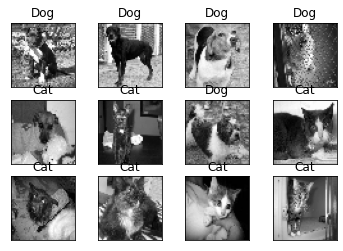

In [86]:
import matplotlib.pyplot as plt


test_data = process_test_data()


fig=plt.figure()

for num,data in enumerate(test_data[:12]):
    # cat: [1,0]
    # dog: [0,1]
    
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(3,4,num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
    #model_out = model.predict([data])[0]
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 1: str_label='Dog'
    else: str_label='Cat'
        
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()